# О возникновении силы тяги в системе вращающихся зарядов

In [3]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    double tlag(long double x, long double y, long double z, long double t, 
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc,
                long double R, long double omega, long double alpha)
    
    long double tlag_test(long double x, long double y, long double z, long double t1, long double t2, 
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
               long double xc, long double yc, long double zc,
               long double R, long double omega, long double alpha)

    # отношение радиуса Лиенара Вихерта к радиусу
    long double klw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    # Радиус Лиенара Вихерта
    long double Rlw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    long double philw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
             long double q,
             long double * A_x, long double * A_y, long double * A_z,
             long double xc, long double yc, long double zc, long double R, long double omega, long double alpha
           )
    
    void electr_magnet(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double * E_x, long double * E_y, long double * E_z, long double * B_x, long double * B_y, long double * B_z,
                       long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)

    void cset_c(long double _c)
    void cset_timespan_Epsilon(long double _eps)
    void cset_max_steps(int _max_steps)
    long double cget_c()
    long double cget_timespan_Epsilon()

cdef extern from "lw_vimanic.c":
    long double sx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double sy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double sz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double wx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double wy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double wz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double ccalc_sum_Fy_t(int N, long double t_i,
                      long double alpha0_l,
                      long double alpha0_r, int to_log);

    long double ccalc_Maxwells_stress_tensor(long double X_a, long double Y_a, long double Z_a, long double t_i,
                                     int N,
                                    long double cos_nx, long double cos_ny, long double cos_nz,
                                    long double alpha0_l,
                                    long double alpha0_r
                                   );

    long double spherical_ccalc_Maxwells_stress_tensor(
        long double r, long double theta, long double varphi, long double t)
    
    long double spherical_ccalc_Maxwells_stress_tensor_R_t(
        long double theta, long double varphi, long double t);

    void cset_sphere_R(long double R);
    long double cget_sphere_R();
    
    void cset_vc(long double vc)
    long double cget_omega()
    
    long double cget_S();
    long double cget_R_l();
    long double cget_R_r();

    long double cget_xc_l();
    long double cget_xc_r();

    long double cget_yc_l();
    long double cget_yc_r();

    long double cget_zc_l();
    long double cget_zc_r();
    

def calc_sum_Fy_t(N, t,
                  alpha0_l = 0,
                  alpha0_r = 0,
                  to_log = False):
    
    cdef int n = N
    cdef long double t_i = t

    cdef long double Alpha0_l = alpha0_l
    cdef long double Alpha0_r = alpha0_r
    cdef int To_log = to_log
    
    cdef long double Fy = ccalc_sum_Fy_t(n, t_i, Alpha0_l, Alpha0_r, To_log);

    return Fy

# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
def spherical_calc_Maxwells_stress_tensor (r, theta, varphi, t) :
    cdef long double _r = r
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t
    
    return spherical_ccalc_Maxwells_stress_tensor(
        _r, _theta, _varphi, _t)

def spherical_calc_Maxwells_stress_tensor_R_t (theta, varphi, t) :
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t

    return spherical_ccalc_Maxwells_stress_tensor_R_t(_theta, _varphi, _t)

# направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()


def set_c(c):
    cset_c(c)
def set_timespan_Epsilon(eps):
    cset_timespan_Epsilon(eps)
def set_max_steps(_max_steps):
    cset_max_steps(_max_steps)
    
def set_vc(vc):
    cset_vc(vc)
def set_sphere_R(R):
    cset_sphere_R(R)
def get_sphere_R():
    return cget_sphere_R()
    
def get_S():
    return cget_S()
def get_R_l():
    return cget_R_l()
def get_R_r():
    return cget_R_r()
    
def get_omega():
    return cget_omega()

In [4]:
import numpy as np
set_c(1.0)
set_timespan_Epsilon(1.e-15)
set_vc(np.float128(0.8))

In [5]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R *= 1.5
# R = 40 * get_R_l() + 20 * get_S()

set_sphere_R(R)

get_sphere_R(), R, R^2

(61.5, 61.5000000000000, 3782.25000000000)

In [6]:
T = np.float128(2*pi)/get_omega() # период вращения
time_steps_number = 36000              # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [7]:
calc_sum_Fy_t(N = 1, t = T/3,
              alpha0_l = np.float128(0),
              alpha0_r = np.float128(0),
              to_log = True)

-0.00579436383218458

In [8]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts_2 = { 'epsabs' : 1.0e-07,
                 'epsrel' : 1.0e-07,
                 'limit'  : 100 }

nquad_opts_3 = { 'epsabs' : 1.0e-01,
                 'epsrel' : 1.0e-03,
                 'limit'  : 100 }
 
#nquad_opts = { 'epsabs' : 1.49e-07,
#               'epsrel' : 1.49e-07,
#               'limit'  : 200 }

#nquad_opts = { 'epsabs' : 1.49e-08,
#               'epsrel' : 1.49e-08,
#               'limit'  : 100 }

In [9]:
t_fy = []
#t_f_alpha_l = []
#t_f_alpha_r = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=1, t = t_i)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans)]
    #t_f_alpha_l += [(i/time_steps_number, ans[1])]
    #t_f_alpha_r += [(i/time_steps_number, ans[2])]

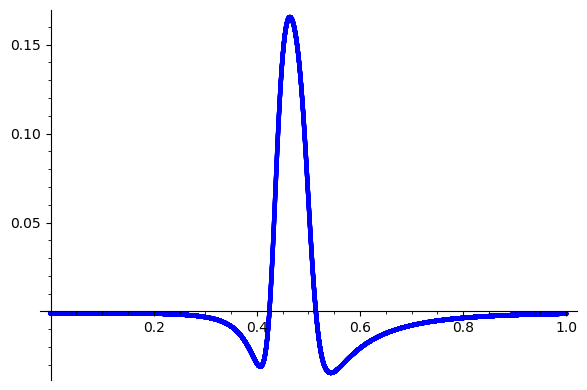

In [10]:
list_plot(t_fy)

In [11]:
#list_plot(t_f_alpha_l)

In [12]:
#list_plot(t_f_alpha_r)

In [13]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

0.1996899143605901822

In [14]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

0.002542530956486814842

In [15]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, t = t), 0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(0.19968991436057684, 4.825381532762334e-11)

In [16]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
ans[0] / T

0.002542530956486644993

Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

In [17]:
spherical_calc_Maxwells_stress_tensor(r=get_sphere_R(), theta=pi/2, varphi=0, t=T/3)

-7.384836939112673e-10

In [18]:
spherical_calc_Maxwells_stress_tensor(r=get_sphere_R(), theta=pi/2, varphi=0, t=T/4)

2.705229738791863e-09

In [19]:
spherical_calc_Maxwells_stress_tensor_R_t(theta=pi/2, varphi=0, t=T/3)

-2.7931299512958905e-06

In [20]:
spherical_calc_Maxwells_stress_tensor_R_t(theta=pi/2, varphi=0, t=T/4)

1.0231855179545524e-05

In [21]:
stress_tensor_upper_half_sphere_R_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [22]:
stress_tensor_down_half_sphere_R_t = lambda t : scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [23]:
stress_tensor_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [24]:
T = np.float128(2*pi)/get_omega() # период вращения
time_steps_number = 36000                # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [ ]:
t_py = []
t_py_up = []
t_py_dw = []
for i in range(0, time_steps_number):
    t_i = i * dt

    ans_dw = stress_tensor_down_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_dw)

    ans_up = stress_tensor_upper_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_up)

    print(i, (i/time_steps_number).n(), t_i, ans_up[0]+ans_dw[0])
    t_py_up += [(i/time_steps_number, ans_up[0])]
    t_py_dw += [(i/time_steps_number, ans_dw[0])]
    t_py += [(i/time_steps_number, ans_up[0]+ans_dw[0])]

0 0.000000000000000 0.0 (0.02658364472447905, 7.023088730199658e-08)
0 0.000000000000000 0.0 (-0.0025223515463535465, 2.394422671882267e-10)
0 0.000000000000000 0.0 0.024061293178125505
1 0.0000277777777777778 0.0021816615649929118407 (0.02657560277224945, 7.093025988563245e-08)
1 0.0000277777777777778 0.0021816615649929118407 (-0.0025226612620547826, 2.408827713237436e-10)
1 0.0000277777777777778 0.0021816615649929118407 0.024052941510194666
2 0.0000555555555555556 0.0043633231299858236814 (0.026567562845109173, 8.010215988597802e-08)
2 0.0000555555555555556 0.0043633231299858236814 (-0.002522971074692177, 2.423288216649806e-10)
2 0.0000555555555555556 0.0043633231299858236814 0.024044591770416995
3 0.0000833333333333333 0.006544984694978735522 (0.026559524942352832, 8.731103819971386e-08)
3 0.0000833333333333333 0.006544984694978735522 (-0.0025232809843040225, 2.4378042460195437e-10)
3 0.0000833333333333333 0.006544984694978735522 0.02403624395804881
4 0.000111111111111111 0.00872664

33 0.000916666666666667 0.07199483164476609074 (0.026319325685614597, 9.871724999802652e-08)
33 0.000916666666666667 0.07199483164476609074 (-0.0025326235565399794, 2.8996369495488776e-10)
33 0.000916666666666667 0.07199483164476609074 0.02378670212907462
34 0.000944444444444444 0.07417649320975900258 (0.02631135018727942, 9.788507669500643e-08)
34 0.000944444444444444 0.07417649320975900258 (-0.002532936491463512, 2.915927026847845e-10)
34 0.000944444444444444 0.07417649320975900258 0.023778413695815907
35 0.000972222222222222 0.07635815477475191443 (0.026303376691840418, 9.882892050031832e-08)
35 0.000972222222222222 0.07635815477475191443 (-0.002533249524597564, 2.932275989165798e-10)
35 0.000972222222222222 0.07635815477475191443 0.023770127167242854
36 0.00100000000000000 0.07853981633974482627 (0.026295405197324123, 9.97808164870619e-08)
36 0.00100000000000000 0.07853981633974482627 (-0.002533562655981099, 2.948683947735103e-10)
36 0.00100000000000000 0.07853981633974482627 0.023

66 0.00183333333333333 0.14398966328953218148 (0.02605718740496763, 6.741749514535171e-08)
66 0.00183333333333333 0.14398966328953218148 (-0.002543002477596245, 3.46884884918242e-10)
66 0.00183333333333333 0.14398966328953218148 0.023514184927371385
67 0.00186111111111111 0.14617132485452509332 (0.02604927759858959, 5.373253544440027e-08)
67 0.00186111111111111 0.14617132485452509332 (-0.0025433186741519024, 3.4871348354804433e-10)
67 0.00186111111111111 0.14617132485452509332 0.023505958924437687
68 0.00188888888888889 0.14835298641951800516 (0.026041369771052366, 9.989262786383335e-08)
68 0.00188888888888889 0.14835298641951800516 (-0.002543634970214763, 3.505482973905174e-10)
68 0.00188888888888889 0.14835298641951800516 0.023497734800837604
69 0.00191666666666667 0.150534647984510917 (0.026033463921664987, 9.897705968220299e-08)
69 0.00191666666666667 0.150534647984510917 (-0.002543951365824474, 3.523893347669128e-10)
69 0.00191666666666667 0.150534647984510917 0.023489512555840513

99 0.00275000000000000 0.21598449493429827223 (0.02579720486462423, 9.615438713543618e-08)
99 0.00275000000000000 0.21598449493429827223 (-0.0025534897209090295, 4.105600737784837e-10)
99 0.00275000000000000 0.21598449493429827223 0.0232437151437152
100 0.00277777777777778 0.21816615649929118406 (0.0257893599967101, 9.504663783017066e-08)
100 0.00277777777777778 0.21816615649929118406 (-0.0025538092222506708, 4.125985731391157e-10)
100 0.00277777777777778 0.21816615649929118406 0.02323555077445943
101 0.00280555555555556 0.2203478180642840959 (0.025781517084985384, 9.391379580393276e-08)
101 0.00280555555555556 0.2203478180642840959 (-0.0025541288244189863, 4.1464358400793155e-10)
101 0.00280555555555556 0.2203478180642840959 0.023227388260566396
102 0.00283333333333333 0.22252947962927700776 (0.025773676128768495, 9.275583036867305e-08)
102 0.00283333333333333 0.22252947962927700776 (-0.0025544485274543206, 4.166951131476422e-10)
102 0.00283333333333333 0.22252947962927700776 0.023219

132 0.00366666666666667 0.28797932657906436297 (0.025539353384141816, 9.474397501562276e-08)
132 0.00366666666666667 0.28797932657906436297 (-0.002564086722665529, 4.81313017389282e-10)
132 0.00366666666666667 0.28797932657906436297 0.022975266661476288
133 0.00369444444444444 0.29016098814405727482 (0.025531572712131557, 9.581348553372107e-08)
133 0.00369444444444444 0.29016098814405727482 (-0.00256440957270658, 4.835706446138259e-10)
133 0.00369444444444444 0.29016098814405727482 0.022967163139424977
134 0.00372222222222222 0.29234264970905018665 (0.025523793973966313, 9.937831240027341e-08)
134 0.00372222222222222 0.29234264970905018665 (-0.0025647325249170396, 4.858350393334627e-10)
134 0.00372222222222222 0.29234264970905018665 0.022959061449049273
135 0.00375000000000000 0.2945243112740430985 (0.02551601716897371, 9.798743369726333e-08)
135 0.00375000000000000 0.2945243112740430985 (-0.002565055579337965, 4.881062132779048e-10)
135 0.00375000000000000 0.2945243112740430985 0.0229

165 0.00458333333333333 0.3599741582238304537 (0.025283608620723583, 9.740278860566457e-08)
165 0.00458333333333333 0.3599741582238304537 (-0.002574794944372365, 5.594264621179177e-10)
165 0.00458333333333333 0.3599741582238304537 0.02270881367635122
166 0.00461111111111111 0.36215581978882336556 (0.025275891412080486, 9.937719255979329e-08)
166 0.00461111111111111 0.36215581978882336556 (-0.0025751211878017447, 5.619110233468188e-10)
166 0.00461111111111111 0.36215581978882336556 0.02270077022427874
167 0.00463888888888889 0.3643374813538162774 (0.025268176114419547, 9.914466505163275e-08)
167 0.00463888888888889 0.3643374813538162774 (-0.0025754475347670195, 5.644025649132519e-10)
167 0.00463888888888889 0.3643374813538162774 0.022692728579652526
168 0.00466666666666667 0.36651914291880918924 (0.025260462729534437, 9.378818339607681e-08)
168 0.00466666666666667 0.36651914291880918924 (-0.002575773985309975, 5.669010931597996e-10)
168 0.00466666666666667 0.36651914291880918924 0.02268

198 0.00550000000000000 0.43196898986859654445 (0.025029946558167936, 9.699184101512846e-08)
198 0.00550000000000000 0.43196898986859654445 (-0.002585615873387648, 6.451305118777449e-10)
198 0.00550000000000000 0.43196898986859654445 0.022444330684780286
199 0.00552777777777778 0.4341506514335894563 (0.025022292090168808, 9.822399385121588e-08)
199 0.00552777777777778 0.4341506514335894563 (-0.002585945555686102, 6.478480265201497e-10)
199 0.00552777777777778 0.4341506514335894563 0.022436346534482707
200 0.00555555555555556 0.43633231299858236813 (0.025014639512221153, 9.945439836755261e-08)
200 0.00555555555555556 0.43633231299858236813 (-0.0025862753429111924, 6.505726728885911e-10)
200 0.00555555555555556 0.43633231299858236813 0.02242836416930996
201 0.00558333333333333 0.43851397456357527998 (0.025006988823672284, 9.34409649352893e-08)
201 0.00558333333333333 0.43851397456357527998 (-0.0025866052351054465, 6.53304451755563e-10)
201 0.00558333333333333 0.43851397456357527998 0.022

231 0.00641666666666667 0.5039638215133626352 (0.024778343500893064, 8.41152821667553e-08)
231 0.00641666666666667 0.5039638215133626352 (-0.002596551023466606, 7.385898446730693e-10)
231 0.00641666666666667 0.5039638215133626352 0.02218179247742646
232 0.00644444444444444 0.506145483078355547 (0.024770751060421238, 8.516982606199611e-08)
232 0.00644444444444444 0.506145483078355547 (-0.0025968841909234557, 7.41544136703264e-10)
232 0.00644444444444444 0.506145483078355547 0.022173866869497783
233 0.00647222222222222 0.5083271446433484589 (0.024763160488539066, 8.623748848192252e-08)
233 0.00647222222222222 0.5083271446433484589 (-0.002597217464722453, 7.445056428249789e-10)
233 0.00647222222222222 0.5083271446433484589 0.022165943023816612
234 0.00650000000000000 0.5105088062083413707 (0.024755571784600625, 8.731837376025828e-08)
234 0.00650000000000000 0.5105088062083413707 (-0.002597550844906881, 7.474743516811965e-10)
234 0.00650000000000000 0.5105088062083413707 0.0221580209396937

264 0.00733333333333333 0.57595865315812872593 (0.02452877606700736, 9.877132177034116e-08)
264 0.00733333333333333 0.57595865315812872593 (-0.0026076019353211835, 8.398898201949405e-10)
264 0.00733333333333333 0.57595865315812872593 0.021921174131686177
265 0.00736111111111111 0.57814031472312163776 (0.024521244950348773, 9.632245185850225e-08)
265 0.00736111111111111 0.57814031472312163776 (-0.0026079386350515094, 8.430820848577287e-10)
265 0.00736111111111111 0.57814031472312163776 0.021913306315297264
266 0.00738888888888889 0.58032197628811454964 (0.0245137156810984, 9.755018441423157e-08)
266 0.00738888888888889 0.58032197628811454964 (-0.0026082754425647866, 8.462815514147628e-10)
266 0.00738888888888889 0.58032197628811454964 0.02190544023853361
267 0.00741666666666667 0.58250363785310746147 (0.02450618825862013, 9.879301057159526e-08)
267 0.00741666666666667 0.58250363785310746147 (-0.002608612357905076, 8.494882084006047e-10)
267 0.00741666666666667 0.58250363785310746147 0.0

297 0.00825000000000000 0.6479534848028948167 (0.024281221181699356, 9.079057084658776e-08)
297 0.00825000000000000 0.6479534848028948167 (-0.002618770177194039, 9.490214546831709e-10)
297 0.00825000000000000 0.6479534848028948167 0.021662451004505315
298 0.00827777777777778 0.6501351463678877285 (0.024273750694336977, 8.686645015608787e-08)
298 0.00827777777777778 0.6501351463678877285 (-0.002619110457156299, 9.524497790664496e-10)
298 0.00827777777777778 0.6501351463678877285 0.021654640237180677
299 0.00830555555555556 0.6523168079328806404 (0.02426628203347989, 8.906595240325277e-08)
299 0.00830555555555556 0.6523168079328806404 (-0.002619450846368154, 9.55885188236587e-10)
299 0.00830555555555556 0.6523168079328806404 0.021646831187111734
300 0.00833333333333333 0.6544984694978735522 (0.0242588151984953, 7.932436065584457e-08)
300 0.00833333333333333 0.6544984694978735522 (-0.0026197913448744547, 9.593276798422197e-10)
300 0.00833333333333333 0.6544984694978735522 0.02163902385362

330 0.00916666666666667 0.7199483164476609074 (0.024035656070599987, 8.542199018347279e-08)
330 0.00916666666666667 0.7199483164476609074 (-0.0026300573454473863, 1.06586537758699e-09)
330 0.00916666666666667 0.7199483164476609074 0.0214055987251526
331 0.00919444444444444 0.7221299780126538193 (0.024028245527027647, 8.305932664320537e-08)
331 0.00919444444444444 0.7221299780126538193 (-0.002630401254461502, 1.0695242426680203e-09)
331 0.00919444444444444 0.7221299780126538193 0.021397844272566146
332 0.00922222222222222 0.7243116395776467311 (0.02402083678932611, 8.073845334242516e-08)
332 0.00922222222222222 0.7243116395776467311 (-0.0026307452742182456, 1.0731899649822022e-09)
332 0.00922222222222222 0.7243116395776467311 0.021390091515107866
333 0.00925000000000000 0.72649330114263964295 (0.02401342985687425, 7.845912100723363e-08)
333 0.00925000000000000 0.72649330114263964295 (-0.002631089404763279, 1.076862537367025e-09)
333 0.00925000000000000 0.72649330114263964295 0.021382340

363 0.0100833333333333 0.79194314809242699816 (0.02379205825345877, 9.011204304678518e-08)
363 0.0100833333333333 0.79194314809242699816 (-0.002641465065167144, 1.1901748656645175e-09)
363 0.0100833333333333 0.79194314809242699816 0.021150593188291624
364 0.0101111111111111 0.79412480965741991004 (0.023784706976978882, 8.93851704102948e-08)
364 0.0101111111111111 0.79412480965741991004 (-0.002641812652933047, 1.1940546218881104e-09)
364 0.0101111111111111 0.79412480965741991004 0.021142894324045834
365 0.0101388888888889 0.79630647122241282187 (0.023777357485999392, 9.07885434995238e-08)
365 0.0101388888888889 0.79630647122241282187 (-0.0026421603529615738, 1.1979408753422997e-09)
365 0.0101388888888889 0.79630647122241282187 0.02113519713303782
366 0.0101666666666667 0.7984881327874057337 (0.023770009779907085, 9.770746966481734e-08)
366 0.0101666666666667 0.7984881327874057337 (-0.002642508165299211, 1.2018336076769637e-09)
366 0.0101666666666667 0.7984881327874057337 0.0211275016146

396 0.0110000000000000 0.8639379797371930889 (0.02355040553812758, 9.388527748805268e-08)
396 0.0110000000000000 0.8639379797371930889 (-0.0026529949907828565, 1.321558100271709e-09)
396 0.0110000000000000 0.8639379797371930889 0.020897410547344723
397 0.0110277777777778 0.8661196413021860008 (0.023543112860676008, 8.712904585818815e-08)
397 0.0110277777777778 0.8661196413021860008 (-0.002653346307899527, 1.3256444193708301e-09)
397 0.0110277777777778 0.8661196413021860008 0.02088976655277648
398 0.0110555555555556 0.8683013028671789126 (0.023535821948612996, 8.045838007384319e-08)
398 0.0110555555555556 0.8683013028671789126 (-0.002653697738826363, 1.3297367176145396e-09)
398 0.0110555555555556 0.8683013028671789126 0.020882124209786634
399 0.0110833333333333 0.87048296443217182443 (0.023528532801333074, 7.388502607453206e-08)
399 0.0110833333333333 0.87048296443217182443 (-0.002654049283610697, 1.333834982290567e-09)
399 0.0110833333333333 0.87048296443217182443 0.020874483517722378


429 0.0119166666666667 0.93593281138195917964 (0.023310676012620466, 8.315412054604309e-08)
429 0.0119166666666667 0.93593281138195917964 (-0.0026646488067038933, 1.4594598661516562e-09)
429 0.0119166666666667 0.93593281138195917964 0.020646027205916573
430 0.0119444444444444 0.9381144729469520915 (0.023303441274544853, 9.807653994476327e-08)
430 0.0119444444444444 0.9381144729469520915 (-0.002665003904688898, 1.4637331730796982e-09)
430 0.0119444444444444 0.9381144729469520915 0.020638437369855954
431 0.0119722222222222 0.94029613451194500335 (0.02329620828194768, 8.929023484136045e-08)
431 0.0119722222222222 0.94029613451194500335 (-0.002665359118059758, 1.4680117809364357e-09)
431 0.0119722222222222 0.94029613451194500335 0.02063084916388792
432 0.0120000000000000 0.9424777960769379152 (0.023288977034330943, 8.112677045207448e-08)
432 0.0120000000000000 0.9424777960769379152 (-0.002665714446864667, 1.4722956671772399e-09)
432 0.0120000000000000 0.9424777960769379152 0.02062326258746

462 0.0128333333333333 1.0079276430267252704 (0.023072848042549436, 9.009686807112931e-08)
462 0.0128333333333333 1.0079276430267252704 (-0.0026764282279724307, 1.6031429740166097e-09)
462 0.0128333333333333 1.0079276430267252704 0.020396419814577006
463 0.0128611111111111 1.0101093045917181822 (0.02306567059247658, 9.074856825513525e-08)
463 0.0128611111111111 1.0101093045917181822 (-0.00267678715928198, 1.607577893062383e-09)
463 0.0128611111111111 1.0101093045917181822 0.0203888834331946
464 0.0128888888888889 1.012290966156711094 (0.023058494868321212, 9.13888759699429e-08)
464 0.0128888888888889 1.012290966156711094 (-0.0026771462075818354, 1.6120172493749537e-09)
464 0.0128888888888889 1.012290966156711094 0.020381348660739377
465 0.0129166666666667 1.014472627721704006 (0.023051320869492842, 9.201729728370756e-08)
465 0.0129166666666667 1.014472627721704006 (-0.002677505372921072, 1.6164610114582489e-09)
465 0.0129166666666667 1.014472627721704006 0.02037381549657177
466 0.01294

495 0.0137500000000000 1.0799224746714913612 (0.022836900261926696, 9.936322010261048e-08)
495 0.0137500000000000 1.0799224746714913612 (-0.002688335000933752, 1.751669756137463e-09)
495 0.0137500000000000 1.0799224746714913612 0.020148565260992943
496 0.0137777777777778 1.082104136236484273 (0.022829779456557037, 9.660717415789435e-08)
496 0.0137777777777778 1.082104136236484273 (-0.0026886978189832856, 1.7562345537672523e-09)
496 0.0137777777777778 1.082104136236484273 0.020141081637573752
497 0.0138055555555556 1.0842857978014771848 (0.022822660357735138, 9.385036882162817e-08)
497 0.0138055555555556 1.0842857978014771848 (-0.0026890607556569702, 1.7608027186579388e-09)
497 0.0138055555555556 1.0842857978014771848 0.020133599602078167
498 0.0138333333333333 1.0864674593664700967 (0.022815542964877755, 9.109567475271925e-08)
498 0.0138333333333333 1.0864674593664700967 (-0.0026894238110047835, 1.7653742187781246e-09)
498 0.0138333333333333 1.0864674593664700967 0.02012611915387297
49

528 0.0146666666666667 1.1519173063162574519 (0.022602811568647605, 9.145548971519618e-08)
528 0.0146666666666667 1.1519173063162574519 (-0.0027003709039244064, 1.9038840455958277e-09)
528 0.0146666666666667 1.1519173063162574519 0.0199024406647232
529 0.0146944444444444 1.1540989678812503637 (0.022595746772583497, 9.048846789076357e-08)
529 0.0146944444444444 1.1540989678812503637 (-0.002700737663109731, 1.908540086841199e-09)
529 0.0146944444444444 1.1540989678812503637 0.019895009109473765
530 0.0147222222222222 1.1562806294462432755 (0.02258868366393421, 9.866504033070181e-08)
530 0.0147222222222222 1.1562806294462432755 (-0.0027011045425830984, 1.9131982195193372e-09)
530 0.0147222222222222 1.1562806294462432755 0.019887579121351112
531 0.0147500000000000 1.1584622910112361875 (0.0225816222421236, 9.580737512929721e-08)
531 0.0147500000000000 1.1584622910112361875 (-0.0027014715423954033, 1.917858391764721e-09)
531 0.0147500000000000 1.1584622910112361875 0.019880150699728198
532 

561 0.0155833333333333 1.2239121379610235427 (0.022370561118827348, 7.818575655188045e-08)
561 0.0155833333333333 1.2239121379610235427 (-0.0027125377479788075, 2.058394204325527e-09)
561 0.0155833333333333 1.2239121379610235427 0.01965802337084854
562 0.0156111111111111 1.2260937995260164545 (0.022363551704402053, 6.916511741318998e-08)
562 0.0156111111111111 1.2260937995260164545 (-0.0027129085036978057, 2.063095480328678e-09)
562 0.0156111111111111 1.2260937995260164545 0.019650643200704247
563 0.0156388888888889 1.2282754610910093663 (0.02235654395849027, 6.037297643839302e-08)
563 0.0156388888888889 1.2282754610910093663 (-0.0027132793813994475, 2.0677973316298305e-09)
563 0.0156388888888889 1.2282754610910093663 0.01964326457709082
564 0.0156666666666667 1.2304571226560022781 (0.022349537880522786, 5.783991675797342e-08)
564 0.0156666666666667 1.2304571226560022781 (-0.002713650381135569, 2.0724997009153472e-09)
564 0.0156666666666667 1.2304571226560022781 0.019635887499387217
56

594 0.0165000000000000 1.2959069696057896334 (0.022140128322122404, 8.759286248808702e-08)
594 0.0165000000000000 1.2959069696057896334 (-0.002724837377554854, 2.2135578089601963e-09)
594 0.0165000000000000 1.2959069696057896334 0.01941529094456755
595 0.0165277777777778 1.2980886311707825452 (0.022133173669261506, 8.424866151440216e-08)
595 0.0165277777777778 1.2980886311707825452 (-0.002725212186229776, 2.218250493758885e-09)
595 0.0165277777777778 1.2980886311707825452 0.01940796148303173
596 0.0165555555555556 1.300270292735775457 (0.022126220666239968, 8.553977133591445e-08)
596 0.0165555555555556 1.300270292735775457 (-0.0027255871186133355, 2.222941987961287e-09)
596 0.0165555555555556 1.300270292735775457 0.019400633547626632
597 0.0165833333333333 1.3024519543007683689 (0.022119269312495367, 9.124135029162957e-08)
597 0.0165833333333333 1.3024519543007683689 (-0.0027259621747583347, 2.2276322414501565e-09)
597 0.0165833333333333 1.3024519543007683689 0.019393307137737032
598 0

627 0.0174166666666667 1.3679018012505557241 (0.021911498706712225, 3.853373412951445e-08)
627 0.0174166666666667 1.3679018012505557241 (-0.002737271671279199, 2.367258286198662e-09)
627 0.0174166666666667 1.3679018012505557241 0.019174227035433027
628 0.0174444444444444 1.370083462815548636 (0.02190459819685324, 6.430319092996795e-08)
628 0.0174444444444444 1.370083462815548636 (-0.002737650590379554, 2.3718553549570377e-09)
628 0.0174444444444444 1.370083462815548636 0.019166947606473684
629 0.0174722222222222 1.3722651243805415478 (0.021897696385940926, 8.057962978353013e-08)
629 0.0174722222222222 1.3722651243805415478 (-0.0027380296349466438, 2.3764491240070877e-09)
629 0.0174722222222222 1.3722651243805415478 0.019159666750994283
630 0.0175000000000000 1.3744467859455344596 (0.021890796185819142, 9.419591103301816e-08)
630 0.0175000000000000 1.3744467859455344596 (-0.002738408805034252, 2.3810395267042598e-09)
630 0.0175000000000000 1.3744467859455344596 0.01915238738078489
631 0

660 0.0183333333333333 1.4398966328953218148 (0.021684634543202106, 8.826934023536232e-08)
660 0.0183333333333333 1.4398966328953218148 (-0.0027498425427127816, 2.5168557656426354e-09)
660 0.0183333333333333 1.4398966328953218148 0.018934792000489323
661 0.0183611111111111 1.4420782944603147267 (0.021677787582652663, 8.3562139894047e-08)
661 0.0183611111111111 1.4420782944603147267 (-0.002750225630778867, 2.5213084240045553e-09)
661 0.0183611111111111 1.4420782944603147267 0.018927561951873798
662 0.0183888888888889 1.4442599560253076386 (0.021670942235100046, 8.213171253740542e-08)
662 0.0183888888888889 1.4442599560253076386 (-0.0027506088461026045, 2.5257555229029954e-09)
662 0.0183888888888889 1.4442599560253076386 0.018920333388997443
663 0.0184166666666667 1.4464416175903005504 (0.021664098500147548, 8.070848626099076e-08)
663 0.0184166666666667 1.4464416175903005504 (-0.0027509921887387844, 2.5301969893982545e-09)
663 0.0184166666666667 1.4464416175903005504 0.018913106311408762

693 0.0192500000000000 1.5118914645400879056 (0.02145953359438144, 7.769874471805758e-08)
693 0.0192500000000000 1.5118914645400879056 (-0.002762551941137309, 2.6604517377036454e-09)
693 0.0192500000000000 1.5118914645400879056 0.01869698165324413
694 0.0192777777777778 1.5140731261050808175 (0.02145273957864058, 7.364802620375374e-08)
694 0.0192777777777778 1.5140731261050808175 (-0.0027629392578043727, 2.664681308783411e-09)
694 0.0192777777777778 1.5140731261050808175 0.018689800320836204
695 0.0193055555555556 1.5162547876700737293 (0.021445947158024652, 6.99881556481569e-08)
695 0.0193055555555556 1.5162547876700737293 (-0.0027633267035535704, 2.6689028016286436e-09)
695 0.0193055555555556 1.5162547876700737293 0.018682620454471083
696 0.0193333333333333 1.5184364492350666411 (0.021439156331990727, 6.68516020130652e-08)
696 0.0193333333333333 1.5184364492350666411 (-0.0027637142784407223, 2.673116141734325e-09)
696 0.0193333333333333 1.5184364492350666411 0.018675442053550005
697 

726 0.0201666666666667 1.5838862961848539963 (0.021236170346397076, 7.765826977876658e-08)
726 0.0201666666666667 1.5838862961848539963 (-0.0027754018523633555, 2.7953174647018142e-09)
726 0.0201666666666667 1.5838862961848539963 0.01846076849403372
727 0.0201944444444444 1.5860679577498469081 (0.021229428684141245, 7.4995360489465e-08)
727 0.0201944444444444 1.5860679577498469081 (-0.00277579345838643, 2.7992370420245704e-09)
727 0.0201944444444444 1.5860679577498469081 0.018453635225754814
728 0.0202222222222222 1.5882496193148398201 (0.021222688597948822, 9.139875106409234e-08)
728 0.0202222222222222 1.5882496193148398201 (-0.0027761851953504485, 2.803145780754391e-09)
728 0.0202222222222222 1.5882496193148398201 0.018446503402598374
729 0.0202500000000000 1.5904312808798327319 (0.021215950090511332, 7.664573086536857e-08)
729 0.0202500000000000 1.5904312808798327319 (-0.002776577063312284, 2.807043603160757e-09)
729 0.0202500000000000 1.5904312808798327319 0.018439373027199047
730 

759 0.0210833333333333 1.6558811278296200871 (0.021014525389612692, 9.879644001087719e-08)
759 0.0210833333333333 1.6558811278296200871 (-0.0027883942995607968, 2.9184581575416105e-09)
759 0.0210833333333333 1.6558811278296200871 0.018226131090051896
760 0.0211111111111111 1.6580627893946129989 (0.02100783549612942, 9.939227468434755e-08)
760 0.0211111111111111 1.6580627893946129989 (-0.0027887902568402203, 2.921972992401677e-09)
760 0.0211111111111111 1.6580627893946129989 0.018219045239289203
761 0.0211388888888889 1.6602444509596059108 (0.021001147162339334, 9.997669465408165e-08)
761 0.0211388888888889 1.6602444509596059108 (-0.00278918634695451, 2.925474000871895e-09)
761 0.0211388888888889 1.6602444509596059108 0.018211960815384825
762 0.0211666666666667 1.6624261125245988226 (0.02099446038771314, 9.107995962055889e-08)
762 0.0211666666666667 1.6624261125245988226 (-0.0027895825699616144, 2.928961091005144e-09)
762 0.0211666666666667 1.6624261125245988226 0.018204877817751524
763

792 0.0220000000000000 1.7278759594743861778 (0.0207945795347886, 7.733756644083299e-08)
792 0.0220000000000000 1.7278759594743861778 (-0.0028015313441123227, 3.02662980836393e-09)
792 0.0220000000000000 1.7278759594743861778 0.017993048190676278
793 0.0220277777777778 1.7300576210393790896 (0.020787940831977422, 7.503729700154372e-08)
793 0.0220277777777778 1.7300576210393790896 (-0.0028019317157199717, 3.0296379631379253e-09)
793 0.0220277777777778 1.7300576210393790896 0.017986009116257452
794 0.0220555555555556 1.7322392826043720016 (0.020781303671442916, 7.278613472542237e-08)
794 0.0220555555555556 1.7322392826043720016 (-0.0028023322220923266, 3.0326290966832016e-09)
794 0.0220555555555556 1.7322392826043720016 0.017978971449350588
795 0.0220833333333333 1.7344209441693649134 (0.020774668052660344, 7.525935539259383e-08)
795 0.0220833333333333 1.7344209441693649134 (-0.0028027328632884373, 3.0356031192074902e-09)
795 0.0220833333333333 1.7344209441693649134 0.01797193518937191
7

825 0.0229166666666667 1.7998707911191522686 (0.02057631381024997, 9.439672066937992e-08)
825 0.0229166666666667 1.7998707911191522686 (-0.0028148150864907902, 3.11636665317706e-09)
825 0.0229166666666667 1.7998707911191522686 0.017761498723759178
826 0.0229444444444444 1.8020524526841451804 (0.02056972572719131, 8.61578103015312e-08)
826 0.0229444444444444 1.8020524526841451804 (-0.0028152199366970436, 3.1187600309093896e-09)
826 0.0229444444444444 1.8020524526841451804 0.017754505790494268
827 0.0229722222222222 1.8042341142491380923 (0.020563139168536776, 8.474926245436836e-08)
827 0.0229722222222222 1.8042341142491380923 (-0.0028156249236345916, 3.121133033826603e-09)
827 0.0229722222222222 1.8042341142491380923 0.017747514244902184
828 0.0230000000000000 1.8064157758141310041 (0.02055655413241051, 8.328080440511293e-08)
828 0.0230000000000000 1.8064157758141310041 (-0.002816030047363609, 3.1234855543216342e-09)
828 0.0230000000000000 1.8064157758141310041 0.0177405240850469
829 0.

858 0.0238333333333333 1.8718656227639183593 (0.020359709448006403, 8.105205662432225e-08)
858 0.0238333333333333 1.8718656227639183593 (-0.002828247667161214, 3.1840215980694043e-09)
858 0.0238333333333333 1.8718656227639183593 0.01753146178084519
859 0.0238611111111111 1.8740472843289112711 (0.020353171417952648, 8.179699469244404e-08)
859 0.0238611111111111 1.8740472843289112711 (-0.002828657061462684, 3.185687389705978e-09)
859 0.0238611111111111 1.8740472843289112711 0.017524514356489964
860 0.0238888888888889 1.876228945893904183 (0.020346634895394806, 8.264195062438926e-08)
860 0.0238888888888889 1.876228945893904183 (-0.002829066594499637, 3.1873293488847345e-09)
860 0.0238888888888889 1.876228945893904183 0.017517568300895167
861 0.0239166666666667 1.8784106074588970949 (0.02034009988139198, 8.34840887593625e-08)
861 0.0239166666666667 1.8784106074588970949 (-0.0028294762663333994, 3.1889473500821674e-09)
861 0.0239166666666667 1.8784106074588970949 0.01751062361505858
862 0.0

891 0.0247500000000000 1.9438604544086844501 (0.02014474789655679, 8.687956118813008e-08)
891 0.0247500000000000 1.9438604544086844501 (-0.0028418312675082347, 3.2258222108045784e-09)
891 0.0247500000000000 1.9438604544086844501 0.017302916629048558
892 0.0247777777777778 1.9460421159736773619 (0.020138259361072976, 9.818743620056461e-08)
892 0.0247777777777778 1.9460421159736773619 (-0.0028422452726562775, 3.2266448996048002e-09)
892 0.0247777777777778 1.9460421159736773619 0.0172960140884167
893 0.0248055555555556 1.9482237775386702737 (0.020131772316760794, 8.709392935265272e-08)
893 0.0248055555555556 1.9482237775386702737 (-0.002842659418582465, 3.227440225446118e-09)
893 0.0248055555555556 1.9482237775386702737 0.01728911289817833
894 0.0248333333333333 1.9504054391036631856 (0.020125286763361477, 8.719516469104973e-08)
894 0.0248333333333333 1.9504054391036631856 (-0.002843073705349306, 3.228208079190031e-09)
894 0.0248333333333333 1.9504054391036631856 0.017282213058012173
895 

924 0.0256666666666667 2.0158552860534505408 (0.019931410801619195, 9.773002565944638e-08)
924 0.0256666666666667 2.0158552860534505408 (-0.0028555681107899156, 3.237945582867225e-09)
924 0.0256666666666667 2.0158552860534505408 0.01707584269082928
925 0.0256944444444444 2.0180369476184434527 (0.01992497120761138, 9.351050194911134e-08)
925 0.0256944444444444 2.0180369476184434527 (-0.0028559867948199508, 3.2378094823450965e-09)
925 0.0256944444444444 2.0180369476184434527 0.01706898441279143
926 0.0257222222222222 2.0202186091834363644 (0.019918533088106587, 8.92553128910734e-08)
926 0.0257222222222222 2.0202186091834363644 (-0.002856405621710172, 3.2376425514770964e-09)
926 0.0257222222222222 2.0202186091834363644 0.017062127466396414
927 0.0257500000000000 2.0224002707484292764 (0.019912096442602494, 8.834704950347083e-08)
927 0.0257500000000000 2.0224002707484292764 (-0.0028568245915242957, 3.237444679783023e-09)
927 0.0257500000000000 2.0224002707484292764 0.017055271851078198
928

958 0.0266111111111111 2.0900317792632095433 (0.01971328880312863, 8.576977176866273e-08)
958 0.0266111111111111 2.0900317792632095433 (-0.0028698838953804375, 3.2154084371471565e-09)
958 0.0266111111111111 2.0900317792632095433 0.016843404907748192
959 0.0266388888888889 2.0922134408282024552 (0.019706899061384994, 8.563238488687084e-08)
959 0.0266388888888889 2.0922134408282024552 (-0.0028703074726246485, 3.2141669712869216e-09)
959 0.0266388888888889 2.0922134408282024552 0.016836591588760344
960 0.0266666666666667 2.0943951023931953672 (0.01970051077715561, 8.5491796989712e-08)
960 0.0266666666666667 2.0943951023931953672 (-0.0028707311949163427, 3.2128912469555184e-09)
960 0.0266666666666667 2.0943951023931953672 0.01682977958223927
961 0.0266944444444444 2.0965767639581882789 (0.019694123949943604, 8.534802683769207e-08)
961 0.0266944444444444 2.0965767639581882789 (-0.0028711550623205123, 3.211581178555185e-09)
961 0.0266944444444444 2.0965767639581882789 0.01682296888762309
962

991 0.0275277777777778 2.162026610907975634 (0.01950319418858189, 7.965446374285376e-08)
991 0.0275277777777778 2.162026610907975634 (-0.0028839388856591298, 3.155845483538127e-09)
991 0.0275277777777778 2.162026610907975634 0.016619255302922763
992 0.0275555555555556 2.164208272472968546 (0.019496852283312965, 7.942215955282288e-08)
992 0.0275555555555556 2.164208272472968546 (-0.0028843672839934968, 3.153424831914102e-09)
992 0.0275555555555556 2.164208272472968546 0.016612484999319468
993 0.0275833333333333 2.1663899340379614577 (0.019490511819244053, 7.918734854668044e-08)
993 0.0275833333333333 2.1663899340379614577 (-0.0028847958295402203, 3.1509669412522687e-09)
993 0.0275833333333333 2.1663899340379614577 0.016605715989703833
994 0.0276111111111111 2.1685715956029543697 (0.019484172795883443, 7.895005377327711e-08)
994 0.0276111111111111 2.1685715956029543697 (-0.002885224522365556, 3.1484717182163726e-09)
994 0.0276111111111111 2.1685715956029543697 0.016598948273517888
995 0.

1024 0.0284444444444444 2.2340214425527417249 (0.019294669591749282, 7.079384314084467e-08)
1024 0.0284444444444444 2.2340214425527417249 (-0.0028981541219112797, 3.0558608889055903e-09)
1024 0.0284444444444444 2.2340214425527417249 0.016396515469838002
1025 0.0284722222222222 2.2362031041177346368 (0.019288374987287884, 7.049140095199784e-08)
1025 0.0284722222222222 2.2362031041177346368 (-0.002898587413450145, 3.0521695586102323e-09)
1025 0.0284722222222222 2.2362031041177346368 0.016389787573837737
1026 0.0285000000000000 2.2383847656827275485 (0.01928208180788048, 7.01872499917481e-08)
1026 0.0285000000000000 2.2383847656827275485 (-0.002899020854408508, 3.0484384840246586e-09)
1026 0.0285000000000000 2.2383847656827275485 0.016383060953471973
1027 0.0285277777777778 2.2405664272477204605 (0.019275790053040386, 9.941767499608428e-08)
1027 0.0285277777777778 2.2405664272477204605 (-0.002899454444853923, 3.0446675995410852e-09)
1027 0.0285277777777778 2.2405664272477204605 0.01637633

1057 0.0293611111111111 2.3060162741975078157 (0.019087697422929262, 7.094334409961291e-08)
1057 0.0293611111111111 2.3060162741975078157 (-0.0029125320063953797, 2.9127344356707965e-09)
1057 0.0293611111111111 2.3060162741975078157 0.016175165416533882
1058 0.0293888888888889 2.3081979357625007274 (0.019081449589080285, 8.731371352163553e-08)
1058 0.0293888888888889 2.3081979357625007274 (-0.0029129702646641404, 2.90770096588182e-09)
1058 0.0293888888888889 2.3081979357625007274 0.016168479324416146
1059 0.0294166666666667 2.3103795973274936393 (0.019075203165196283, 8.664641295557043e-08)
1059 0.0294166666666667 2.3103795973274936393 (-0.0029134086746028247, 2.9026259974144347e-09)
1059 0.0294166666666667 2.3103795973274936393 0.01616179449059346
1060 0.0294444444444444 2.312561258892486551 (0.019068958149023995, 9.450014725527065e-08)
1060 0.0294444444444444 2.312561258892486551 (-0.002913847236280314, 2.8975094796363995e-09)
1060 0.0294444444444444 2.312561258892486551 0.0161551109

1090 0.0302777777777778 2.3780111058422739065 (0.018882260274734813, 6.94765280563763e-08)
1090 0.0302777777777778 2.3780111058422739065 (-0.0029270749884737443, 2.72454319275397e-09)
1090 0.0302777777777778 2.3780111058422739065 0.015955185286261067
1091 0.0303055555555556 2.3801927674072668182 (0.018876058686701645, 8.21089897138183e-08)
1091 0.0303055555555556 2.3801927674072668182 (-0.002927518288442708, 2.7181250429695464e-09)
1091 0.0303055555555556 2.3801927674072668182 0.015948540398258937
1092 0.0303333333333333 2.3823744289722597301 (0.018869858491919134, 9.506452625868176e-08)
1092 0.0303333333333333 2.3823744289722597301 (-0.0029279617423763433, 2.711664656720688e-09)
1092 0.0303333333333333 2.3823744289722597301 0.01594189674954279
1093 0.0303611111111111 2.3845560905372526418 (0.018863659689931835, 4.7230064158758486e-08)
1093 0.0303611111111111 2.3845560905372526418 (-0.0029284053503448927, 2.7051620427487755e-09)
1093 0.0303611111111111 2.3845560905372526418 0.015935254

1123 0.0311944444444444 2.450005937487039997 (0.018678340909417914, 6.946591034768006e-08)
1123 0.0311944444444444 2.450005937487039997 (-0.0029417855657454116, 2.4904925588183427e-09)
1123 0.0311944444444444 2.450005937487039997 0.015736555343672503
1124 0.0312222222222222 2.452187599052032909 (0.018672185047884333, 8.865844899546672e-08)
1124 0.0312222222222222 2.452187599052032909 (-0.002942233983864639, 2.4826875167645963e-09)
1124 0.0312222222222222 2.452187599052032909 0.015729951064019695
1125 0.0312500000000000 2.4543692606170258207 (0.018666030563345242, 7.843362354012205e-08)
1125 0.0312500000000000 2.4543692606170258207 (-0.002942682558288683, 2.474840950729873e-09)
1125 0.0312500000000000 2.4543692606170258207 0.015723348005056557
1126 0.0312777777777778 2.4565509221820187326 (0.018659877456214984, 9.850413636929425e-08)
1126 0.0312777777777778 2.4565509221820187326 (-0.0029431312890891765, 2.4669529108043136e-09)
1126 0.0312777777777778 2.4565509221820187326 0.015716746167

1156 0.0321111111111111 2.5220007691318060878 (0.01847592196894088, 9.126234160999327e-08)
1156 0.0321111111111111 2.5220007691318060878 (-0.002956666285212481, 2.211349723479786e-09)
1156 0.0321111111111111 2.5220007691318060878 0.015519255683728401
1157 0.0321388888888889 2.5241824306967989998 (0.018469811611233646, 9.064841705437804e-08)
1157 0.0321388888888889 2.5241824306967989998 (-0.002957119899447664, 2.2022111036330318e-09)
1157 0.0321388888888889 2.5241824306967989998 0.015512691711785983
1158 0.0321666666666667 2.5263640922617919115 (0.0184637023231613, 9.003367603177873e-08)
1158 0.0321666666666667 2.5263640922617919115 (-0.002957573672374309, 2.1930336436122534e-09)
1158 0.0321666666666667 2.5263640922617919115 0.01550612865078699
1159 0.0321944444444444 2.5285457538267848234 (0.01845759439669502, 8.94181614773061e-08)
1159 0.0321944444444444 2.5285457538267848234 (-0.002958027604065474, 2.183817465715456e-09)
1159 0.0321944444444444 2.5285457538267848234 0.015499566792629

1189 0.0330277777777778 2.5939956007765721786 (0.018274987437269193, 9.995102046067887e-08)
1189 0.0330277777777778 2.5939956007765721786 (-0.002971719744481079, 1.890030040311544e-09)
1189 0.0330277777777778 2.5939956007765721786 0.015303267692788114
1190 0.0330555555555556 2.5961772623415650904 (0.018268921489342376, 7.018285309932492e-08)
1190 0.0330555555555556 2.5961772623415650904 (-0.0029721786343504903, 1.8796876735509022e-09)
1190 0.0330555555555556 2.5961772623415650904 0.015296742854991885
1191 0.0330833333333333 2.5983589239065580023 (0.018262856888125116, 6.956459694973404e-08)
1191 0.0330833333333333 2.5983589239065580023 (-0.0029726376853456437, 1.8693118913675963e-09)
1191 0.0330833333333333 2.5983589239065580023 0.015290219202779473
1192 0.0331111111111111 2.600540585471550914 (0.018256793633154134, 6.89469191663013e-08)
1192 0.0331111111111111 2.600540585471550914 (-0.00297309689754106, 1.858902907783135e-09)
1192 0.0331111111111111 2.600540585471550914 0.015283696735

1222 0.0339444444444444 2.6659904324213382694 (0.018075519696062865, 7.035849987314328e-08)
1222 0.0339444444444444 2.6659904324213382694 (-0.002986948592998192, 1.5324315179847002e-09)
1222 0.0339444444444444 2.6659904324213382694 0.015088571103064673
1223 0.0339722222222222 2.6681720939863311812 (0.01806949794566457, 6.863498290494768e-08)
1223 0.0339722222222222 2.6681720939863311812 (-0.0029874128396107365, 1.521122590448956e-09)
1223 0.0339722222222222 2.6681720939863311812 0.015082085106053834
1224 0.0340000000000000 2.670353755551324093 (0.018063477526757504, 7.037250536595031e-08)
1224 0.0340000000000000 2.670353755551324093 (-0.0029878772498321085, 1.5097895561929026e-09)
1224 0.0340000000000000 2.670353755551324093 0.015075600276925396
1225 0.0340277777777778 2.6725354171163170048 (0.018057458438882717, 7.260841938700014e-08)
1225 0.0340277777777778 2.6725354171163170048 (-0.00298834182373833, 1.4984327864338114e-09)
1225 0.0340277777777778 2.6725354171163170048 0.01506911661

1255 0.0348611111111111 2.73798526406610436 (0.017877502461676038, 8.115727582647152e-08)
1255 0.0348611111111111 2.73798526406610436 (-0.0030023555333256375, 1.1487177355027278e-09)
1255 0.0348611111111111 2.73798526406610436 0.0148751469283504
1256 0.0348888888888889 2.740166925631097272 (0.017871524408875027, 8.213305201340733e-08)
1256 0.0348888888888889 2.740166925631097272 (-0.0030028252194200483, 1.1368365108473501e-09)
1256 0.0348888888888889 2.740166925631097272 0.014868699189454979
1257 0.0349166666666667 2.7423485871960901837 (0.017865547672488567, 8.306831170447733e-08)
1257 0.0349166666666667 2.7423485871960901837 (-0.003003295071656389, 1.1249463844584555e-09)
1257 0.0349166666666667 2.7423485871960901837 0.014862252600832179
1258 0.0349444444444444 2.7445302487610830956 (0.01785957225206197, 8.39615681319007e-08)
1258 0.0349444444444444 2.7445302487610830956 (-0.003003765090112214, 1.1130479419271897e-09)
1258 0.0349444444444444 2.7445302487610830956 0.014855807161949754

1288 0.0357777777777778 2.8099800957108704508 (0.017680919310466003, 9.204908068565399e-08)
1288 0.0357777777777778 2.8099800957108704508 (-0.003017943322452519, 7.555403900986243e-10)
1288 0.0357777777777778 2.8099800957108704508 0.014662975988013485
1289 0.0358055555555556 2.8121617572758633627 (0.017674984459952428, 9.463260558766756e-08)
1289 0.0358055555555556 2.8121617572758633627 (-0.003018418532437749, 7.43730987955377e-10)
1289 0.0358055555555556 2.8121617572758633627 0.01465656592751468
1290 0.0358333333333333 2.8143434188408562745 (0.01766905091091478, 9.720907158687533e-08)
1290 0.0358333333333333 2.8143434188408562745 (-0.003018893911149266, 7.319378163186518e-10)
1290 0.0358333333333333 2.8143434188408562745 0.014650156999765514
1291 0.0358611111111111 2.8165250804058491864 (0.01766311866290246, 9.977496899949562e-08)
1291 0.0358611111111111 2.8165250804058491864 (-0.003019369458666197, 7.201618651463473e-10)
1291 0.0358611111111111 2.8165250804058491864 0.014643749204236

1321 0.0366944444444444 2.8819749273556365416 (0.017485753756002552, 8.53277349756429e-08)
1321 0.0366944444444444 2.8819749273556365416 (-0.0030337147731475584, 3.807194070502276e-10)
1321 0.0366944444444444 2.8819749273556365416 0.014452038982854994
1322 0.0367222222222222 2.8841565889206294533 (0.01747986183047368, 8.925163041669047e-08)
1322 0.0367222222222222 2.8841565889206294533 (-0.003034195593144397, 3.7009668573328384e-10)
1322 0.0367222222222222 2.8841565889206294533 0.014445666237329282
1323 0.0367500000000000 2.8863382504856223653 (0.01747397097810636, 9.324768160954341e-08)
1323 0.0367500000000000 2.8863382504856223653 (-0.0030346765845044145, 3.5953649185995785e-10)
1323 0.0367500000000000 2.8863382504856223653 0.014439294393601948
1324 0.0367777777777778 2.8885199120506152772 (0.017468081411965035, 9.731014533357826e-08)
1324 0.0367777777777778 2.8885199120506152772 (-0.0030351577473083516, 3.490408636354662e-10)
1324 0.0367777777777778 2.8885199120506152772 0.014432923

1354 0.0376111111111111 2.9539697590004026324 (0.017291990312477228, 9.493409272718809e-08)
1354 0.0376111111111111 2.9539697590004026324 (-0.003049672755352762, 7.774977746853855e-11)
1354 0.0376111111111111 2.9539697590004026324 0.014242317557124465
1355 0.0376388888888889 2.9561514205653955441 (0.017286140398482953, 6.193818181343084e-08)
1355 0.0376388888888889 2.9561514205653955441 (-0.0030501592732367225, 7.0799695208075e-11)
1355 0.0376388888888889 2.9561514205653955441 0.014235981125246232
1356 0.0376666666666667 2.958333082130388456 (0.017280291756487414, 6.503433252739473e-08)
1356 0.0376666666666667 2.958333082130388456 (-0.0030506459651746145, 6.404754377136064e-11)
1356 0.0376666666666667 2.958333082130388456 0.014229645791312799
1357 0.0376944444444444 2.9605147436953813678 (0.017274444386047985, 6.844127575557368e-08)
1357 0.0376944444444444 2.9605147436953813678 (-0.003051132831248829, 5.750313189479238e-11)
1357 0.0376944444444444 2.9605147436953813678 0.01422331155479

1387 0.0385277777777778 3.025964590645168723 (0.017099612355780586, 9.629462270334864e-08)
1387 0.0385277777777778 3.025964590645168723 (-0.0030658201976199216, 9.056303162903109e-11)
1387 0.0385277777777778 3.025964590645168723 0.014033792158160665
1388 0.0385555555555556 3.028146252210161635 (0.017093804184672063, 8.482499706244026e-08)
1388 0.0385555555555556 3.028146252210161635 (-0.003066312503065466, 9.896295512668712e-11)
1388 0.0385555555555556 3.028146252210161635 0.014027491681606597
1389 0.0385833333333333 3.0303279137751545466 (0.017087997271016876, 8.678418149409874e-08)
1389 0.0385833333333333 3.0303279137751545466 (-0.0030668049853109104, 1.0763543760439458e-10)
1389 0.0385833333333333 3.0303279137751545466 0.014021192285705966
1390 0.0386111111111111 3.0325095753401474586 (0.017082191614376213, 8.870074081344156e-08)
1390 0.0386111111111111 3.0325095753401474586 (-0.0030672976444403406, 1.1657601349090302e-10)
1390 0.0386111111111111 3.0325095753401474586 0.014014893969

1420 0.0394444444444444 3.0979594222899348138 (0.016908604255040493, 9.410661714020878e-08)
1420 0.0394444444444444 3.0979594222899348138 (-0.0030821600885915543, 4.975201493595842e-10)
1420 0.0394444444444444 3.0979594222899348138 0.013826444166448938
1421 0.0394722222222222 3.1001410838549277257 (0.0169028373488182, 9.088526733406532e-08)
1421 0.0394722222222222 3.1001410838549277257 (-0.003082658273117674, 5.137639433078645e-10)
1421 0.0394722222222222 3.1001410838549277257 0.013820179075700526
1422 0.0395000000000000 3.1023227454199206374 (0.016897071685628172, 8.925174429980277e-08)
1422 0.0395000000000000 3.1023227454199206374 (-0.0030831566372462836, 5.302297468413398e-10)
1422 0.0395000000000000 3.1023227454199206374 0.013813915048381888
1423 0.0395277777777778 3.1045044069849135494 (0.016891307265035314, 8.763948617579274e-08)
1423 0.0395277777777778 3.1045044069849135494 (-0.0030836551810632076, 5.469173250947142e-10)
1423 0.0395277777777778 3.1045044069849135494 0.0138076520

1453 0.0403611111111111 3.1699542539347009046 (0.016718950301339013, 9.024426633232052e-08)
1453 0.0403611111111111 3.1699542539347009046 (-0.0030986954785279072, 1.1504718016604578e-09)
1453 0.0403611111111111 3.1699542539347009046 0.013620254822811106
1454 0.0403888888888889 3.1721359154996938163 (0.016713224186049598, 8.662435550268154e-08)
1454 0.0403888888888889 3.1721359154996938163 (-0.0030991996355451377, 1.174039155078647e-09)
1454 0.0403888888888889 3.1721359154996938163 0.01361402455050446
1455 0.0404166666666667 3.1743175770646867282 (0.0167074992994923, 8.31506462239083e-08)
1455 0.0404166666666667 3.1743175770646867282 (-0.0030997039750255153, 1.1978313831811395e-09)
1455 0.0404166666666667 3.1743175770646867282 0.013607795324466784
1456 0.0404444444444444 3.1764992386296796402 (0.016701775641235636, 7.972366911253304e-08)
1456 0.0404444444444444 3.1764992386296796402 (-0.0031002084970566494, 1.2218487921466289e-09)
1456 0.0404444444444444 3.1764992386296796402 0.01360156

1486 0.0412777777777778 3.2419490855794669954 (0.016530634917563944, 5.127877853264114e-08)
1486 0.0412777777777778 3.2419490855794669954 (-0.003115429480881769, 2.048889388987958e-09)
1486 0.0412777777777778 3.2419490855794669954 0.013415205436682174
1487 0.0413055555555556 3.244130747144459907 (0.01652494912319804, 8.617799247956455e-08)
1487 0.0413055555555556 3.244130747144459907 (-0.00311593970574067, 2.0800760470887723e-09)
1487 0.0413055555555556 3.244130747144459907 0.013409009417457369
1488 0.0413333333333333 3.246312408709452819 (0.0165192645433819, 6.508436522309699e-08)
1488 0.0413333333333333 3.246312408709452819 (-0.003116450115982941, 2.1115009553914887e-09)
1488 0.0413333333333333 3.246312408709452819 0.013402814427398959
1489 0.0413611111111111 3.2484940702744457307 (0.01651358117768756, 4.954959782314549e-08)
1489 0.0413611111111111 3.2484940702744457307 (-0.003116960711698017, 2.143164597829747e-09)
1489 0.0413611111111111 3.2484940702744457307 0.013396620465989542
1

1519 0.0421944444444444 3.313943917224233086 (0.016343642655021348, 5.87051214641387e-08)
1519 0.0421944444444444 3.313943917224233086 (-0.003132365273922857, 3.2065744726898597e-09)
1519 0.0421944444444444 3.313943917224233086 0.013211277381098492
1520 0.0422222222222222 3.3161255787892259979 (0.01633799671539863, 5.4692142129183705e-08)
1520 0.0422222222222222 3.3161255787892259979 (-0.003132881663964039, 3.245890697065393e-09)
1520 0.0422222222222222 3.3161255787892259979 0.013205115051434591
1521 0.0422500000000000 3.3183072403542189096 (0.016332351976257722, 5.577282770498739e-08)
1521 0.0422500000000000 3.3183072403542189096 (-0.0031333982423699114, 3.285462238218303e-09)
1521 0.0422500000000000 3.3183072403542189096 0.013198953733887811
1522 0.0422777777777778 3.3204889019192118215 (0.016326708437174084, 5.7843539546728606e-08)
1522 0.0422777777777778 3.3204889019192118215 (-0.0031339150092317886, 3.3252896460152746e-09)
1522 0.0422777777777778 3.3204889019192118215 0.0131927934

1552 0.0431111111111111 3.3859387488689991767 (0.01615795818961753, 9.960303768905259e-08)
1552 0.0431111111111111 3.3859387488689991767 (-0.0031495061024136898, 4.641821398771156e-09)
1552 0.0431111111111111 3.3859387488689991767 0.01300845208720384
1553 0.0431388888888889 3.3881204104339920887 (0.016152351642287018, 3.800575001915586e-08)
1553 0.0431388888888889 3.3881204104339920887 (-0.003150028757019415, 4.689854566722611e-09)
1553 0.0431388888888889 3.3881204104339920887 0.013002322885267602
1554 0.0431666666666667 3.3903020719989850004 (0.016146746281481876, 3.811223318140938e-08)
1554 0.0431666666666667 3.3903020719989850004 (-0.0031505516030338443, 4.738161353326216e-09)
1554 0.0431666666666667 3.3903020719989850004 0.012996194678448031
1555 0.0431944444444444 3.3924837335639779123 (0.01614114210678089, 5.3555116455427834e-08)
1555 0.0431944444444444 3.3924837335639779123 (-0.003151074640550217, 4.786742292077202e-09)
1555 0.0431944444444444 3.3924837335639779123 0.01299006746

1585 0.0440277777777778 3.4579335805137652675 (0.015973566319000092, 8.370371218255302e-08)
1585 0.0440277777777778 3.4579335805137652675 (-0.0031668552793388764, 6.374408404819041e-09)
1585 0.0440277777777778 3.4579335805137652675 0.012806711039661215
1586 0.0440555555555556 3.4601152420787581793 (0.015967998705135898, 8.305376035793333e-08)
1586 0.0440555555555556 3.4601152420787581793 (-0.0031673842999863197, 6.431762765500386e-09)
1586 0.0440555555555556 3.4601152420787581793 0.012800614405149579
1587 0.0440833333333333 3.4622969036437510912 (0.01596243226394857, 8.241174792372394e-08)
1587 0.0440833333333333 3.4622969036437510912 (-0.003167913515150811, 6.489408889458681e-09)
1587 0.0440833333333333 3.4622969036437510912 0.01279451874879776
1588 0.0441111111111111 3.4644785652087440031 (0.015956866995020115, 8.177695195722657e-08)
1588 0.0441111111111111 3.4644785652087440031 (-0.0031684429249275673, 6.547347281986348e-09)
1588 0.0441111111111111 3.4644785652087440031 0.0127884240

1618 0.0449444444444444 3.5299284121585313583 (0.01579045195823344, 6.335693480783052e-08)
1618 0.0449444444444444 3.5299284121585313583 (-0.0031844161876898812, 8.424013682987617e-09)
1618 0.0449444444444444 3.5299284121585313583 0.01260603577054356
1619 0.0449722222222222 3.53211007372352427 (0.015784922822529246, 6.270019389865072e-08)
1619 0.0449722222222222 3.53211007372352427 (-0.003184951678006101, 8.491271166031372e-09)
1619 0.0449722222222222 3.53211007372352427 0.012599971144523145
1620 0.0450000000000000 3.534291735288517182 (0.015779394845758677, 6.20391582294074e-08)
1620 0.0450000000000000 3.534291735288517182 (-0.003185487366013738, 8.55883734534029e-09)
1620 0.0450000000000000 3.534291735288517182 0.01259390747974494
1621 0.0450277777777778 3.5364733968535100937 (0.015773868027380428, 8.524272963526607e-08)
1621 0.0450277777777778 3.5364733968535100937 (-0.0031860232518100377, 8.626712667158436e-09)
1621 0.0450277777777778 3.5364733968535100937 0.01258784477557039
1622 

1651 0.0458611111111111 3.601923243803297449 (0.015608600137321297, 9.711543168819739e-08)
1651 0.0458611111111111 3.601923243803297449 (-0.0032021922823073944, 1.0809043934692226e-08)
1651 0.0458611111111111 3.601923243803297449 0.012406407855013903
1652 0.0458888888888889 3.6041049053682903609 (0.015603109027891781, 9.694828249234583e-08)
1652 0.0458888888888889 3.6041049053682903609 (-0.003202734348126085, 1.0886731202633588e-08)
1652 0.0458888888888889 3.6041049053682903609 0.012400374679765697
1653 0.0459166666666667 3.6062865669332832726 (0.015597619063754745, 9.681696789198488e-08)
1653 0.0459166666666667 3.6062865669332832726 (-0.003203276614878337, 1.0964741922777472e-08)
1653 0.0459166666666667 3.6062865669332832726 0.012394342448876407
1654 0.0459444444444444 3.6084682284982761845 (0.015592130244498377, 9.671838562929757e-08)
1654 0.0459444444444444 3.6084682284982761845 (-0.003203819082663476, 1.1043076480489987e-08)
1654 0.0459444444444444 3.6084682284982761845 0.012388311

1684 0.0467777777777778 3.6739180754480635397 (0.015427995997466328, 9.723365888885055e-08)
1684 0.0467777777777778 3.6739180754480635397 (-0.0032201870917835575, 1.3545574518520004e-08)
1684 0.0467777777777778 3.6739180754480635397 0.01220780890568277
1685 0.0468055555555556 3.6760997370130564516 (0.01542254246569864, 9.707209935346092e-08)
1685 0.0468055555555556 3.6760997370130564516 (-0.003220735841203653, 1.3634131213659403e-08)
1685 0.0468055555555556 3.6760997370130564516 0.012201806624494988
1686 0.0468333333333333 3.6782813985780493634 (0.015417090065727787, 9.688570061890589e-08)
1686 0.0468333333333333 3.6782813985780493634 (-0.0032212847948690313, 1.3723022966789268e-08)
1686 0.0468333333333333 3.6782813985780493634 0.012195805270858756
1687 0.0468611111111111 3.6804630601430422753 (0.015411638797098698, 9.667372694808487e-08)
1687 0.0468611111111111 3.6804630601430422753 (-0.003221833952881155, 1.3812250074045872e-08)
1687 0.0468611111111111 3.6804630601430422753 0.0121898

1717 0.0476944444444444 3.7459129070928296305 (0.015248624787534353, 9.645580967397376e-08)
1717 0.0476944444444444 3.7459129070928296305 (-0.0032384042204263675, 1.6646289448168168e-08)
1717 0.0476944444444444 3.7459129070928296305 0.012010220567107984
1718 0.0477222222222222 3.7480945686578225422 (0.015243208388103958, 9.822508938612e-08)
1718 0.0477222222222222 3.7480945686578225422 (-0.003238959763872563, 1.6746035450627885e-08)
1718 0.0477222222222222 3.7480945686578225422 0.012004248624231394
1719 0.0477500000000000 3.7502762302228154542 (0.015237793107063092, 9.369246566486044e-08)
1719 0.0477500000000000 3.7502762302228154542 (-0.003239515514947206, 1.6846123979604734e-08)
1719 0.0477500000000000 3.7502762302228154542 0.011998277592115886
1720 0.0477777777777778 3.752457891787808366 (0.015232378943920792, 9.213885667522443e-08)
1720 0.0477777777777778 3.752457891787808366 (-0.0032400714737539547, 1.6946555183634414e-08)
1720 0.0477777777777778 3.752457891787808366 0.01199230747

1750 0.0486111111111111 3.8179077387375957213 (0.01507047186230227, 5.395694870510565e-08)
1750 0.0486111111111111 3.8179077387375957213 (-0.00325684735028871, 2.011937477692594e-08)
1750 0.0486111111111111 3.8179077387375957213 0.01181362451201356
1751 0.0486388888888889 3.820089400302588633 (0.015065092153112539, 5.284033056401413e-08)
1751 0.0486388888888889 3.820089400302588633 (-0.003257409800573984, 2.023047571729031e-08)
1751 0.0486388888888889 3.820089400302588633 0.011807682352538554
1752 0.0486666666666667 3.822271061867581545 (0.015059713548874719, 5.17338148899163e-08)
1752 0.0486666666666667 3.822271061867581545 (-0.003257972461944241, 2.0341921435727687e-08)
1752 0.0486666666666667 3.822271061867581545 0.011801741086930478
1753 0.0486944444444444 3.8244527234325744567 (0.015054336049185615, 5.063740839686094e-08)
1753 0.0486944444444444 3.8244527234325744567 (-0.003258535334505391, 2.0453711864617738e-08)
1753 0.0486944444444444 3.8244527234325744567 0.011795800714680223


1783 0.0495277777777778 3.8899025703823618119 (0.014893522677170158, 7.951916396872955e-08)
1783 0.0495277777777778 3.8899025703823618119 (-0.0032755202432645804, 2.3967347455145882e-08)
1783 0.0495277777777778 3.8899025703823618119 0.011618002433905577
1784 0.0495555555555556 3.8920842319473547238 (0.014888179218953421, 8.304672754490781e-08)
1784 0.0495555555555556 3.8920842319473547238 (-0.0032760897156547926, 2.4089778231939103e-08)
1784 0.0495555555555556 3.8920842319473547238 0.011612089503298628
1785 0.0495833333333333 3.8942658935123476358 (0.014882836852426362, 8.666581415608639e-08)
1785 0.0495833333333333 3.8942658935123476358 (-0.0032766594026618846, 2.421254960660287e-08)
1785 0.0495833333333333 3.8942658935123476358 0.011606177449764478
1786 0.0496111111111111 3.8964475550773405475 (0.014877495577188482, 9.032150323953878e-08)
1786 0.0496111111111111 3.8964475550773405475 (-0.0032772293043940802, 2.4335661360846625e-08)
1786 0.0496111111111111 3.8964475550773405475 0.0116

1816 0.0504444444444444 3.9618974020271279027 (0.014717762786313243, 8.588966214298051e-08)
1816 0.0504444444444444 3.9618974020271279027 (-0.003294426743255164, 2.8185817600693435e-08)
1816 0.0504444444444444 3.9618974020271279027 0.011423336043058079
1817 0.0504722222222222 3.9640790635921208146 (0.014712455142823586, 8.305204226636242e-08)
1817 0.0504722222222222 3.9640790635921208146 (-0.003295003355535816, 2.83193237661465e-08)
1817 0.0504722222222222 3.9640790635921208146 0.01141745178728777
1818 0.0505000000000000 3.9662607251571137263 (0.014707148577775594, 8.585069944273003e-08)
1818 0.0505000000000000 3.9662607251571137263 (-0.003295580186042662, 2.8453158835123175e-08)
1818 0.0505000000000000 3.9662607251571137263 0.011411568391732933
1819 0.0505277777777778 3.9684423867221066383 (0.014701843090926689, 9.036762075464609e-08)
1819 0.0505277777777778 3.9684423867221066383 (-0.003296157234886305, 2.8587322315192388e-08)
1819 0.0505277777777778 3.9684423867221066383 0.0114056858

1849 0.0513611111111111 4.0338922336718939935 (0.014543177839358112, 4.442348519725567e-08)
1849 0.0513611111111111 4.0338922336718939935 (-0.0033135707784075893, 3.2762191814263457e-08)
1849 0.0513611111111111 4.0338922336718939935 0.011229607060950521
1850 0.0513888888888889 4.0360738952368869054 (0.014537905577198572, 4.153496245464655e-08)
1850 0.0513888888888889 4.0360738952368869054 (-0.0033141546509528295, 3.290624961615828e-08)
1850 0.0513888888888889 4.0360738952368869054 0.011223750926245743
1851 0.0514166666666667 4.0382555568018798173 (0.01453263438046426, 3.8710460498539434e-08)
1851 0.0514166666666667 4.0382555568018798173 (-0.003314738745413122, 3.3050615832378274e-08)
1851 0.0514166666666667 4.0382555568018798173 0.011217895635051139
1852 0.0514444444444444 4.040437218366872729 (0.0145273642487598, 3.59532144899883e-08)
1852 0.0514444444444444 4.040437218366872729 (-0.0033153230619015163, 3.319528967102894e-08)
1852 0.0514444444444444 4.040437218366872729 0.011212041186

1882 0.0522777777777778 4.1058870653166600843 (0.014369753578109701, 9.223814078918442e-08)
1882 0.0522777777777778 4.1058870653166600843 (-0.003332956363429278, 3.767433500016543e-08)
1882 0.0522777777777778 4.1058870653166600843 0.011036797214680424
1883 0.0523055555555556 4.108068726881652996 (0.014364516266635874, 8.34941403605121e-08)
1883 0.0523055555555556 4.108068726881652996 (-0.003333547619273246, 3.7828110420276985e-08)
1883 0.0523055555555556 4.108068726881652996 0.011030968647362627
1884 0.0523333333333333 4.1102503884466459077 (0.014359280007579816, 7.519058804805799e-08)
1884 0.0523333333333333 4.1102503884466459077 (-0.0033341391008028694, 3.798216372158153e-08)
1884 0.0523333333333333 4.1102503884466459077 0.011025140906776946
1885 0.0523611111111111 4.1124320500116388196 (0.014354044800852983, 9.996074551779643e-08)
1885 0.0523611111111111 4.1124320500116388196 (-0.0033347308081337116, 3.813649374650351e-08)
1885 0.0523611111111111 4.1124320500116388196 0.011019313992

1915 0.0531944444444444 4.177881896961426175 (0.014197475836262402, 8.578654982650119e-08)
1915 0.0531944444444444 4.177881896961426175 (-0.003352587601980977, 4.2889216421751995e-08)
1915 0.0531944444444444 4.177881896961426175 0.010844888234281425
1916 0.0532222222222222 4.1800635585264190866 (0.014192273047479066, 5.792930405116789e-08)
1916 0.0532222222222222 4.1800635585264190866 (-0.0033531863668915785, 4.305152424161231e-08)
1916 0.0532222222222222 4.1800635585264190866 0.010839086680587487
1917 0.0532500000000000 4.1822452200914119985 (0.014187071298185297, 5.87382910084526e-08)
1917 0.0532500000000000 4.1822452200914119985 (-0.00335378536134246, 4.321406809545687e-08)
1917 0.0532500000000000 4.1822452200914119985 0.010833285936842837
1918 0.0532777777777778 4.1844268816564049104 (0.01418187058799053, 5.949790410440109e-08)
1918 0.0532777777777778 4.1844268816564049104 (-0.003354384585451767, 4.337684650313964e-08)
1918 0.0532777777777778 4.1844268816564049104 0.010827486002538

1948 0.0541111111111111 4.249876728606192266 (0.014026330528626943, 8.136316479197366e-08)
1948 0.0541111111111111 4.249876728606192266 (-0.0033724686891516767, 4.8361574704337525e-08)
1948 0.0541111111111111 4.249876728606192266 0.010653861839475266
1949 0.0541388888888889 4.2520583901711851774 (0.014021161837172313, 8.244160978863755e-08)
1949 0.0541388888888889 4.2520583901711851774 (-0.003373075091706901, 4.8530838742453066e-08)
1949 0.0541388888888889 4.2520583901711851774 0.010648086745465413
1950 0.0541666666666667 4.2542400517361780893 (0.014015994172355278, 8.34915209824107e-08)
1950 0.0541666666666667 4.2542400517361780893 (-0.003373681727743402, 4.8700284555729665e-08)
1950 0.0541666666666667 4.2542400517361780893 0.010642312444611876
1951 0.0541944444444444 4.2564217133011710012 (0.014010827533264807, 8.451302169745572e-08)
1951 0.0541944444444444 4.2564217133011710012 (-0.0033742885973819794, 4.886991025960033e-08)
1951 0.0541944444444444 4.2564217133011710012 0.0106365389

1981 0.0550277777777778 4.3218715602509583562 (0.013856303659634008, 9.251563428177249e-08)
1981 0.0550277777777778 4.3218715602509583562 (-0.0033926039140188304, 5.403264677736775e-08)
1981 0.0550277777777778 4.3218715602509583562 0.010463699745615177
1982 0.0550555555555556 4.324053221815951268 (0.01385116864258126, 9.321508210577411e-08)
1982 0.0550555555555556 4.324053221815951268 (-0.003393218085685693, 5.420686303378249e-08)
1982 0.0550555555555556 4.324053221815951268 0.010457950556895567
1983 0.0550833333333333 4.32623488338094418 (0.013846034639388704, 9.391355584397282e-08)
1983 0.0550833333333333 4.32623488338094418 (-0.003393832494863639, 5.4381193259059655e-08)
1983 0.0550833333333333 4.32623488338094418 0.010452202144525065
1984 0.0551111111111111 4.328416544945937092 (0.013840901649670261, 9.46110321550389e-08)
1984 0.0551111111111111 4.328416544945937092 (-0.003394447141676196, 5.455563520501456e-08)
1984 0.0551111111111111 4.328416544945937092 0.010446454507994064
1985

2014 0.0559444444444444 4.393866391895724447 (0.013687381311255034, 2.1687863252690953e-08)
2014 0.0559444444444444 4.393866391895724447 (-0.003412997662297366, 5.982901664000121e-08)
2014 0.0559444444444444 4.393866391895724447 0.010274383648957669
2015 0.0559722222222222 4.396048053460717359 (0.013682279548102043, 2.775398492797787e-08)
2015 0.0559722222222222 4.396048053460717359 (-0.003413619737513617, 6.000572081305068e-08)
2015 0.0559722222222222 4.396048053460717359 0.010268659810588426
2016 0.0560000000000000 4.398229715025710271 (0.013677178786103474, 3.464223682653894e-08)
2016 0.0560000000000000 4.398229715025710271 (-0.003414242054362082, 6.018245685009388e-08)
2016 0.0560000000000000 4.398229715025710271 0.010262936731741392
2017 0.0560277777777778 4.400411376590703183 (0.013672079024078873, 4.221959150688126e-08)
2017 0.0560277777777778 4.400411376590703183 (-0.0034148646129690987, 6.03592219983076e-08)
2017 0.0560277777777778 4.400411376590703183 0.010257214411109774
201

2047 0.0568611111111111 4.465861223540490538 (0.013519549644584268, 9.11894561940679e-08)
2047 0.0568611111111111 4.465861223540490538 (-0.003433654419081263, 6.566165153328599e-08)
2047 0.0568611111111111 4.465861223540490538 0.010085895225503006
2048 0.0568888888888889 4.4680428851054834498 (0.013514480717154241, 9.074879231739405e-08)
2048 0.0568888888888889 4.4680428851054834498 (-0.0034342845353399418, 6.583789373236035e-08)
2048 0.0568888888888889 4.4680428851054834498 0.0100801961818143
2049 0.0569166666666667 4.4702245466704763617 (0.013509412778241983, 9.030481885906856e-08)
2049 0.0569166666666667 4.4702245466704763617 (-0.003434914897445903, 6.601407061052048e-08)
2049 0.0569166666666667 4.4702245466704763617 0.01007449788079608
2050 0.0569444444444444 4.4724062082354692736 (0.013504345827465602, 8.985767963328681e-08)
2050 0.0569444444444444 4.4724062082354692736 (-0.0034355455055283713, 6.619017897205675e-08)
2050 0.0569444444444444 4.4724062082354692736 0.0100688003219372

2080 0.0577777777777778 4.5378560551852566286 (0.013352794895739312, 7.558261451838882e-08)
2080 0.0577777777777778 4.5378560551852566286 (-0.0034545787716815496, 7.142520710458943e-08)
2080 0.0577777777777778 4.5378560551852566286 0.009898216124057762
2081 0.0578055555555556 4.5400377167502495405 (0.013347758388095505, 7.509531361323128e-08)
2081 0.0578055555555556 4.5400377167502495405 (-0.0034552170696185353, 7.159753587096029e-08)
2081 0.0578055555555556 4.5400377167502495405 0.00989254131847697
2082 0.0578333333333333 4.5422193783152424525 (0.013342722856399456, 7.460820031247658e-08)
2082 0.0578333333333333 4.5422193783152424525 (-0.0034558556177145114, 7.1769686773836e-08)
2082 0.0578333333333333 4.5422193783152424525 0.009886867238684944
2083 0.0578611111111111 4.544401039880235364 (0.013337688299851443, 8.885677853665702e-08)
2083 0.0578611111111111 4.544401039880235364 (-0.003456494416101669, 7.194165623477002e-08)
2083 0.0578611111111111 4.544401039880235364 0.00988119388374

2113 0.0586944444444444 4.6098508868300227194 (0.013187103373603225, 5.992610101428243e-08)
2113 0.0586944444444444 4.6098508868300227194 (-0.0034757754125648395, 7.699769723425191e-08)
2113 0.0586944444444444 4.6098508868300227194 0.009711327961038387
2114 0.0587222222222222 4.6120325483950156313 (0.013182098871970145, 5.947437413782436e-08)
2114 0.0587222222222222 4.6120325483950156313 (-0.0034764220360495174, 7.716215631845921e-08)
2114 0.0587222222222222 4.6120325483950156313 0.009705676835920628
2115 0.0587500000000000 4.6142142099600085433 (0.013177095333779067, 9.5653833951043e-08)
2115 0.0587500000000000 4.6142142099600085433 (-0.0034770689141043224, 7.73263099203154e-08)
2115 0.0587500000000000 4.6142142099600085433 0.009700026419674743
2116 0.0587777777777778 4.6163958715250014548 (0.013172092758652016, 7.20026589732972e-08)
2116 0.0587777777777778 4.6163958715250014548 (-0.0034777160468645067, 7.749015390738729e-08)
2116 0.0587777777777778 4.6163958715250014548 0.00969437671

2146 0.0596111111111111 4.68184571847478881 (0.013022461457116266, 8.974909231887059e-08)
2146 0.0596111111111111 4.68184571847478881 (-0.0034972491423967073, 8.224064071895126e-08)
2146 0.0596111111111111 4.68184571847478881 0.009525212314719558
2147 0.0596388888888889 4.684027380039781722 (0.013017488096679235, 8.898026626507103e-08)
2147 0.0596388888888889 4.684027380039781722 (-0.0034979042386258674, 8.239278242093272e-08)
2147 0.0596388888888889 4.684027380039781722 0.009519583858053368
2148 0.0596666666666667 4.6862090416047746336 (0.013012516592815498, 8.821619970059308e-08)
2148 0.0596666666666667 4.6862090416047746336 (-0.0034985595939386253, 8.254447649086791e-08)
2148 0.0596666666666667 4.6862090416047746336 0.009513956998876872
2149 0.0596944444444444 4.6883907031697675456 (0.013007545587788057, 8.745690026357161e-08)
2149 0.0596944444444444 4.6883907031697675456 (-0.003499215208473381, 8.269571838760227e-08)
2149 0.0596944444444444 4.6883907031697675456 0.00950833037931467

2179 0.0605277777777778 4.753840550119554901 (0.012858855592693586, 7.24828032444818e-08)
2179 0.0605277777777778 4.753840550119554901 (-0.0035190048731944127, 8.699981462977719e-08)
2179 0.0605277777777778 4.753840550119554901 0.009339850719499172
2180 0.0605555555555556 4.756022211684547813 (0.012853913870007411, 9.066118826159264e-08)
2180 0.0605555555555556 4.756022211684547813 (-0.0035196685927895485, 8.713473359649085e-08)
2180 0.0605555555555556 4.756022211684547813 0.009334245277217863
2181 0.0605833333333333 4.7582038732495407244 (0.012848973085935089, 7.732876014195957e-08)
2181 0.0605833333333333 4.7582038732495407244 (-0.0035203325760870875, 8.72690496390248e-08)
2181 0.0605833333333333 4.7582038732495407244 0.009328640509848002
2182 0.0606111111111111 4.7603855348145336364 (0.012844033240102231, 8.951771939078729e-08)
2182 0.0606111111111111 4.7603855348145336364 (-0.00352099682322867, 8.740275793526281e-08)
2182 0.0606111111111111 4.7603855348145336364 0.00932303641687356

2212 0.0614444444444444 4.825835381764320992 (0.012696272291699149, 8.420249375591827e-08)
2212 0.0614444444444444 4.825835381764320992 (-0.0035410458521990948, 1.0047792717586459e-08)
2212 0.0614444444444444 4.825835381764320992 0.009155226439500053
2213 0.0614722222222222 4.8280170433293139033 (0.012691361345883913, 8.337569427702667e-08)
2213 0.0614722222222222 4.8280170433293139033 (-0.0035417183606055833, 4.7468503525967395e-08)
2213 0.0614722222222222 4.8280170433293139033 0.00914964298527833
2214 0.0615000000000000 4.8301987048943068152 (0.012686451326355541, 8.255602546633335e-08)
2214 0.0615000000000000 4.8301987048943068152 (-0.003542392015860157, 9.578794753852926e-08)
2214 0.0615000000000000 4.8301987048943068152 0.009144059310495384
2215 0.0615277777777778 4.832380366459299727 (0.012681542232722514, 6.525347056195768e-08)
2215 0.0615277777777778 4.832380366459299727 (-0.003543065928352079, 9.144162976988009e-08)
2215 0.0615277777777778 4.832380366459299727 0.00913847630437

2245 0.0623611111111111 4.897830213409087082 (0.012534698128008025, 6.744339564818472e-08)
2245 0.0623611111111111 4.897830213409087082 (-0.0035633825622348645, 9.438124345594061e-08)
2245 0.0623611111111111 4.897830213409087082 0.00897131556577316
2246 0.0623888888888889 4.900011874974079994 (0.012529817553160946, 6.55938713410402e-08)
2246 0.0623888888888889 4.900011874974079994 (-0.003564063994633074, 9.44654976980913e-08)
2246 0.0623888888888889 4.900011874974079994 0.008965753558527873
2247 0.0624166666666667 4.902193536539072906 (0.01252493789232886, 6.374085804268168e-08)
2247 0.0624166666666667 4.902193536539072906 (-0.003564745700299865, 9.454880935433763e-08)
2247 0.0624166666666667 4.902193536539072906 0.008960192192028996
2248 0.0624444444444444 4.904375198104065818 (0.01252005914514073, 6.188656610566987e-08)
2248 0.0624444444444444 4.904375198104065818 (-0.0035654276793836487, 9.463117313938204e-08)
2248 0.0624444444444444 4.904375198104065818 0.00895463146575708
2249 0.0

2278 0.0632777777777778 4.969825045053853173 (0.012374119735457488, 9.515886178805797e-08)
2278 0.0632777777777778 4.969825045053853173 (-0.0035860149312727527, 9.663477971244122e-08)
2278 0.0632777777777778 4.969825045053853173 0.008788104804184734
2279 0.0633055555555556 4.972006706618846085 (0.012369269127456886, 9.413243024842776e-08)
2279 0.0633055555555556 4.972006706618846085 (-0.003586705460476528, 9.668510429105876e-08)
2279 0.0633055555555556 4.972006706618846085 0.008782563666980358
2280 0.0633333333333333 4.974188368183838997 (0.012364419421345245, 9.311637794782311e-08)
2280 0.0633333333333333 4.974188368183838997 (-0.003587396267902829, 9.673430969344312e-08)
2280 0.0633333333333333 4.974188368183838997 0.008777023153442417
2281 0.0633611111111111 4.9763700297488319088 (0.01235957061657059, 9.838447374670156e-08)
2281 0.0633611111111111 4.9763700297488319088 (-0.0035880873537036066, 9.678239062290923e-08)
2281 0.0633611111111111 4.9763700297488319088 0.008771483262866983


2311 0.0641944444444444 5.0418198766986192638 (0.012214523806020576, 8.357897174060028e-08)
2311 0.0641944444444444 5.0418198766986192638 (-0.0036089501300171885, 9.76756063740317e-08)
2311 0.0641944444444444 5.0418198766986192638 0.008605573676003387
2312 0.0642222222222222 5.0440015382636121757 (0.012209702762466905, 8.76999282691665e-08)
2312 0.0642222222222222 5.0440015382636121757 (-0.0036096499213928374, 9.768620345442128e-08)
2312 0.0642222222222222 5.0440015382636121757 0.008600052841074068
2313 0.0642500000000000 5.0461831998286050876 (0.012204882608541221, 9.919654727057886e-08)
2313 0.0642500000000000 5.0461831998286050876 (-0.003610349996063446, 9.76955078604286e-08)
2313 0.0642500000000000 5.0461831998286050876 0.008594532612477775
2314 0.0642777777777778 5.0483648613935979996 (0.012200063343875564, 9.392074360749757e-08)
2314 0.0642777777777778 5.0483648613935979996 (-0.0036110503541846124, 9.770351438694813e-08)
2314 0.0642777777777778 5.0483648613935979996 0.00858901298

2344 0.0651111111111111 5.1138147083433853545 (0.012055897086567168, 5.766881401739218e-08)
2344 0.0651111111111111 5.1138147083433853545 (-0.0036321936787086936, 9.731522992978466e-08)
2344 0.0651111111111111 5.1138147083433853545 0.008423703407858474
2345 0.0651388888888889 5.1159963699083782665 (0.012051105206697325, 5.701993448570917e-08)
2345 0.0651388888888889 5.1159963699083782665 (-0.0036329029015899385, 9.728052334081607e-08)
2345 0.0651388888888889 5.1159963699083782665 0.008418202305107387
2346 0.0651666666666667 5.1181780314733711784 (0.012046314204332166, 8.038530886766981e-08)
2346 0.0651666666666667 5.1181780314733711784 (-0.0036336124129606705, 9.724436143167931e-08)
2346 0.0651666666666667 5.1181780314733711784 0.008412701791371496
2347 0.0651944444444444 5.12035969303836409 (0.01204152407911442, 5.5743327847159466e-08)
2347 0.0651944444444444 5.12035969303836409 (-0.0036343222129802443, 9.720673956056268e-08)
2347 0.0651944444444444 5.12035969303836409 0.0084072018661

2377 0.0660277777777778 5.1858095399881514453 (0.01189822637753199, 7.401367782739789e-08)
2377 0.0660277777777778 5.1858095399881514453 (-0.0036557512304361845, 9.537698044670135e-08)
2377 0.0660277777777778 5.1858095399881514453 0.008242475147095805
2378 0.0660555555555556 5.1879912015531443573 (0.011893463262164762, 7.660537487946123e-08)
2378 0.0660555555555556 5.1879912015531443573 (-0.003656470058245169, 9.529190999386266e-08)
2378 0.0660555555555556 5.1879912015531443573 0.008236993203919593
2379 0.0660833333333333 5.190172863118137269 (0.011888701012228066, 9.502797622667342e-08)
2379 0.0660833333333333 5.190172863118137269 (-0.0036571891798639934, 9.520524270816244e-08)
2379 0.0660833333333333 5.190172863118137269 0.008231511832364072
2380 0.0661111111111111 5.1923545246831301807 (0.01188393962736848, 8.734456176449738e-08)
2380 0.0661111111111111 5.1923545246831301807 (-0.003657908595455885, 9.51169747220076e-08)
2380 0.0661111111111111 5.1923545246831301807 0.008226031031912

2410 0.0669444444444444 5.257804371632917536 (0.011741498530339376, 6.552954455105175e-08)
2410 0.0669444444444444 5.257804371632917536 (-0.0036796285752029472, 9.170698600177458e-08)
2410 0.0669444444444444 5.257804371632917536 0.00806186995513643
2411 0.0669722222222222 5.259986033197910448 (0.0117367637818085, 4.277641433185992e-08)
2411 0.0669722222222222 5.259986033197910448 (-0.0036803571855758242, 9.156738383891673e-08)
2411 0.0669722222222222 5.259986033197910448 0.008056406596232676
2412 0.0670000000000000 5.2621676947629033596 (0.011732029886686382, 5.73391655258812e-08)
2412 0.0670000000000000 5.2621676947629033596 (-0.0036810860952086037, 9.14260772193876e-08)
2412 0.0670000000000000 5.2621676947629033596 0.008050943791477779
2413 0.0670277777777778 5.2643493563278962715 (0.011727296844596113, 9.028512149792528e-08)
2413 0.0670277777777778 5.2643493563278962715 (-0.0036818153042685055, 9.128306356710926e-08)
2413 0.0670277777777778 5.2643493563278962715 0.008045481540327607

2443 0.0678611111111111 5.329799203277683627 (0.01158570044540655, 8.738768041312295e-08)
2443 0.0678611111111111 5.329799203277683627 (-0.0037038316441476912, 8.618818251452575e-08)
2443 0.0678611111111111 5.329799203277683627 0.007881868801258858
2444 0.0678888888888889 5.331980864842676539 (0.011580993667497229, 8.931955348349258e-08)
2444 0.0678888888888889 5.331980864842676539 (-0.003704570219065034, 8.59912535615905e-08)
2444 0.0678888888888889 5.331980864842676539 0.007876423448432195
2445 0.0679166666666667 5.3341625264076694504 (0.011576287731012203, 9.114824671332261e-08)
2445 0.0679166666666667 5.3341625264076694504 (-0.0037053090988260796, 8.579256298490366e-08)
2445 0.0679166666666667 5.3341625264076694504 0.007870978632186124
2446 0.0679444444444444 5.3363441879726623623 (0.01157158263558896, 9.287234184300608e-08)
2446 0.0679444444444444 5.3363441879726623623 (-0.003706048283602165, 8.559211006519194e-08)
2446 0.0679444444444444 5.3363441879726623623 0.007865534351986794

2476 0.0687777777777778 5.4017940349224497177 (0.01143081907008286, 9.775888360364499e-08)
2476 0.0687777777777778 5.4017940349224497177 (-0.0037283665139278784, 7.875827334370028e-08)
2476 0.0687777777777778 5.4017940349224497177 0.007702452556154982
2477 0.0688055555555556 5.4039756964874426292 (0.011426139867973728, 9.89677459691027e-08)
2477 0.0688055555555556 5.4039756964874426292 (-0.0037291152398501223, 7.850321481376677e-08)
2477 0.0688055555555556 5.4039756964874426292 0.0076970246281236054
2478 0.0688333333333333 5.406157358052435541 (0.01142146149534574, 9.544020960735103e-08)
2478 0.0688333333333333 5.406157358052435541 (-0.0037298642763377897, 7.824640944260907e-08)
2478 0.0688333333333333 5.406157358052435541 0.0076915972190079495
2479 0.0688611111111111 5.408339019617428453 (0.01141678395183761, 9.419727028904187e-08)
2479 0.0688611111111111 5.408339019617428453 (-0.0037306136235664665, 7.798785907923913e-08)
2479 0.0688611111111111 5.408339019617428453 0.007686170328271

2509 0.0696944444444444 5.4737888665672158085 (0.011276841396811194, 4.4822697057873145e-08)
2509 0.0696944444444444 5.4737888665672158085 (-0.003753239411272915, 6.943313564066454e-08)
2509 0.0696944444444444 5.4737888665672158085 0.007523601985538279
2510 0.0697222222222222 5.47597052813220872 (0.011272189377015143, 4.316761207344422e-08)
2510 0.0697222222222222 5.47597052813220872 (-0.003753998479281063, 6.912195524931401e-08)
2510 0.0697222222222222 5.47597052813220872 0.007518190897734081
2511 0.0697500000000000 5.478152189697201632 (0.011267538174796629, 4.153252749225858e-08)
2511 0.0697500000000000 5.478152189697201632 (-0.0037547578637186305, 6.880914359613322e-08)
2511 0.0697500000000000 5.478152189697201632 0.007512780311077999
2512 0.0697777777777778 5.480333851262194544 (0.011262887789795546, 3.9918846891657395e-08)
2512 0.0697777777777778 5.480333851262194544 (-0.0037555175647655805, 6.84947061714e-08)
2512 0.0697777777777778 5.480333851262194544 0.007507370225029965
2513

2542 0.0706111111111111 5.545783698211981899 (0.011123754461068301, 7.04335060266667e-08)
2542 0.0706111111111111 5.545783698211981899 (-0.0037784567177151763, 5.833838453425189e-08)
2542 0.0706111111111111 5.545783698211981899 0.0073452977433531245
2543 0.0706388888888889 5.547965359776974811 (0.011119129231379801, 9.725026938953163e-08)
2543 0.0706388888888889 5.547965359776974811 (-0.0037792263236570344, 5.797703086985373e-08)
2543 0.0706388888888889 5.547965359776974811 0.0073399029077227665
2544 0.0706666666666667 5.5501470213419677228 (0.011114504807403256, 9.385314848984333e-08)
2544 0.0706666666666667 5.5501470213419677228 (-0.003779996252039095, 5.761430351165363e-08)
2544 0.0706666666666667 5.5501470213419677228 0.007334508555364161
2545 0.0706944444444444 5.5523286829069606347 (0.01110988118879915, 9.048487701994457e-08)
2545 0.0706944444444444 5.5523286829069606347 (-0.003780766503045846, 5.725021303081251e-08)
2545 0.0706944444444444 5.5523286829069606347 0.007329114685753

2575 0.0715277777777778 5.6177785298567479897 (0.010971545339950843, 2.7306771115879862e-08)
2575 0.0715277777777778 5.6177785298567479897 (-0.003804024974507339, 4.5754588923129186e-08)
2575 0.0715277777777778 5.6177785298567479897 0.007167520365443504
2576 0.0715555555555556 5.6199601914217409016 (0.010966946509388148, 2.631410677095096e-08)
2576 0.0715555555555556 5.6199601914217409016 (-0.00380480531914952, 4.5354637557795023e-08)
2576 0.0715555555555556 5.6199601914217409016 0.007162141190238628
2577 0.0715833333333333 5.6221418529867338136 (0.010962348472708112, 2.5338591882681505e-08)
2577 0.0715833333333333 5.6221418529867338136 (-0.003805585992394182, 4.4953776506072144e-08)
2577 0.0715833333333333 5.6221418529867338136 0.007156762480313931
2578 0.0716111111111111 5.6243235145517267255 (0.010957751229552821, 2.438030783399707e-08)
2578 0.0716111111111111 5.6243235145517267255 (-0.003806366994430476, 4.455202405799041e-08)
2578 0.0716111111111111 5.6243235145517267255 0.0071513

2608 0.0724444444444445 5.6897733615015140805 (0.01082020114996978, 7.914744440970598e-08)
2608 0.0724444444444445 5.6897733615015140805 (-0.0038299508877349263, 3.218893144003453e-08)
2608 0.0724444444444445 5.6897733615015140805 0.0069902502622348536
2609 0.0724722222222222 5.6919550230665069924 (0.010815628328731794, 7.682872420948592e-08)
2609 0.0724722222222222 5.6919550230665069924 (-0.0038307421769209287, 3.177043672209661e-08)
2609 0.0724722222222222 5.6919550230665069924 0.006984886151810865
2610 0.0725000000000000 5.6941366846314999044 (0.010811056289582168, 7.453960880802156e-08)
2610 0.0725000000000000 5.6941366846314999044 (-0.003831533801028066, 3.1351820979887905e-08)
2610 0.0725000000000000 5.6941366846314999044 0.006979522488554102
2611 0.0725277777777778 5.696318346196492816 (0.010806485032164036, 7.228046041806834e-08)
2611 0.0725277777777778 5.696318346196492816 (-0.003832325760250309, 3.0933115334781246e-08)
2611 0.0725277777777778 5.696318346196492816 0.0069741592

2641 0.0733611111111111 5.7617681931462801713 (0.010669709045923681, 5.3823248371241694e-08)
2641 0.0733611111111111 5.7617681931462801713 (-0.003856241333633516, 1.8509530839055975e-08)
2641 0.0733611111111111 5.7617681931462801713 0.0068134677122901645
2642 0.0733888888888889 5.763949854711273083 (0.010665161845339138, 4.8314393396621524e-08)
2642 0.0733888888888889 5.763949854711273083 (-0.003857043778448144, 1.8106969284787788e-08)
2642 0.0733888888888889 5.763949854711273083 0.006808118066890995
2643 0.0734166666666667 5.766131516276265995 (0.010660615415082217, 4.308938773497917e-08)
2643 0.0734166666666667 5.766131516276265995 (-0.0038578465646640268, 1.7705680459864474e-08)
2643 0.0734166666666667 5.766131516276265995 0.00680276885041819
2644 0.0734444444444445 5.7683131778412589066 (0.010656069754797045, 3.814908148928875e-08)
2644 0.0734444444444445 5.7683131778412589066 (-0.003858649692480109, 1.730572263642586e-08)
2644 0.0734444444444445 5.7683131778412589066 0.00679742006

2674 0.0742777777777778 5.833763024791046262 (0.010520056219144414, 9.108947882194923e-08)
2674 0.0742777777777778 5.833763024791046262 (-0.003882903364120584, 6.28612485435926e-09)
2674 0.0742777777777778 5.833763024791046262 0.00663715285502383
2675 0.0743055555555556 5.835944686356039174 (0.010515534251628869, 9.071214145417157e-08)
2675 0.0743055555555556 5.835944686356039174 (-0.0038837171810610425, 5.966788079237221e-09)
2675 0.0743055555555556 5.835944686356039174 0.006631817070567826
2676 0.0743333333333333 5.8381263479210320855 (0.010511013042712498, 9.033523112027258e-08)
2676 0.0743333333333333 5.8381263479210320855 (-0.003884531346049633, 5.651851910513559e-09)
2676 0.0743333333333333 5.8381263479210320855 0.006626481696662865
2677 0.0743611111111111 5.8403080094860249974 (0.010506492592040386, 8.99587525386105e-08)
2677 0.0743611111111111 5.8403080094860249974 (-0.003885345859290436, 5.341483691757832e-09)
2677 0.0743611111111111 5.8403080094860249974 0.006621146732749951


2707 0.0751944444444444 5.905757856435812353 (0.010371229896229555, 8.522971130554293e-08)
2707 0.0751944444444444 5.905757856435812353 (-0.003909944212552548, 5.514701450890945e-10)
2707 0.0751944444444444 5.905757856435812353 0.006461285683677007
2708 0.0752222222222222 5.907939518000805265 (0.010366732775245099, 8.689328567627625e-08)
2708 0.0752222222222222 5.907939518000805265 (-0.003910769623706534, 7.206986975656854e-10)
2708 0.0752222222222222 5.907939518000805265 0.006455963151538565
2709 0.0752500000000000 5.9101211795657981763 (0.010362236401162463, 8.857652470284534e-08)
2709 0.0752500000000000 5.9101211795657981763 (-0.003911595389727791, 9.050534885879542e-10)
2709 0.0752500000000000 5.9101211795657981763 0.006450641011434672
2710 0.0752777777777778 5.9123028411307910882 (0.010357740773627652, 9.018087944239958e-08)
2710 0.0752777777777778 5.9123028411307910882 (-0.003912421510825712, 1.1036119185127338e-09)
2710 0.0752777777777778 5.9123028411307910882 0.0064453192628019

2740 0.0761111111111111 5.9777526880805784437 (0.010223217337648232, 9.962427707007476e-08)
2740 0.0761111111111111 5.9777526880805784437 (-0.003937371299718207, 1.2035843628235604e-08)
2740 0.0761111111111111 5.9777526880805784437 0.006285846037930025
2741 0.0761388888888889 5.979934349645571355 (0.01021874467766563, 9.966100690452645e-08)
2741 0.0761388888888889 5.979934349645571355 (-0.003938208532949337, 1.2543609391780261e-08)
2741 0.0761388888888889 5.979934349645571355 0.006280536144716293
2742 0.0761666666666667 5.982116011210564267 (0.010214272752917619, 9.859145394790908e-08)
2742 0.0761666666666667 5.982116011210564267 (-0.003939046128044882, 1.305997497342106e-08)
2742 0.0761666666666667 5.982116011210564267 0.006275226624872737
2743 0.0761944444444444 5.984297672775557179 (0.0102098015630526, 9.957422817897718e-08)
2743 0.0761944444444444 5.984297672775557179 (-0.00393988408521972, 1.3584913757797154e-08)
2743 0.0761944444444444 5.984297672775557179 0.006269917477832881
27

2773 0.0770277777777778 6.0497475197253445345 (0.010076005836643753, 8.106472766291467e-08)
2773 0.0770277777777778 6.0497475197253445345 (-0.003965192240080411, 3.325133860912304e-08)
2773 0.0770277777777778 6.0497475197253445345 0.006110813596563343
2774 0.0770555555555556 6.051929181290337446 (0.010071557253110094, 8.044517161860231e-08)
2774 0.0770555555555556 6.051929181290337446 (-0.00396604152922137, 3.403668929458071e-08)
2774 0.0770555555555556 6.051929181290337446 0.006105515723888724
2775 0.0770833333333333 6.054110842855330358 (0.01006710939317274, 7.982586725313536e-08)
2775 0.0770833333333333 6.054110842855330358 (-0.003966891187407868, 3.483042879578991e-08)
2775 0.0770833333333333 6.054110842855330358 0.006100218205764872
2776 0.0771111111111111 6.05629250442032327 (0.010062662256479464, 7.920685235109505e-08)
2776 0.0771111111111111 6.05629250442032327 (-0.003967741214860456, 3.5632562876992805e-08)
2776 0.0771111111111111 6.05629250442032327 0.006094921041619008
2777 

2806 0.0779444444444444 6.121742351370110625 (0.00992958271818092, 9.968771697910824e-08)
2806 0.0779444444444444 6.121742351370110625 (-0.003993414848278534, 6.356964896309396e-08)
2806 0.0779444444444444 6.121742351370110625 0.005936167869902386
2807 0.0779722222222222 6.1239240129351035368 (0.009925157827489437, 6.035857431712591e-08)
2807 0.0779722222222222 6.1239240129351035368 (-0.003994276433332331, 6.463154162257784e-08)
2807 0.0779722222222222 6.1239240129351035368 0.005930881394157106
2808 0.0780000000000000 6.1261056745000964487 (0.0099207336487843, 5.97676561198715e-08)
2808 0.0780000000000000 6.1261056745000964487 (-0.003995138394803003, 6.570200905884173e-08)
2808 0.0780000000000000 6.1261056745000964487 0.005925595253981297
2809 0.0780277777777778 6.1282873360650893606 (0.00991631018171413, 5.9178167593113115e-08)
2809 0.0780277777777778 6.1282873360650893606 (-0.003996000732916964, 6.678106183384438e-08)
2809 0.0780277777777778 6.1282873360650893606 0.005920309448797165

2839 0.0788611111111111 6.1937371830148767156 (0.00978393533803618, 8.025249947164791e-08)
2839 0.0788611111111111 6.1937371830148767156 (-0.004022047145866205, 7.733555726398903e-08)
2839 0.0788611111111111 6.1937371830148767156 0.005761888192169974
2840 0.0788888888888889 6.1959188445798696276 (0.009779533757500937, 7.9454901755625e-08)
2840 0.0788888888888889 6.1959188445798696276 (-0.00402292127321573, 7.834441587767828e-08)
2840 0.0788888888888889 6.1959188445798696276 0.005756612484285207
2841 0.0789166666666667 6.1981005061448625395 (0.009775132877369643, 7.86592747761914e-08)
2841 0.0789166666666667 6.1981005061448625395 (-0.00402379578455017, 7.935988014724849e-08)
2841 0.0789166666666667 6.1981005061448625395 0.005751337092819473
2842 0.0789444444444444 6.2002821677098554514 (0.009770732697291739, 7.786566121952508e-08)
2842 0.0789444444444444 6.2002821677098554514 (-0.004024670680102003, 8.03819569692329e-08)
2842 0.0789444444444444 6.2002821677098554514 0.005746062017189736

2872 0.0797777777777778 6.2657320146596428064 (0.009639051082023073, 7.057143598838966e-08)
2872 0.0797777777777778 6.2657320146596428064 (-0.004051097368478658, 7.610074193401287e-08)
2872 0.0797777777777778 6.2657320146596428064 0.005587953713544415
2873 0.0798055555555556 6.2679136762246357184 (0.009634672429858045, 7.160046453739272e-08)
2873 0.0798055555555556 6.2679136762246357184 (-0.004051984291105906, 7.692082517707767e-08)
2873 0.0798055555555556 6.2679136762246357184 0.00558268813875214
2874 0.0798333333333333 6.2700953377896286303 (0.009630294466541558, 7.257649056215121e-08)
2874 0.0798333333333333 6.2700953377896286303 (-0.004052871605489589, 7.774543962831528e-08)
2874 0.0798333333333333 6.2700953377896286303 0.00557742286105197
2875 0.0798611111111111 6.2722769993546215422 (0.009625917191723862, 7.35087005146115e-08)
2875 0.0798611111111111 6.2722769993546215422 (-0.004053759311868457, 7.857458818558769e-08)
2875 0.0798611111111111 6.2722769993546215422 0.00557215787985

2905 0.0806944444444444 6.337726846304408897 (0.009494917365382036, 9.830674596979574e-08)
2905 0.0806944444444444 6.337726846304408897 (-0.004080573973115183, 5.278477526328732e-08)
2905 0.0806944444444444 6.337726846304408897 0.005414343392266853
2906 0.0807222222222222 6.339908507869401809 (0.009490561260685058, 9.802161229921502e-08)
2906 0.0807222222222222 6.339908507869401809 (-0.004081473950829216, 5.327014245829417e-08)
2906 0.0807222222222222 6.339908507869401809 0.005409087309855842
2907 0.0807500000000000 6.342090169434394721 (0.009486205833307795, 9.763903122388812e-08)
2907 0.0807500000000000 6.342090169434394721 (-0.004082374328281751, 5.3757802787934976e-08)
2907 0.0807500000000000 6.342090169434394721 0.005403831505026044
2908 0.0807777777777778 6.3442718309993876326 (0.0094818510829013, 9.715812455523415e-08)
2908 0.0807777777777778 6.3442718309993876326 (-0.004083275105718032, 5.424775634634179e-08)
2908 0.0807777777777778 6.3442718309993876326 0.0053985759771832675
2

2938 0.0816111111111111 6.409721677949174988 (0.00935152163232116, 7.246921089349573e-08)
2938 0.0816111111111111 6.409721677949174988 (-0.004110485645907583, 6.992489468614667e-08)
2938 0.0816111111111111 6.409721677949174988 0.005241035986413577
2939 0.0816388888888889 6.4119033395141679 (0.009347187695062556, 6.966352653677704e-08)
2939 0.0816388888888889 6.4119033395141679 (-0.004111398945582772, 7.048101382043381e-08)
2939 0.0816388888888889 6.4119033395141679 0.005235788749479784
2940 0.0816666666666667 6.4140850010791608114 (0.009342854423621157, 6.678886906247641e-08)
2940 0.0816666666666667 6.4140850010791608114 (-0.004112312653196447, 7.10393323575878e-08)
2940 0.0816666666666667 6.4140850010791608114 0.005230541770424709
2941 0.0816944444444444 6.4162666626441537234 (0.009338521817648824, 6.412937703093036e-08)
2941 0.0816944444444444 6.4162666626441537234 (-0.004113226769000578, 7.159984812375396e-08)
2941 0.0816944444444444 6.4162666626441537234 0.0052252950486482465
2942 

2971 0.0825277777777778 6.481716509593941079 (0.009208851355741652, 9.22713130910649e-08)
2971 0.0825277777777778 6.481716509593941079 (-0.004140841309978957, 8.942367429104837e-08)
2971 0.0825277777777778 6.481716509593941079 0.005068010045762695
2972 0.0825555555555555 6.4838981711589339907 (0.009204539206758221, 9.972151446355909e-08)
2972 0.0825555555555555 6.4838981711589339907 (-0.004141768205803178, 9.005087722222574e-08)
2972 0.0825555555555555 6.4838981711589339907 0.005062771000955043
2973 0.0825833333333333 6.4860798327239269022 (0.009200227712114411, 8.392408083496977e-08)
2973 0.0825833333333333 6.4860798327239269022 (-0.0041426955179914935, 9.068017337279946e-08)
2973 0.0825833333333333 6.4860798327239269022 0.005057532194122917
2974 0.0826111111111111 6.488261494288919814 (0.009195916871465348, 9.133224281032692e-08)
2974 0.0826111111111111 6.488261494288919814 (-0.0041436232468028324, 9.131155833259067e-08)
2974 0.0826111111111111 6.488261494288919814 0.0050522936246625

3004 0.0834444444444444 6.5537113412387071696 (0.009066894037098112, 5.456235100908505e-08)
3004 0.0834444444444444 6.5537113412387071696 (-0.004171650133913752, 2.5935993690679234e-10)
3004 0.0834444444444444 6.5537113412387071696 0.004895243903184359
3005 0.0834722222222222 6.555893002803700081 (0.009062603298092994, 5.49830878302139e-08)
3005 0.0834722222222222 6.555893002803700081 (-0.004172590907648242, 2.6031607686142524e-10)
3005 0.0834722222222222 6.555893002803700081 0.004890012390444752
3006 0.0835000000000000 6.558074664368692993 (0.009058313201978859, 5.54053546752395e-08)
3006 0.0835000000000000 6.558074664368692993 (-0.004173532106406108, 2.612733463161201e-10)
3006 0.0835000000000000 6.558074664368692993 0.0048847810955727515
3007 0.0835277777777778 6.560256325933685905 (0.009054023748409148, 5.582914869302184e-08)
3007 0.0835277777777778 6.560256325933685905 (-0.004174473730453486, 2.6223173147427184e-10)
3007 0.0835277777777778 6.560256325933685905 0.004879550017955663

3037 0.0843611111111111 6.6257061728834732604 (0.008925637206573328, 9.016195405705217e-08)
3037 0.0843611111111111 6.6257061728834732604 (-0.004202921540704696, 2.9142746786434854e-10)
3037 0.0843611111111111 6.6257061728834732604 0.004722715665868632
3038 0.0843888888888889 6.627887834448466172 (0.008921367500123224, 6.97062279504169e-08)
3038 0.0843888888888889 6.627887834448466172 (-0.004203876481955254, 2.9241281694793926e-10)
3038 0.0843888888888889 6.627887834448466172 0.00471749101816797
3039 0.0844166666666667 6.630069496013459084 (0.008917098425140754, 7.017706312833745e-08)
3039 0.0844166666666667 6.630069496013459084 (-0.00420483185713054, 2.933987688781557e-10)
3039 0.0844166666666667 6.630069496013459084 0.004712266568010214
3040 0.0844444444444444 6.6322511575784519958 (0.00891282998128018, 7.06493006669346e-08)
3040 0.0844444444444444 6.6322511575784519958 (-0.004205787666504163, 2.9438530444401135e-10)
3040 0.0844444444444444 6.6322511575784519958 0.004707042314776016


3070 0.0852777777777778 6.6977010045282393508 (0.008785068423280163, 8.544254642342671e-08)
3070 0.0852777777777778 6.6977010045282393508 (-0.0042346652165345085, 3.2415820529359557e-10)
3070 0.0852777777777778 6.6977010045282393508 0.004550403206745654
3071 0.0853055555555556 6.6998826660932322627 (0.00878081937284684, 9.790252563854351e-08)
3071 0.0853055555555556 6.6998826660932322627 (-0.004235634623034931, 3.251531842975481e-10)
3071 0.0853055555555556 6.6998826660932322627 0.0045451847498119095
3072 0.0853333333333333 6.7020643276582251746 (0.008776570942484936, 8.874130022094515e-08)
3072 0.0853333333333333 6.7020643276582251746 (-0.004236604472612301, 3.2614809946984e-10)
3072 0.0853333333333333 6.7020643276582251746 0.004539966469872636
3073 0.0853611111111111 6.7042459892232180866 (0.00877232313184954, 9.812506212214175e-08)
3073 0.0853611111111111 6.7042459892232180866 (-0.004237574765547971, 3.2714292980131457e-10)
3073 0.0853611111111111 6.7042459892232180866 0.00453474836

3103 0.0861944444444444 6.7696958361730054416 (0.008645175275025337, 9.64546339464093e-08)
3103 0.0861944444444444 6.7696958361730054416 (-0.004266891120577586, 3.5676415852760826e-10)
3103 0.0861944444444444 6.7696958361730054416 0.004378284154447751
3104 0.0862222222222222 6.7718774977379983535 (0.00864094650498936, 9.798547671446974e-08)
3104 0.0862222222222222 6.7718774977379983535 (-0.004267875298486171, 3.5773883556325983e-10)
3104 0.0862222222222222 6.7718774977379983535 0.004373071206503189
3105 0.0862500000000000 6.7740591593029912654 (0.008636718344484701, 9.944376518503995e-08)
3105 0.0862500000000000 6.7740591593029912654 (-0.00426885992888398, 3.587126043677255e-10)
3105 0.0862500000000000 6.7740591593029912654 0.004367858415600721
3106 0.0862777777777778 6.7762408208679841774 (0.008632490791498288, 8.936260945501396e-08)
3106 0.0862777777777778 6.7762408208679841774 (-0.004269845012060392, 3.5968543780124105e-10)
3106 0.0862777777777778 6.7762408208679841774 0.00436264577

3136 0.0871111111111111 6.8416906678177715324 (0.008505945351308919, 9.090058237837975e-08)
3136 0.0871111111111111 6.8416906678177715324 (-0.004299609494940272, 3.882958779962054e-10)
3136 0.0871111111111111 6.8416906678177715324 0.004206335856368646
3137 0.0871388888888889 6.8438723293827644443 (0.008501736519047589, 9.932418716321204e-08)
3137 0.0871388888888889 6.8438723293827644443 (-0.0043006087591499495, 3.892255708313248e-10)
3137 0.0871388888888889 6.8438723293827644443 0.004201127759897639
3138 0.0871666666666667 6.8460539909477573562 (0.008497528252047389, 9.785758465173915e-08)
3138 0.0871666666666667 6.8460539909477573562 (-0.004301608485530802, 3.901533932103889e-10)
3138 0.0871666666666667 6.8460539909477573562 0.0041959197665165865
3139 0.0871944444444444 6.848235652512750268 (0.00849332058206742, 9.631558728275414e-08)
3139 0.0871944444444444 6.848235652512750268 (-0.004302608674380541, 3.9107931165963904e-10)
3139 0.0871944444444444 6.848235652512750268 0.004190711907

3169 0.0880277777777778 6.913685499462537623 (0.008367366396009785, 7.039583148865746e-08)
3169 0.0880277777777778 6.913685499462537623 (-0.004332830875124507, 4.178100834978991e-10)
3169 0.0880277777777778 6.913685499462537623 0.004034535520885278
3170 0.0880555555555556 6.915867161027530535 (0.008363177063601868, 7.069016172594181e-08)
3170 0.0880555555555556 6.915867161027530535 (-0.004333845549587434, 4.186606435622728e-10)
3170 0.0880555555555556 6.915867161027530535 0.004029331514014434
3171 0.0880833333333333 6.918048822592523447 (0.008358988317247748, 7.098457713968685e-08)
3171 0.0880833333333333 6.918048822592523447 (-0.0043348606961832415, 4.195082214939573e-10)
3171 0.0880833333333333 6.918048822592523447 0.004024127621064507
3172 0.0881111111111111 6.9202304841575163585 (0.00835480015660519, 7.127907037654936e-08)
3172 0.0881111111111111 6.9202304841575163585 (-0.004335876315218276, 4.203527824291836e-10)
3172 0.0881111111111111 6.9202304841575163585 0.004018923841386914
3

3202 0.0889444444444445 6.985680331107303714 (0.008229425996862326, 8.011202310389047e-08)
3202 0.0889444444444445 6.985680331107303714 (-0.004366566100981895, 4.441037139193633e-10)
3202 0.0889444444444445 6.985680331107303714 0.0038628598958804303
3203 0.0889722222222222 6.987861992672296626 (0.008225255823691031, 9.90251616691938e-08)
3203 0.0889722222222222 6.987861992672296626 (-0.004367596519049355, 4.4483629664709793e-10)
3203 0.0889722222222222 6.987861992672296626 0.003857659304641676
3204 0.0890000000000000 6.990043654237289538 (0.008221086225295412, 9.697532817650595e-08)
3204 0.0890000000000000 6.990043654237289538 (-0.004368627419501694, 4.455646518861123e-10)
3204 0.0890000000000000 6.990043654237289538 0.003852458805793718
3205 0.0890277777777778 6.9922253158022824493 (0.0082169172013342, 9.245691503671401e-08)
3205 0.0890277777777778 6.9922253158022824493 (-0.004369658802654227, 4.4628874042876787e-10)
3205 0.0890277777777778 6.9922253158022824493 0.003847258398679973
3

3235 0.0898611111111111 7.0576751627520698047 (0.008092111903162643, 9.021871710335541e-08)
3235 0.0898611111111111 7.0576751627520698047 (-0.004400826328186578, 4.658265197635901e-10)
3235 0.0898611111111111 7.0576751627520698047 0.003691285574976065
3236 0.0898888888888889 7.0598568243170627167 (0.00808796050945494, 9.117970668380201e-08)
3236 0.0898888888888889 7.0598568243170627167 (-0.004401872832965051, 4.663981323334538e-10)
3236 0.0898888888888889 7.0598568243170627167 0.0036860876764898886
3237 0.0899166666666667 7.062038485882055628 (0.008083809695521664, 9.210063296673406e-08)
3237 0.0899166666666667 7.062038485882055628 (-0.004402919830681753, 4.66964159010883e-10)
3237 0.0899166666666667 7.062038485882055628 0.0036808898648399103
3238 0.0899444444444444 7.06422014744704854 (0.008079659436657189, 9.298151700258724e-08)
3238 0.0899444444444444 7.06422014744704854 (-0.004403967321661307, 4.694478396573202e-10)
3238 0.0899444444444444 7.06422014744704854 0.003675692114995882
3

3268 0.0907777777777778 7.1296699943968358955 (0.00795541186822906, 9.863881277751139e-08)
3268 0.0907777777777778 7.1296699943968358955 (-0.004435623040257296, 5.573281669366137e-10)
3268 0.0907777777777778 7.1296699943968358955 0.0035197888279717643
3269 0.0908055555555556 7.131851655961828807 (0.007951278899708553, 9.889941216403589e-08)
3269 0.0908055555555556 7.131851655961828807 (-0.004436685984981684, 5.604192857037731e-10)
3269 0.0908055555555556 7.131851655961828807 0.0035145929147268693
3270 0.0908333333333333 7.134033317526821719 (0.007947146483509426, 9.91591690833775e-08)
3270 0.0908333333333333 7.134033317526821719 (-0.004437749433510583, 5.635208187761781e-10)
3270 0.0908333333333333 7.134033317526821719 0.0035093970499988428
3271 0.0908611111111111 7.136214979091814631 (0.007943014619292574, 9.94180721906159e-08)
3271 0.0908611111111111 7.136214979091814631 (-0.0044388133861782905, 5.66632762445244e-10)
3271 0.0908611111111111 7.136214979091814631 0.0035042012331142833


3301 0.0916944444444444 7.2016648260416019863 (0.007819313684161791, 8.925920687710227e-08)
3301 0.0916944444444444 7.2016648260416019863 (-0.004470968061161218, 6.647937249189216e-10)
3301 0.0916944444444444 7.2016648260416019863 0.003348345623000573
3302 0.0917222222222222 7.203846487606594898 (0.007815198763394537, 9.09511259389372e-08)
3302 0.0917222222222222 7.203846487606594898 (-0.004472047809586208, 6.682240866474136e-10)
3302 0.0917222222222222 7.203846487606594898 0.0033431509538083297
3303 0.0917500000000000 7.2060281491715878098 (0.007811084383777911, 9.26460991368834e-08)
3303 0.0917500000000000 7.2060281491715878098 (-0.00447312807300709, 6.716645167860495e-10)
3303 0.0917500000000000 7.2060281491715878098 0.003337956310770821
3304 0.0917777777777778 7.2082098107365807217 (0.007806970544972511, 9.434392842697168e-08)
3304 0.0917777777777778 7.2082098107365807217 (-0.004474208851768204, 6.751149978505286e-10)
3304 0.0917777777777778 7.2082098107365807217 0.0033327616932043

3334 0.0926111111111111 7.2736596576863680767 (0.007683805183431931, 6.63682744005134e-08)
3334 0.0926111111111111 7.2736596576863680767 (-0.00450687356853437, 7.832008531467101e-10)
3334 0.0926111111111111 7.2736596576863680767 0.003176931614897561
3335 0.0926388888888889 7.2758413192513609886 (0.007679707942398276, 7.310094336538536e-08)
3335 0.0926388888888889 7.2758413192513609886 (-0.004507970495345086, 7.8695208288563e-10)
3335 0.0926388888888889 7.2758413192513609886 0.0031717374470531896
3336 0.0926666666666667 7.2780229808163539006 (0.007675611231384653, 9.522033850252118e-08)
3336 0.0926666666666667 7.2780229808163539006 (-0.004509067948680918, 7.90712583676924e-10)
3336 0.0926666666666667 7.2780229808163539006 0.0031665432827037354
3337 0.0926944444444444 7.2802046423813468125 (0.007671515050051337, 9.54225607841387e-08)
3337 0.0926944444444444 7.2802046423813468125 (-0.004510165928896652, 7.944823251109985e-10)
3337 0.0926944444444444 7.2802046423813468125 0.003161349121154

3367 0.0935277777777778 7.3456544893311341675 (0.007548874244423808, 9.901304429105716e-08)
3367 0.0935277777777778 7.3456544893311341675 (-0.004543352107556183, 9.116913317113267e-10)
3367 0.0935277777777778 7.3456544893311341675 0.003005522136867625
3368 0.0935555555555556 7.3478361508961270794 (0.0075447943164877705, 6.10343315549447e-08)
3368 0.0935555555555556 7.3478361508961270794 (-0.004544466598799242, 9.157288020498305e-10)
3368 0.0935555555555556 7.3478361508961270794 0.003000327717688529
3369 0.0935833333333333 7.3500178124611199914 (0.007540714907483613, 5.935235890769462e-08)
3369 0.0935833333333333 7.3500178124611199914 (-0.004545581628447884, 9.197742114888593e-10)
3369 0.0935833333333333 7.3500178124611199914 0.002995133279035729
3370 0.0936111111111111 7.3521994740261129033 (0.007536636017076084, 6.32007242659465e-08)
3370 0.0936111111111111 7.3521994740261129033 (-0.004546697196867758, 9.23827508070314e-10)
3370 0.0936111111111111 7.3521994740261129033 0.0029899388202

3400 0.0944444444444444 7.4176493209759002583 (0.007414508791321685, 6.448826360015616e-08)
3400 0.0944444444444444 7.4176493209759002583 (-0.004580416605518273, 1.0488229332645902e-09)
3400 0.0944444444444444 7.4176493209759002583 0.0028340921858034116
3401 0.0944722222222222 7.4198309825408931702 (0.007410445811368271, 6.061887048758008e-08)
3401 0.0944722222222222 7.4198309825408931702 (-0.004581549059054552, 1.053092783150875e-09)
3401 0.0944722222222222 7.4198309825408931702 0.002828896752313719
3402 0.0945000000000000 7.422012644105886082 (0.007406383339307114, 8.598419578187584e-08)
3402 0.0945000000000000 7.422012644105886082 (-0.004582682063242201, 1.057368606723659e-09)
3402 0.0945000000000000 7.422012644105886082 0.0028237012760649136
3403 0.0945277777777778 7.424194305670878994 (0.007402321374804473, 6.065772737325412e-08)
3403 0.0945277777777778 7.424194305670878994 (-0.0045838156184581594, 1.0616503348615865e-09)
3403 0.0945277777777778 7.424194305670878994 0.002818505756

3433 0.0953611111111111 7.489644152620666349 (0.007280696800171423, 7.653712257585245e-08)
3433 0.0953611111111111 7.489644152620666349 (-0.004618080387130736, 1.1924714085875703e-09)
3433 0.0953611111111111 7.489644152620666349 0.0026626164130406863
3434 0.0953888888888889 7.491825814185659261 (0.007276650404723142, 9.142221837818107e-08)
3434 0.0953888888888889 7.491825814185659261 (-0.004619231213111198, 1.1968976157352011e-09)
3434 0.0953888888888889 7.491825814185659261 0.0026574191916119445
3435 0.0954166666666667 7.494007475750652173 (0.007272604507004663, 6.05599372660484e-08)
3435 0.0954166666666667 7.494007475750652173 (-0.004620382602368923, 1.2013271170538126e-09)
3435 0.0954166666666667 7.494007475750652173 0.00265222190463574
3436 0.0954444444444444 7.4961891373156450845 (0.007268559103003494, 9.071303380113004e-08)
3436 0.0954444444444444 7.4961891373156450845 (-0.0046215345552926106, 1.2057598228728196e-09)
3436 0.0954444444444444 7.4961891373156450845 0.002647024547710

3466 0.0962777777777778 7.56163898426543244 (0.0071474263064267365, 9.391412368229663e-08)
3466 0.0962777777777778 7.56163898426543244 (-0.004656357190612406, 1.3499259902446025e-09)
3466 0.0962777777777778 7.56163898426543244 0.0024910691158143306
3467 0.0963055555555556 7.563820645830425352 (0.007143396133743093, 8.208385454135624e-08)
3467 0.0963055555555556 7.563820645830425352 (-0.004657526811978435, 1.3551737117289067e-09)
3467 0.0963055555555556 7.563820645830425352 0.0024858693217646574
3468 0.0963333333333333 7.5660023073954182637 (0.007139366447032338, 7.930230619661999e-08)
3468 0.0963333333333333 7.5660023073954182637 (-0.004658697009643294, 1.3604267712595321e-09)
3468 0.0963333333333333 7.5660023073954182637 0.002480669437389044
3469 0.0963611111111111 7.5681839689604111752 (0.0071353372459641426, 7.658153034243928e-08)
3469 0.0963611111111111 7.5681839689604111752 (-0.00465986778400792, 1.3656850641543347e-09)
3469 0.0963611111111111 7.5681839689604111752 0.0024754694619

3499 0.0971944444444444 7.6336338159101985307 (0.007014685401545275, 9.772590110984723e-08)
3499 0.0971944444444444 7.6336338159101985307 (-0.004695261184615156, 1.525321064955637e-09)
3499 0.0971944444444444 7.6336338159101985307 0.0023194242169301193
3500 0.0972222222222222 7.6358154774751914426 (0.007010671091872124, 9.361326049875298e-08)
3500 0.0972222222222222 7.6358154774751914426 (-0.0046964500376250025, 1.5306857303118219e-09)
3500 0.0972222222222222 7.6358154774751914426 0.0023142210542471215
3501 0.0972500000000000 7.637997139040184354 (0.007006657257301759, 8.951428913969543e-08)
3501 0.0972500000000000 7.637997139040184354 (-0.004697639480367291, 1.5360518651973841e-09)
3501 0.0972500000000000 7.637997139040184354 0.002309017776934468
3502 0.0972777777777778 7.640178800605177266 (0.0070026438975058026, 8.543500357757576e-08)
3502 0.0972777777777778 7.640178800605177266 (-0.004698829513255714, 1.5414193364781474e-09)
3502 0.0972777777777778 7.640178800605177266 0.0023038143

3532 0.0981111111111111 7.7056286475549646215 (0.006882462243436009, 9.908343419836228e-08)
3532 0.0981111111111111 7.7056286475549646215 (-0.004734806986036233, 1.7311167798808984e-09)
3532 0.0981111111111111 7.7056286475549646215 0.002147655257399776
3533 0.0981388888888889 7.7078103091199575334 (0.006878463439079898, 9.832733387656424e-08)
3533 0.0981388888888889 7.7078103091199575334 (-0.004736015520819242, 1.7382985751034905e-09)
3533 0.0981388888888889 7.7078103091199575334 0.0021424479182606563
3534 0.0981666666666667 7.709991970684950445 (0.0068744651031893075, 9.757125747338527e-08)
3534 0.0981666666666667 7.709991970684950445 (-0.004737224659197602, 1.7454902432736305e-09)
3534 0.0981666666666667 7.709991970684950445 0.0021372404439917057
3535 0.0981944444444444 7.712173632249943357 (0.006870467227139802, 9.681526008700802e-08)
3535 0.0981944444444444 7.712173632249943357 (-0.004738434401598292, 1.7526916565632863e-09)
3535 0.0981944444444444 7.712173632249943357 0.0021320328

3565 0.0990277777777778 7.7776234791997307123 (0.0067507450778234316, 9.047986583121496e-08)
3565 0.0990277777777778 7.7776234791997307123 (-0.004775009678776855, 1.9725780294667187e-09)
3565 0.0990277777777778 7.7776234791997307123 0.0019757353990465763
3566 0.0990555555555555 7.7798051407647236238 (0.006746761423533447, 8.69342314440685e-08)
3566 0.0990555555555555 7.7798051407647236238 (-0.004776238359917332, 1.980011067041534e-09)
3566 0.0990555555555555 7.7798051407647236238 0.001970523063616114
3567 0.0990833333333333 7.7819868023297165357 (0.006742778222800373, 8.645476698349854e-08)
3567 0.0990833333333333 7.7819868023297165357 (-0.004777467658963544, 1.9874490784752243e-09)
3567 0.0990833333333333 7.7819868023297165357 0.0019653105638368293
3568 0.0991111111111111 7.7841684638947094476 (0.0067387954753140855, 8.597220065491826e-08)
3568 0.0991111111111111 7.7841684638947094476 (-0.0047786975763563205, 1.994891892489886e-09)
3568 0.0991111111111111 7.7841684638947094476 0.00196

3598 0.0999444444444444 7.8496183108444968026 (0.0066195222070021195, 8.014801921622708e-08)
3598 0.0999444444444444 7.8496183108444968026 (-0.0048158848335100105, 2.2195085065113762e-09)
3598 0.0999444444444444 7.8496183108444968026 0.001803637373492109
3599 0.0999722222222222 7.8517999724094897146 (0.00661555334992177, 7.956522318872741e-08)
3599 0.0999722222222222 7.8517999724094897146 (-0.00481713414066271, 2.2270082159640945e-09)
3599 0.0999722222222222 7.8517999724094897146 0.0017984192092590605
3600 0.100000000000000 7.8539816339744826265 (0.006611584926014736, 7.55093646359617e-08)
3600 0.100000000000000 7.8539816339744826265 (-0.004818384080498166, 2.2345065494892202e-09)
3600 0.100000000000000 7.8539816339744826265 0.00179320084551657
3601 0.100027777777778 7.8561632955394755384 (0.006607616964206126, 7.824764238714205e-08)
3601 0.100027777777778 7.8561632955394755384 (-0.004819634653471657, 2.2420032907092336e-09)
3601 0.100027777777778 7.8561632955394755384 0.00178798231073

3631 0.100861111111111 7.9216131424892628934 (0.006488782036289956, 8.138043711852262e-08)
3631 0.100861111111111 7.9216131424892628934 (-0.004857448528525533, 2.4650345169723332e-09)
3631 0.100861111111111 7.9216131424892628934 0.001631333507764423
3632 0.100888888888889 7.9237948040542558054 (0.006484827626341658, 9.921176340272546e-08)
3632 0.100888888888889 7.9237948040542558054 (-0.004858718957064903, 2.472366870753127e-09)
3632 0.100888888888889 7.9237948040542558054 0.001626108669276755
3633 0.100916666666667 7.9259764656192487173 (0.006480873648843714, 9.794716097308873e-08)
3633 0.100916666666667 7.9259764656192487173 (-0.004859990033550914, 2.4796899583801777e-09)
3633 0.100916666666667 7.9259764656192487173 0.0016208836152928003
3634 0.100944444444444 7.9281581271842416292 (0.006476920103389367, 9.668042754223884e-08)
3634 0.100944444444444 7.9281581271842416292 (-0.00486126175845393, 2.4870035133891673e-09)
3634 0.100944444444444 7.9281581271842416292 0.0016156583449354368


3664 0.101777777777778 7.9936079741340289842 (0.006358513063844214, 5.8882892561569044e-08)
3664 0.101777777777778 7.9936079741340289842 (-0.004899717371741656, 7.48354290833225e-08)
3664 0.101777777777778 7.9936079741340289842 0.0014587956921025581
3665 0.101805555555556 7.995789635699021896 (0.006354572754248595, 5.8101694682735186e-08)
3665 0.101805555555556 7.995789635699021896 (-0.004901009433450697, 7.3198708855856e-08)
3665 0.101805555555556 7.995789635699021896 0.0014535633207978984
3666 0.101833333333333 7.997971297264014808 (0.006350632866552188, 5.783293301553176e-08)
3666 0.101833333333333 7.997971297264014808 (-0.004902302158878505, 7.15673653713095e-08)
3666 0.101833333333333 7.997971297264014808 0.001448330707673683
3667 0.101861111111111 8.00015295882900772 (0.0063466934004395535, 5.754975163936033e-08)
3667 0.101861111111111 8.00015295882900772 (-0.004903595548511192, 6.994164493688244e-08)
3667 0.101861111111111 8.00015295882900772 0.0014430978519283611
3668 0.1018888

3698 0.102722222222222 8.067784467343787987 (0.006224777340072998, 8.767918283956815e-08)
3698 0.102722222222222 8.067784467343787987 (-0.0049440227482176885, 9.597106666202262e-08)
3698 0.102722222222222 8.067784467343787987 0.0012807545918553098
3699 0.102750000000000 8.0699661289087808985 (0.006220851198686971, 9.214609354669598e-08)
3699 0.102750000000000 8.0699661289087808985 (-0.004945337652036097, 9.08886164179511e-08)
3699 0.102750000000000 8.0699661289087808985 0.0012755135466508737
3700 0.102777777777778 8.072147790473773811 (0.006216925468532298, 8.062687350935912e-08)
3700 0.102777777777778 8.072147790473773811 (-0.004946653236378782, 8.588153223998288e-08)
3700 0.102777777777778 8.072147790473773811 0.0012702722321535163
3701 0.102805555555556 8.074329452038766722 (0.006213000149296462, 7.724166456890991e-08)
3701 0.102805555555556 8.074329452038766722 (-0.004947969501748814, 8.095262915200742e-08)
3701 0.102805555555556 8.074329452038766722 0.0012650306475476478
3702 0.10

3732 0.103666666666667 8.141960960553546989 (0.006091517372051286, 8.653090743888708e-08)
3732 0.103666666666667 8.141960960553546989 (-0.004989114286412471, 1.4354821094425259e-08)
3732 0.103666666666667 8.141960960553546989 0.0011024030856388147
3733 0.103694444444444 8.144142622118539902 (0.006087605038168124, 8.659482421413418e-08)
3733 0.103694444444444 8.144142622118539902 (-0.004990452613366735, 1.750651924665417e-08)
3733 0.103694444444444 8.144142622118539902 0.001097152424801389
3734 0.103722222222222 8.146324283683532813 (0.006083693104973594, 9.581583439517607e-08)
3734 0.103722222222222 8.146324283683532813 (-0.004991791638240295, 2.0870622288715873e-08)
3734 0.103722222222222 8.146324283683532813 0.0010919014667332997
3735 0.103750000000000 8.148505945248525725 (0.006079781572158497, 9.594983262352862e-08)
3735 0.103750000000000 8.148505945248525725 (-0.004993131361553974, 2.443731127746646e-08)
3735 0.103750000000000 8.148505945248525725 0.0010866502106045232
3736 0.1037

3766 0.104611111111111 8.216137453763305992 (0.0059587209677891655, 8.076433998980507e-08)
3766 0.104611111111111 8.216137453763305992 (-0.005035012075811125, 5.335908837661926e-08)
3766 0.104611111111111 8.216137453763305992 0.0009237088919780406
3767 0.104638888888889 8.218319115328298904 (0.005954822085172049, 8.336676837706822e-08)
3767 0.104638888888889 8.218319115328298904 (-0.005036374427421583, 5.543199461387375e-08)
3767 0.104638888888889 8.218319115328298904 0.0009184476577504663
3768 0.104666666666667 8.220500776893291815 (0.005950923592835944, 8.600057849054207e-08)
3768 0.104666666666667 8.220500776893291815 (-0.0050377374949636235, 5.7536454843691904e-08)
3768 0.104666666666667 8.220500776893291815 0.0009131860978723204
3769 0.104694444444444 8.222682438458284728 (0.0059470254904769974, 9.828531364252865e-08)
3769 0.104694444444444 8.222682438458284728 (-0.00503910127897666, 5.967232713230884e-08)
3769 0.104694444444444 8.222682438458284728 0.0009079242115003373
3770 0.10

3800 0.105555555555556 8.290313946973064995 (0.005826376093780427, 9.928773483036061e-08)
3800 0.105555555555556 8.290313946973064995 (-0.0050817369216120374, 4.8359695695515616e-09)
3800 0.105555555555556 8.290313946973064995 0.0007446391721683899
3801 0.105583333333333 8.292495608538057906 (0.005822490311055545, 9.91044716568744e-08)
3801 0.105583333333333 8.292495608538057906 (-0.005083123920890978, 4.861269359940321e-09)
3801 0.105583333333333 8.292495608538057906 0.0007393663901645664
3802 0.105611111111111 8.294677270103050819 (0.005818604907781114, 9.596143283729236e-08)
3802 0.105611111111111 8.294677270103050819 (-0.0050845116547604974, 4.886635603418923e-09)
3802 0.105611111111111 8.294677270103050819 0.0007340932530206165
3803 0.105638888888889 8.29685893166804373 (0.005814719884793991, 9.181715588839654e-08)
3803 0.105638888888889 8.29685893166804373 (-0.005085900123779496, 4.912068015517179e-09)
3803 0.105638888888889 8.29685893166804373 0.0007288197610144948
3804 0.105666

3834 0.106500000000000 8.364490440182823997 (0.005694470890676066, 9.95564007171498e-08)
3834 0.106500000000000 8.364490440182823997 (-0.00512931037431886, 5.7314717319619015e-09)
3834 0.106500000000000 8.364490440182823997 0.0005651605163572056
3835 0.106527777777778 8.366672101747816909 (0.005690597861869747, 9.902543553228172e-08)
3835 0.106527777777778 8.366672101747816909 (-0.005130722666771341, 5.7588379373538975e-09)
3835 0.106527777777778 8.366672101747816909 0.0005598751950984058
3836 0.106555555555556 8.368853763312809821 (0.005686725203001175, 9.736287239743644e-08)
3836 0.106555555555556 8.368853763312809821 (-0.005132135713151295, 5.786257892356362e-09)
3836 0.106555555555556 8.368853763312809821 0.0005545894898498797
3837 0.106583333333333 8.371035424877802732 (0.005682852913776045, 9.568070081446587e-08)
3837 0.106583333333333 8.371035424877802732 (-0.005133549514038054, 5.8137311281318546e-09)
3837 0.106583333333333 8.371035424877802732 0.0005493033997379911
3838 0.1066

3868 0.107444444444444 8.438666933392583 (0.005562993694212982, 9.906994954464323e-08)
3868 0.107444444444444 8.438666933392583 (-0.005177754766526672, 6.689029215540505e-09)
3868 0.107444444444444 8.438666933392583 0.00038523892768631014
3869 0.107472222222222 8.440848594957575912 (0.005559133078381781, 6.682495164151631e-08)
3869 0.107472222222222 8.440848594957575912 (-0.005179193021242992, 6.717927802503139e-09)
3869 0.107472222222222 8.440848594957575912 0.000379940057138789
3870 0.107500000000000 8.443030256522568823 (0.005555272823499805, 6.234484255275523e-08)
3870 0.107500000000000 8.443030256522568823 (-0.00518063204993476, 6.746861092774744e-09)
3870 0.107500000000000 8.443030256522568823 0.0003746407735650452
3871 0.107527777777778 8.4452119180875617355 (0.0055514129283618305, 5.7872732040128807e-08)
3871 0.107527777777778 8.4452119180875617355 (-0.00518207185320274, 6.775828415467852e-09)
3871 0.107527777777778 8.4452119180875617355 0.00036934107515909035
3872 0.1075555555

3902 0.108388888888889 8.5128434266023420025 (0.005431933047035521, 8.463408682988496e-08)
3902 0.108388888888889 8.5128434266023420025 (-0.005227093252334843, 7.68677090755099e-09)
3902 0.108388888888889 8.5128434266023420025 0.0002048397947006786
3903 0.108416666666667 8.515025088167334914 (0.0054280845125183625, 9.275788820994189e-08)
3903 0.108416666666667 8.515025088167334914 (-0.0052285581631583, 7.716437678541285e-09)
3903 0.108416666666667 8.515025088167334914 0.0001995263493600628
3904 0.108444444444444 8.517206749732327826 (0.0054242363283293505, 9.683691845201823e-08)
3904 0.108444444444444 8.517206749732327826 (-0.005230023868751558, 7.746112900678635e-09)
3904 0.108444444444444 8.517206749732327826 0.00019421245957779252
3905 0.108472222222222 8.519388411297320738 (0.005420388494188215, 9.958058128853498e-08)
3905 0.108472222222222 8.519388411297320738 (-0.005231490369737898, 7.775795685686302e-09)
3905 0.108472222222222 8.519388411297320738 0.00018889812445031622
3906 0.1

3936 0.109333333333333 8.587019919812101005 (0.005301277728871395, 9.321276944689645e-08)
3936 0.109333333333333 8.587019919812101005 (-0.005277349847649864, 8.694544998943795e-09)
3936 0.109333333333333 8.587019919812101005 2.3927881221530618e-05
3937 0.109361111111111 8.589201581377093917 (0.005297440948445621, 8.795881216983395e-08)
3937 0.109361111111111 8.589201581377093917 (-0.005278842134414695, 8.723959203165001e-09)
3937 0.109361111111111 8.589201581377093917 1.8598814030925878e-05
3938 0.109388888888889 8.591383242942086829 (0.005293604508867797, 8.288251810255651e-08)
3938 0.109388888888889 8.591383242942086829 (-0.00528033523752769, 8.753347749009185e-09)
3938 0.109388888888889 8.591383242942086829 1.3269271340107282e-05
3939 0.109416666666667 8.59356490450707974 (0.005289768409862656, 8.894937912869187e-08)
3939 0.109416666666667 8.59356490450707974 (-0.0052818291576357725, 8.782709508343164e-09)
3939 0.109416666666667 8.59356490450707974 7.939252226883686e-06
3940 0.10944

3970 0.110277777777778 8.661196413021860008 (0.0051710167728786244, 9.942980863335538e-08)
3970 0.110277777777778 8.661196413021860008 (-0.005328549473598522, 9.673161833784622e-09)
3970 0.110277777777778 8.661196413021860008 -0.0001575327007198972
3971 0.110305555555556 8.663378074586852919 (0.005167191428152106, 9.988561629686388e-08)
3971 0.110305555555556 8.663378074586852919 (-0.005330069883449158, 9.701029093870275e-09)
3971 0.110305555555556 8.663378074586852919 -0.00016287845529705264
3972 0.110333333333333 8.665559736151845831 (0.005163366415027252, 9.844383115204501e-08)
3972 0.110333333333333 8.665559736151845831 (-0.005331591132050405, 9.728828414449678e-09)
3972 0.110333333333333 8.665559736151845831 -0.00016822471702315246
3973 0.110361111111111 8.667741397716838743 (0.005159541733255197, 9.93028339350393e-08)
3973 0.110361111111111 8.667741397716838743 (-0.0053331132200740644, 9.756558422361186e-09)
3973 0.110361111111111 8.667741397716838743 -0.0001735714868188673
3974 

4003 0.111194444444444 8.733191244666626099 (0.005044954036660311, 9.939946774595071e-08)
4003 0.111194444444444 8.733191244666626099 (-0.005379169555338869, 1.0549172120608741e-08)
4003 0.111194444444444 8.733191244666626099 -0.0003342155186785581
4004 0.111222222222222 8.73537290623161901 (0.0050411394950691715, 9.968287914835646e-08)
4004 0.111222222222222 8.73537290623161901 (-0.005380718002814438, 1.0574038643595833e-08)
4004 0.111222222222222 8.73537290623161901 -0.00033957850774526694
4005 0.111250000000000 8.737554567796611922 (0.0050373252763627405, 9.998166457311207e-08)
4005 0.111250000000000 8.737554567796611922 (-0.005382267311612775, 1.0598788574430151e-08)
4005 0.111250000000000 8.737554567796611922 -0.00034494203525003465
4006 0.111277777777778 8.739736229361604834 (0.005033511380250657, 9.944402434212919e-08)
4006 0.111277777777778 8.739736229361604834 (-0.005383817482431068, 1.06234203251318e-08)
4006 0.111277777777778 8.739736229361604834 -0.0003503061021804107
4007 

4036 0.112111111111111 8.805186076311392189 (0.004919243250088683, 9.490567913164214e-08)
4036 0.112111111111111 8.805186076311392189 (-0.005430726936892153, 1.1551095868688618e-08)
4036 0.112111111111111 8.805186076311392189 -0.0005114836868034701
4037 0.112138888888889 8.807367737876385101 (0.004915439228614466, 9.168921541121994e-08)
4037 0.112138888888889 8.807367737876385101 (-0.0054323041804898945, 1.1630536225803915e-08)
4037 0.112138888888889 8.807367737876385101 -0.0005168649518754289
4038 0.112166666666667 8.8095493994413780125 (0.004911635521594614, 9.102217614597981e-08)
4038 0.112166666666667 8.8095493994413780125 (-0.005433882308840969, 1.1710313593598983e-08)
4038 0.112166666666667 8.8095493994413780125 -0.0005222467872463554
4039 0.112194444444444 8.811731061006370925 (0.00490783212879682, 9.033283731441208e-08)
4039 0.112194444444444 8.811731061006370925 (-0.005435461322669261, 1.1790427926740905e-08)
4039 0.112194444444444 8.811731061006370925 -0.0005276291938724406
4

4069 0.113027777777778 8.8771809079561582794 (0.004793875225615385, 9.564207464117274e-08)
4069 0.113027777777778 8.8771809079561582794 (-0.0054832471091559734, 1.4349696600625872e-08)
4069 0.113027777777778 8.8771809079561582794 -0.0006893718835405882
4070 0.113055555555556 8.879362569521151192 (0.0047900803242892755, 9.49188174682249e-08)
4070 0.113055555555556 8.879362569521151192 (-0.0054848539364061085, 1.4440150014070055e-08)
4070 0.113055555555556 8.879362569521151192 -0.000694773612116833
4071 0.113083333333333 8.881544231086144103 (0.004786287982372769, 9.770601239582732e-08)
4071 0.113083333333333 8.881544231086144103 (-0.005486461672743152, 1.4530930603723339e-08)
4071 0.113083333333333 8.881544231086144103 -0.0007001736903703825
4072 0.113111111111111 8.883725892651137016 (0.004782494820057195, 9.659162197666292e-08)
4072 0.113111111111111 8.883725892651137016 (-0.005488070318919079, 1.4622037777407913e-08)
4072 0.113111111111111 8.883725892651137016 -0.000705575498861884
4

4102 0.113944444444444 8.94917573960092437 (0.004668841106586059, 9.542925881929093e-08)
4102 0.113944444444444 8.94917573960092437 (-0.005536756545160143, 1.750339156316919e-08)
4102 0.113944444444444 8.94917573960092437 -0.0008679154385740837
4103 0.113972222222222 8.951357401165917283 (0.004665057315658895, 9.511711660306881e-08)
4103 0.113972222222222 8.951357401165917283 (-0.005538393774145984, 1.7604222650621986e-08)
4103 0.113972222222222 8.951357401165917283 -0.0008733364584870892
4104 0.114000000000000 8.953539062730910194 (0.004661273823287876, 9.48010860967797e-08)
4104 0.114000000000000 8.953539062730910194 (-0.005540031937502979, 1.7705350822571487e-08)
4104 0.114000000000000 8.953539062730910194 -0.000878758114215103
4105 0.114027777777778 8.9557207242959031065 (0.004657490629242447, 9.448121741726246e-08)
4105 0.114027777777778 8.9557207242959031065 (-0.005541671036012689, 1.7806774805773628e-08)
4105 0.114027777777778 8.9557207242959031065 -0.0008841804067702425
4106 0.

4135 0.114861111111111 9.021170571245690461 (0.004544132399844521, 9.967821852710908e-08)
4135 0.114861111111111 9.021170571245690461 (-0.005591282751894508, 2.0979716407887434e-08)
4135 0.114861111111111 9.021170571245690461 -0.0010471503520499865
4136 0.114888888888889 9.023352232810683373 (0.0045403583413852495, 8.293640455546219e-08)
4136 0.114888888888889 9.023352232810683373 (-0.005592951232878116, 2.108954357847075e-08)
4136 0.114888888888889 9.023352232810683373 -0.0010525928914928663
4137 0.114916666666667 9.025533894375676285 (0.004536584574092231, 8.252029891067582e-08)
4137 0.114916666666667 9.025533894375676285 (-0.0055946206745188095, 2.119961261453508e-08)
4137 0.114916666666667 9.025533894375676285 -0.0010580361004265786
4138 0.114944444444444 9.027715555940669196 (0.004532811097711612, 8.210201136478598e-08)
4138 0.114944444444444 9.027715555940669196 (-0.005596291077629332, 2.130992139696176e-08)
4138 0.114944444444444 9.027715555940669196 -0.0010634799799177207
4139 

4168 0.115777777777778 9.093165402890456552 (0.004419741010073371, 8.735315651429396e-08)
4168 0.115777777777778 9.093165402890456552 (-0.005646854325768667, 2.471900456024416e-08)
4168 0.115777777777778 9.093165402890456552 -0.0012271133156952956
4169 0.115805555555556 9.095347064455449464 (0.004415976445458458, 8.559448867274574e-08)
4169 0.115805555555556 9.095347064455449464 (-0.005648554942931529, 2.4835539360836175e-08)
4169 0.115805555555556 9.095347064455449464 -0.0012325784974730712
4170 0.115833333333333 9.097528726020442376 (0.004412212164951881, 8.385352743068813e-08)
4170 0.115833333333333 9.097528726020442376 (-0.005650256548093734, 2.495223087793815e-08)
4170 0.115833333333333 9.097528726020442376 -0.001238044383141853
4171 0.115861111111111 9.099710387585435287 (0.004408448168347496, 8.213034332361326e-08)
4171 0.115861111111111 9.099710387585435287 (-0.005651959142100935, 2.5069076012006056e-08)
4171 0.115861111111111 9.099710387585435287 -0.0012435109737534387
4172 0.

4202 0.116722222222222 9.167341896100215555 (0.004291903983493626, 9.818333728860634e-08)
4202 0.116722222222222 9.167341896100215555 (-0.0057052346853403175, 2.8749092471665087e-08)
4202 0.116722222222222 9.167341896100215555 -0.0014133307018466918
4203 0.116750000000000 9.1695235576652084665 (0.004288148965328581, 9.576693574609798e-08)
4203 0.116750000000000 9.1695235576652084665 (-0.005706969375106037, 2.8869025715409424e-08)
4203 0.116750000000000 9.1695235576652084665 -0.0014188204097774553
4204 0.116777777777778 9.171705219230201378 (0.0042843942245715146, 9.426440042173995e-08)
4204 0.116777777777778 9.171705219230201378 (-0.005708705082208715, 2.8988992142956434e-08)
4204 0.116777777777778 9.171705219230201378 -0.0014243108576372007
4205 0.116805555555556 9.17388688079519429 (0.004280639760956721, 9.708256685216677e-08)
4205 0.116805555555556 9.17388688079519429 (-0.005710441807529838, 2.9108987526913036e-08)
4205 0.116805555555556 9.17388688079519429 -0.0014298020465731169
42

4235 0.117638888888889 9.239336727744981646 (0.004168133791121901, 9.378276656955766e-08)
4235 0.117638888888889 9.239336727744981646 (-0.0057630214557237444, 3.363047070853588e-08)
4235 0.117638888888889 9.239336727744981646 -0.0015948876646018437
4236 0.117666666666667 9.241518389309974557 (0.004164387826303215, 9.239365817759944e-08)
4236 0.117666666666667 9.241518389309974557 (-0.0057647901890267896, 3.3787104146593084e-08)
4236 0.117666666666667 9.241518389309974557 -0.0016004023627235742
4237 0.117694444444444 9.243700050874967469 (0.004160642132771679, 9.10156059164839e-08)
4237 0.117694444444444 9.243700050874967469 (-0.0057665599693386815, 3.3944455420250585e-08)
4237 0.117694444444444 9.243700050874967469 -0.0016059178365670024
4238 0.117722222222222 9.245881712439960381 (0.004156896710225685, 9.868172880080295e-08)
4238 0.117722222222222 9.245881712439960381 (-0.005768330797577693, 3.410198166975832e-08)
4238 0.117722222222222 9.245881712439960381 -0.0016114340873520077
4239

4269 0.118583333333333 9.313513220954740648 (0.0040409221264568855, 8.33165177543542e-08)
4269 0.118583333333333 9.313513220954740648 (-0.005823751308693224, 3.9044802060731336e-08)
4269 0.118583333333333 9.313513220954740648 -0.0017828291822363385
4270 0.118611111111111 9.31569488251973356 (0.0040371852882166975, 8.243908451805652e-08)
4270 0.118611111111111 9.31569488251973356 (-0.0058255561624059645, 3.920521711832085e-08)
4270 0.118611111111111 9.31569488251973356 -0.001788370874189267
4271 0.118638888888889 9.317876544084726472 (0.004033448715514601, 8.156429363189691e-08)
4271 0.118638888888889 9.317876544084726472 (-0.005827362095004455, 3.9365628891330504e-08)
4271 0.118638888888889 9.317876544084726472 -0.0017939133794898539
4272 0.118666666666667 9.3200582056497193835 (0.004029712408191697, 8.069220357555858e-08)
4272 0.118666666666667 9.3200582056497193835 (-0.005829169107447111, 3.95260311706709e-08)
4272 0.118666666666667 9.3200582056497193835 -0.0017994566992554136
4273 0

4302 0.119500000000000 9.385508052599506739 (0.0039177458240943815, 8.262868503262563e-08)
4302 0.119500000000000 9.385508052599506739 (-0.0058838864122942374, 4.430082997136518e-08)
4302 0.119500000000000 9.385508052599506739 -0.001966140588199856
4303 0.119527777777778 9.38768971416449965 (0.0039140176677134, 8.995745268299254e-08)
4303 0.119527777777778 9.38768971416449965 (-0.005885727382005963, 4.4457584882970676e-08)
4303 0.119527777777778 9.38768971416449965 -0.001971709714292563
4304 0.119555555555556 9.389871375729492563 (0.00391028977191948, 9.748059877145521e-08)
4304 0.119555555555556 9.389871375729492563 (-0.005887569462885347, 4.461410523938145e-08)
4304 0.119555555555556 9.389871375729492563 -0.001977279690965867
4305 0.119583333333333 9.392053037294485474 (0.003906562136572301, 5.377199516796787e-08)
4305 0.119583333333333 9.392053037294485474 (-0.005889412655932102, 4.4770383184760904e-08)
4305 0.119583333333333 9.392053037294485474 -0.0019828505193598012
4306 0.119611

4335 0.120416666666667 9.45750288424427283 (0.0037948535124459237, 7.882782089484934e-08)
4335 0.120416666666667 9.45750288424427283 (-0.0059452306170788526, 4.9305030529173206e-08)
4335 0.120416666666667 9.45750288424427283 -0.002150377104632929
4336 0.120444444444444 9.459684545809265741 (0.0037911338846380836, 9.955940406997557e-08)
4336 0.120444444444444 9.459684545809265741 (-0.005947108790304821, 4.944963020395237e-08)
4336 0.120444444444444 9.459684545809265741 -0.0021559749056667375
4337 0.120472222222222 9.461866207374258653 (0.0037874145131076057, 9.66369231557953e-08)
4337 0.120472222222222 9.461866207374258653 (-0.005948988108382738, 4.9593710330597225e-08)
4337 0.120472222222222 9.461866207374258653 -0.0021615735952751325
4338 0.120500000000000 9.464047868939251565 (0.0037836953977307265, 9.774379566891852e-08)
4338 0.120500000000000 9.464047868939251565 (-0.005950868572356119, 4.973726146385152e-08)
4338 0.120500000000000 9.464047868939251565 -0.0021671731746253924
4339 0

4369 0.121361111111111 9.531679377454031832 (0.0036685292513797436, 6.3035469298806e-08)
4369 0.121361111111111 9.531679377454031832 (-0.006009737077244056, 5.387058754251904e-08)
4369 0.121361111111111 9.531679377454031832 -0.0023412078258643124
4370 0.121388888888889 9.5338610390190247435 (0.003664818273678231, 6.189841588683594e-08)
4370 0.121388888888889 9.5338610390190247435 (-0.006011654769151844, 5.399178669120368e-08)
4370 0.121388888888889 9.5338610390190247435 -0.002346836495473613
4371 0.121416666666667 9.536042700584017656 (0.003661107548550669, 6.077063948165451e-08)
4371 0.121416666666667 9.536042700584017656 (-0.006013573642173758, 5.4112120739716004e-08)
4371 0.121416666666667 9.536042700584017656 -0.002352466093623089
4372 0.121444444444444 9.538224362149010567 (0.0036573970759001973, 5.965217948994492e-08)
4372 0.121444444444444 9.538224362149010567 (-0.006015493697401263, 5.423157884196106e-08)
4372 0.121444444444444 9.538224362149010567 -0.0023580966215010655
4373 0

4402 0.122277777777778 9.603674209098797923 (0.0035461998474809425, 7.259477259184991e-08)
4402 0.122277777777778 9.603674209098797923 (-0.006073650553705579, 6.012752200250573e-08)
4402 0.122277777777778 9.603674209098797923 -0.002527450706224636
4403 0.122305555555556 9.605855870663790834 (0.003542497156495782, 9.614609865356803e-08)
4403 0.122305555555556 9.605855870663790834 (-0.006075607806727565, 6.059429904424804e-08)
4403 0.122305555555556 9.605855870663790834 -0.0025331106502317832
4404 0.122333333333333 9.608037532228783747 (0.003538794716482687, 7.379015520882497e-08)
4404 0.122333333333333 9.608037532228783747 (-0.006077566277665699, 6.106327957531022e-08)
4404 0.122333333333333 9.608037532228783747 -0.002538771561183012
4405 0.122361111111111 9.610219193793776658 (0.003535092526921961, 7.522275239429732e-08)
4405 0.122361111111111 9.610219193793776658 (-0.006079525967660948, 6.153446315996605e-08)
4405 0.122361111111111 9.610219193793776658 -0.0025444334407389866
4406 0.12

4436 0.123222222222222 9.677850702308556925 (0.0034204481130081783, 8.887516483730594e-08)
4436 0.123222222222222 9.677850702308556925 (-0.006140887307623244, 7.722594035139506e-08)
4436 0.123222222222222 9.677850702308556925 -0.0027204391946150657
4437 0.123250000000000 9.6800323638735498374 (0.003416753879380888, 8.799223062292902e-08)
4437 0.123250000000000 9.6800323638735498374 (-0.006142886619283486, 7.7766662698298e-08)
4437 0.123250000000000 9.6800323638735498374 -0.002726132739902598
4438 0.123277777777778 9.682214025438542749 (0.003413059893516461, 8.71148140600209e-08)
4438 0.123277777777778 9.682214025438542749 (-0.006144887188539501, 7.83095034856774e-08)
4438 0.123277777777778 9.682214025438542749 -0.00273182729502304
4439 0.123305555555556 9.6843956870035356604 (0.0034093661553705945, 8.614673281976824e-08)
4439 0.123305555555556 9.6843956870035356604 (-0.006146889016586601, 7.885445781068849e-08)
4439 0.123305555555556 9.6843956870035356604 -0.0027375228612160065
4440 0.

4470 0.124166666666667 9.752027195518315928 (0.0032949829402964853, 9.971535672084059e-08)
4470 0.124166666666667 9.752027195518315928 (-0.00620957664555802, 9.676220462507352e-08)
4470 0.124166666666667 9.752027195518315928 -0.0029145937052615345
4471 0.124194444444444 9.75420885708330884 (0.003291297111036578, 9.875543880213928e-08)
4471 0.124194444444444 9.75420885708330884 (-0.006211619396080738, 9.737123890768513e-08)
4471 0.124194444444444 9.75420885708330884 -0.0029203222850441605
4472 0.124222222222222 9.756390518648301751 (0.00328761152539481, 9.434119580507827e-08)
4472 0.124222222222222 9.756390518648301751 (-0.006213663445786159, 9.798213287925481e-08)
4472 0.124222222222222 9.756390518648301751 -0.0029260519203913493
4473 0.124250000000000 9.758572180213294664 (0.003283926192771489, 9.877460773588921e-08)
4473 0.124250000000000 9.758572180213294664 (-0.006215708795927616, 9.859487584776866e-08)
4473 0.124250000000000 9.758572180213294664 -0.002931782603156127
4474 0.124277

4504 0.125111111111111 9.8262036887280749305 (0.003169803143954453, 8.746733576703423e-08)
4504 0.125111111111111 9.8262036887280749305 (-0.0062797665918612805, 6.548968937271706e-08)
4504 0.125111111111111 9.8262036887280749305 -0.0031099634479068274
4505 0.125138888888889 9.828385350293067842 (0.003166125702819986, 8.20917311076852e-08)
4505 0.125138888888889 9.828385350293067842 (-0.006281854228618177, 6.621593240346067e-08)
4505 0.125138888888889 9.828385350293067842 -0.0031157285257981913
4506 0.125166666666667 9.830567011858060754 (0.003162448508533362, 8.245758892163235e-08)
4506 0.125166666666667 9.830567011858060754 (-0.006283943208183126, 6.694744469680752e-08)
4506 0.125166666666667 9.830567011858060754 -0.003121494699649764
4507 0.125194444444444 9.832748673423053666 (0.003158771561115007, 8.274562515817057e-08)
4507 0.125194444444444 9.832748673423053666 (-0.006286033531871477, 6.768424353508558e-08)
4507 0.125194444444444 9.832748673423053666 -0.00312726197075647
4508 0.1

4538 0.126055555555556 9.900380181937833933 (0.0030449087883201026, 9.757433966952863e-08)
4538 0.126055555555556 9.900380181937833933 (-0.0063515075061795654, 9.323561828602911e-08)
4538 0.126055555555556 9.900380181937833933 -0.003306598717859463
4539 0.126083333333333 9.902561843502826845 (0.0030412397577138763, 9.960541626121821e-08)
4539 0.126083333333333 9.902561843502826845 (-0.0063536415476206694, 9.414993600341439e-08)
4539 0.126083333333333 9.902561843502826845 -0.003312401789906793
4540 0.126111111111111 9.904743505067819757 (0.0030375709752577702, 8.566336139710033e-08)
4540 0.126111111111111 9.904743505067819757 (-0.006355776977674895, 9.507003378507159e-08)
4540 0.126111111111111 9.904743505067819757 -0.0033182060024171244
4541 0.126138888888889 9.906925166632812668 (0.0030339024410097268, 8.197607964834227e-08)
4541 0.126138888888889 9.906925166632812668 (-0.0063579137977240446, 9.599592374193709e-08)
4541 0.126138888888889 9.906925166632812668 -0.003324011356714318
4542

4571 0.126972222222222 9.972375013582600024 (0.002923962165604302, 9.044614387247719e-08)
4571 0.126972222222222 9.972375013582600024 (-0.006422671684439195, 9.731880242297864e-08)
4571 0.126972222222222 9.972375013582600024 -0.003498709518834893
4572 0.127000000000000 9.974556675147592936 (0.0029203013610341554, 8.681084011809683e-08)
4572 0.127000000000000 9.974556675147592936 (-0.0064248522909266794, 9.811510806629103e-08)
4572 0.127000000000000 9.974556675147592936 -0.003504550929892524
4573 0.127027777777778 9.9767383367125858475 (0.0029166408074000343, 8.311869618531911e-08)
4573 0.127027777777778 9.9767383367125858475 (-0.006427034332719215, 9.891620263265402e-08)
4573 0.127027777777778 9.9767383367125858475 -0.0035103935253191806
4574 0.127055555555556 9.978919998277578759 (0.002912980504285779, 7.937738383794878e-08)
4574 0.127055555555556 9.978919998277578759 (-0.0064292178112677, 9.972209769654492e-08)
4574 0.127055555555556 9.978919998277578759 -0.003516237306981921
4575 0.

4604 0.127888888888889 10.044369845227366114 (0.002803288568219737, 8.819098567554697e-08)
4604 0.127888888888889 10.044369845227366114 (-0.006495397545569709, 9.529803119467482e-08)
4604 0.127888888888889 10.044369845227366114 -0.003692108977349972
4605 0.127916666666667 10.046551506792359027 (0.00279963609539141, 8.227187930225121e-08)
4605 0.127916666666667 10.046551506792359027 (-0.0064976262952244615, 9.528238274272584e-08)
4605 0.127916666666667 10.046551506792359027 -0.0036979901998330515
4606 0.127944444444444 10.048733168357351938 (0.002795983877187692, 8.047532966805413e-08)
4606 0.127944444444444 10.048733168357351938 (-0.006499856529234856, 9.526230780783533e-08)
4606 0.127944444444444 10.048733168357351938 -0.0037038726520471636
4607 0.127972222222222 10.05091482992234485 (0.0027923319137508804, 9.482051042149079e-08)
4607 0.127972222222222 10.05091482992234485 (-0.006502088249125869, 9.523776982510159e-08)
4607 0.127972222222222 10.05091482992234485 -0.0037097563353749884

4637 0.128805555555556 10.116364676872132205 (0.002682892241755749, 8.607355752622559e-08)
4637 0.128805555555556 10.116364676872132205 (-0.006569738440709362, 9.410559545146175e-08)
4637 0.128805555555556 10.116364676872132205 -0.0038868461989536125
4638 0.128833333333333 10.118546338437125118 (0.0026792482545381167, 9.970459527290122e-08)
4638 0.128833333333333 10.118546338437125118 (-0.006572016992199733, 9.509729862621617e-08)
4638 0.128833333333333 10.118546338437125118 -0.0038927687376616163
4639 0.128861111111111 10.120728000002118029 (0.0026756045273682427, 9.915383824524344e-08)
4639 0.128861111111111 10.120728000002118029 (-0.006574297079627261, 9.60971900146472e-08)
4639 0.128861111111111 10.120728000002118029 -0.0038986925522590185
4640 0.128888888888889 10.122909661567110941 (0.0026719610605160193, 9.818497285238141e-08)
4640 0.128888888888889 10.122909661567110941 (-0.00657657870459649, 9.710531574572979e-08)
4640 0.128888888888889 10.122909661567110941 -0.003904617644080

4670 0.129722222222222 10.188359508516898296 (0.0025627790975154474, 9.632663743400125e-08)
4670 0.129722222222222 10.188359508516898296 (-0.006645750472810548, 9.327000907436256e-08)
4670 0.129722222222222 10.188359508516898296 -0.004082971375295101
4671 0.129750000000000 10.1905411700818912075 (0.0025591438027992752, 9.658383576858327e-08)
4671 0.129750000000000 10.1905411700818912075 (-0.00664808057130771, 9.344515998004885e-08)
4671 0.129750000000000 10.1905411700818912075 -0.004088936768508435
4672 0.129777777777778 10.19272283164688412 (0.002555508775325875, 9.683211339035724e-08)
4672 0.129777777777778 10.19272283164688412 (-0.006650412260044007, 9.361881765747139e-08)
4672 0.129777777777778 10.19272283164688412 -0.004094903484718132
4673 0.129805555555556 10.194904493211877031 (0.0025518740153402837, 9.707149325998588e-08)
4673 0.129805555555556 10.194904493211877031 (-0.006652745540709579, 9.379096844140811e-08)
4673 0.129805555555556 10.194904493211877031 -0.00410087152536929

4703 0.130638888888889 10.260354340161664387 (0.002442956884745101, 9.660901049372145e-08)
4703 0.130638888888889 10.260354340161664387 (-0.0067234927026021555, 9.811695179055791e-08)
4703 0.130638888888889 10.260354340161664387 -0.004280535817857055
4704 0.130666666666667 10.262536001726657298 (0.002439330547881093, 9.109975601607947e-08)
4704 0.130666666666667 10.262536001726657298 (-0.006725876186339583, 9.823310070166508e-08)
4704 0.130666666666667 10.262536001726657298 -0.00428654563845849
4705 0.130694444444444 10.264717663291650211 (0.002435704487424037, 9.866817118615694e-08)
4705 0.130694444444444 10.264717663291650211 (-0.0067282613175475795, 9.834729743000946e-08)
4705 0.130694444444444 10.264717663291650211 -0.004292556830123542
4706 0.130722222222222 10.266899324856643122 (0.0024320787035381234, 9.295034240441955e-08)
4706 0.130722222222222 10.266899324856643122 (-0.006730648098008547, 9.845952841587117e-08)
4706 0.130722222222222 10.266899324856643122 -0.00429856939447042

4736 0.131555555555556 10.332349171806430478 (0.002323435382957727, 9.882850435574946e-08)
4736 0.131555555555556 10.332349171806430478 (-0.0068030273757639795, 7.340504599113353e-08)
4736 0.131555555555556 10.332349171806430478 -0.004479591992806252
4737 0.131583333333333 10.334530833371423389 (0.0023198183345223495, 9.571501204550729e-08)
4737 0.131583333333333 10.334530833371423389 (-0.0068054661832794225, 7.331976818575197e-08)
4737 0.131583333333333 10.334530833371423389 -0.004485647848757073
4738 0.131611111111111 10.3367124949364163015 (0.0023162015734452786, 9.547103315425532e-08)
4738 0.131611111111111 10.3367124949364163015 (-0.0068079066986573645, 7.323231868337418e-08)
4738 0.131611111111111 10.3367124949364163015 -0.004491705125212086
4739 0.131638888888889 10.338894156501409213 (0.002312585100096981, 9.522156124522972e-08)
4739 0.131638888888889 10.338894156501409213 (-0.006810348923779835, 7.314269189648579e-08)
4739 0.131638888888889 10.338894156501409213 -0.00449776382

4769 0.132472222222222 10.404344003451196568 (0.0022042266198851316, 8.552114774865009e-08)
4769 0.132472222222222 10.404344003451196568 (-0.006884420173947206, 7.556489308701535e-08)
4769 0.132472222222222 10.404344003451196568 -0.004680193554062075
4770 0.132500000000000 10.40652566501618948 (0.002200619261761855, 8.513522185920567e-08)
4770 0.132500000000000 10.40652566501618948 (-0.0068869163520979175, 7.680561533431607e-08)
4770 0.132500000000000 10.40652566501618948 -0.004686297090336062
4771 0.132527777777778 10.408707326581182392 (0.0021970122043792205, 8.474598327523812e-08)
4771 0.132527777777778 10.408707326581182392 (-0.0068894143019195735, 7.805729565734718e-08)
4771 0.132527777777778 10.408707326581182392 -0.0046924020975403526
4772 0.132555555555556 10.410888988146175304 (0.0021934054481810915, 8.435349900930166e-08)
4772 0.132555555555556 10.410888988146175304 (-0.006891914025402026, 7.931996024940366e-08)
4772 0.132555555555556 10.410888988146175304 -0.0046985085772209

4802 0.133388888888889 10.476338835095962659 (0.002085345112059203, 7.139337592182942e-08)
4802 0.133388888888889 10.476338835095962659 (-0.006967740493130764, 9.813588826057398e-08)
4802 0.133388888888889 10.476338835095962659 -0.004882395381071561
4803 0.133416666666667 10.478520496660955571 (0.002081747925804644, 7.09322848222253e-08)
4803 0.133416666666667 10.478520496660955571 (-0.006970296205987514, 9.799873691045671e-08)
4803 0.133416666666667 10.478520496660955571 -0.00488854828018287
4804 0.133444444444444 10.480702158225948483 (0.0020781510562144544, 9.743539452187772e-08)
4804 0.133444444444444 10.480702158225948483 (-0.006972853758024655, 9.785851548753998e-08)
4804 0.133444444444444 10.480702158225948483 -0.004894702701810201
4805 0.133472222222222 10.482883819790941395 (0.0020745545038136867, 9.384154502696963e-08)
4805 0.133472222222222 10.482883819790941395 (-0.00697541315134896, 9.771521707196226e-08)
4805 0.133472222222222 10.482883819790941395 -0.004900858647535273
4

4835 0.134305555555556 10.54833366674072875 (0.001966808137677328, 7.87544625447203e-08)
4835 0.134305555555556 10.54833366674072875 (-0.007053061752711353, 9.195721775282298e-08)
4835 0.134305555555556 10.54833366674072875 -0.005086253615034024
4836 0.134333333333333 10.5505153283057216615 (0.00196322169311941, 7.341876356761583e-08)
4836 0.134333333333333 10.5505153283057216615 (-0.007055679291452944, 9.171592792648195e-08)
4836 0.134333333333333 10.5505153283057216615 -0.005092457598333534
4837 0.134361111111111 10.552696989870714574 (0.001959635583972449, 6.815995183783981e-08)
4837 0.134361111111111 10.552696989870714574 (-0.007058298740902252, 9.147142263192435e-08)
4837 0.134361111111111 10.552696989870714574 -0.005098663156929803
4838 0.134388888888889 10.554878651435707485 (0.0019560498108518445, 6.298908123846154e-08)
4838 0.134388888888889 10.554878651435707485 (-0.007060920103293133, 9.122370051744182e-08)
4838 0.134388888888889 10.554878651435707485 -0.005104870292441288
4

4868 0.135222222222222 10.620328498385494841 (0.0018486360424351674, 6.353888905123728e-08)
4868 0.135222222222222 10.620328498385494841 (-0.007140461739883595, 8.896809170065462e-08)
4868 0.135222222222222 10.620328498385494841 -0.005291825697448428
4869 0.135250000000000 10.622510159950487752 (0.0018450610075343848, 6.553446802007356e-08)
4869 0.135250000000000 10.622510159950487752 (-0.007143143533833913, 9.077792553754206e-08)
4869 0.135250000000000 10.622510159950487752 -0.005298082526299528
4870 0.135277777777778 10.624691821515480664 (0.0018414863296882127, 9.612347267944858e-08)
4870 0.135277777777778 10.624691821515480664 (-0.007145827314382749, 9.895764896353415e-08)
4870 0.135277777777778 10.624691821515480664 -0.005304340984694537
4871 0.135305555555556 10.626873483080473576 (0.0018379120101558876, 7.51679014748298e-08)
4871 0.135305555555556 10.626873483080473576 (-0.0071485130839189885, 9.729106426811395e-08)
4871 0.135305555555556 10.626873483080473576 -0.005310601073763

4901 0.136138888888889 10.692323330030260932 (0.001730852584621931, 9.674792105358155e-08)
4901 0.136138888888889 10.692323330030260932 (-0.007230022994255618, 9.97981478188685e-08)
4901 0.136138888888889 10.692323330030260932 -0.0054991704096336875
4902 0.136166666666667 10.694504991595253843 (0.001727289736595292, 9.571166952637472e-08)
4902 0.136166666666667 10.694504991595253843 (-0.007232771623228547, 9.813232009062647e-08)
4902 0.136166666666667 10.694504991595253843 -0.005505481886633254
4903 0.136194444444444 10.696686653160246755 (0.001723727271253398, 9.467890762098776e-08)
4903 0.136194444444444 10.696686653160246755 (-0.007235522319475959, 9.646248005402845e-08)
4903 0.136194444444444 10.696686653160246755 -0.005511795048222561
4904 0.136222222222222 10.698868314725239667 (0.0017201651894243391, 9.364971356419304e-08)
4904 0.136222222222222 10.698868314725239667 (-0.007238275085521331, 9.478887659803247e-08)
4904 0.136222222222222 10.698868314725239667 -0.005518109896096992

4934 0.137055555555556 10.764318161675027022 (0.001613485325358628, 9.474029164023394e-08)
4934 0.137055555555556 10.764318161675027022 (-0.007321833238844992, 6.646975935284959e-08)
4934 0.137055555555556 10.764318161675027022 -0.005708347913486364
4935 0.137083333333333 10.766499823240019934 (0.0016099355632786284, 9.202945100227717e-08)
4935 0.137083333333333 10.766499823240019934 (-0.007324651446993542, 6.696598829392392e-08)
4935 0.137083333333333 10.766499823240019934 -0.005714715883714913
4936 0.137111111111111 10.768681484805012845 (0.0016063862131763134, 8.926462311041692e-08)
4936 0.137111111111111 10.768681484805012845 (-0.0073274718082978925, 6.868564858460645e-08)
4936 0.137111111111111 10.768681484805012845 -0.0057210855951215795
4937 0.137138888888889 10.770863146370005758 (0.0016028372760050508, 8.645123320466302e-08)
4937 0.137138888888889 10.770863146370005758 (-0.007330294325447041, 7.061712613874132e-08)
4937 0.137138888888889 10.770863146370005758 -0.00572745704944

4967 0.137972222222222 10.836312993319793113 (0.001496566070336171, 9.912103838841872e-08)
4967 0.137972222222222 10.836312993319793113 (-0.007415985863941518, 8.366420549059147e-08)
4967 0.137972222222222 10.836312993319793113 -0.005919419793605347
4968 0.138000000000000 10.838494654884786025 (0.0014930304294073597, 9.764970521083743e-08)
4968 0.138000000000000 10.838494654884786025 (-0.007418876575333423, 8.421015661052152e-08)
4968 0.138000000000000 10.838494654884786025 -0.005925846145926063
4969 0.138027777777778 10.840676316449778936 (0.0014894952341795282, 9.61884819779572e-08)
4969 0.138027777777778 10.840676316449778936 (-0.007421769531477906, 8.475747309463788e-08)
4969 0.138027777777778 10.840676316449778936 -0.005932274297298378
4970 0.138055555555556 10.8428579780147718485 (0.001485960485629956, 9.961573929455347e-08)
4970 0.138055555555556 10.8428579780147718485 (-0.007424664735245652, 8.530614556932024e-08)
4970 0.138055555555556 10.8428579780147718485 -0.005938704249615

5000 0.138888888888889 10.908307824964559203 (0.0013801313716514736, 9.23370814184403e-08)
5000 0.138888888888889 10.908307824964559203 (-0.007512580472335167, 9.934453102201198e-08)
5000 0.138888888888889 10.908307824964559203 -0.006132449100683694
5001 0.138916666666667 10.9104894865295521155 (0.0013766110394463104, 9.992559326327613e-08)
5001 0.138916666666667 10.9104894865295521155 (-0.007515546808524484, 6.982171614894138e-08)
5001 0.138916666666667 10.9104894865295521155 -0.006138935769078173
5002 0.138944444444444 10.912671148094545027 (0.0013730911914345645, 9.81606890855573e-08)
5002 0.138944444444444 10.912671148094545027 (-0.007518515487345381, 6.991589076358122e-08)
5002 0.138944444444444 10.912671148094545027 -0.006145424295910817
5003 0.138972222222222 10.914852809659537939 (0.0013695718288670772, 9.641119666813959e-08)
5003 0.138972222222222 10.914852809659537939 (-0.00752148651186853, 7.000901803764694e-08)
5003 0.138972222222222 10.914852809659537939 -0.006151914683001

5033 0.139805555555556 10.980302656609325294 (0.001264223098828263, 9.812020427239646e-08)
5033 0.139805555555556 10.980302656609325294 (-0.007611723494948696, 8.350435587908245e-08)
5033 0.139805555555556 10.980302656609325294 -0.006347500396120432
5034 0.139833333333333 10.982484318174318206 (0.0012607194337866104, 9.604589495705855e-08)
5034 0.139833333333333 10.982484318174318206 (-0.0076147687948549215, 7.974383980578108e-08)
5034 0.139833333333333 10.982484318174318206 -0.006354049361068311
5035 0.139861111111111 10.984665979739311118 (0.0012572162969864352, 9.39938430615726e-08)
5035 0.139861111111111 10.984665979739311118 (-0.0076178165421961165, 7.600624700692822e-08)
5035 0.139861111111111 10.984665979739311118 -0.006360600245209682
5036 0.139888888888889 10.98684764130430403 (0.001253713689855286, 9.4793701952377e-08)
5036 0.139888888888889 10.98684764130430403 (-0.007620866740263696, 7.244918306160762e-08)
5036 0.139888888888889 10.98684764130430403 -0.0063671530504084105
5

5066 0.140722222222222 11.052297488254091385 (0.0011488890903233648, 9.295537952637894e-08)
5066 0.140722222222222 11.052297488254091385 (-0.00771352888894956, 8.03563868812845e-08)
5066 0.140722222222222 11.052297488254091385 -0.006564639798626195
5067 0.140750000000000 11.054479149819084297 (0.0011454036428828268, 9.23582262741597e-08)
5067 0.140750000000000 11.054479149819084297 (-0.0077166567314118206, 8.147268254032698e-08)
5067 0.140750000000000 11.054479149819084297 -0.006571253088528994
5068 0.140777777777778 11.056660811384077209 (0.0011419187739109325, 9.176333777462836e-08)
5068 0.140777777777778 11.056660811384077209 (-0.007719787133766414, 8.260352597182094e-08)
5068 0.140777777777778 11.056660811384077209 -0.006577868359855482
5069 0.140805555555556 11.058842472949070121 (0.0011384344855119328, 9.117071575509573e-08)
5069 0.140805555555556 11.058842472949070121 (-0.007722920099549124, 8.374909512046377e-08)
5069 0.140805555555556 11.058842472949070121 -0.00658448561403719

5099 0.141638888888889 11.1242923198988574755 (0.001034183901746319, 8.235753097582267e-08)
5099 0.141638888888889 11.1242923198988574755 (-0.00781811893327166, 9.374475628679494e-08)
5099 0.141638888888889 11.1242923198988574755 -0.006783935031525341
5100 0.141666666666667 11.126473981463850388 (0.0010307184403177284, 7.392882600381802e-08)
5100 0.141666666666667 11.126473981463850388 (-0.007821333164539937, 8.140442416204944e-08)
5100 0.141666666666667 11.126473981463850388 -0.006790614724222209
5101 0.141694444444444 11.128655643028843299 (0.0010272536134741247, 7.340910824435261e-08)
5101 0.141694444444444 11.128655643028843299 (-0.007824550075520558, 7.750275196321978e-08)
5101 0.141694444444444 11.128655643028843299 -0.006797296462046434
5102 0.141722222222222 11.130837304593836211 (0.0010237894241439112, 7.289166491541431e-08)
5102 0.141722222222222 11.130837304593836211 (-0.00782776967114464, 7.363989361493537e-08)
5102 0.141722222222222 11.130837304593836211 -0.006803980247000

5132 0.142555555555556 11.196287151543623566 (0.0009201696437073891, 5.841796166477856e-08)
5132 0.142555555555556 11.196287151543623566 (-0.007925625115789262, 9.437785809085588e-08)
5132 0.142555555555556 11.196287151543623566 -0.0070054554720818734
5133 0.142583333333333 11.198468813108616479 (0.0009167261753052485, 5.797013496270788e-08)
5133 0.142583333333333 11.198468813108616479 (-0.007928929871482531, 9.581208489298231e-08)
5133 0.142583333333333 11.198468813108616479 -0.007012203696177283
5134 0.142611111111111 11.20065047467360939 (0.0009132834076246704, 5.752451405078832e-08)
5134 0.142611111111111 11.20065047467360939 (-0.007932237438388572, 9.726651385563226e-08)
5134 0.142611111111111 11.20065047467360939 -0.007018954030763902
5135 0.142638888888889 11.202832136238602302 (0.0009098413427706216, 5.708109578849148e-08)
5135 0.142638888888889 11.202832136238602302 (-0.00793554782061661, 9.874141079821378e-08)
5135 0.142638888888889 11.202832136238602302 -0.007025706477845989

5165 0.143472222222222 11.268281983188389657 (0.0008069169951502936, 5.883539504116658e-08)
5165 0.143472222222222 11.268281983188389657 (-0.008036189198209719, 8.412789187595348e-08)
5165 0.143472222222222 11.268281983188389657 -0.007229272203059425
5166 0.143500000000000 11.2704636447533825695 (0.0008034978080234298, 5.724764524085127e-08)
5166 0.143500000000000 11.2704636447533825695 (-0.008039588947799778, 8.90225481158656e-08)
5166 0.143500000000000 11.2704636447533825695 -0.0072360911397763485
5167 0.143527777777778 11.272645306318375481 (0.0008000793955868668, 5.5668691288429314e-08)
5167 0.143527777777778 11.272645306318375481 (-0.008042991649503612, 9.406171360770658e-08)
5167 0.143527777777778 11.272645306318375481 -0.007242912253916745
5168 0.143555555555556 11.2748269678833683925 (0.0007966617602333697, 6.295288059777766e-08)
5168 0.143555555555556 11.2748269678833683925 (-0.008046397307794698, 9.924695733009759e-08)
5168 0.143555555555556 11.2748269678833683925 -0.00724973

5198 0.144388888888889 11.340276814833155748 (0.0006945063008021433, 5.9487493211224894e-08)
5198 0.144388888888889 11.340276814833155748 (-0.008149964364665991, 6.056959618839336e-08)
5198 0.144388888888889 11.340276814833155748 -0.007455458063863848
5199 0.144416666666667 11.342458476398148659 (0.0006911139941083317, 4.1749379922612464e-08)
5199 0.144416666666667 11.342458476398148659 (-0.00815346394256214, 9.870750705585162e-08)
5199 0.144416666666667 11.342458476398148659 -0.007462349948453808
5200 0.144444444444444 11.344640137963141572 (0.0006877225461816034, 4.013443177801237e-08)
5200 0.144444444444444 11.344640137963141572 (-0.008156966625255783, 9.66941513644816e-08)
5200 0.144444444444444 11.344640137963141572 -0.007469244079074179
5201 0.144472222222222 11.346821799528134483 (0.0006843319596970271, 9.978291450594458e-08)
5201 0.144472222222222 11.346821799528134483 (-0.008160472417562032, 9.468307260846445e-08)
5201 0.144472222222222 11.346821799528134483 -0.007476140457865

5231 0.145305555555556 11.412271646477921839 (0.0005830288906681319, 9.449516849114937e-08)
5231 0.145305555555556 11.412271646477921839 (-0.008267116596446175, 5.262510712947864e-08)
5231 0.145305555555556 11.412271646477921839 -0.007684087705778043
5232 0.145333333333333 11.41445330804291475 (0.0005796664187708003, 9.338174271679516e-08)
5232 0.145333333333333 11.41445330804291475 (-0.008270721248057023, 5.235657729924858e-08)
5232 0.145333333333333 11.41445330804291475 -0.007691054829286222
5233 0.145361111111111 11.4166349696079076625 (0.0005763049012126075, 9.22766980996754e-08)
5233 0.145361111111111 11.4166349696079076625 (-0.008274329170341021, 5.223755413718406e-08)
5233 0.145361111111111 11.4166349696079076625 -0.0076980242691284135
5234 0.145388888888889 11.418816631172900574 (0.0005729443410854755, 9.171344630894444e-08)
5234 0.145388888888889 11.418816631172900574 (-0.00827794036854816, 5.337527336843777e-08)
5234 0.145388888888889 11.418816631172900574 -0.0077049960274626

5264 0.146222222222222 11.4842664781226879295 (0.0004725885838870249, 7.122693714733719e-08)
5264 0.146222222222222 11.4842664781226879295 (-0.008387826231048902, 9.896946804592292e-08)
5264 0.146222222222222 11.4842664781226879295 -0.007915237647161876
5265 0.146250000000000 11.486448139687680841 (0.00046925930554621634, 7.143116120240331e-08)
5265 0.146250000000000 11.486448139687680841 (-0.008391541663586384, 4.515208931447729e-08)
5265 0.146250000000000 11.486448139687680841 -0.007922282358040168
5266 0.146277777777778 11.488629801252673753 (0.00046593109021846307, 7.162686522658367e-08)
5266 0.146277777777778 11.488629801252673753 (-0.008395260547594834, 4.5501104086528484e-08)
5266 0.146277777777778 11.488629801252673753 -0.007929329457376372
5267 0.146305555555556 11.490811462817666665 (0.0004626039414204109, 7.181408911278547e-08)
5267 0.146305555555556 11.490811462817666665 (-0.008398982888762292, 4.585229520744775e-08)
5267 0.146305555555556 11.490811462817666665 -0.007936378

5297 0.147138888888889 11.55626130976745402 (0.00036330343360596736, 9.011367760709389e-08)
5297 0.147138888888889 11.55626130976745402 (-0.008512289765630393, 6.008476308221643e-08)
5297 0.147138888888889 11.55626130976745402 -0.008148986332024426
5298 0.147166666666667 11.558442971332446932 (0.000360011168996398, 8.847939976715332e-08)
5298 0.147166666666667 11.558442971332446932 (-0.008516122207117364, 6.279846516826063e-08)
5298 0.147166666666667 11.558442971332446932 -0.008156111038120965
5299 0.147194444444444 11.560624632897439844 (0.0003567200910390067, 9.699274466944997e-08)
5299 0.147194444444444 11.560624632897439844 (-0.008519958297580291, 6.556179515914297e-08)
5299 0.147194444444444 11.560624632897439844 -0.008163238206541284
5300 0.147222222222222 11.562806294462432756 (0.0003534302037360652, 9.042664536542018e-08)
5300 0.147222222222222 11.562806294462432756 (-0.008523798043290117, 6.837459313376706e-08)
5300 0.147222222222222 11.562806294462432756 -0.008170367839554053

5330 0.148055555555556 11.628256141412220111 (0.00025530775123448453, 8.514245736996667e-08)
5330 0.148055555555556 11.628256141412220111 (-0.00864072194037274, 7.588900136351905e-08)
5330 0.148055555555556 11.628256141412220111 -0.008385414189138256
5331 0.148083333333333 11.630437802977213023 (0.00025205684810882754, 8.295792581101994e-08)
5331 0.148083333333333 11.630437802977213023 (-0.008644678207385723, 7.650643185956655e-08)
5331 0.148083333333333 11.630437802977213023 -0.008392621359276896
5332 0.148111111111111 11.632619464542205935 (0.00024880727240323043, 8.080348419210093e-08)
5332 0.148111111111111 11.632619464542205935 (-0.008648638339930334, 7.712804206634022e-08)
5332 0.148111111111111 11.632619464542205935 -0.008399831067527104
5333 0.148138888888889 11.6348011261071988464 (0.0002455590286763558, 7.867898545163098e-08)
5333 0.148138888888889 11.6348011261071988464 (-0.00865260234489181, 7.775384388422762e-08)
5333 0.148138888888889 11.6348011261071988464 -0.00840704331

5363 0.148972222222222 11.700250973056986202 (0.0001487544562381586, 7.579080219430505e-08)
5363 0.148972222222222 11.700250973056986202 (-0.008773358149029657, 9.909878569142911e-08)
5363 0.148972222222222 11.700250973056986202 -0.008624603692791498
5364 0.149000000000000 11.702432634621979113 (0.00014554986678240884, 7.243313184280745e-08)
5364 0.149000000000000 11.702432634621979113 (-0.008777445725612521, 9.990505405693732e-08)
5364 0.149000000000000 11.702432634621979113 -0.008631895858830113
5365 0.149027777777778 11.704614296186972026 (0.0001423467651572029, 6.914562255191776e-08)
5365 0.149027777777778 11.704614296186972026 (-0.008781537405895642, 9.592633375129611e-08)
5365 0.149027777777778 11.704614296186972026 -0.00863919064073844
5366 0.149055555555556 11.706795957751964937 (0.00013914515655981407, 6.592812944317267e-08)
5366 0.149055555555556 11.706795957751964937 (-0.008785633197400883, 9.680634905860337e-08)
5366 0.149055555555556 11.706795957751964937 -0.00864648804084

5396 0.149888888888889 11.772245804701752293 (4.38178064754991e-05, 8.746765330709845e-08)
5396 0.149888888888889 11.772245804701752293 (-0.008910457237523428, 9.875411232354323e-08)
5396 0.149888888888889 11.772245804701752293 -0.008866639431047929
5397 0.149916666666667 11.774427466266745204 (4.066517661680913e-05, 7.142489092120015e-08)
5397 0.149916666666667 11.774427466266745204 (-0.008914684366433688, 9.976563669184676e-08)
5397 0.149916666666667 11.774427466266745204 -0.00887401918981688
5398 0.149944444444444 11.7766091278317381165 (3.7514217562918954e-05, 5.65849698518691e-08)
5398 0.149944444444444 11.7766091278317381165 (-0.008918915861714179, 9.959056899042333e-08)
5398 0.149944444444444 11.7766091278317381165 -0.008881401644151259
5399 0.149972222222222 11.778790789396731028 (3.436493524526865e-05, 4.667395221037871e-08)
5399 0.149972222222222 11.778790789396731028 (-0.008923151731751622, 9.987457295818297e-08)
5399 0.149972222222222 11.778790789396731028 -0.00888878679650

5429 0.150805555555556 11.8442406363465183835 (-5.930342880391135e-05, 7.150026026713331e-08)
5429 0.150805555555556 11.8442406363465183835 (-0.009052304732797025, 7.656449536630299e-08)
5429 0.150805555555556 11.8442406363465183835 -0.009111608161600936
5430 0.150833333333333 11.846422297911511295 (-6.239765563839574e-05, 7.815642821628004e-08)
5430 0.150833333333333 11.846422297911511295 (-0.009056680521254886, 7.698326686548194e-08)
5430 0.150833333333333 11.846422297911511295 -0.009119078176893282
5431 0.150861111111111 11.8486039594765042065 (-6.549000273601457e-05, 9.972611470176991e-08)
5431 0.150861111111111 11.8486039594765042065 (-0.009061060966802526, 7.740272495373766e-08)
5431 0.150861111111111 11.8486039594765042065 -0.00912655096953854
5432 0.150888888888889 11.850785621041497119 (-6.858046332305088e-05, 9.886926009537453e-08)
5432 0.150888888888889 11.850785621041497119 (-0.009065446078727758, 7.782286211853764e-08)
5432 0.150888888888889 11.850785621041497119 -0.009134

5462 0.151722222222222 11.916235467991284474 (-0.00016038228573216453, 9.636490738544898e-08)
5462 0.151722222222222 11.916235467991284474 (-0.00919921660476697, 9.070326927778674e-08)
5462 0.151722222222222 11.916235467991284474 -0.009359598890499135
5463 0.151750000000000 11.918417129556277386 (-0.00016341074817433532, 9.818726163195601e-08)
5463 0.151750000000000 11.918417129556277386 (-0.009203751147002037, 9.11404393477026e-08)
5463 0.151750000000000 11.918417129556277386 -0.009367161895176373
5464 0.151777777777778 11.920598791121270297 (-0.00016643709209247646, 5.731440683117027e-08)
5464 0.151777777777778 11.920598791121270297 (-0.00920829066906408, 9.157802010378865e-08)
5464 0.151777777777778 11.920598791121270297 -0.009374727761156556
5465 0.151805555555556 11.92278045268626321 (-0.00016946130967044525, 5.8339489284064315e-08)
5465 0.151805555555556 11.92278045268626321 (-0.009212835181279912, 9.201600231342113e-08)
5465 0.151805555555556 11.92278045268626321 -0.009382296490

5495 0.152638888888889 11.988230299636050565 (-0.00025915933539559163, 8.720621402591967e-08)
5495 0.152638888888889 11.988230299636050565 (-0.009351543603856946, 9.123383541360224e-08)
5495 0.152638888888889 11.988230299636050565 -0.009610702939252537
5496 0.152666666666667 11.9904119612010434765 (-0.0002621136146928054, 8.808881029719926e-08)
5496 0.152666666666667 11.9904119612010434765 (-0.009356248122764917, 9.147179919520807e-08)
5496 0.152666666666667 11.9904119612010434765 -0.009618361737457722
5497 0.152694444444444 11.992593622766036388 (-0.0002650655021679456, 8.896543584977395e-08)
5497 0.152694444444444 11.992593622766036388 (-0.009360957980872909, 9.170908952865612e-08)
5497 0.152694444444444 11.992593622766036388 -0.009626023483040855
5498 0.152722222222222 11.9947752843310293 (-0.0002680149889490696, 8.983603226357026e-08)
5498 0.152722222222222 11.9947752843310293 (-0.009365673189697159, 9.194569802005461e-08)
5498 0.152722222222222 11.9947752843310293 -0.0096336881786

5528 0.153555555555556 12.060225131280816655 (-0.000355337731548665, 7.696932058705246e-08)
5528 0.153555555555556 12.060225131280816655 (-0.009509676276866125, 9.868463859300456e-08)
5528 0.153555555555556 12.060225131280816655 -0.00986501400841479
5529 0.153583333333333 12.062406792845809567 (-0.00035820819037751025, 7.743277690739041e-08)
5529 0.153583333333333 12.062406792845809567 (-0.009514563287327357, 9.889586499451315e-08)
5529 0.153583333333333 12.062406792845809567 -0.009872771477704868
5530 0.153611111111111 12.064588454410802479 (-0.0003610759444321929, 7.789153847756557e-08)
5530 0.153611111111111 12.064588454410802479 (-0.009519456038310966, 9.910613333511063e-08)
5530 0.153611111111111 12.064588454410802479 -0.009880531982743159
5531 0.153638888888889 12.066770115975795391 (-0.00036394098354834356, 7.834559773905262e-08)
5531 0.153638888888889 12.066770115975795391 (-0.009524354542695271, 9.931543478376459e-08)
5531 0.153638888888889 12.066770115975795391 -0.00988829552

5561 0.154472222222222 12.132219962925582746 (-0.0004485775271814466, 8.976936919981652e-08)
5561 0.154472222222222 12.132219962925582746 (-0.009674050730979775, 8.295905866805529e-08)
5561 0.154472222222222 12.132219962925582746 -0.010122628258161221
5562 0.154500000000000 12.134401624490575658 (-0.0004513531276236475, 9.007727684398335e-08)
5562 0.154500000000000 12.134401624490575658 (-0.009679134227267813, 8.301228010327396e-08)
5562 0.154500000000000 12.134401624490575658 -0.01013048735489146
5563 0.154527777777778 12.13658328605556857 (-0.000454125665498765, 9.038055000021901e-08)
5563 0.154527777777778 12.13658328605556857 (-0.009684223913430006, 8.306422895675001e-08)
5563 0.154527777777778 12.13658328605556857 -0.01013834957892877
5564 0.154555555555556 12.138764947620561482 (-0.00045689512053875624, 9.486369139965242e-08)
5564 0.154555555555556 12.138764947620561482 (-0.009689319803903584, 8.311489950896025e-08)
5564 0.154555555555556 12.138764947620561482 -0.0101462149244423

5594 0.155388888888889 12.204214794570348837 (-0.0005384891595531965, 9.755063039756323e-08)
5594 0.155388888888889 12.204214794570348837 (-0.009845155254916022, 8.401298553899673e-08)
5594 0.155388888888889 12.204214794570348837 -0.010383644414469219
5595 0.155416666666667 12.206396456135341749 (-0.0005411572397035118, 9.771254585518252e-08)
5595 0.155416666666667 12.206396456135341749 (-0.009850450924412382, 8.402129334143171e-08)
5595 0.155416666666667 12.206396456135341749 -0.010391608164115895
5596 0.155444444444444 12.2085781177003346604 (-0.0005438218452627983, 9.787031089428751e-08)
5596 0.155444444444444 12.2085781177003346604 (-0.009855753288063634, 8.402814999385481e-08)
5596 0.155444444444444 12.2085781177003346604 -0.010399575133326433
5597 0.155472222222222 12.210759779265327573 (-0.0005464829628694886, 9.802394414875488e-08)
5597 0.155472222222222 12.210759779265327573 (-0.00986106236208821, 8.403355047408574e-08)
5597 0.155472222222222 12.210759779265327573 -0.010407545

5627 0.156305555555556 12.276209626215114927 (-0.0006246260117133528, 8.297845966215338e-08)
5627 0.156305555555556 12.276209626215114927 (-0.010023537766606175, 9.809934924047014e-08)
5627 0.156305555555556 12.276209626215114927 -0.010648163778319527
5628 0.156333333333333 12.27839128778010784 (-0.0006271720650602372, 8.063317486626989e-08)
5628 0.156333333333333 12.27839128778010784 (-0.010029063230963822, 9.938365326260493e-08)
5628 0.156333333333333 12.27839128778010784 -0.01065623529602406
5629 0.156361111111111 12.280572949345100751 (-0.0006297141724478958, 8.218089992870735e-08)
5629 0.156361111111111 12.280572949345100751 (-0.010034595956433424, 8.677778321458917e-08)
5629 0.156361111111111 12.280572949345100751 -0.01066431012888132
5630 0.156388888888889 12.282754610910093663 (-0.0006322523185652376, 8.445693227716595e-08)
5630 0.156388888888889 12.282754610910093663 (-0.010040135961262358, 8.690052712469751e-08)
5630 0.156388888888889 12.282754610910093663 -0.0106723882798275

5660 0.157222222222222 12.348204457859881018 (-0.0007064761206778049, 7.663107234708005e-08)
5660 0.157222222222222 12.348204457859881018 (-0.010209814259781798, 9.714585602883167e-08)
5660 0.157222222222222 12.348204457859881018 -0.010916290380459603
5661 0.157250000000000 12.3503861194248739305 (-0.0007088835177407913, 7.658891673709498e-08)
5661 0.157250000000000 12.3503861194248739305 (-0.010215589343492277, 9.232639251794113e-08)
5661 0.157250000000000 12.3503861194248739305 -0.010924472861233069
5662 0.157277777777778 12.352567780989866842 (-0.000711286428807378, 8.213138987477313e-08)
5662 0.157277777777778 12.352567780989866842 (-0.010221372326758673, 9.337308187861023e-08)
5662 0.157277777777778 12.352567780989866842 -0.010932658755566052
5663 0.157305555555556 12.3547494425548597535 (-0.0007136848363454243, 9.067416332228864e-08)
5663 0.157305555555556 12.3547494425548597535 (-0.010227163229873704, 9.44817710439328e-08)
5663 0.157305555555556 12.3547494425548597535 -0.0109408

5693 0.158138888888889 12.420199289504647109 (-0.0007834529652869876, 9.675229010476171e-08)
5693 0.158138888888889 12.420199289504647109 (-0.010404678064307414, 9.549228497249604e-08)
5693 0.158138888888889 12.420199289504647109 -0.011188131029594402
5694 0.158166666666667 12.422380951069640021 (-0.0007857026654309878, 9.660731955708369e-08)
5694 0.158166666666667 12.422380951069640021 (-0.01041072508958695, 9.709735221312621e-08)
5694 0.158166666666667 12.422380951069640021 -0.011196427755017937
5695 0.158194444444444 12.424562612634632933 (-0.0007879472617580091, 9.646035432944906e-08)
5695 0.158194444444444 12.424562612634632933 (-0.01041678073283178, 9.872176882496243e-08)
5695 0.158194444444444 12.424562612634632933 -0.01120472799458979
5696 0.158222222222222 12.426744274199625844 (-0.0007901867341304006, 9.631141551861197e-08)
5696 0.158222222222222 12.426744274199625844 (-0.010422845017175306, 9.259329124313327e-08)
5696 0.158222222222222 12.426744274199625844 -0.01121303175130

5726 0.159055555555556 12.4921941211494132 (-0.0008548855363438145, 9.102726498158296e-08)
5726 0.159055555555556 12.4921941211494132 (-0.0106089098741322, 9.910954035963909e-08)
5726 0.159055555555556 12.4921941211494132 -0.011463795410476015
5727 0.159083333333333 12.494375782714406111 (-0.0008569557778912828, 9.082721432913415e-08)
5727 0.159083333333333 12.494375782714406111 (-0.010615253971991534, 9.819153582411866e-08)
5727 0.159083333333333 12.494375782714406111 -0.011472209749882816
5728 0.159111111111111 12.496557444279399024 (-0.0008590202102976429, 9.062582593937923e-08)
5728 0.159111111111111 12.496557444279399024 (-0.010621607496610608, 9.725428120889142e-08)
5728 0.159111111111111 12.496557444279399024 -0.011480627706908251
5729 0.159138888888889 12.498739105844391935 (-0.00086107881072492, 9.042311832873298e-08)
5729 0.159138888888889 12.498739105844391935 (-0.010627970474007827, 9.629787738392622e-08)
5729 0.159138888888889 12.498739105844391935 -0.011489049284732747
57

5759 0.159972222222222 12.5641889527941792905 (-0.0009200079623353187, 9.90379515712343e-08)
5759 0.159972222222222 12.5641889527941792905 (-0.010823388209016361, 9.846264642006673e-08)
5759 0.159972222222222 12.5641889527941792905 -0.011743396171351679
5760 0.160000000000000 12.566370614359172202 (-0.0009218739461855732, 9.660563573841226e-08)
5760 0.160000000000000 12.566370614359172202 (-0.010830057639415329, 9.783945218180091e-08)
5760 0.160000000000000 12.566370614359172202 -0.011751931585600901
5761 0.160027777777778 12.568552275924165114 (-0.0009237333187184522, 9.418726591633184e-08)
5761 0.160027777777778 12.568552275924165114 (-0.010836737405081186, 7.636414911611646e-08)
5761 0.160027777777778 12.568552275924165114 -0.011760470723799639
5762 0.160055555555556 12.570733937489158026 (-0.000925586054017883, 9.178393512698758e-08)
5762 0.160055555555556 12.570733937489158026 (-0.010843427506077865, 7.611510227233035e-08)
5762 0.160055555555556 12.570733937489158026 -0.0117690135

5792 0.160888888888889 12.636183784438945381 (-0.0009779492253834585, 8.692504014913387e-08)
5792 0.160888888888889 12.636183784438945381 (-0.011049099796401592, 9.726259472406785e-08)
5792 0.160888888888889 12.636183784438945381 -0.012027049021785051
5793 0.160916666666667 12.638365446003938293 (-0.0009795828128428647, 9.802964760861205e-08)
5793 0.160916666666667 12.638365446003938293 (-0.011056126253176368, 9.690586978318094e-08)
5793 0.160916666666667 12.638365446003938293 -0.012035709066019234
5794 0.160944444444444 12.640547107568931205 (-0.000981208881243379, 7.523020855563751e-08)
5794 0.160944444444444 12.640547107568931205 (-0.011063164062155507, 9.653588848440586e-08)
5794 0.160944444444444 12.640547107568931205 -0.012044372943398886
5795 0.160972222222222 12.642728769133924117 (-0.0009828274014291134, 7.497677128780851e-08)
5795 0.160972222222222 12.642728769133924117 (-0.011070213255925759, 9.615263407767625e-08)
5795 0.160972222222222 12.642728769133924117 -0.012053040657

5825 0.161805555555556 12.708178616083711472 (-0.0010277238297231742, 9.44400499188334e-08)
5825 0.161805555555556 12.708178616083711472 (-0.01128714899583953, 9.801549825144327e-08)
5825 0.161805555555556 12.708178616083711472 -0.012314872825562703
5826 0.161833333333333 12.710360277648704384 (-0.0010290932872208092, 9.406153907996287e-08)
5826 0.161833333333333 12.710360277648704384 (-0.011294567864848244, 9.114990024838397e-08)
5826 0.161833333333333 12.710360277648704384 -0.012323661152069053
5827 0.161861111111111 12.712541939213697296 (-0.0010304542060748155, 9.368319804686199e-08)
5827 0.161861111111111 12.712541939213697296 (-0.011301999218031569, 9.820509487432289e-08)
5827 0.161861111111111 12.712541939213697296 -0.012332453424106384
5828 0.161888888888889 12.7147236007786902075 (-0.0010318065532957893, 9.33050402019743e-08)
5828 0.161888888888889 12.7147236007786902075 (-0.011309443092067935, 9.54876432010792e-08)
5828 0.161888888888889 12.7147236007786902075 -0.012341249645

5858 0.162722222222222 12.780173447728477563 (-0.0010682247483551396, 8.210667927771765e-08)
5858 0.162722222222222 12.780173447728477563 (-0.01153876496013697, 9.915041167110129e-08)
5858 0.162722222222222 12.780173447728477563 -0.01260698970849211
5859 0.162750000000000 12.7823551092934704744 (-0.001069294587827389, 8.174015165030067e-08)
5859 0.162750000000000 12.7823551092934704744 (-0.011546615481184899, 7.071867488742773e-08)
5859 0.162750000000000 12.7823551092934704744 -0.012615910069012288
5860 0.162777777777778 12.784536770858463387 (-0.001070354754005195, 8.137416984209978e-08)
5860 0.162777777777778 12.784536770858463387 (-0.011554479737146415, 7.393793038060791e-08)
5860 0.162777777777778 12.784536770858463387 -0.01262483449115161
5861 0.162805555555556 12.786718432423456298 (-0.0010714052107364065, 8.100874323392754e-08)
5861 0.162805555555556 12.786718432423456298 (-0.011562357767206667, 9.739389081991841e-08)
5861 0.162805555555556 12.786718432423456298 -0.0126337629779

5891 0.163638888888889 12.852168279373243654 (-0.0010982205729058079, 7.034621457609302e-08)
5891 0.163638888888889 12.852168279373243654 (-0.011805304577246396, 8.844884141099511e-08)
5891 0.163638888888889 12.852168279373243654 -0.012903525150152204
5892 0.163666666666667 12.854349940938236565 (-0.001098951557177371, 7.000206674822885e-08)
5892 0.163666666666667 12.854349940938236565 (-0.011813629845413478, 9.022828092352308e-08)
5892 0.163666666666667 12.854349940938236565 -0.012912581402590849
5893 0.163694444444444 12.856531602503229478 (-0.0010996716225781405, 6.965871849847542e-08)
5893 0.163694444444444 12.856531602503229478 (-0.011821970211678988, 9.478873089994446e-08)
5893 0.163694444444444 12.856531602503229478 -0.012921641834257128
5894 0.163722222222222 12.858713264068222389 (-0.0011003807297389797, 6.931617582986985e-08)
5894 0.163722222222222 12.858713264068222389 (-0.011830325719053916, 9.949713869995759e-08)
5894 0.163722222222222 12.858713264068222389 -0.012930706448

5924 0.164555555555556 12.9241631110180097445 (-0.0011163595383477725, 9.594382151098741e-08)
5924 0.164555555555556 12.9241631110180097445 (-0.012088248568808886, 9.405244617846238e-08)
5924 0.164555555555556 12.9241631110180097445 -0.013204608107156658
5925 0.164583333333333 12.926344772583002656 (-0.0011167089453045522, 9.540302820695348e-08)
5925 0.164583333333333 12.926344772583002656 (-0.012097095268318384, 9.187906403377395e-08)
5925 0.164583333333333 12.926344772583002656 -0.013213804213622936
5926 0.164611111111111 12.928526434147995568 (-0.0011170460899888879, 9.486405089806208e-08)
5926 0.164611111111111 12.928526434147995568 (-0.012105958531121707, 9.374070081155867e-08)
5926 0.164611111111111 12.928526434147995568 -0.013223004621110595
5927 0.164638888888889 12.93070809571298848 (-0.0011173709304064822, 9.462179884166656e-08)
5927 0.164638888888889 12.93070809571298848 (-0.012114838402956352, 9.561574677778941e-08)
5927 0.164638888888889 12.93070809571298848 -0.01323220933

5957 0.165472222222222 12.996157942662775835 (-0.0011211839366120978, 7.907618223793198e-08)
5957 0.165472222222222 12.996157942662775835 (-0.012389187174571985, 8.602320050958499e-08)
5957 0.165472222222222 12.996157942662775835 -0.013510371111184083
5958 0.165500000000000 12.998339604227768747 (-0.0011211062021673694, 7.859704717242807e-08)
5958 0.165500000000000 12.998339604227768747 (-0.01239860494274372, 8.636293983361095e-08)
5958 0.165500000000000 12.998339604227768747 -0.01351971114491109
5959 0.165527777777778 13.000521265792761658 (-0.0011210147910855985, 7.811981497763066e-08)
5959 0.165527777777778 13.000521265792761658 (-0.012408040813763333, 8.670280434917588e-08)
5959 0.165527777777778 13.000521265792761658 -0.013529055604848931
5960 0.165555555555556 13.002702927357754571 (-0.001120909659821655, 7.764448644957792e-08)
5960 0.165555555555556 13.002702927357754571 (-0.012417494835023716, 8.704278780338681e-08)
5960 0.165555555555556 13.002702927357754571 -0.01353840449484

5990 0.166388888888889 13.068152774307541926 (-0.0011111592672721615, 8.674251209812411e-08)
5990 0.166388888888889 13.068152774307541926 (-0.012709791122202883, 9.729704799145946e-08)
5990 0.166388888888889 13.068152774307541926 -0.013820950389475044
5991 0.166416666666667 13.070334435872534838 (-0.0011106071502197529, 9.885953177686036e-08)
5991 0.166416666666667 13.070334435872534838 (-0.012719831387258563, 9.764441004937875e-08)
5991 0.166416666666667 13.070334435872534838 -0.013830438537478316
5992 0.166444444444444 13.072516097437527749 (-0.0011100399163336263, 9.757850365461689e-08)
5992 0.166444444444444 13.072516097437527749 (-0.01272989132410542, 9.948817825724534e-08)
5992 0.166444444444444 13.072516097437527749 -0.013839931240439047
5993 0.166472222222222 13.0746977590025206615 (-0.0011094575221185102, 9.628041637572808e-08)
5993 0.166472222222222 13.0746977590025206615 (-0.01273997098013565, 9.836094598794464e-08)
5993 0.166472222222222 13.0746977590025206615 -0.0138494285

6023 0.167305555555556 13.140147605952308017 (-0.0010847230759144129, 6.508748272293641e-08)
6023 0.167305555555556 13.140147605952308017 (-0.013051762906801033, 9.322695374830392e-08)
6023 0.167305555555556 13.140147605952308017 -0.014136485982715446
6024 0.167333333333333 13.142329267517300928 (-0.0010836494990041513, 5.621685511578457e-08)
6024 0.167333333333333 13.142329267517300928 (-0.013062477050460902, 9.388788994111907e-08)
6024 0.167333333333333 13.142329267517300928 -0.014146126549465054
6025 0.167361111111111 13.14451092908229384 (-0.0010825594069952087, 6.22521888052124e-08)
6025 0.167361111111111 13.14451092908229384 (-0.0130732123964367, 9.455080263573808e-08)
6025 0.167361111111111 13.14451092908229384 -0.014155771803431909
6026 0.167388888888889 13.146692590647286752 (-0.0010814527590996235, 5.465303888974859e-08)
6026 0.167388888888889 13.146692590647286752 (-0.013083968989583535, 9.521568461169878e-08)
6026 0.167388888888889 13.146692590647286752 -0.01416542174868315

6056 0.168222222222222 13.212142437597074107 (-0.0010403584392554349, 8.651091002638043e-08)
6056 0.168222222222222 13.212142437597074107 (-0.013416763428632218, 9.822186684667863e-08)
6056 0.168222222222222 13.212142437597074107 -0.014457121867887654
6057 0.168250000000000 13.214324099162067019 (-0.0010387191467544706, 8.579844941239351e-08)
6057 0.168250000000000 13.214324099162067019 (-0.013428200132357786, 9.904468193052917e-08)
6057 0.168250000000000 13.214324099162067019 -0.014466919279112256
6058 0.168277777777778 13.216505760727059931 (-0.0010370620773665455, 8.50904252587162e-08)
6058 0.168277777777778 13.216505760727059931 (-0.01343965943592142, 9.987056901174702e-08)
6058 0.168277777777778 13.216505760727059931 -0.014476721513287966
6059 0.168305555555556 13.218687422292052843 (-0.001035387009601079, 8.438682126442468e-08)
6059 0.168305555555556 13.218687422292052843 (-0.013451141378959378, 9.979774839678768e-08)
6059 0.168305555555556 13.218687422292052843 -0.01448652838856

6089 0.169138888888889 13.284137269241840198 (-0.0009766959577899156, 8.003300110159296e-08)
6089 0.169138888888889 13.284137269241840198 (-0.013806310126935823, 9.765331641357886e-08)
6089 0.169138888888889 13.284137269241840198 -0.014783006084725738
6090 0.169166666666667 13.28631893080683311 (-0.0009744530726808255, 9.690260635315112e-08)
6090 0.169166666666667 13.28631893080683311 (-0.013818511818582457, 9.86766359263073e-08)
6090 0.169166666666667 13.28631893080683311 -0.014792964891263282
6091 0.169194444444444 13.2885005923718260215 (-0.0009721914066762052, 7.319716525226185e-08)
6091 0.169194444444444 13.2885005923718260215 (-0.013830737253755861, 9.970487261328976e-08)
6091 0.169194444444444 13.2885005923718260215 -0.014802928660432067
6092 0.169222222222222 13.290682253936818934 (-0.0009699109364861248, 8.691289495824789e-08)
6092 0.169222222222222 13.290682253936818934 (-0.013842986461647075, 8.162423440383338e-08)
6092 0.169222222222222 13.290682253936818934 -0.014812897398

6122 0.170055555555556 13.3561321008866062884 (-0.000892645302936969, 8.125779285383347e-08)
6122 0.170055555555556 13.3561321008866062884 (-0.014221645554218409, 7.724778396766952e-08)
6122 0.170055555555556 13.3561321008866062884 -0.015114290857155377
6123 0.170083333333333 13.358313762451599201 (-0.000889771748957614, 8.040673183408767e-08)
6123 0.170083333333333 13.358313762451599201 (-0.01423464399967221, 7.847320044602908e-08)
6123 0.170083333333333 13.358313762451599201 -0.015124415748629823
6124 0.170111111111111 13.360495424016592112 (-0.0008868788151606389, 7.956247973080774e-08)
6124 0.170111111111111 13.360495424016592112 (-0.014247666922394271, 7.970737136559705e-08)
6124 0.170111111111111 13.360495424016592112 -0.01513454573755491
6125 0.170138888888889 13.362677085581585025 (-0.0008839664913582613, 7.872499838313389e-08)
6125 0.170138888888889 13.362677085581585025 (-0.014260714346588037, 9.446831183458626e-08)
6125 0.170138888888889 13.362677085581585025 -0.015144680837

6155 0.170972222222222 13.428126932531372379 (-0.0007875523059745202, 9.678715144285266e-08)
6155 0.170972222222222 13.428126932531372379 (-0.014663580471431271, 9.79374433427967e-08)
6155 0.170972222222222 13.428126932531372379 -0.015451132777405792
6156 0.171000000000000 13.430308594096365292 (-0.0007840368681528849, 9.551729285202436e-08)
6156 0.171000000000000 13.430308594096365292 (-0.014677391679893745, 9.042619550444651e-08)
6156 0.171000000000000 13.430308594096365292 -0.01546142854804663
6157 0.171027777777778 13.432490255661358203 (-0.0007805020140315951, 9.425976423841456e-08)
6157 0.171027777777778 13.432490255661358203 (-0.014691227559643957, 9.074645876763505e-08)
6157 0.171027777777778 13.432490255661358203 -0.015471729573675552
6158 0.171055555555556 13.434671917226351115 (-0.0007769477529649461, 9.301448040095415e-08)
6158 0.171055555555556 13.434671917226351115 (-0.01470508810596717, 9.106004072342009e-08)
6158 0.171055555555556 13.434671917226351115 -0.01548203585893

6188 0.171888888888889 13.50012176417613847 (-0.0006613701705553978, 9.011036068982427e-08)
6188 0.171888888888889 13.50012176417613847 (-0.015132322679581353, 9.81950612499235e-08)
6188 0.171888888888889 13.50012176417613847 -0.01579369285013675
6189 0.171916666666667 13.502303425741131382 (-0.0006572227120326939, 8.853475289655911e-08)
6189 0.171916666666667 13.502303425741131382 (-0.015146941748595221, 9.99945459608817e-08)
6189 0.171916666666667 13.502303425741131382 -0.015804164460627913
6190 0.171944444444444 13.504485087306124294 (-0.0006530565168533415, 8.697818280090013e-08)
6190 0.171944444444444 13.504485087306124294 (-0.015161584961546435, 9.716246660772211e-08)
6190 0.171944444444444 13.504485087306124294 -0.015814641478399775
6191 0.171972222222222 13.506666748871117205 (-0.0006488716181950595, 8.544049424178154e-08)
6191 0.171972222222222 13.506666748871117205 (-0.015176252289897278, 9.721904454789028e-08)
6191 0.171972222222222 13.506666748871117205 -0.01582512390809233

6221 0.172805555555556 13.572116595820904561 (-0.0005148243914466937, 8.22224577902888e-08)
6221 0.172805555555556 13.572116595820904561 (-0.015627312341459258, 9.471498649575236e-08)
6221 0.172805555555556 13.572116595820904561 -0.016142136732905953
6222 0.172833333333333 13.574298257385897473 (-0.0005100804644347118, 9.85106835258354e-08)
6222 0.172833333333333 13.574298257385897473 (-0.015642708811928637, 9.448766604550139e-08)
6222 0.172833333333333 13.574298257385897473 -0.01615278927636335
6223 0.172861111111111 13.576479918950890385 (-0.0005053193165763799, 8.668746483804387e-08)
6223 0.172861111111111 13.576479918950890385 (-0.01565812806662268, 9.425094727496652e-08)
6223 0.172861111111111 13.576479918950890385 -0.01616344738319906
6224 0.172888888888889 13.578661580515883296 (-0.0005005410082633258, 9.991279064037715e-08)
6224 0.172888888888889 13.578661580515883296 (-0.015673570051336953, 9.940553397432157e-08)
6224 0.172888888888889 13.578661580515883296 -0.0161741110596002

6254 0.173722222222222 13.644111427465670652 (-0.000349542423870669, 7.726003835905321e-08)
6254 0.173722222222222 13.644111427465670652 (-0.016147092444200612, 8.233124985273284e-08)
6254 0.173722222222222 13.644111427465670652 -0.01649663486807128
6255 0.173750000000000 13.646293089030663564 (-0.00034426626559830206, 8.308297366361396e-08)
6255 0.173750000000000 13.646293089030663564 (-0.01616320729054181, 8.180423656888969e-08)
6255 0.173750000000000 13.646293089030663564 -0.016507473556140115
6256 0.173777777777778 13.6484747505956564755 (-0.0003389753234223356, 9.622390060746652e-08)
6256 0.173777777777778 13.6484747505956564755 (-0.01617934267437771, 8.126882333734406e-08)
6256 0.173777777777778 13.6484747505956564755 -0.016518317997800045
6257 0.173805555555556 13.650656412160649387 (-0.0003336696556098831, 9.480515517053197e-08)
6257 0.173805555555556 13.650656412160649387 (-0.016195498513888223, 8.072507299745099e-08)
6257 0.173805555555556 13.650656412160649387 -0.01652916816

6287 0.174638888888889 13.716106259110436742 (-0.0001681141694241613, 7.3655137921992e-08)
6287 0.174638888888889 13.716106259110436742 (-0.01668924833242282, 8.839097683163575e-08)
6287 0.174638888888889 13.716106259110436742 -0.01685736250184698
6288 0.174666666666667 13.718287920675429654 (-0.00016239922495688816, 7.214295938416692e-08)
6288 0.174666666666667 13.718287920675429654 (-0.016705993558406358, 8.983911646921939e-08)
6288 0.174666666666667 13.718287920675429654 -0.016868392783363245
6289 0.174694444444444 13.720469582240422566 (-0.00015667273035883055, 7.063633367309747e-08)
6289 0.174694444444444 13.720469582240422566 (-0.016722756225896997, 9.36701906858732e-08)
6289 0.174694444444444 13.720469582240422566 -0.016879428956255826
6290 0.174722222222222 13.722651243805415478 (-0.0001509347965467561, 6.913612529211071e-08)
6290 0.174722222222222 13.722651243805415478 (-0.01673953622790532, 9.969843052848174e-08)
6290 0.174722222222222 13.722651243805415478 -0.016890471024452

6320 0.175555555555556 13.788101090755202833 (2.594716193547985e-05, 9.583036835626869e-08)
6320 0.175555555555556 13.788101090755202833 (-0.017250447297024605, 9.957021935721363e-08)
6320 0.175555555555556 13.788101090755202833 -0.017224500135089124
6321 0.175583333333333 13.790282752320195745 (3.198140652722637e-05, 9.724003344923299e-08)
6321 0.175583333333333 13.790282752320195745 (-0.017267708936064635, 9.876045562950899e-08)
6321 0.175583333333333 13.790282752320195745 -0.01723572752953741
6322 0.175611111111111 13.792464413885188657 (3.802323293768269e-05, 9.863826231009615e-08)
6322 0.175611111111111 13.792464413885188657 (-0.01728498421826353, 9.92462835648343e-08)
6322 0.175611111111111 13.792464413885188657 -0.017246960985325847
6323 0.175638888888889 13.794646075450181569 (4.407251234301256e-05, 6.691421188471293e-08)
6323 0.175638888888889 13.794646075450181569 (-0.01730227302012568, 9.968387750129923e-08)
6323 0.175638888888889 13.794646075450181569 -0.017258200507782668


6353 0.176472222222222 13.860095922399968924 (0.00022836278946932462, 9.061164442656935e-08)
6353 0.176472222222222 13.860095922399968924 (-0.017826596185777498, 9.545503436144963e-08)
6353 0.176472222222222 13.860095922399968924 -0.01759823339630817
6354 0.176500000000000 13.8622775839649618355 (0.0002345773285675297, 9.138868805064152e-08)
6354 0.176500000000000 13.8622775839649618355 (-0.017844240942659816, 9.771186742730937e-08)
6354 0.176500000000000 13.8622775839649618355 -0.017609663614092285
6355 0.176527777777778 13.864459245529954748 (0.00024079505161579072, 9.215617022302106e-08)
6355 0.176527777777778 13.864459245529954748 (-0.017861895097598512, 9.955685060739021e-08)
6355 0.176527777777778 13.864459245529954748 -0.017621100045982722
6356 0.176555555555556 13.866640907094947659 (0.0002470157546639438, 9.291407379841929e-08)
6356 0.176555555555556 13.866640907094947659 (-0.01787955851917936, 8.490617473166153e-08)
6356 0.176555555555556 13.866640907094947659 -0.017632542764

6386 0.177388888888889 13.932090754044735015 (0.00043435933474721415, 5.818616562244664e-08)
6386 0.177388888888889 13.932090754044735015 (-0.01841311270043016, 9.979391403416426e-08)
6386 0.177388888888889 13.932090754044735015 -0.017978753365682946
6387 0.177416666666667 13.934272415609727926 (0.0004406053995403039, 5.453048267206167e-08)
6387 0.177416666666667 13.934272415609727926 (-0.018430997681470655, 8.612721906573872e-08)
6387 0.177416666666667 13.934272415609727926 -0.01799039228193035
6388 0.177444444444444 13.936454077174720839 (0.0004468500851671404, 5.100829315335143e-08)
6388 0.177444444444444 13.936454077174720839 (-0.018448887701110674, 7.871081297339039e-08)
6388 0.177444444444444 13.936454077174720839 -0.018002037615943534
6389 0.177472222222222 13.93863573873971375 (0.00045309325592358046, 5.030555457495982e-08)
6389 0.177472222222222 13.93863573873971375 (-0.018466782629205203, 7.820012320684637e-08)
6389 0.177472222222222 13.93863573873971375 -0.018013689373281624

6419 0.178305555555556 14.004085585689501106 (0.000639022514266272, 9.15161967510571e-08)
6419 0.178305555555556 14.004085585689501106 (-0.01900527922803827, 8.440817342108241e-08)
6419 0.178305555555556 14.004085585689501106 -0.018366256713771997
6420 0.178333333333333 14.006267247254494017 (0.0006451530545370552, 9.74509069827682e-08)
6420 0.178333333333333 14.006267247254494017 (-0.019023263432879734, 9.036917411061425e-08)
6420 0.178333333333333 14.006267247254494017 -0.01837811037834268
6421 0.178361111111111 14.0084489088194869295 (0.0006512779100042408, 9.344915963632413e-08)
6421 0.178361111111111 14.0084489088194869295 (-0.019041248556738645, 9.649786471337086e-08)
6421 0.178361111111111 14.0084489088194869295 -0.018389970646734404
6422 0.178388888888889 14.010630570384479841 (0.0006573969574551676, 8.471571551278332e-08)
6422 0.178388888888889 14.010630570384479841 (-0.019059234482124883, 9.685763104695698e-08)
6422 0.178388888888889 14.010630570384479841 -0.01840183752466971

6452 0.179222222222222 14.076080417334267196 (0.0008376799140168271, 8.23524321366735e-08)
6452 0.179222222222222 14.076080417334267196 (-0.01959862580698816, 9.585897945134803e-08)
6452 0.179222222222222 14.076080417334267196 -0.01876094589297133
6453 0.179250000000000 14.078262078899260108 (0.0008435609856727456, 8.142125155755677e-08)
6453 0.179250000000000 14.078262078899260108 (-0.019616581518648493, 9.700641657049073e-08)
6453 0.179250000000000 14.078262078899260108 -0.018773020532975748
6454 0.179277777777778 14.08044374046425302 (0.0008494326253110258, 8.04958118009235e-08)
6454 0.179277777777778 14.08044374046425302 (-0.01963453459365356, 9.815266390732485e-08)
6454 0.179277777777778 14.08044374046425302 -0.018785101968342533
6455 0.179305555555556 14.082625402029245932 (0.000855294730892597, 7.957617264192944e-08)
6455 0.179305555555556 14.082625402029245932 (-0.019652484935856137, 9.929754523684898e-08)
6455 0.179305555555556 14.082625402029245932 -0.01879719020496354
6456 0

6485 0.180138888888889 14.148075248979033287 (0.0010262500424910322, 8.85696578434693e-08)
6485 0.180138888888889 14.148075248979033287 (-0.020189279367212043, 9.726068679250161e-08)
6485 0.180138888888889 14.148075248979033287 -0.019163029324721012
6486 0.180166666666667 14.150256910544026199 (0.0010317702306759753, 9.906298775615152e-08)
6486 0.180166666666667 14.150256910544026199 (-0.020207101581879935, 9.538772325847042e-08)
6486 0.180166666666667 14.150256910544026199 -0.01917533135120396
6487 0.180194444444444 14.15243857210901911 (0.0010372780364558834, 9.644619921984573e-08)
6487 0.180194444444444 14.15243857210901911 (-0.020224918406709046, 9.559325825946894e-08)
6487 0.180194444444444 14.15243857210901911 -0.019187640370253164
6488 0.180222222222222 14.1546202336740120226 (0.001042773384473941, 9.92358983375327e-08)
6488 0.180222222222222 14.1546202336740120226 (-0.020242729772418533, 9.57909612575189e-08)
6488 0.180222222222222 14.1546202336740120226 -0.01919995638794459
64

6518 0.181055555555556 14.220070080623799378 (0.0012015025498241095, 7.990229446709878e-08)
6518 0.181055555555556 14.220070080623799378 (-0.02077422414560744, 9.786146446023823e-08)
6518 0.181055555555556 14.220070080623799378 -0.01957272159578333
6519 0.181083333333333 14.2222517421887922895 (0.0012065790481076745, 7.899331027186633e-08)
6519 0.181083333333333 14.2222517421887922895 (-0.020791836657916823, 9.779605955789861e-08)
6519 0.181083333333333 14.2222517421887922895 -0.01958525760980915
6520 0.181111111111111 14.224433403753785201 (0.0012116411342080297, 7.806428784901912e-08)
6520 0.181111111111111 14.224433403753785201 (-0.020809441953627498, 9.772171937263906e-08)
6520 0.181111111111111 14.224433403753785201 -0.01959780081941947
6521 0.181138888888889 14.226615065318778113 (0.0012166887613327833, 7.711658957213646e-08)
6521 0.181138888888889 14.226615065318778113 (-0.020827039992243335, 9.763842989287785e-08)
6521 0.181138888888889 14.226615065318778113 -0.0196103512309105

6551 0.181972222222222 14.292064912268565469 (0.001361196691407883, 6.254021358879453e-08)
6551 0.181972222222222 14.292064912268565469 (-0.0213514403547533, 9.096672696106334e-08)
6551 0.181972222222222 14.292064912268565469 -0.019990243663345415
6552 0.182000000000000 14.29424657383355838 (0.0013657774776714105, 6.137635381532516e-08)
6552 0.182000000000000 14.29424657383355838 (-0.021368797939803938, 9.060685660691173e-08)
6552 0.182000000000000 14.29424657383355838 -0.020003020462132527
6553 0.182027777777778 14.296428235398551292 (0.0013703427487869136, 6.022941948095374e-08)
6553 0.182027777777778 14.296428235398551292 (-0.021386147414451814, 9.023835523755283e-08)
6553 0.182027777777778 14.296428235398551292 -0.0200158046656649
6554 0.182055555555556 14.298609896963544204 (0.001374892485037114, 5.909924451377144e-08)
6554 0.182055555555556 14.298609896963544204 (-0.02140348876541287, 8.986125823740178e-08)
6554 0.182055555555556 14.298609896963544204 -0.020028596280375757
6555 0

6584 0.182888888888889 14.36405974391333156 (0.0015040935688260884, 3.2175580589749464e-08)
6584 0.182888888888889 14.36405974391333156 (-0.021919916633545793, 8.100844655289762e-08)
6584 0.182888888888889 14.36405974391333156 -0.020415823064719705
6585 0.182916666666667 14.366241405478324471 (0.0015081559730489966, 3.148449978619759e-08)
6585 0.182916666666667 14.366241405478324471 (-0.021937003621653135, 8.010508298019519e-08)
6585 0.182916666666667 14.366241405478324471 -0.02042884764860414
6586 0.182944444444444 14.368423067043317383 (0.0015122025948956792, 3.08050955442527e-08)
6586 0.182944444444444 14.368423067043317383 (-0.021954082447303028, 7.920103648792375e-08)
6586 0.182944444444444 14.368423067043317383 -0.02044187985240735
6587 0.182972222222222 14.370604728608310295 (0.0015162334377873772, 3.013722133797563e-08)
6587 0.182972222222222 14.370604728608310295 (-0.021971153120729562, 7.829636458057291e-08)
6587 0.182972222222222 14.370604728608310295 -0.020454919682942184
6

6617 0.183805555555556 14.4360545755580976495 (0.0016298627680710403, 7.887629319904986e-08)
6617 0.183805555555556 14.4360545755580976495 (-0.022479556905546344, 7.626230935766981e-08)
6617 0.183805555555556 14.4360545755580976495 -0.020849694137475304
6618 0.183833333333333 14.438236237123090562 (0.001633409351513397, 7.628532309817348e-08)
6618 0.183833333333333 14.438236237123090562 (-0.02249638306687579, 8.13521969533792e-08)
6618 0.183833333333333 14.438236237123090562 -0.020862973715362394
6619 0.183861111111111 14.440417898688083473 (0.001636940566659756, 7.375579029463106e-08)
6619 0.183861111111111 14.440417898688083473 (-0.022513201702190365, 8.654173027863605e-08)
6619 0.183861111111111 14.440417898688083473 -0.020876261135530608
6620 0.183888888888889 14.442599560253076386 (0.001640456434794099, 7.128665343100618e-08)
6620 0.183888888888889 14.442599560253076386 (-0.022530012839242084, 9.182626561687673e-08)
6620 0.183888888888889 14.442599560253076386 -0.02088955640444798

6650 0.184722222222222 14.50804940720286374 (0.0017389190232010398, 9.267922397080406e-08)
6650 0.184722222222222 14.50804940720286374 (-0.023031017266990604, 3.780169772769405e-08)
6650 0.184722222222222 14.50804940720286374 -0.021292098243789564
6651 0.184750000000000 14.510231068767856653 (0.0017419719551622582, 9.219553795291399e-08)
6651 0.184750000000000 14.510231068767856653 (-0.02304761219789393, 3.647726464639381e-08)
6651 0.184750000000000 14.510231068767856653 -0.021305640242731672
6652 0.184777777777778 14.512412730332849564 (0.001745010432764245, 9.171319794580384e-08)
6652 0.184777777777778 14.512412730332849564 (-0.02306420074485277, 4.2667532846409873e-08)
6652 0.184777777777778 14.512412730332849564 -0.021319190312088523
6653 0.184805555555556 14.5145943918978424765 (0.0017480344895774262, 9.123221384957527e-08)
6653 0.184805555555556 14.5145943918978424765 (-0.02308078294846804, 6.104032684388086e-08)
6653 0.184805555555556 14.5145943918978424765 -0.021332748458890615

6683 0.185638888888889 14.580044238847629831 (0.0018322277620653222, 7.747418645312292e-08)
6683 0.185638888888889 14.580044238847629831 (-0.023575511769086, 7.06992441174871e-08)
6683 0.185638888888889 14.580044238847629831 -0.021743284007020677
6684 0.185666666666667 14.5822259004126227435 (0.0018348228139437343, 7.722698194302657e-08)
6684 0.185666666666667 14.5822259004126227435 (-0.023591918890535055, 6.922103208190826e-08)
6684 0.185666666666667 14.5822259004126227435 -0.02175709607659132
6685 0.185694444444444 14.584407561977615655 (0.0018374046470651041, 8.511195817573203e-08)
6685 0.185694444444444 14.584407561977615655 (-0.023608321099029727, 6.77436762765095e-08)
6685 0.185694444444444 14.584407561977615655 -0.021770916451964623
6686 0.185722222222222 14.586589223542608567 (0.001839973302177975, 9.306088845351373e-08)
6686 0.185722222222222 14.586589223542608567 (-0.02362471844256158, 6.626753619633089e-08)
6686 0.185722222222222 14.586589223542608567 -0.021784745140383605
6

6716 0.186555555555556 14.652039070492395922 (0.0019111124207580252, 9.636998338731827e-08)
6716 0.186555555555556 14.652039070492395922 (-0.02411461997527193, 8.57417982602247e-08)
6716 0.186555555555556 14.652039070492395922 -0.022203507554513904
6717 0.186583333333333 14.654220732057388834 (0.0019132934194858898, 9.575334875581216e-08)
6717 0.186583333333333 14.654220732057388834 (-0.024130890995412255, 8.368782240044141e-08)
6717 0.186583333333333 14.654220732057388834 -0.022217597575926364
6718 0.186611111111111 14.656402393622381746 (0.0019154626019149633, 9.513969289723647e-08)
6718 0.186611111111111 14.656402393622381746 (-0.024147158747573214, 8.163818696901122e-08)
6718 0.186611111111111 14.656402393622381746 -0.02223169614565825
6719 0.186638888888889 14.658584055187374657 (0.0019176200117726812, 9.452901191906067e-08)
6719 0.186638888888889 14.658584055187374657 (-0.02416342328294502, 7.959344992499503e-08)
6719 0.186638888888889 14.658584055187374657 -0.02224580327117234
6

6749 0.187472222222222 14.724033902137162013 (0.0019770857769521146, 9.969883755020633e-08)
6749 0.187472222222222 14.724033902137162013 (-0.024650118546610852, 9.535097416490915e-08)
6749 0.187472222222222 14.724033902137162013 -0.02267303276965874
6750 0.187500000000000 14.726215563702154925 (0.0019789000124146505, 7.704642526711939e-08)
6750 0.187500000000000 14.726215563702154925 (-0.024666308875638192, 9.681231636366829e-08)
6750 0.187500000000000 14.726215563702154925 -0.02268740886322354
6751 0.187527777777778 14.7283972252671478366 (0.001980703879237099, 7.65281599184873e-08)
6751 0.187527777777778 14.7283972252671478366 (-0.024682497634219883, 9.828349561669338e-08)
6751 0.187527777777778 14.7283972252671478366 -0.022701793754982783
6752 0.187555555555556 14.730578886832140748 (0.001982497420978481, 7.60126761372628e-08)
6752 0.187555555555556 14.730578886832140748 (-0.024698684873617628, 9.976450034178729e-08)
6752 0.187555555555556 14.730578886832140748 -0.022716187452639147

6782 0.188388888888889 14.7960287337819281035 (0.0020317164470407363, 6.180225795535814e-08)
6782 0.188388888888889 14.7960287337819281035 (-0.025183847999821894, 9.609726554431336e-08)
6782 0.188388888888889 14.7960287337819281035 -0.023152131552781157
6783 0.188416666666667 14.798210395346921016 (0.002033211217148458, 9.980690209282817e-08)
6783 0.188416666666667 14.798210395346921016 (-0.025200013305067187, 9.787386147612047e-08)
6783 0.188416666666667 14.798210395346921016 -0.023166802087918728
6784 0.188444444444444 14.800392056911913927 (0.002034697024504679, 9.950555026245366e-08)
6784 0.188444444444444 14.800392056911913927 (-0.025216178701319602, 9.966469899830999e-08)
6784 0.188444444444444 14.800392056911913927 -0.023181481676814924
6785 0.188472222222222 14.802573718476906839 (0.0020361739104070597, 9.919140588887033e-08)
6785 0.188472222222222 14.802573718476906839 (-0.02523234423975785, 7.807807904684425e-08)
6785 0.188472222222222 14.802573718476906839 -0.023196170329350

6815 0.189305555555556 14.868023565426694194 (0.0020765327814303066, 8.535186225153928e-08)
6815 0.189305555555556 14.868023565426694194 (-0.025717616884335198, 8.303293710923616e-08)
6815 0.189305555555556 14.868023565426694194 -0.023641084102904893
6816 0.189333333333333 14.870205226991687106 (0.0020777530361102683, 8.478755196129247e-08)
6816 0.189333333333333 14.870205226991687106 (-0.02573381073491859, 8.143421856540213e-08)
6816 0.189333333333333 14.870205226991687106 -0.02365605769880832
6817 0.189361111111111 14.872386888556680018 (0.0020789656364263906, 8.421961794891691e-08)
6817 0.189361111111111 14.872386888556680018 (-0.025750006252238982, 7.980853745231942e-08)
6817 0.189361111111111 14.872386888556680018 -0.023671040615812593
6818 0.189388888888889 14.87456855012167293 (0.002080170620126039, 8.364827348532576e-08)
6818 0.189388888888889 14.87456855012167293 (-0.02576620348221162, 7.963345661132683e-08)
6818 0.189388888888889 14.87456855012167293 -0.02368603286208558
6819

6848 0.190222222222222 14.940018397071460285 (0.0021129606245695797, 6.5816561549647e-08)
6848 0.190222222222222 14.940018397071460285 (-0.026253139805474505, 5.491454234627791e-08)
6848 0.190222222222222 14.940018397071460285 -0.024140179180904924
6849 0.190250000000000 14.942200058636453197 (0.002113947544650834, 6.522388743084031e-08)
6849 0.190250000000000 14.942200058636453197 (-0.02626941227163191, 5.2951727038525916e-08)
6849 0.190250000000000 14.942200058636453197 -0.024155464726981078
6850 0.190277777777778 14.944381720201446109 (0.002114927990537759, 6.46326219082072e-08)
6850 0.190277777777778 14.944381720201446109 (-0.026285687858205224, 9.829813484792117e-08)
6850 0.190277777777778 14.944381720201446109 -0.024170759867667466
6851 0.190305555555556 14.9465633817664390205 (0.0021159019958254303, 6.404286108556207e-08)
6851 0.190305555555556 14.9465633817664390205 (-0.02630196660672133, 9.828942388212959e-08)
6851 0.190305555555556 14.9465633817664390205 -0.0241860646108959
6

6881 0.191138888888889 15.012013228716226376 (0.0021422885735122407, 9.139382037330194e-08)
6881 0.191138888888889 15.012013228716226376 (-0.02679200299874499, 6.48323650971956e-08)
6881 0.191138888888889 15.012013228716226376 -0.024649714425232748
6882 0.191166666666667 15.014194890281219287 (0.0021430788720429223, 9.034521955644605e-08)
6882 0.191166666666667 15.014194890281219287 (-0.026808399954440437, 6.76905935789195e-08)
6882 0.191166666666667 15.014194890281219287 -0.024665321082397513
6883 0.191194444444444 15.0163765518462122 (0.0021438637361783502, 8.930452412757887e-08)
6883 0.191194444444444 15.0163765518462122 (-0.026824801352352306, 7.059723423153472e-08)
6883 0.191194444444444 15.0163765518462122 -0.024680937616173956
6884 0.191222222222222 15.018558213411205111 (0.0021446431952167337, 8.827176813220209e-08)
6884 0.191222222222222 15.018558213411205111 (-0.02684120723045815, 7.355201325543221e-08)
6884 0.191222222222222 15.018558213411205111 -0.024696564035241418
6885 0

6914 0.192055555555556 15.084008060360992467 (0.0021656536831094605, 8.264035170098634e-08)
6914 0.192055555555556 15.084008060360992467 (-0.027335650330946835, 6.728732691169137e-08)
6914 0.192055555555556 15.084008060360992467 -0.025169996647837374
6915 0.192083333333333 15.086189721925985378 (0.002166279420474543, 7.356740655981844e-08)
6915 0.192083333333333 15.086189721925985378 (-0.027352213280448907, 6.895630214493473e-08)
6915 0.192083333333333 15.086189721925985378 -0.025185933859974363
6916 0.192111111111111 15.0883713834909782905 (0.002166900623306392, 6.496334301973984e-08)
6916 0.192111111111111 15.0883713834909782905 (-0.027368781862728783, 7.060462517432696e-08)
6916 0.192111111111111 15.0883713834909782905 -0.02520188123942239
6917 0.192138888888889 15.090553045055971202 (0.0021675173167622092, 9.974758205598305e-08)
6917 0.192138888888889 15.090553045055971202 (-0.02738535611189209, 7.223090636661366e-08)
6917 0.192138888888889 15.090553045055971202 -0.0252178387951298

6947 0.192972222222222 15.1560028920057585575 (0.0021840411683442633, 8.902944522145675e-08)
6947 0.192972222222222 15.1560028920057585575 (-0.02788538332196627, 4.5153278404458375e-08)
6947 0.192972222222222 15.1560028920057585575 -0.025701342153622006
6948 0.193000000000000 15.158184553570751469 (0.0021845299026965097, 9.511944728011628e-08)
6948 0.193000000000000 15.158184553570751469 (-0.027902149560197393, 4.63244179725944e-08)
6948 0.193000000000000 15.158184553570751469 -0.025717619657500884
6949 0.193027777777778 15.160366215135744381 (0.002185014870987153, 9.444059080530812e-08)
6949 0.193027777777778 15.160366215135744381 (-0.027918922499089956, 4.749486698114175e-08)
6949 0.193027777777778 15.160366215135744381 -0.025733907628102803
6950 0.193055555555556 15.162547876700737293 (0.0021854960939137564, 8.107981421914955e-08)
6950 0.193055555555556 15.162547876700737293 (-0.027935702169217366, 4.8664392512248744e-08)
6950 0.193055555555556 15.162547876700737293 -0.0257502060753

6980 0.193888888888889 15.227997723650524648 (0.002198292838690393, 9.847486050631549e-08)
6980 0.193888888888889 15.227997723650524648 (-0.028442369917256294, 9.411689467940445e-08)
6980 0.193888888888889 15.227997723650524648 -0.0262440770785659
6981 0.193916666666667 15.23017938521551756 (0.0021986679731238554, 9.679807522987158e-08)
6981 0.193916666666667 15.23017938521551756 (-0.02845937288728777, 9.248531036821182e-08)
6981 0.193916666666667 15.23017938521551756 -0.026260704914163914
6982 0.193944444444444 15.232361046780510472 (0.002199039990057076, 9.923605746832502e-08)
6982 0.193944444444444 15.232361046780510472 (-0.028476383515951796, 9.13400871570269e-08)
6982 0.193944444444444 15.232361046780510472 -0.02627734352589472
6983 0.193972222222222 15.234542708345503384 (0.0021994089074402748, 9.891075239696544e-08)
6983 0.193972222222222 15.234542708345503384 (-0.028493401830713753, 9.016047645862661e-08)
6983 0.193972222222222 15.234542708345503384 -0.026293992923273477
6984 0

7013 0.194805555555556 15.299992555295290739 (0.0022091203318546178, 5.782483987092828e-08)
7013 0.194805555555556 15.299992555295290739 (-0.029007658068822967, 8.455377066481648e-08)
7013 0.194805555555556 15.299992555295290739 -0.026798537736968348
7014 0.194833333333333 15.3021742168602836506 (0.0022094015584336185, 5.675609975400853e-08)
7014 0.194833333333333 15.3021742168602836506 (-0.029024927816731053, 8.32040297213464e-08)
7014 0.194833333333333 15.3021742168602836506 -0.026815526258297435
7015 0.194861111111111 15.304355878425276563 (0.0022096802113156996, 5.570499257648179e-08)
7015 0.194861111111111 15.304355878425276563 (-0.02904220608585349, 8.185198062174155e-08)
7015 0.194861111111111 15.304355878425276563 -0.02683252587453779
7016 0.194888888888889 15.306537539990269474 (0.0022099563054921566, 5.467126647447677e-08)
7016 0.194888888888889 15.306537539990269474 (-0.029059492900996485, 8.049790041787515e-08)
7016 0.194888888888889 15.306537539990269474 -0.026849536595504

7046 0.195722222222222 15.37198738694005683 (0.002217120390275329, 3.060382229322996e-08)
7046 0.195722222222222 15.37198738694005683 (-0.029582191374598766, 7.189264017236734e-08)
7046 0.195722222222222 15.37198738694005683 -0.027365070984323437
7047 0.195750000000000 15.374169048505049741 (0.002217324163915664, 2.999868763454259e-08)
7047 0.195750000000000 15.374169048505049741 (-0.02959975503469772, 7.228903611414051e-08)
7047 0.195750000000000 15.374169048505049741 -0.027382430870782053
7048 0.195777777777778 15.376350710070042653 (0.0022175258169145466, 2.9404271844956042e-08)
7048 0.195777777777778 15.376350710070042653 (-0.029617327997888337, 7.268377362148928e-08)
7048 0.195777777777778 15.376350710070042653 -0.02739980218097379
7049 0.195805555555556 15.378532371635035565 (0.0022177253617302528, 2.8820407033273635e-08)
7049 0.195805555555556 15.378532371635035565 (-0.029634910286753826, 7.30768705957475e-08)
7049 0.195805555555556 15.378532371635035565 -0.027417184925023572
70

7079 0.196638888888889 15.443982218584822921 (0.0022227903954121207, 3.2076336854894674e-08)
7079 0.196638888888889 15.443982218584822921 (-0.030166824999789996, 8.884200855844779e-08)
7079 0.196638888888889 15.443982218584822921 -0.027944034604377874
7080 0.196666666666667 15.446163880149815832 (0.002222930395922437, 3.252519561166941e-08)
7080 0.196666666666667 15.446163880149815832 (-0.030184707268575847, 8.645633082880874e-08)
7080 0.196666666666667 15.446163880149815832 -0.02796177687265341
7081 0.196694444444444 15.448345541714808744 (0.0022230686516301534, 3.296800887930125e-08)
7081 0.196694444444444 15.448345541714808744 (-0.030202599555527142, 8.489600207318222e-08)
7081 0.196694444444444 15.448345541714808744 -0.027979530903896987
7082 0.196722222222222 15.450527203279801656 (0.002223205172851927, 3.340474340057827e-08)
7082 0.196722222222222 15.450527203279801656 (-0.030220501881407028, 8.524484862837774e-08)
7082 0.196722222222222 15.450527203279801656 -0.0279972967085551


7112 0.197555555555556 15.5159770502295890114 (0.002226543094390924, 4.364012140735987e-08)
7112 0.197555555555556 15.5159770502295890114 (-0.030762340803612526, 9.528874549163717e-08)
7112 0.197555555555556 15.5159770502295890114 -0.028535797709221603
7113 0.197583333333333 15.518158711794581923 (0.00222663065314504, 4.388756257577004e-08)
7113 0.197583333333333 15.518158711794581923 (-0.030780564378957945, 9.561186335949929e-08)
7113 0.197583333333333 15.518158711794581923 -0.028553933725812906
7114 0.197611111111111 15.5203403733595748345 (0.002226716777954305, 4.41292248254148e-08)
7114 0.197611111111111 15.5203403733595748345 (-0.03079879863336446, 9.593436844578845e-08)
7114 0.197611111111111 15.5203403733595748345 -0.028572081855410155
7115 0.197638888888889 15.522522034924567747 (0.0022268014773416662, 4.436514366899079e-08)
7115 0.197638888888889 15.522522034924567747 (-0.03081704358613515, 9.625627287267256e-08)
7115 0.197638888888889 15.522522034924567747 -0.0285902421087934

7145 0.198472222222222 15.587971881874355101 (0.0022287199537467527, 8.004144412229397e-08)
7145 0.198472222222222 15.587971881874355101 (-0.03136946111954211, 6.112102080567969e-08)
7145 0.198472222222222 15.587971881874355101 -0.029140741165795354
7146 0.198500000000000 15.590153543439348014 (0.0022287644338317954, 7.914336165917248e-08)
7146 0.198500000000000 15.590153543439348014 (-0.03138804709405524, 6.07046864769731e-08)
7146 0.198500000000000 15.590153543439348014 -0.029159282660223444
7147 0.198527777777778 15.592335205004340925 (0.002228807736592729, 7.825082379457527e-08)
7147 0.198527777777778 15.592335205004340925 (-0.03140664436550246, 6.026257355665708e-08)
7147 0.198527777777778 15.592335205004340925 -0.02917783662890973
7148 0.198555555555556 15.594516866569333838 (0.00222884986906063, 7.736385005493775e-08)
7148 0.198555555555556 15.594516866569333838 (-0.0314252529520415, 8.976029722664383e-08)
7148 0.198555555555556 15.594516866569333838 -0.02919640308298087
7149 0.

7178 0.199388888888889 15.659966713519121192 (0.002229602908684363, 5.340097448184808e-08)
7178 0.199388888888889 15.659966713519121192 (-0.03198886094298434, 8.640966421707172e-08)
7178 0.199388888888889 15.659966713519121192 -0.029759258034299976
7179 0.199416666666667 15.6621483750841141045 (0.0022296120352495257, 5.26912541976109e-08)
7179 0.199416666666667 15.6621483750841141045 (-0.03200782914827611, 8.902018491978108e-08)
7179 0.199416666666667 15.6621483750841141045 -0.029778217113026584
7180 0.199444444444444 15.664330036649107016 (0.002229620196114246, 5.198726670706536e-08)
7180 0.199444444444444 15.664330036649107016 (-0.032026809239162096, 9.164865355737678e-08)
7180 0.199444444444444 15.664330036649107016 -0.02979718904304785
7181 0.199472222222222 15.666511698214099928 (0.00222962739707503, 5.128900545560056e-08)
7181 0.199472222222222 15.666511698214099928 (-0.032045801224686546, 9.429438976144532e-08)
7181 0.199472222222222 15.666511698214099928 -0.029816173827611515
7

7211 0.200305555555556 15.731961545163887283 (0.0022294244823523645, 6.586378193265219e-08)
7211 0.200305555555556 15.731961545163887283 (-0.032621178550728575, 2.205400042291526e-08)
7211 0.200305555555556 15.731961545163887283 -0.03039175406837621
7212 0.200333333333333 15.734143206728880195 (0.0022294046245763225, 6.481056788377353e-08)
7212 0.200333333333333 15.734143206728880195 (-0.03264054785429421, 3.2848521864387026e-08)
7212 0.200333333333333 15.734143206728880195 -0.03041114322971789
7213 0.200361111111111 15.736324868293873107 (0.002229383975553378, 6.376788264341924e-08)
7213 0.200361111111111 15.736324868293873107 (-0.03265992959878804, 6.334338320274774e-08)
7213 0.200361111111111 15.736324868293873107 -0.030430545623234658
7214 0.200388888888889 15.738506529858866019 (0.002229362540062026, 6.273568518068992e-08)
7214 0.200388888888889 15.738506529858866019 (-0.03267932380084982, 9.963265848629554e-08)
7214 0.200388888888889 15.738506529858866019 -0.030449961260787795
72

7244 0.201222222222222 15.803956376808653374 (0.0022283763668026722, 4.2347012194759085e-08)
7244 0.201222222222222 15.803956376808653374 (-0.03326702454077986, 2.6672493184378906e-08)
7244 0.201222222222222 15.803956376808653374 -0.031038648173977185
7245 0.201250000000000 15.806138038373646286 (0.002228332775429451, 4.219471016688434e-08)
7245 0.201250000000000 15.806138038373646286 (-0.03328681309909345, 2.465981062621872e-08)
7245 0.201250000000000 15.806138038373646286 -0.031058480323663998
7246 0.201277777777778 15.808319699938639198 (0.002228288536649483, 4.204172736698131e-08)
7246 0.201277777777778 15.808319699938639198 (-0.03330661463979423, 2.270239844617654e-08)
7246 0.201277777777778 15.808319699938639198 -0.031078326103144746
7247 0.201305555555556 15.810501361503632109 (0.002228243654403806, 4.188808597365621e-08)
7247 0.201305555555556 15.810501361503632109 (-0.033326429179074545, 2.0802251297826618e-08)
7247 0.201305555555556 15.810501361503632109 -0.031098185524670738

7277 0.202138888888889 15.8759512084534194646 (0.0022266166174432257, 3.707165269868229e-08)
7277 0.202138888888889 15.8759512084534194646 (-0.03392698960218865, 1.8836278468633075e-08)
7277 0.202138888888889 15.8759512084534194646 -0.03170037298474543
7278 0.202166666666667 15.878132870018412377 (0.0022265536229643078, 3.6907154132402715e-08)
7278 0.202166666666667 15.878132870018412377 (-0.03394721507573724, 7.50929304727671e-08)
7278 0.202166666666667 15.878132870018412377 -0.03172066145277293
7279 0.202194444444444 15.880314531583405288 (0.0022264900997533686, 3.6742570205174894e-08)
7279 0.202194444444444 15.880314531583405288 (-0.03396745406178514, 1.9471558821478746e-08)
7279 0.202194444444444 15.880314531583405288 -0.03174096396203177
7280 0.202222222222222 15.8824961931483982 (0.0022264260510634908, 3.657791493227914e-08)
7280 0.202222222222222 15.8824961931483982 (-0.03398770657488644, 1.977303782838523e-08)
7280 0.202222222222222 15.8824961931483982 -0.031761280523822946
728

7310 0.203055555555556 15.947946040098185555 (0.002224275634420645, 3.166636146873731e-08)
7310 0.203055555555556 15.947946040098185555 (-0.03460165105204948, 5.241038782306806e-08)
7310 0.203055555555556 15.947946040098185555 -0.032377375417628834
7311 0.203083333333333 15.950127701663178468 (0.0022241968112574053, 3.150536472947044e-08)
7311 0.203083333333333 15.950127701663178468 (-0.03462233078752295, 5.473702866139185e-08)
7311 0.203083333333333 15.950127701663178468 -0.03239813397626554
7312 0.203111111111111 15.952309363228171379 (0.0022241175573712176, 3.134464322932391e-08)
7312 0.203111111111111 15.952309363228171379 (-0.03464302455701574, 9.004060069696569e-08)
7312 0.203111111111111 15.952309363228171379 -0.032418906999644524
7313 0.203138888888889 15.954491024793164291 (0.002224037875450376, 3.1184204962551766e-08)
7313 0.203138888888889 15.954491024793164291 (-0.034663732376786126, 7.005390962764799e-08)
7313 0.203138888888889 15.954491024793164291 -0.03243969450133575
73

7343 0.203972222222222 16.019940871742951647 (0.0022214611053033746, 2.6536574410716232e-08)
7343 0.203972222222222 16.019940871742951647 (-0.035291578388485734, 6.460503423596012e-08)
7343 0.203972222222222 16.019940871742951647 -0.03307011728318236
7344 0.204000000000000 16.022122533307944559 (0.0022213694071276653, 2.63881187034925e-08)
7344 0.204000000000000 16.022122533307944559 (-0.03531272957325774, 6.437247582116029e-08)
7344 0.204000000000000 16.022122533307944559 -0.033091360166130075
7345 0.204027777777778 16.02430419487293747 (0.002221277359273269, 2.624013064570448e-08)
7345 0.204027777777778 16.02430419487293747 (-0.035333895312082406, 6.410713037979451e-08)
7345 0.204027777777778 16.02430419487293747 -0.033112617952809134
7346 0.204055555555556 16.026485856437930382 (0.0022211849639648213, 2.6092614054948162e-08)
7346 0.204055555555556 16.026485856437930382 (-0.03535507562070968, 6.380556266498416e-08)
7346 0.204055555555556 16.026485856437930382 -0.03313389065674486
734

7376 0.204888888888889 16.091935703387717737 (0.0022182620715571534, 8.778521802371093e-08)
7376 0.204888888888889 16.091935703387717737 (-0.035997338023537766, 4.3490103191455576e-08)
7376 0.204888888888889 16.091935703387717737 -0.03377907595198061
7377 0.204916666666667 16.094117364952710648 (0.002218159942422593, 8.709780134745691e-08)
7377 0.204916666666667 16.094117364952710648 (-0.03601897781766489, 4.256774583950157e-08)
7377 0.204916666666667 16.094117364952710648 -0.03380081787524229
7378 0.204944444444444 16.09629902651770356 (0.002218057530723678, 8.641518328162911e-08)
7378 0.204944444444444 16.09629902651770356 (-0.036040632686660246, 4.1628920043317724e-08)
7378 0.204944444444444 16.09629902651770356 -0.03382257515593657
7379 0.204972222222222 16.098480688082696473 (0.0022179548383042132, 8.573733880964836e-08)
7379 0.204972222222222 16.098480688082696473 (-0.03606230264635709, 4.06819466638314e-08)
7379 0.204972222222222 16.098480688082696473 -0.03384434780805288
7380 0

7409 0.205805555555556 16.163930535032483827 (-0.036719497328459985, 6.321081578628505e-08)
7409 0.205805555555556 16.163930535032483827 -0.03450474506443105
7410 0.205833333333333 16.16611219659747674 (0.002214641729417516, 6.69559878298226e-08)
7410 0.205833333333333 16.16611219659747674 (-0.036741642978222466, 6.163522082731215e-08)
7410 0.205833333333333 16.16611219659747674 -0.03452700124880495
7411 0.205861111111111 16.168293858162469652 (0.0022145309679102378, 6.641779142305805e-08)
7411 0.205861111111111 16.168293858162469652 (-0.03676380422789144, 6.006643693133758e-08)
7411 0.205861111111111 16.168293858162469652 -0.0345492732599812
7412 0.205888888888889 16.170475519727462563 (0.002214419981037836, 6.588355596229428e-08)
7412 0.205888888888889 16.170475519727462563 (-0.03678598109347353, 5.850486707332375e-08)
7412 0.205888888888889 16.170475519727462563 -0.03457156111243569
7413 0.205916666666667 16.172657181292455475 (0.0022143087703224763, 6.535325758958732e-08)
7413 0.20

7443 0.206750000000000 16.23810702824224283 (0.0022108755749074343, 5.115959381704108e-08)
7443 0.206750000000000 16.23810702824224283 (-0.03748129707560014, 4.2716324642408376e-08)
7443 0.206750000000000 16.23810702824224283 -0.035270421500692706
7444 0.206777777777778 16.240288689807235742 (0.0022107581355699088, 5.073990385990845e-08)
7444 0.206777777777778 16.240288689807235742 (-0.03750398214444393, 9.987286387030773e-08)
7444 0.206777777777778 16.240288689807235742 -0.03529322400887402
7445 0.206805555555556 16.242470351372228655 (0.0022106405168634295, 5.0323426832028364e-08)
7445 0.206805555555556 16.242470351372228655 (-0.037526683361520666, 9.712128280943422e-08)
7445 0.206805555555556 16.242470351372228655 -0.03531604284465724
7446 0.206833333333333 16.244652012937221566 (0.0022105227200539825, 4.991014147322568e-08)
7446 0.206833333333333 16.244652012937221566 (-0.03754940074310063, 9.438492355328017e-08)
7446 0.206833333333333 16.244652012937221566 -0.03533887802304665
744

7476 0.207666666666667 16.310101859887008922 (0.0022069119995692405, 3.889410514804844e-08)
7476 0.207666666666667 16.310101859887008922 (-0.038238519758610166, 8.055671275289562e-08)
7476 0.207666666666667 16.310101859887008922 -0.03603160775904093
7477 0.207694444444444 16.312283521452001833 (0.0022067892728400893, 3.856973039492595e-08)
7477 0.207694444444444 16.312283521452001833 (-0.038261746360462506, 7.723976266763889e-08)
7477 0.207694444444444 16.312283521452001833 -0.036054957087622415
7478 0.207722222222222 16.314465183016994745 (0.002206666405029051, 3.824791690988441e-08)
7478 0.207722222222222 16.314465183016994745 (-0.038284989652481415, 7.39615992344407e-08)
7478 0.207722222222222 16.314465183016994745 -0.03607832324745237
7479 0.207750000000000 16.316646844581987656 (0.002206543397190927, 3.792864657426647e-08)
7479 0.207750000000000 16.316646844581987656 (-0.03830824965126376, 7.072352695884979e-08)
7479 0.207750000000000 16.316646844581987656 -0.036101706254072836
74

7509 0.208583333333333 16.382096691531775012 (0.0022027930521530863, 2.94338709669596e-08)
7509 0.208583333333333 16.382096691531775012 (-0.0390139010443097, 4.4050238140296016e-08)
7509 0.208583333333333 16.382096691531775012 -0.03681110799215661
7510 0.208611111111111 16.384278353096767923 (0.0022026661964010385, 2.9183923389390638e-08)
7510 0.208611111111111 16.384278353096767923 (-0.03903768724724902, 9.760189137626718e-08)
7510 0.208611111111111 16.384278353096767923 -0.03683502105084798
7511 0.208638888888889 16.386460014661760835 (0.0022025392314941484, 2.8936011076027065e-08)
7511 0.208638888888889 16.386460014661760835 (-0.039061490694186025, 8.548304115431338e-08)
7511 0.208638888888889 16.386460014661760835 -0.03685895146269188
7512 0.208666666666667 16.388641676226753748 (0.002202412158312832, 2.869011875073655e-08)
7512 0.208666666666667 16.388641676226753748 (-0.03908531140211062, 7.399769166339942e-08)
7512 0.208666666666667 16.388641676226753748 -0.03688289924379779
751

7542 0.209500000000000 16.454091523176541103 (-0.03980804381977558, 9.231160348188022e-08)
7542 0.209500000000000 16.454091523176541103 -0.03760949002708717
7543 0.209527777777778 16.456273184741534015 (0.002198423774667095, 7.91298975858095e-08)
7543 0.209527777777778 16.456273184741534015 (-0.039832408119038556, 9.376662465942522e-08)
7543 0.209527777777778 16.456273184741534015 -0.037633984344371464
7544 0.209555555555556 16.458454846306526926 (0.0021982936741616146, 7.83186255965616e-08)
7544 0.209555555555556 16.458454846306526926 (-0.039856790230164085, 9.521694315471618e-08)
7544 0.209555555555556 16.458454846306526926 -0.03765849655600247
7545 0.209583333333333 16.460636507871519838 (0.0021981634919081196, 7.751561373687913e-08)
7545 0.209583333333333 16.460636507871519838 (-0.039881190170601176, 9.666221927420206e-08)
7545 0.209583333333333 16.460636507871519838 -0.037683026678693055
7546 0.209611111111111 16.46281816943651275 (0.0021980332286387957, 7.672077944046069e-08)
754

7575 0.210416666666667 16.526086354821307193 (-0.04062156618110481, 9.243246114164515e-08)
7575 0.210416666666667 16.526086354821307193 -0.038427342675281355
7576 0.210444444444444 16.528268016386300105 (0.0021940911337813016, 9.510888095491987e-08)
7576 0.210444444444444 16.528268016386300105 (-0.04064652756814892, 9.777877635487279e-08)
7576 0.210444444444444 16.528268016386300105 -0.03845243643436762
7577 0.210472222222222 16.530449677951293016 (0.002193958701573088, 9.405254017667693e-08)
7577 0.210472222222222 16.530449677951293016 (-0.04067150735100839, 9.857474943537402e-08)
7577 0.210472222222222 16.530449677951293016 -0.038477548649435304
7578 0.210500000000000 16.53263133951628593 (0.0021938262098153694, 9.300796529379175e-08)
7578 0.210500000000000 16.53263133951628593 (-0.040696505547648316, 7.493072042667012e-08)
7578 0.210500000000000 16.53263133951628593 -0.03850267933783295
7579 0.210527777777778 16.534813001081278841 (0.002193693659121413, 9.992056835071446e-08)
7579 0

7608 0.211333333333333 16.598081186466073285 (-0.041455103676924274, 1.7792375341498315e-08)
7608 0.211333333333333 16.598081186466073285 -0.03926527698252723
7609 0.211361111111111 16.600262848031066196 (0.002189692645206586, 7.853497347367912e-08)
7609 0.211361111111111 16.600262848031066196 (-0.04148068170658455, 1.7644008382019507e-08)
7609 0.211361111111111 16.600262848031066196 -0.03929098906137797
7610 0.211388888888889 16.602444509596059108 (0.0021895585545566427, 7.763815868321318e-08)
7610 0.211388888888889 16.602444509596059108 (-0.04150627873413108, 9.406357019797974e-08)
7610 0.211388888888889 16.602444509596059108 -0.03931672017957444
7611 0.211416666666667 16.60462617116105202 (0.0021894244229644275, 7.675165437054383e-08)
7611 0.211416666666667 16.60462617116105202 (-0.04153189477812158, 8.574754452275259e-08)
7611 0.211416666666667 16.60462617116105202 -0.03934247035515715
7612 0.211444444444444 16.606807832726044931 (0.0021892902509444215, 7.587534171764512e-08)
7612 

7641 0.212250000000000 16.670076018110839375 (-0.0423093115176692, 8.750708805669403e-08)
7641 0.212250000000000 16.670076018110839375 -0.04012392762362028
7642 0.212277777777778 16.672257679675832286 (0.0021852487354670374, 5.378802188913946e-08)
7642 0.212277777777778 16.672257679675832286 (-0.04233552637517078, 9.67936518957873e-08)
7642 0.212277777777778 16.672257679675832286 -0.040150277639703746
7643 0.212305555555556 16.674439341240825198 (0.0021851135511292683, 5.317555943944836e-08)
7643 0.212305555555556 16.674439341240825198 (-0.0423617608527769, 9.709890621233119e-08)
7643 0.212305555555556 16.674439341240825198 -0.04017664730164763
7644 0.212333333333333 16.676621002805818111 (0.0021849783414701392, 5.2570128528289e-08)
7644 0.212333333333333 16.676621002805818111 (-0.04238801496971324, 9.645927777530983e-08)
7644 0.212333333333333 16.676621002805818111 -0.0402030366282431
7645 0.212361111111111 16.678802664370811023 (0.002184843106921893, 5.1971648033658096e-08)
7645 0.21

7674 0.213166666666667 16.742070849755605465 (-0.04318486680749424, 8.565167983246702e-08)
7674 0.213166666666667 16.742070849755605465 -0.04100395446536657
7675 0.213194444444444 16.744252511320598378 (0.0021807765510901463, 3.688269200728127e-08)
7675 0.213194444444444 16.744252511320598378 (-0.043211739377023786, 9.784772467224911e-08)
7675 0.213194444444444 16.744252511320598378 -0.04103096282593364
7676 0.213222222222222 16.74643417288559129 (0.0021806407474979825, 3.646413221492646e-08)
7676 0.213222222222222 16.74643417288559129 (-0.04323863221118857, 6.3991650101676706e-09)
7676 0.213222222222222 16.74643417288559129 -0.04105799146369059
7677 0.213250000000000 16.748615834450584201 (0.002180504931716717, 3.6050367157090105e-08)
7677 0.213250000000000 16.748615834450584201 (-0.043265545329890354, 6.2373780937300186e-09)
7677 0.213250000000000 16.748615834450584201 -0.041085040398173636
7678 0.213277777777778 16.750797496015577112 (0.0021803691041099773, 3.564134154119022e-08)
76

7707 0.214083333333333 16.814065681400371556 (-0.04408247085246242, 8.921706957584763e-08)
7707 0.214083333333333 16.814065681400371556 -0.04190604432457958
7708 0.214111111111111 16.816247342965364468 (0.0021762905055666857, 2.5324648078851614e-08)
7708 0.214111111111111 16.816247342965364468 (-0.044110022788938004, 7.588260058505325e-08)
7708 0.214111111111111 16.816247342965364468 -0.04193373228337132
7709 0.214138888888889 16.81842900453035738 (0.0021761544818073597, 2.5038324042638996e-08)
7709 0.214138888888889 16.81842900453035738 (-0.04413759565908514, 6.344657117220154e-08)
7709 0.214138888888889 16.81842900453035738 -0.041961441177277785
7710 0.214166666666667 16.820610666095350293 (0.002176018456912707, 2.4755270574234127e-08)
7710 0.214166666666667 16.820610666095350293 (-0.04416518948358553, 5.1927918636937576e-08)
7710 0.214166666666667 16.820610666095350293 -0.04198917102667283
7711 0.214194444444444 16.822792327660343204 (0.002175882431188983, 2.447545000901447e-08)
771

7740 0.215000000000000 16.886060513045137646 (-0.045002851605583545, 7.742934814874199e-08)
7740 0.215000000000000 16.886060513045137646 -0.04283091295972784
7741 0.215027777777778 16.88824217461013056 (0.0021718027301041217, 1.7414010640455455e-08)
7741 0.215027777777778 16.88824217461013056 (-0.045031105411346535, 7.606136508586832e-08)
7741 0.215027777777778 16.88824217461013056 -0.04285930268124241
7742 0.215055555555556 16.890423836175123471 (0.0021716668222717195, 1.721791264023812e-08)
7742 0.215055555555556 16.890423836175123471 (-0.04505938084676012, 7.469431222780105e-08)
7742 0.215055555555556 16.890423836175123471 -0.042887714024488405
7743 0.215083333333333 16.892605497740116383 (0.0021715309226180168, 1.702404708446354e-08)
7743 0.215083333333333 16.892605497740116383 (-0.045087677933362505, 7.332850074424999e-08)
7743 0.215083333333333 16.892605497740116383 -0.04291614701074449
7744 0.215111111111111 16.894787159305109294 (0.0021713950314011916, 1.6832388326304586e-08)
7

7773 0.215916666666667 16.958055344689903738 (-0.04594676629667994, 3.449394990581896e-08)
7773 0.215916666666667 16.958055344689903738 -0.0437793073264449
7774 0.215944444444444 16.96023700625489665 (0.002167323445827549, 1.1992912920828238e-08)
7774 0.215944444444444 16.96023700625489665 (-0.045975745404890474, 3.3323645182896725e-08)
7774 0.215944444444444 16.96023700625489665 -0.043808421959062926
7775 0.215972222222222 16.962418667819889561 (0.002167187937234437, 1.1858427944150125e-08)
7775 0.215972222222222 16.962418667819889561 (-0.04600474686832474, 3.2164838505762544e-08)
7775 0.215972222222222 16.962418667819889561 -0.0438375589310903
7776 0.216000000000000 16.964600329384882473 (0.002167052444674623, 1.172546829223197e-08)
7776 0.216000000000000 16.964600329384882473 (-0.046033770709462046, 3.1017869209963925e-08)
7776 0.216000000000000 16.964600329384882473 -0.04386671826478742
7777 0.216027777777778 16.966781990949875386 (0.002166916968365906, 1.1594016482350202e-08)
7777

7806 0.216833333333333 17.030050176334669828 (-0.0469150043189923, 8.533586591031629e-08)
7806 0.216833333333333 17.030050176334669828 -0.04475200815439522
7807 0.216861111111111 17.032231837899662741 (0.002162861271756705, 8.272653902445488e-09)
7807 0.216861111111111 17.032231837899662741 (-0.04694473318564509, 8.251255658483884e-08)
7807 0.216861111111111 17.032231837899662741 -0.04478187191388839
7808 0.216888888888889 17.034413499464655653 (0.002162726401392513, 8.180288044754798e-09)
7808 0.216888888888889 17.034413499464655653 (-0.046974485165634364, 7.971551733206711e-08)
7808 0.216888888888889 17.034413499464655653 -0.04481175876424185
7809 0.216916666666667 17.036595161029648564 (0.002162591553689269, 8.088965598571492e-09)
7809 0.216916666666667 17.036595161029648564 (-0.04700426028247511, 7.694558475275504e-08)
7809 0.216916666666667 17.036595161029648564 -0.044841668728785845
7810 0.216944444444444 17.038776822594641476 (0.0021624567288307858, 7.998674651703305e-09)
7810 0

7839 0.217750000000000 17.10204500797943592 (-0.04790839043132965, 5.348347225601208e-08)
7839 0.217750000000000 17.10204500797943592 -0.0457498328925958
7840 0.217777777777778 17.104226669544428831 (0.002158423480189119, 5.715751088903412e-09)
7840 0.217777777777778 17.104226669544428831 (-0.04793889463806017, 5.035599372725519e-08)
7840 0.217777777777778 17.104226669544428831 -0.04578047115787105
7841 0.217805555555556 17.106408331109421743 (0.002158289449743319, 5.652214579683236e-09)
7841 0.217805555555556 17.106408331109421743 (-0.047969422752088015, 4.7320051740733227e-08)
7841 0.217805555555556 17.106408331109421743 -0.045811133302344695
7842 0.217833333333333 17.108589992674414654 (0.0021581554475523937, 5.58939279418289e-09)
7842 0.217833333333333 17.108589992674414654 (-0.04799997479807061, 4.4376337072441624e-08)
7842 0.217833333333333 17.108589992674414654 -0.04584181935051822
7843 0.217861111111111 17.110771654239407567 (0.002158021473771493, 5.527277599065716e-09)
7843 0.

7872 0.218666666666667 17.17403983962420201 (-0.04892778835503616, 5.683686989804704e-08)
7872 0.218666666666667 17.17403983962420201 -0.046773639092958515
7873 0.218694444444444 17.176221501189194921 (0.002154016208938178, 3.955633116482618e-09)
7873 0.218694444444444 17.176221501189194921 (-0.048959094725143856, 5.060625026843957e-08)
7873 0.218694444444444 17.176221501189194921 -0.046805078516205675
7874 0.218722222222222 17.178403162754187834 (0.002153883188643163, 3.911857283529136e-09)
7874 0.218722222222222 17.178403162754187834 (-0.04899042583610852, 4.4721334682348846e-08)
7874 0.218722222222222 17.178403162754187834 -0.046836542647465354
7875 0.218750000000000 17.180584824319180746 (0.002153750201324197, 3.868571745642386e-09)
7875 0.218750000000000 17.180584824319180746 (-0.049021781713851395, 4.404141453352023e-08)
7875 0.218750000000000 17.180584824319180746 -0.0468680315125272
7876 0.218777777777778 17.182766485884173657 (0.002153617247112202, 3.82577094616895e-09)
7876 0

7905 0.219583333333333 17.246034671268968101 (-0.049974104850705, 9.466462880854815e-08)
7905 0.219583333333333 17.246034671268968101 -0.047824328309249584
7906 0.219611111111111 17.248216332833961013 (0.0021496446381113, 2.74203111807239e-09)
7906 0.219611111111111 17.248216332833961013 (-0.0500062415811873, 9.681822139753077e-08)
7906 0.219611111111111 17.248216332833961013 -0.047856596943076
7907 0.219638888888889 17.250397994398953924 (0.0021495127716150758, 2.7118204759519434e-09)
7907 0.219638888888889 17.250397994398953924 (-0.050038403929968785, 9.896729022580708e-08)
7907 0.219638888888889 17.250397994398953924 -0.04788889115835371
7908 0.219666666666667 17.252579655963946836 (0.002149380942077717, 2.681946697479063e-09)
7908 0.219666666666667 17.252579655963946836 (-0.050070591924373756, 9.34830722233368e-08)
7908 0.219666666666667 17.252579655963946836 -0.04792121098229604
7909 0.219694444444444 17.254761317528939749 (0.0021492491496096274, 2.652405982398179e-09)
7909 0.2196

7938 0.220500000000000 17.318029502913734191 (-0.05104829437379231, 8.854056829984275e-08)
7938 0.220500000000000 17.318029502913734191 -0.04890285060432158
7939 0.220527777777778 17.320211164478727103 (0.0021453131376873323, 1.9038666752562487e-09)
7939 0.220527777777778 17.320211164478727103 (-0.05108129118666754, 8.890634683837717e-08)
7939 0.220527777777778 17.320211164478727103 -0.048935978048980214
7940 0.220555555555556 17.322392826043720016 (0.0021451825461262434, 1.882982987040618e-09)
7940 0.220555555555556 17.322392826043720016 (-0.05111431454405324, 8.925901597012231e-08)
7940 0.220555555555556 17.322392826043720016 -0.048969131997927
7941 0.220583333333333 17.324574487608712927 (0.002145051994880946, 1.86233112111329e-09)
7941 0.220583333333333 17.324574487608712927 (-0.05114736447487432, 8.959852188092018e-08)
7941 0.220583333333333 17.324574487608712927 -0.04900231247999338
7942 0.220611111111111 17.326756149173705839 (0.0021449214840444345, 1.8419084717757648e-09)
7942 

7971 0.221416666666667 17.390024334558500283 (-0.052151364424394386, 9.354007734141065e-08)
7971 0.221416666666667 17.390024334558500283 -0.05001020977574399
7972 0.221444444444444 17.392205996123493194 (0.002141025390998463, 1.3240311621167265e-09)
7972 0.221444444444444 17.392205996123493194 (-0.05218525274088836, 9.346392505597823e-08)
7972 0.221444444444444 17.392205996123493194 -0.0500442273498899
7973 0.221472222222222 17.394387657688486106 (0.002140896176409086, 1.3095708766844873e-09)
7973 0.221472222222222 17.394387657688486106 (-0.05221916858267197, 9.337471197851457e-08)
7973 0.221472222222222 17.394387657688486106 -0.050078272406262885
7974 0.221500000000000 17.396569319253479017 (0.0021407670049608724, 1.2952703889301053e-09)
7974 0.221500000000000 17.396569319253479017 (-0.05225311198038247, 9.32724950669303e-08)
7974 0.221500000000000 17.396569319253479017 -0.050112344975421594
7975 0.221527777777778 17.398750980818471929 (0.0021406378767320146, 1.2811279138505825e-09)
7

8004 0.222333333333333 17.462019166203266373 (-0.053284381727137994, 8.455752796478894e-08)
8004 0.222333333333333 17.462019166203266373 -0.05114746943158594
8005 0.222361111111111 17.464200827768259284 (0.002136784498287696, 9.222392245002368e-10)
8005 0.222361111111111 17.464200827768259284 (-0.05331919486973962, 8.409559404615533e-08)
8005 0.222361111111111 17.464200827768259284 -0.05118241037145192
8006 0.222388888888889 17.466382489333252197 (0.0021366567464716816, 9.122100691531682e-10)
8006 0.222388888888889 17.466382489333252197 (-0.053354036579466066, 8.362389652787072e-08)
8006 0.222388888888889 17.466382489333252197 -0.05121737983299438
8007 0.222416666666667 17.468564150898245109 (0.0021365290401699514, 9.022912515436488e-10)
8007 0.222416666666667 17.468564150898245109 (-0.0533889068889199, 8.314257467440314e-08)
8007 0.222416666666667 17.468564150898245109 -0.051252377848749954
8008 0.222444444444444 17.47074581246323802 (0.002136401379448092, 8.924815412918719e-10)
8008 

8038 0.223277777777778 17.536195659413025376 (0.0021325930637556534, 6.433628391132243e-10)
8038 0.223277777777778 17.536195659413025376 (-0.054484252827522, 6.413976146469463e-08)
8038 0.223277777777778 17.536195659413025376 -0.052351659763766344
8039 0.223305555555556 17.538377320978018287 (0.002132466846690722, 6.363956016544282e-10)
8039 0.223305555555556 17.538377320978018287 (-0.05452005593219858, 6.342831396352264e-08)
8039 0.223305555555556 17.538377320978018287 -0.052387589085507856
8040 0.223333333333333 17.540558982543011199 (0.002132340677127764, 6.295046780298589e-10)
8040 0.223333333333333 17.540558982543011199 (-0.05455588874943269, 6.271279123217996e-08)
8040 0.223333333333333 17.540558982543011199 -0.052423548072304926
8041 0.223361111111111 17.54274064410800411 (0.0021322145551216165, 6.22689220475532e-10)
8041 0.223361111111111 17.54274064410800411 (-0.05459175131411569, 6.199337441135933e-08)
8041 0.223361111111111 17.54274064410800411 -0.05245953675899408
8042 0.22

8071 0.224194444444444 17.608190491057791466 (0.0021284532688958394, 4.4948613295447314e-10)
8071 0.224194444444444 17.608190491057791466 (-0.05568163688455083, 8.762666614233264e-08)
8071 0.224194444444444 17.608190491057791466 -0.05355318361565499
8072 0.224222222222222 17.610372152622784377 (0.0021283286467694337, 4.446382415770249e-10)
8072 0.224222222222222 17.610372152622784377 (-0.05571843932959544, 8.632785494485165e-08)
8072 0.224222222222222 17.610372152622784377 -0.05359011068282601
8073 0.224250000000000 17.61255381418777729 (0.0021282040738036926, 4.3984321904361995e-10)
8073 0.224250000000000 17.61255381418777729 (-0.05575527267807738, 8.502719874665596e-08)
8073 0.224250000000000 17.61255381418777729 -0.05362706860427369
8074 0.224277777777778 17.614735475752770202 (0.0021280795500442685, 4.35100481967034e-10)
8074 0.224277777777778 17.614735475752770202 (-0.055792136967409554, 8.372502552454059e-08)
8074 0.224277777777778 17.614735475752770202 -0.05366405741736528
8075 

8104 0.225111111111111 17.680185322702557557 (0.0021243669344179726, 3.14487671436682e-10)
8104 0.225111111111111 17.680185322702557557 (-0.056912642125548224, 7.464742582787356e-08)
8104 0.225111111111111 17.680185322702557557 -0.05478827519113025
8105 0.225138888888889 17.682366984267550469 (0.0021242439573464903, 3.111091572293886e-10)
8105 0.225138888888889 17.682366984267550469 (-0.05695048459645495, 7.296643068964784e-08)
8105 0.225138888888889 17.682366984267550469 -0.05482624063910846
8106 0.225166666666667 17.68454864583254338 (0.0021241210308131273, 3.07767331791349e-10)
8106 0.225166666666667 17.68454864583254338 (-0.056988359250295106, 7.129344656384845e-08)
8106 0.225166666666667 17.68454864583254338 -0.05486423821948198
8107 0.225194444444444 17.686730307397536292 (0.0021239981548556797, 3.0446179116756917e-10)
8107 0.225194444444444 17.686730307397536292 (-0.05702626612735048, 6.962888813265289e-08)
8107 0.225194444444444 17.686730307397536292 -0.054902267972494805
8108 

8137 0.226027777777778 17.752180154347323647 (0.002120335572652332, 2.2034110013858662e-10)
8137 0.226027777777778 17.752180154347323647 (-0.0581786599278557, 3.678194167300308e-08)
8137 0.226027777777778 17.752180154347323647 -0.05605832435520337
8138 0.226055555555556 17.754361815912316559 (0.0021202142821377854, 2.179830077972592e-10)
8138 0.226055555555556 17.754361815912316559 (-0.058217586227480383, 3.774782554935574e-08)
8138 0.226055555555556 17.754361815912316559 -0.056097371945342596
8139 0.226083333333333 17.756543477477309472 (0.002120093043298091, 2.1565041576702043e-10)
8139 0.226083333333333 17.756543477477309472 (-0.05825654609055946, 3.870109418352419e-08)
8139 0.226083333333333 17.756543477477309472 -0.05613645304726137
8140 0.226111111111111 17.758725139042302384 (0.0021199718561643144, 2.1334304597318575e-10)
8140 0.226111111111111 17.758725139042302384 (-0.05829553956065198, 3.964003597936583e-08)
8140 0.226111111111111 17.758725139042302384 -0.056175567704487665
8

8170 0.226944444444444 17.824174985992089739 (0.00211636043199653, 1.5458536350181563e-10)
8170 0.226944444444444 17.824174985992089739 (-0.05948119143994085, 9.37766412099346e-08)
8170 0.226944444444444 17.824174985992089739 -0.05736483100794432
8171 0.226972222222222 17.82635664755708265 (0.0021162408621634384, 1.529370556703456e-10)
8171 0.226972222222222 17.82635664755708265 (-0.05952124893203076, 9.342961139718243e-08)
8171 0.226972222222222 17.82635664755708265 -0.05740500806986732
8172 0.227000000000000 17.828538309122075562 (0.0021161213449356524, 1.5130650139615412e-10)
8172 0.227000000000000 17.828538309122075562 (-0.05956134148372331, 9.53647514741196e-08)
8172 0.227000000000000 17.828538309122075562 -0.05744522013878765
8173 0.227027777777778 17.830719970687068474 (0.0021160018803384685, 1.4969350679230192e-10)
8173 0.227027777777778 17.830719970687068474 (-0.05960146914233576, 9.835768961449776e-08)
8173 0.227027777777778 17.830719970687068474 -0.05748546726199729
8174 0.2

8203 0.227861111111111 17.896169817636855829 (0.002112442534695246, 1.085924841142101e-10)
8203 0.227861111111111 17.896169817636855829 (-0.060821863442731945, 8.246893381213497e-08)
8203 0.227861111111111 17.896169817636855829 -0.0587094209080367
8204 0.227888888888889 17.89835147920184874 (0.0021123247133431975, 1.0743912991483569e-10)
8204 0.227888888888889 17.89835147920184874 (-0.06086310357439219, 8.213160742859884e-08)
8204 0.227888888888889 17.89835147920184874 -0.05875077886104899
8205 0.227916666666667 17.900533140766841654 (0.0021122069453499686, 1.0629814508658662e-10)
8205 0.227916666666667 17.900533140766841654 (-0.06090438039464874, 8.179463689415303e-08)
8205 0.227916666666667 17.900533140766841654 -0.05879217344929877
8206 0.227944444444444 17.902714802331834565 (0.0021120892307359067, 1.0516939514641263e-10)
8206 0.227944444444444 17.902714802331834565 (-0.06094569395514485, 8.145802561554207e-08)
8206 0.227944444444444 17.902714802331834565 -0.05883360472440894
8207 

8236 0.228777777777778 17.96816464928162192 (0.0021085827090218654, 7.656636990848677e-11)
8236 0.228777777777778 17.96816464928162192 (-0.0622024470516249, 9.672961518922274e-08)
8236 0.228777777777778 17.96816464928162192 -0.06009386434260303
8237 0.228805555555556 17.970346310846614832 (0.0021084666585231096, 7.576709457922546e-11)
8237 0.228805555555556 17.970346310846614832 (-0.0622449259699152, 9.132293699726235e-08)
8237 0.228805555555556 17.970346310846614832 -0.060136459311392096
8238 0.228833333333333 17.972527972411607744 (0.0021083506619848013, 7.497624385166069e-11)
8238 0.228833333333333 17.972527972411607744 (-0.062287443358978574, 8.584393818011904e-08)
8238 0.228833333333333 17.972527972411607744 -0.06017909269699377
8239 0.228861111111111 17.974709633976600655 (0.0021082347194230347, 7.419372906530842e-11)
8239 0.228861111111111 17.974709633976600655 (-0.06232999927545524, 8.030788992488547e-08)
8239 0.228861111111111 17.974709633976600655 -0.0602217645560322
8240 0.2

8270 0.229722222222222 18.042341142491380922 (0.0021046673548157325, 5.3725736790006385e-11)
8270 0.229722222222222 18.042341142491380922 (-0.06366865908731384, 9.734816472676752e-08)
8270 0.229722222222222 18.042341142491380922 -0.06156399173249811
8271 0.229750000000000 18.044522804056373834 (0.0021045531473138407, 5.317283965554691e-11)
8271 0.229750000000000 18.044522804056373834 (-0.06371247879835923, 9.707479003409278e-08)
8271 0.229750000000000 18.044522804056373834 -0.061607925651045385
8272 0.229777777777778 18.046704465621366747 (0.002104438994256009, 5.262568764194679e-11)
8272 0.229777777777778 18.046704465621366747 (-0.06375633900203123, 9.66990178568293e-08)
8272 0.229777777777778 18.046704465621366747 -0.06165190000777522
8273 0.229805555555556 18.048886127186359658 (0.002104324895654575, 5.208422074384607e-11)
8273 0.229805555555556 18.048886127186359658 (-0.06380023976095107, 9.622043393086796e-08)
8273 0.229805555555556 18.048886127186359658 -0.0616959148652965
8274 0

8303 0.230638888888889 18.114335974136147014 (-0.06513643931800488, 9.089611002419118e-08)
8303 0.230638888888889 18.114335974136147014 -0.06303551200101712
8304 0.230666666666667 18.116517635701139925 (0.002100814912118666, 3.781718209486829e-11)
8304 0.230666666666667 18.116517635701139925 (-0.06518162942463235, 6.831368194824133e-08)
8304 0.230666666666667 18.116517635701139925 -0.06308081451251368
8305 0.230694444444444 18.118699297266132837 (0.0021007025620495795, 3.7429311607132614e-11)
8305 0.230694444444444 18.118699297266132837 (-0.06522686219579796, 6.81976012298531e-08)
8305 0.230694444444444 18.118699297266132837 -0.06312615963374837
8306 0.230722222222222 18.120880958831125748 (0.002100590266789711, 3.7045456568222944e-11)
8306 0.230722222222222 18.120880958831125748 (-0.06527213770088798, 6.80699713101994e-08)
8306 0.230722222222222 18.120880958831125748 -0.06317154743409827
8307 0.230750000000000 18.123062620396118661 (0.0021004780263481886, 3.666557507768959e-11)
8307 0

8337 0.231583333333333 18.188512467345906015 (0.0020971363454427394, 2.6925587427862228e-11)
8337 0.231583333333333 18.188512467345906015 (-0.06669726352807301, 8.332252224990677e-08)
8337 0.231583333333333 18.188512467345906015 -0.06460012718263027
8338 0.231611111111111 18.190694128910898928 (0.002097025808438759, 2.6650293187688164e-11)
8338 0.231611111111111 18.190694128910898928 (-0.06674394453016966, 8.279914513048547e-08)
8338 0.231611111111111 18.190694128910898928 -0.0646469187217309
8339 0.231638888888889 18.19287579047589184 (0.0020969153265013854, 2.6377839064199733e-11)
8339 0.231638888888889 18.19287579047589184 (-0.06679067068669796, 8.22772547662276e-08)
8339 0.231638888888889 18.19287579047589184 -0.06469375536019657
8340 0.231666666666667 18.195057452040884751 (0.0020968048996370756, 2.6108195533552714e-11)
8340 0.231666666666667 18.195057452040884751 (-0.06683744207519265, 8.175685506373043e-08)
8340 0.231666666666667 18.195057452040884751 -0.06474063717555557
8341 0

8371 0.232527777777778 18.262688960555665018 (0.002093409014938827, 1.9153017974605278e-11)
8371 0.232527777777778 18.262688960555665018 (-0.06831022561481698, 7.582008532819318e-08)
8371 0.232527777777778 18.262688960555665018 -0.06621681659987814
8372 0.232555555555556 18.26487062212065793 (0.0020933003533899555, 1.8968948979706372e-11)
8372 0.232555555555556 18.26487062212065793 (-0.06835848697973312, 6.59142143089042e-08)
8372 0.232555555555556 18.26487062212065793 -0.06626518662634318
8373 0.232583333333333 18.267052283685650841 (0.0020931917470872674, 1.878666581146812e-11)
8373 0.232583333333333 18.267052283685650841 (-0.0684067962888475, 6.544511962219834e-08)
8373 0.232583333333333 18.267052283685650841 -0.06631360454176023
8374 0.232611111111111 18.269233945250643755 (0.0020930831960348627, 1.8606150669664894e-11)
8374 0.232611111111111 18.269233945250643755 (-0.06845515362927042, 6.497763739565787e-08)
8374 0.232611111111111 18.269233945250643755 -0.06636207043323555
8375 0.

8404 0.233444444444444 18.33468379220043111 (0.002089852373626929, 1.3932781149801701e-11)
8404 0.233444444444444 18.33468379220043111 (-0.06992865334932435, 5.171678233578669e-08)
8404 0.233444444444444 18.33468379220043111 -0.06783880097569743
8405 0.233472222222222 18.336865453765424021 (0.0020897455370293156, 1.3799277380357745e-11)
8405 0.233472222222222 18.336865453765424021 (-0.06997854459905789, 5.1300623873928863e-08)
8405 0.233472222222222 18.336865453765424021 -0.06788879906202858
8406 0.233500000000000 18.339047115330416933 (0.002089638755780958, 1.3667064833364627e-11)
8406 0.233500000000000 18.339047115330416933 (-0.07002848683760879, 5.088615824544451e-08)
8406 0.233500000000000 18.339047115330416933 -0.06793884808182783
8407 0.233527777777778 18.341228776895409844 (0.002089532029883997, 1.353613050922826e-11)
8407 0.233527777777778 18.341228776895409844 (-0.07007848016301205, 5.047338755975739e-08)
8407 0.233527777777778 18.341228776895409844 -0.06798894813312804
8408 0

8437 0.234361111111111 18.4066786238451972 (0.00208635599980035, 1.3291442003005721e-11)
8437 0.234361111111111 18.4066786238451972 (-0.07160253669685102, 8.935334080972801e-08)
8437 0.234361111111111 18.4066786238451972 -0.06951618069705066
8438 0.234388888888889 18.408860285410190111 (0.0020862509905687837, 1.337571893183869e-11)
8438 0.234388888888889 18.408860285410190111 (-0.07165416437486581, 8.213782047399032e-08)
8438 0.234388888888889 18.408860285410190111 -0.06956791338429703
8439 0.234416666666667 18.411041946975183023 (0.002086146036729475, 1.3459148656623748e-11)
8439 0.234416666666667 18.411041946975183023 (-0.07170584647659056, 7.502295228979661e-08)
8439 0.234416666666667 18.411041946975183023 -0.06961970043986108
8440 0.234444444444444 18.413223608540175936 (0.002086041138282884, 1.3541732400476473e-11)
8440 0.234444444444444 18.413223608540175936 (-0.07175758311290203, 9.356155226611373e-08)
8440 0.234444444444444 18.413223608540175936 -0.06967154197461915
8441 0.2344

8470 0.235277777777778 18.478673455489963292 (0.002082919942910021, 1.5644397329176818e-11)
8470 0.235277777777778 18.478673455489963292 (-0.0733356085549304, 8.797502718590339e-08)
8470 0.235277777777778 18.478673455489963292 -0.07125268861202039
8471 0.235305555555556 18.480855117054956203 (0.0020828167616184817, 1.5702756664268602e-11)
8471 0.235305555555556 18.480855117054956203 (-0.07338909315487835, 9.572640828669002e-08)
8471 0.235305555555556 18.480855117054956203 -0.07130627639325987
8472 0.235333333333333 18.483036778619949115 (0.002082713635710764, 1.5760418904797323e-11)
8472 0.235333333333333 18.483036778619949115 (-0.07344263607274512, 9.310384516732911e-08)
8472 0.235333333333333 18.483036778619949115 -0.07135992243703436
8473 0.235361111111111 18.485218440184942026 (0.00208261056518589, 1.58173880335119e-11)
8473 0.235361111111111 18.485218440184942026 (-0.0734962374345369, 8.857560814673482e-08)
8473 0.235361111111111 18.485218440184942026 -0.071413626869351
8474 0.235

8503 0.236194444444444 18.550668287134729382 (0.0020795441960207777, 1.723807133887094e-11)
8503 0.236194444444444 18.550668287134729382 (-0.07513210074367155, 1.9664315413850386e-08)
8503 0.236194444444444 18.550668287134729382 -0.07305255654765078
8504 0.236222222222222 18.552849948699722293 (0.002079442841668445, 1.727702812730897e-11)
8504 0.236222222222222 18.552849948699722293 (-0.07518757919547987, 1.8657873863958674e-08)
8504 0.236222222222222 18.552849948699722293 -0.07310813635381143
8505 0.236250000000000 18.555031610264715205 (0.0020793415426475425, 1.731552320316965e-11)
8505 0.236250000000000 18.555031610264715205 (-0.07524312040117753, 1.8414926097887196e-08)
8505 0.236250000000000 18.555031610264715205 -0.07316377885853
8506 0.236277777777778 18.557213271829708118 (0.002079240298955866, 1.735357139630582e-11)
8506 0.236277777777778 18.557213271829708118 (-0.0752987245046404, 1.817368963652477e-08)
8506 0.236277777777778 18.557213271829708118 -0.07321948420568453
8507 0.

8536 0.237111111111111 18.622663118779495471 (0.002076228704010719, 1.8331657772438417e-11)
8536 0.237111111111111 18.622663118779495471 (-0.0769968335494368, 1.1723052598111572e-08)
8536 0.237111111111111 18.622663118779495471 -0.07492060484542608
8537 0.237138888888889 18.624844780344488385 (0.002076129174252728, 1.8360473064198092e-11)
8537 0.237138888888889 18.624844780344488385 (-0.07705446218962747, 9.007207941308382e-08)
8537 0.237138888888889 18.624844780344488385 -0.07497833301537474
8538 0.237166666666667 18.627026441909481296 (0.0020760296997363176, 1.838916275283015e-11)
8538 0.237166666666667 18.627026441909481296 (-0.07711215865987522, 8.781212113700976e-08)
8538 0.237166666666667 18.627026441909481296 -0.0750361289601389
8539 0.237194444444444 18.629208103474474208 (0.002075930280458242, 1.8417736192966462e-11)
8539 0.237194444444444 18.629208103474474208 (-0.07716992312543723, 7.268117362124737e-08)
8539 0.237194444444444 18.629208103474474208 -0.07509399284497899
8540 

8569 0.238027777777778 18.694657950424261563 (0.002072973370689308, 1.9292367503980282e-11)
8569 0.238027777777778 18.694657950424261563 (-0.07893532276837784, 3.2215351840596956e-08)
8569 0.238027777777778 18.694657950424261563 -0.07686234939768853
8570 0.238055555555556 18.696839611989254475 (0.002072875662037241, 1.9324875595115706e-11)
8570 0.238055555555556 18.696839611989254475 (-0.0789952808928308, 3.2722707879071986e-08)
8570 0.238055555555556 18.696839611989254475 -0.07692240523079355
8571 0.238083333333333 18.699021273554247386 (0.0020727780085050967, 1.9357813841769e-11)
8571 0.238083333333333 18.699021273554247386 (-0.07905531268201929, 3.319736113067094e-08)
8571 0.238083333333333 18.699021273554247386 -0.0769825346735142
8572 0.238111111111111 18.701202935119240298 (0.002072680410088746, 1.9391209665784793e-11)
8572 0.238111111111111 18.701202935119240298 (-0.07911541832601117, 3.3638650820356705e-08)
8572 0.238111111111111 18.701202935119240298 -0.07704273791592242
8573 

8603 0.238972222222222 18.768834443634020566 (0.0020696821729828435, 2.083398241557353e-11)
8603 0.238972222222222 18.768834443634020566 (-0.08101640192663001, 7.292606584580197e-08)
8603 0.238972222222222 18.768834443634020566 -0.07894671975364717
8604 0.239000000000000 18.771016105199013478 (0.002069586335950573, 2.0901742301037893e-11)
8604 0.239000000000000 18.771016105199013478 (-0.0810789764434016, 8.833267032583303e-08)
8604 0.239000000000000 18.771016105199013478 -0.07900939010745103
8605 0.239027777777778 18.77319776676400639 (0.0020694905538848054, 2.0971537978098457e-11)
8605 0.239027777777778 18.77319776676400639 (-0.08114163157884911, 6.51464491761844e-08)
8605 0.239027777777778 18.77319776676400639 -0.07907214102496431
8606 0.239055555555556 18.7753794283289993 (0.0020693948267806453, 2.1043464642247063e-11)
8606 0.239055555555556 18.7753794283289993 (-0.0812043675537736, 8.181941617280142e-08)
8606 0.239055555555556 18.7753794283289993 -0.07913497272699295
8607 0.2390833

8636 0.239888888888889 18.840829275278786656 (0.002066548545712403, 2.4991970618146923e-11)
8636 0.239888888888889 18.840829275278786656 (-0.08312517408879708, 9.80870180217197e-09)
8636 0.239888888888889 18.840829275278786656 -0.08105862554308467
8637 0.239916666666667 18.843010936843779568 (0.002066454519882859, 2.5231218056501908e-11)
8637 0.239916666666667 18.843010936843779568 (-0.08319053122352171, 9.708733020438384e-09)
8637 0.239916666666667 18.843010936843779568 -0.08112407670363886
8638 0.239944444444444 18.84519259840877248 (0.0020663605488480522, 2.5483103576254534e-11)
8638 0.239944444444444 18.84519259840877248 (-0.08325597681544486, 9.607970646733147e-09)
8638 0.239944444444444 18.84519259840877248 -0.0811896162665968
8639 0.239972222222222 18.847374259973765392 (0.002066266632602467, 2.5748633289492297e-11)
8639 0.239972222222222 18.847374259973765392 (-0.08332151112093675, 9.506450648812809e-09)
8639 0.239972222222222 18.847374259973765392 -0.08125524448833428
8640 0.2

8670 0.240833333333333 18.91500576848854566 (0.0020633823735867825, 7.206569065052148e-11)
8670 0.240833333333333 18.91500576848854566 (-0.08539853168664305, 5.363428764142012e-08)
8670 0.240833333333333 18.91500576848854566 -0.08333514931305626
8671 0.240861111111111 18.917187430053538571 (0.0020632902075864356, 7.90386901897779e-11)
8671 0.240861111111111 18.917187430053538571 (-0.08546704753784638, 4.897562376436344e-08)
8671 0.240861111111111 18.917187430053538571 -0.08340375733025995
8672 0.240888888888889 18.919369091618531482 (0.002063198096184286, 7.451668429268932e-11)
8672 0.240888888888889 18.919369091618531482 (-0.0855356612627046, 4.442866620608943e-08)
8672 0.240888888888889 18.919369091618531482 -0.08347246316652031
8673 0.240916666666667 18.921550753183524394 (0.0020631060393742897, 6.992942857887903e-11)
8673 0.240916666666667 18.921550753183524394 (-0.08560437316136355, 4.002894384374741e-08)
8673 0.240916666666667 18.921550753183524394 -0.08354126712198925
8674 0.240

8704 0.241777777777778 18.98918226169830466 (0.0020602793223684665, 1.786064562459504e-11)
8704 0.241777777777778 18.98918226169830466 (-0.08778484144914447, 4.241702473192343e-08)
8704 0.241777777777778 18.98918226169830466 -0.08572456212677601
8705 0.241805555555556 18.991363923263297574 (0.002060189009235996, 1.7487696511816786e-11)
8705 0.241805555555556 18.991363923263297574 (-0.0878568621965771, 4.506916603027461e-08)
8705 0.241805555555556 18.991363923263297574 -0.0857966731873411
8706 0.241833333333333 18.993545584828290486 (0.0020600987504888466, 1.712978988594794e-11)
8706 0.241833333333333 18.993545584828290486 (-0.0879289918618629, 4.768924005075625e-08)
8706 0.241833333333333 18.993545584828290486 -0.08586889311137405
8707 0.241861111111111 18.995727246393283397 (0.002060008546120542, 1.6785905239152555e-11)
8707 0.241861111111111 18.995727246393283397 (-0.08800123079765465, 5.0270181058543854e-08)
8707 0.241861111111111 18.995727246393283397 -0.08594122225153411
8708 0.24

8737 0.242694444444444 19.061177093343070752 (0.0020573276686686667, 1.0238816285308342e-11)
8737 0.242694444444444 19.061177093343070752 (-0.09022103038120134, 9.591871556182893e-08)
8737 0.242694444444444 19.061177093343070752 -0.08816370271253268
8738 0.242722222222222 19.063358754908063664 (0.00205723914677374, 1.0095545499261922e-11)
8738 0.242722222222222 19.063358754908063664 (-0.09029684125045598, 9.568177142607603e-08)
8738 0.242722222222222 19.063358754908063664 -0.08823960210368224
8739 0.242750000000000 19.065540416473056575 (0.00205715067904484, 9.955263540544173e-12)
8739 0.242750000000000 19.065540416473056575 (-0.09037277362190754, 9.53337998186015e-08)
8739 0.242750000000000 19.065540416473056575 -0.0883156229428627
8740 0.242777777777778 19.067722078038049487 (0.0020570622654751546, 9.817864355547902e-12)
8740 0.242777777777778 19.067722078038049487 (-0.09044882790925507, 9.487700208593228e-08)
8740 0.242777777777778 19.067722078038049487 -0.08839176564377992
8741 0.2

8771 0.243638888888889 19.135353586552829756 (0.002054348270211841, 6.6050108870512655e-12)
8771 0.243638888888889 19.135353586552829756 (-0.09286933534245984, 4.514301327716852e-08)
8771 0.243638888888889 19.135353586552829756 -0.090814987072248
8772 0.243666666666667 19.137535248117822667 (0.0020542615860885214, 6.526387859942539e-12)
8772 0.243666666666667 19.137535248117822667 (-0.09294952202282603, 4.232574392880328e-08)
8772 0.243666666666667 19.137535248117822667 -0.0908952604367375
8773 0.243694444444444 19.139716909682815579 (0.002054174955894879, 6.448939145759359e-12)
8773 0.243694444444444 19.139716909682815579 (-0.09302984547659135, 4.024237251591678e-08)
8773 0.243694444444444 19.139716909682815579 -0.09097567052069647
8774 0.243722222222222 19.14189857124780849 (0.002054088379623828, 6.372641046213927e-12)
8774 0.243722222222222 19.14189857124780849 (-0.09311030619290911, 3.817992408100719e-08)
8774 0.243722222222222 19.14189857124780849 -0.09105621781328528
8775 0.24375

8805 0.244583333333333 19.209530079762588757 (0.0020514312218515855, 4.467941742034937e-12)
8805 0.244583333333333 19.209530079762588757 (-0.09567545634319458, 4.8558633831356085e-08)
8805 0.244583333333333 19.209530079762588757 -0.09362402512134299
8806 0.244611111111111 19.211711741327581669 (0.0020513463673222376, 4.418582407716954e-12)
8806 0.244611111111111 19.211711741327581669 (-0.09576058296602288, 4.371013343526346e-08)
8806 0.244611111111111 19.211711741327581669 -0.09370923659870065
8807 0.244638888888889 19.213893402892574582 (0.0020512615664780094, 4.369839236928539e-12)
8807 0.244638888888889 19.213893402892574582 (-0.09584586444494379, 3.907867919083867e-08)
8807 0.244638888888889 19.213893402892574582 -0.09379460287846578
8808 0.244666666666667 19.216075064457567493 (0.002051176819311604, 4.3217043603100964e-12)
8808 0.244666666666667 19.216075064457567493 (-0.09593130135998591, 3.467184949844555e-08)
8808 0.244666666666667 19.216075064457567493 -0.0938801245406743
8809

8839 0.245527777777778 19.28370657297234776 (0.002048576241321774, 3.085203408894805e-12)
8839 0.245527777777778 19.28370657297234776 (-0.09866024758464492, 6.659482191910537e-08)
8839 0.245527777777778 19.28370657297234776 -0.09661167134332314
8840 0.245555555555556 19.285888234537340672 (0.0020484932079647858, 3.052331211329641e-12)
8840 0.245555555555556 19.285888234537340672 (-0.09875098307198044, 6.770234213006321e-08)
8840 0.245555555555556 19.285888234537340672 -0.09670248986401565
8841 0.245583333333333 19.288069896102333583 (0.0020484102280422306, 3.0198321739176315e-12)
8841 0.245583333333333 19.288069896102333583 (-0.09884189488625286, 6.877698009895294e-08)
8841 0.245583333333333 19.288069896102333583 -0.09679348465821064
8842 0.245611111111111 19.290251557667326495 (0.0020483273015466613, 2.9877028267883082e-12)
8842 0.245611111111111 19.290251557667326495 (-0.098932983717071, 6.981838104880289e-08)
8842 0.245611111111111 19.290251557667326495 -0.09688465641552434
8843 0.2

8873 0.246472222222222 19.357883066182106763 (0.0020457830391829215, 2.1508494389083977e-12)
8873 0.246472222222222 19.357883066182106763 (-0.10184847021902052, 8.522057731025212e-08)
8873 0.246472222222222 19.357883066182106763 -0.0998026871798376
8874 0.246500000000000 19.360064727747099675 (0.0020457018183991857, 2.1283251413161102e-12)
8874 0.246500000000000 19.360064727747099675 (-0.10194560985111845, 8.519916575022712e-08)
8874 0.246500000000000 19.360064727747099675 -0.09989990803271925
8875 0.246527777777778 19.362246389312092586 (0.0020456206507948964, 2.1060446752867005e-12)
8875 0.246527777777778 19.362246389312092586 (-0.10204295136880571, 8.514888263574938e-08)
8875 0.246527777777778 19.362246389312092586 -0.09999733071801081
8876 0.246555555555556 19.364428050877085498 (0.002045539536362506, 2.084004409801682e-12)
8876 0.246555555555556 19.364428050877085498 (-0.10214049559397077, 8.507017407524686e-08)
8876 0.246555555555556 19.364428050877085498 -0.10009495605760826
887

8907 0.247416666666667 19.432059559391865765 (0.0020430513209439443, 1.5060382320599151e-12)
8907 0.247416666666667 19.432059559391865765 (-0.10526959910899461, 7.130556013354439e-08)
8907 0.247416666666667 19.432059559391865765 -0.10322654778805067
8908 0.247444444444444 19.434241220956858676 (0.0020429719040151338, 1.4903893124942542e-12)
8908 0.247444444444444 19.434241220956858676 (-0.10537409069934817, 7.059234849449147e-08)
8908 0.247444444444444 19.434241220956858676 -0.10333111879533304
8909 0.247472222222222 19.43642288252185159 (0.0020428925400080844, 1.4749048100704684e-12)
8909 0.247472222222222 19.43642288252185159 (-0.10547881467109416, 6.986853082896483e-08)
8909 0.247472222222222 19.43642288252185159 -0.10343592213108607
8910 0.247500000000000 19.438604544086844501 (0.00204281322891519, 1.4595838360392377e-12)
8910 0.247500000000000 19.438604544086844501 (-0.10558377200596313, 6.913468242678023e-08)
8910 0.247500000000000 19.438604544086844501 -0.10354095877704794
8911 

8940 0.248333333333333 19.504054391036631856 (0.002040458463453351, 1.0676289028051639e-12)
8940 0.248333333333333 19.504054391036631856 (-0.10884609417643094, 5.314479272522138e-08)
8940 0.248333333333333 19.504054391036631856 -0.10680563571297759
8941 0.248361111111111 19.506236052601624768 (0.0020403807889226373, 1.056574120168244e-12)
8941 0.248361111111111 19.506236052601624768 (-0.10895880217632542, 5.453900578646586e-08)
8941 0.248361111111111 19.506236052601624768 -0.10691842138740278
8942 0.248388888888889 19.50841771416661768 (0.0020403031670623265, 1.0456341467857448e-12)
8942 0.248388888888889 19.50841771416661768 (-0.1090717778531903, 5.593378400367815e-08)
8942 0.248388888888889 19.50841771416661768 -0.10703147468612798
8943 0.248416666666667 19.510599375731610591 (0.0020402255978647947, 1.0348083560121042e-12)
8943 0.248416666666667 19.510599375731610591 (-0.10918502237584807, 5.7326770812641484e-08)
8943 0.248416666666667 19.510599375731610591 -0.10714479677798328
8944 

8974 0.249277777777778 19.578230884246390858 (-0.11283562603433903, 9.793701068587534e-08)
8974 0.249277777777778 19.578230884246390858 -0.11079777899907459
8975 0.249305555555556 19.580412545811383771 (0.0020377711472225266, 5.2439415366183534e-08)
8975 0.249305555555556 19.580412545811383771 (-0.11295812971060998, 9.868046465196282e-08)
8975 0.249305555555556 19.580412545811383771 -0.11092035856338744
8976 0.249333333333333 19.582594207376376683 (0.0020376953115922003, 4.961118285830739e-08)
8976 0.249333333333333 19.582594207376376683 (-0.11308094451701066, 9.937148679980447e-08)
8976 0.249333333333333 19.582594207376376683 -0.11104324920541846
8977 0.249361111111111 19.584775868941369594 (0.0020376195283658446, 4.685656029324675e-08)
8977 0.249361111111111 19.584775868941369594 (-0.11320407185503359, 9.994764290011853e-08)
8977 0.249361111111111 19.584775868941369594 -0.11116645232666775
8978 0.249388888888889 19.586957530506362506 (0.0020375437975358483, 4.4175199481816584e-08)
89

9008 0.250222222222222 19.652407377456149861 (-0.1171840434151859, 8.614105972147882e-08)
9008 0.250222222222222 19.652407377456149861 -0.11514874721594455
9009 0.250250000000000 19.654589039021142773 (0.0020352220889300115, 1.4210188146694439e-09)
9009 0.250250000000000 19.654589039021142773 (-0.11731795891637663, 8.443989987631274e-08)
9009 0.250250000000000 19.654589039021142773 -0.11528273682744662
9010 0.250277777777778 19.656770700586135684 (0.002035148030772139, 2.1294669698820143e-09)
9010 0.250277777777778 19.656770700586135684 (-0.11745223769483779, 8.2659596283344e-08)
9010 0.250277777777778 19.656770700586135684 -0.11541708966406565
9011 0.250305555555556 19.658952362151128597 (0.0020350740247601653, 2.92091926863249e-09)
9011 0.250305555555556 19.658952362151128597 (-0.11758688143383275, 8.080100183515825e-08)
9011 0.250305555555556 19.658952362151128597 -0.11555180740907259
9012 0.250333333333333 19.661134023716121509 (0.002035000070886526, 3.78452977775784e-09)
9012 0.25

9042 0.251166666666667 19.726583870665908864 (0.0020328056615594213, 4.510108270323885e-08)
9042 0.251166666666667 19.726583870665908864 (-0.12195148000168261, 8.037697838195493e-08)
9042 0.251166666666667 19.726583870665908864 -0.1199186743401232
9043 0.251194444444444 19.728765532230901776 (0.0020327333202325793, 4.671576468933934e-08)
9043 0.251194444444444 19.728765532230901776 (-0.12209874837528678, 8.503934050722179e-08)
9043 0.251194444444444 19.728765532230901776 -0.1200660150550542
9044 0.251222222222222 19.730947193795894687 (0.0020326610308030505, 4.833589089720486e-08)
9044 0.251222222222222 19.730947193795894687 (-0.12224644270510353, 7.763920038816874e-08)
9044 0.251222222222222 19.730947193795894687 -0.12021378167430048
9045 0.251250000000000 19.733128855360887599 (0.00203258879326334, 4.9960886845252725e-08)
9045 0.251250000000000 19.733128855360887599 (-0.1223945650141309, 9.587575838798656e-08)
9045 0.251250000000000 19.733128855360887599 -0.12036197622086756
9046 0.2

9076 0.252111111111111 19.800760363875667866 (0.0020303751247524064, 2.622366400521236e-13)
9076 0.252111111111111 19.800760363875667866 (-0.12721021224429452, 8.097155473202333e-08)
9076 0.252111111111111 19.800760363875667866 -0.12517983711954211
9077 0.252138888888889 19.802942025440660777 (0.0020303045437574433, 2.5958675662336103e-13)
9077 0.252138888888889 19.802942025440660777 (-0.1273731681515992, 8.370923022110732e-08)
9077 0.252138888888889 19.802942025440660777 -0.12534286360784175
9078 0.252166666666667 19.80512368700565369 (0.00203023401440634, 2.5696550264351787e-13)
9078 0.252166666666667 19.80512368700565369 (-0.12753662545229583, 8.644091376713847e-08)
9078 0.252166666666667 19.80512368700565369 -0.1255063914378895
9079 0.252194444444444 19.807305348570646602 (0.0020301635366916982, 2.5437109015839135e-13)
9079 0.252194444444444 19.807305348570646602 (-0.12770058658466565, 8.916581092227593e-08)
9079 0.252194444444444 19.807305348570646602 -0.12567042304797396
9080 0.2

9110 0.253055555555556 19.874936857085426869 (0.00202800429899451, 1.8616875123714704e-13)
9110 0.253055555555556 19.874936857085426869 (-0.13304722904501928, 8.32314804849638e-08)
9110 0.253055555555556 19.874936857085426869 -0.13101922474602476
9111 0.253083333333333 19.87711851865041978 (0.0020279354697585487, 1.8431955117893948e-13)
9111 0.253083333333333 19.87711851865041978 (-0.13322868408783384, 8.421462849832375e-08)
9111 0.253083333333333 19.87711851865041978 -0.1312007486180753
9112 0.253111111111111 19.879300180215412692 (0.0020278666919166725, 1.8249018577362041e-13)
9112 0.253111111111111 19.879300180215412692 (-0.13341073142300902, 8.396655635502277e-08)
9112 0.253111111111111 19.879300180215412692 -0.13138286473109234
9113 0.253138888888889 19.881481841780405605 (0.0020277979654615974, 1.8067956046933354e-13)
9113 0.253138888888889 19.881481841780405605 (-0.13359337398999155, 8.368517649634754e-08)
9113 0.253138888888889 19.881481841780405605 -0.13156557602452995
9114 0.

9144 0.254000000000000 19.949113350295185872 (0.002025692893629371, 1.3308520196490398e-13)
9144 0.254000000000000 19.949113350295185872 (-0.13956734575901136, 6.360160098419381e-08)
9144 0.254000000000000 19.949113350295185872 -0.137541652865382
9145 0.254027777777778 19.951295011860178783 (0.0020256258077275403, 1.3179478128342884e-13)
9145 0.254027777777778 19.951295011860178783 (-0.1397706893794061, 6.762583397041685e-08)
9145 0.254027777777778 19.951295011860178783 -0.13774506357167857
9146 0.254055555555556 19.953476673425171695 (0.002025558772974216, 1.3051785169275132e-13)
9146 0.254055555555556 19.953476673425171695 (-0.13997473491983675, 7.543921110123186e-08)
9146 0.254055555555556 19.953476673425171695 -0.13794917614686253
9147 0.254083333333333 19.955658334990164606 (0.0020254917893622448, 1.2925413086620217e-13)
9147 0.254083333333333 19.955658334990164606 (-0.14017948592669516, 8.360579302350387e-08)
9147 0.254083333333333 19.955658334990164606 -0.13815399413733292
9148 

9178 0.254944444444444 20.023289843504944873 (0.0020234406246693475, 9.601024735578859e-14)
9178 0.254944444444444 20.023289843504944873 (-0.1468969711829615, 9.453031628363784e-08)
9178 0.254944444444444 20.023289843504944873 -0.14487353055829214
9179 0.254972222222222 20.025471505069937785 (0.002023375273829121, 9.510784457945632e-14)
9179 0.254972222222222 20.025471505069937785 (-0.14712629258568044, 9.667015923077214e-08)
9179 0.254972222222222 20.025471505069937785 -0.14510291731185132
9180 0.255000000000000 20.027653166634930698 (0.0020233099738965915, 9.421475448039286e-14)
9180 0.255000000000000 20.027653166634930698 (-0.14735644820829974, 8.131249892850967e-08)
9180 0.255000000000000 20.027653166634930698 -0.14533313823440314
9181 0.255027777777778 20.02983482819992361 (0.002023244724864755, 9.33312345301444e-14)
9181 0.255027777777778 20.02983482819992361 (-0.1475874423315703, 9.822799285763136e-08)
9181 0.255027777777778 20.02983482819992361 -0.14556419760670555
9182 0.25505

9211 0.255861111111111 20.095284675149710965 (-0.15492940684679152, 9.235457062121884e-08)
9211 0.255861111111111 20.095284675149710965 -0.152908095958614
9212 0.255888888888889 20.097466336714703877 (0.0020212472136182102, 7.004778884695702e-14)
9212 0.255888888888889 20.097466336714703877 (-0.1551886530999237, 8.855607562255788e-08)
9212 0.255888888888889 20.097466336714703877 -0.15316740588630548
9213 0.255916666666667 20.099647998279696788 (0.0020211835897379006, 6.94145783028692e-14)
9213 0.255916666666667 20.099647998279696788 (-0.1554488881480488, 8.486593925749445e-08)
9213 0.255916666666667 20.099647998279696788 -0.1534277045583109
9214 0.255944444444444 20.1018296598446897 (0.0020211200165297627, 6.878759736847107e-14)
9214 0.255944444444444 20.1018296598446897 (-0.15571011713073218, 8.128247970941872e-08)
9214 0.255944444444444 20.1018296598446897 -0.15368899711420242
9215 0.255972222222222 20.104011321409682613 (0.0020210564939869536, 6.816709046570749e-14)
9215 0.255972222

9245 0.256805555555556 20.169461168359469967 (0.002019174343347605, 5.223113620993582e-14)
9245 0.256805555555556 20.169461168359469967 (-0.16433061757424852, 9.082988988370899e-08)
9245 0.256805555555556 20.169461168359469967 -0.1623114432309009
9246 0.256833333333333 20.17164282992446288 (0.002019112388063655, 5.1779443450016054e-14)
9246 0.256833333333333 20.17164282992446288 (-0.16462654453257558, 9.081062985610844e-08)
9246 0.256833333333333 20.17164282992446288 -0.16260743214451193
9247 0.256861111111111 20.173824491489455791 (0.0020190504832287553, 5.133210205716501e-14)
9247 0.256861111111111 20.173824491489455791 (-0.16492365202905754, 9.074080438431498e-08)
9247 0.256861111111111 20.173824491489455791 -0.16290460154582878
9248 0.256888888888889 20.176006153054448703 (0.002018988628836233, 5.0889339406789464e-14)
9248 0.256888888888889 20.176006153054448703 (-0.16522194626737038, 9.061986600694683e-08)
9248 0.256888888888889 20.176006153054448703 -0.16320295763853415
9249 0.25

9279 0.257750000000000 20.24363766156922897 (0.0020170961259282152, 3.915134576502617e-14)
9279 0.257750000000000 20.24363766156922897 (-0.1750931866703241, 8.21761468876971e-08)
9279 0.257750000000000 20.24363766156922897 -0.1730760905443959
9280 0.257777777777778 20.245819323134221881 (0.0020170358822006276, 3.8829380653780486e-14)
9280 0.257777777777778 20.245819323134221881 (-0.1754329468646074, 8.26882117962563e-08)
9280 0.257777777777778 20.245819323134221881 -0.17341591098240677
9281 0.257805555555556 20.248000984699214793 (0.0020169756886982415, 3.851074289970986e-14)
9281 0.257805555555556 20.248000984699214793 (-0.1757741189728901, 8.320213283486688e-08)
9281 0.257805555555556 20.248000984699214793 -0.17375714328419187
9282 0.257833333333333 20.250182646264207706 (0.0020169155454145687, 3.8195353675810626e-14)
9282 0.257833333333333 20.250182646264207706 (-0.17611671047836672, 8.371790648637962e-08)
9282 0.257833333333333 20.250182646264207706 -0.17409979493295213
9283 0.2578

9312 0.258666666666667 20.315632493213995061 (-0.18709333402751216, 8.063263780342815e-08)
9312 0.258666666666667 20.315632493213995061 -0.18507819946085172
9313 0.258694444444444 20.317814154778987973 (0.0020150759769700845, 2.978764931952507e-14)
9313 0.258694444444444 20.317814154778987973 (-0.1874838729118961, 8.026241978143876e-08)
9313 0.258694444444444 20.317814154778987973 -0.18546879693492602
9314 0.258722222222222 20.319995816343980884 (0.002015017437293863, 2.9555862035761604e-14)
9314 0.258722222222222 20.319995816343980884 (-0.18787609368664768, 7.98557274476624e-08)
9314 0.258722222222222 20.319995816343980884 -0.1858610762493538
9315 0.258750000000000 20.322177477908973796 (0.002014958947625467, 2.932613251266437e-14)
9315 0.258750000000000 20.322177477908973796 (-0.18827000531854823, 7.941417716418284e-08)
9315 0.258750000000000 20.322177477908973796 -0.18625504637092277
9316 0.258777777777778 20.324359139473966707 (0.002014900507958605, 2.9098551700396086e-14)
9316 0.2

9346 0.259611111111111 20.389808986423754063 (0.002013170537699366, 2.3168298224392615e-14)
9346 0.259611111111111 20.389808986423754063 (-0.2013712004637248, 8.643884869680152e-08)
9346 0.259611111111111 20.389808986423754063 -0.19935802992602544
9347 0.259638888888889 20.391990647988746974 (0.0020131136449915393, 2.2997223721189493e-14)
9347 0.259638888888889 20.391990647988746974 (-0.2018242595702292, 8.957514704976965e-08)
9347 0.259638888888889 20.391990647988746974 -0.19981114592523766
9348 0.259666666666667 20.394172309553739888 (0.002013056802087043, 2.282775275723464e-14)
9348 0.259666666666667 20.394172309553739888 (-0.20227933452506458, 9.271942680993961e-08)
9348 0.259666666666667 20.394172309553739888 -0.20026627772297753
9349 0.259694444444444 20.396353971118732799 (0.002013000008979783, 2.2659595223743626e-14)
9349 0.259694444444444 20.396353971118732799 (-0.20273643611169673, 9.586861494242926e-08)
9349 0.259694444444444 20.396353971118732799 -0.20072343610271695
9350 0

9379 0.260527777777778 20.461803818068520154 (-0.21744780831997318, 6.350468451099545e-08)
9379 0.260527777777778 20.461803818068520154 -0.2154364889784724
9380 0.260555555555556 20.463985479633513066 (0.002011264089118696, 1.8122383594209145e-14)
9380 0.260555555555556 20.463985479633513066 (-0.21797341418047242, 5.126455910340125e-08)
9380 0.260555555555556 20.463985479633513066 -0.21596215009135372
9381 0.260583333333333 20.466167141198505977 (0.0020112088863420883, 1.7995318196558057e-14)
9381 0.260583333333333 20.466167141198505977 (-0.218501424139308, 5.2772778813547916e-08)
9381 0.260583333333333 20.466167141198505977 -0.2164902152529659
9382 0.260611111111111 20.468348802763498889 (0.002011153733165073, 1.786933803340086e-14)
9382 0.260611111111111 20.468348802763498889 (-0.21903185106175593, 6.56019211453529e-08)
9382 0.260611111111111 20.468348802763498889 -0.21702069732859086
9383 0.260638888888889 20.4705304643284918 (0.002011098629581768, 1.7744351969286383e-14)
9383 0.260

9412 0.261444444444444 20.533798649713286244 (-0.23613523366854286, 5.1054574165543265e-08)
9412 0.261444444444444 20.533798649713286244 -0.23412571149582811
9413 0.261472222222222 20.535980311278279156 (0.0020094685542387807, 1.443794832470694e-14)
9413 0.261472222222222 20.535980311278279156 (-0.2367473540456167, 2.3579004471141474e-08)
9413 0.261472222222222 20.535980311278279156 -0.23473788549137792
9414 0.261500000000000 20.538161972843272069 (0.002009414985177319, 1.4340947090969223e-14)
9414 0.261500000000000 20.538161972843272069 (-0.23736234096572761, 1.4880255294006522e-08)
9414 0.261500000000000 20.538161972843272069 -0.2353529259805503
9415 0.261527777777778 20.54034363440826498 (0.0020093614655246855, 1.4244825950933483e-14)
9415 0.261527777777778 20.54034363440826498 (-0.23798020972487358, 1.3709140592264163e-08)
9415 0.261527777777778 20.54034363440826498 -0.2359708482593489
9416 0.261555555555556 20.542525295973257892 (0.00200930799527521, 1.4149306733685885e-14)
9416 0

9446 0.262388888888889 20.607975142923045248 (0.0020077268323980156, 1.1602889822033427e-14)
9446 0.262388888888889 20.607975142923045248 (-0.2586507685119812, 8.424873489121243e-08)
9446 0.262388888888889 20.607975142923045248 -0.2566430416795832
9447 0.262416666666667 20.610156804488038159 (0.002007674890869269, 1.1527399122340131e-14)
9447 0.262416666666667 20.610156804488038159 (-0.259369423841264, 9.569630594376266e-08)
9447 0.262416666666667 20.610156804488038159 -0.2573617489503947
9448 0.262444444444444 20.61233846605303107 (0.0020076229985656687, 1.1452704024812323e-14)
9448 0.262444444444444 20.61233846605303107 (-0.2600915124250493, 9.0411905736415e-08)
9448 0.262444444444444 20.61233846605303107 -0.25808388942648364
9449 0.262472222222222 20.614520127618023982 (0.0020075711554817604, 1.13783687839382e-14)
9449 0.262472222222222 20.614520127618023982 (-0.2608170524565824, 9.421361024664066e-08)
9449 0.262472222222222 20.614520127618023982 -0.2588094813011006
9450 0.262500000

9479 0.263305555555556 20.679969974567811337 (-0.28428223874333836, 7.430328287545696e-08)
9479 0.263305555555556 20.679969974567811337 -0.2822762000199929
9480 0.263333333333333 20.68215163613280425 (0.0020059884034036492, 9.321641921414408e-15)
9480 0.263333333333333 20.68215163613280425 (-0.2851243106189449, 7.614871211890362e-08)
9480 0.263333333333333 20.68215163613280425 -0.28311832221554123
9481 0.263361111111111 20.684333297697797162 (0.002005938132510514, 9.262345618169887e-15)
9481 0.263361111111111 20.684333297697797162 (-0.28597046631038614, 7.797029009763701e-08)
9481 0.263361111111111 20.684333297697797162 -0.28396452817787565
9482 0.263388888888889 20.686514959262790074 (0.0020058879106608714, 9.20361391532427e-15)
9482 0.263388888888889 20.686514959262790074 (-0.28682072721289525, 7.97659438587367e-08)
9482 0.263388888888889 20.686514959262790074 -0.2848148393022344
9483 0.263416666666667 20.688696620827782985 (0.0020058377378494975, 9.14511305542656e-15)
9483 0.2634166

9513 0.264250000000000 20.75414646777757034 (0.002004355330671392, 7.562130793859812e-15)
9513 0.264250000000000 20.75414646777757034 (-0.315336595908679, 2.4545475937366723e-08)
9513 0.264250000000000 20.75414646777757034 -0.3133322405780076
9514 0.264277777777778 20.756328129342563252 (0.002004306675492544, 7.51450562524661e-15)
9514 0.264277777777778 20.756328129342563252 (-0.316330151164796, 2.3963778213523246e-08)
9514 0.264277777777778 20.756328129342563252 -0.31432584448930345
9515 0.264305555555556 20.758509790907556164 (0.002004258069188415, 7.467287244206327e-15)
9515 0.264305555555556 20.758509790907556164 (-0.3173285773393775, 9.869964164022083e-08)
9515 0.264305555555556 20.758509790907556164 -0.3153243192701891
9516 0.264333333333333 20.760691452472549077 (0.0020042095117540097, 7.420198512146534e-15)
9516 0.264333333333333 20.760691452472549077 (-0.31833189950487406, 7.422036479853844e-08)
9516 0.264333333333333 20.760691452472549077 -0.31632768999312005
9517 0.264361111

9546 0.265166666666667 20.82614129942233643 (-0.35083725616662026, 7.44028726424456e-08)
9546 0.265166666666667 20.82614129942233643 -0.348834480677976
9547 0.265194444444444 20.828322960987329344 (0.0020027284437309353, 6.0988764540990026e-15)
9547 0.265194444444444 20.828322960987329344 (-0.35200541834808585, 7.231327924309139e-08)
9547 0.265194444444444 20.828322960987329344 -0.3500026899043549
9548 0.265222222222222 20.830504622552322255 (0.0020026814475311338, 6.0603006678569104e-15)
9548 0.265222222222222 20.830504622552322255 (-0.35317933998166884, 7.019109561114123e-08)
9548 0.265222222222222 20.830504622552322255 -0.3511766585341377
9549 0.265250000000000 20.832686284117315167 (0.002002634500040084, 6.021942939659177e-15)
9549 0.265250000000000 20.832686284117315167 (-0.3543590500002264, 6.803892232780384e-08)
9549 0.265250000000000 20.832686284117315167 -0.3523564155001863
9550 0.265277777777778 20.834867945682308078 (0.0020025876012530284, 5.983774232157579e-15)
9550 0.26527

9580 0.266111111111111 20.900317792632095434 (0.002001203261687935, 4.938440945783697e-15)
9580 0.266111111111111 20.900317792632095434 (-0.3939645530424267, 1.5215053126259315e-08)
9580 0.266111111111111 20.900317792632095434 -0.39196334978073877
9581 0.266138888888889 20.902499454197088345 (0.002001157870403347, 4.906646743545339e-15)
9581 0.266138888888889 20.902499454197088345 (-0.39534549062608426, 1.579260933397969e-08)
9581 0.266138888888889 20.902499454197088345 -0.3933443327556809
9582 0.266166666666667 20.904681115762081258 (0.0020011125276742448, 4.8750175274432384e-15)
9582 0.266166666666667 20.904681115762081258 (-0.39673323920611364, 1.636911577465594e-08)
9582 0.266166666666667 20.904681115762081258 -0.3947321266784394
9583 0.266194444444444 20.90686277732707417 (0.0020010672334961044, 4.843630933340967e-15)
9583 0.266194444444444 20.90686277732707417 (-0.39812783182986367, 1.6943918435853578e-08)
9583 0.266194444444444 20.90686277732707417 -0.3961267645963676
9584 0.266

9613 0.267027777777778 20.972312624276861525 (-0.44331689594657503, 5.157619422432175e-08)
9613 0.267027777777778 20.972312624276861525 -0.4413171649843645
9614 0.267055555555556 20.974494285841854437 (0.0019996871709081878, 3.9528483108445086e-15)
9614 0.267055555555556 20.974494285841854437 (-0.44494069530568847, 5.395433442297731e-08)
9614 0.267055555555556 20.974494285841854437 -0.44294100813478027
9615 0.267083333333333 20.976675947406847348 (0.001999643428015888, 3.926545529082319e-15)
9615 0.267083333333333 20.976675947406847348 (-0.44657245873254897, 5.6325870430480596e-08)
9615 0.267083333333333 20.976675947406847348 -0.4445728153045331
9616 0.267111111111111 20.97885760897184026 (0.0019995997335293435, 3.900555964222156e-15)
9616 0.267111111111111 20.97885760897184026 (-0.448212223125548, 5.868727053024575e-08)
9616 0.267111111111111 20.97885760897184026 -0.4462126233920186
9617 0.267138888888889 20.981039270536833171 (0.001999556087444279, 3.874613859676819e-15)
9617 0.26713

9647 0.267972222222222 21.046489117486620527 (0.0019982691906653815, 3.1607040514843526e-15)
9647 0.267972222222222 21.046489117486620527 (-0.5032196689852844, 8.725113340157797e-08)
9647 0.267972222222222 21.046489117486620527 -0.501221399794619
9648 0.268000000000000 21.048670779051613438 (0.001998227042944686, 3.1388767271176585e-15)
9648 0.268000000000000 21.048670779051613438 (-0.5051355785501592, 6.311652174864624e-08)
9648 0.268000000000000 21.048670779051613438 -0.5031373515072145
9649 0.268027777777778 21.050852440616606352 (0.00199818494349247, 3.1172659784876655e-15)
9649 0.268027777777778 21.050852440616606352 (-0.5070607647807588, 6.100909215149553e-08)
9649 0.268027777777778 21.050852440616606352 -0.5050625798372663
9650 0.268055555555556 21.053034102181599263 (0.0019981428923046994, 3.0957158985925196e-15)
9650 0.268055555555556 21.053034102181599263 (-0.5089952679370809, 9.57259164921509e-08)
9650 0.268055555555556 21.053034102181599263 -0.5069971250447762
9651 0.268083

9681 0.268916666666667 21.12066561069637953 (0.0019968632229763984, 2.484209806154477e-15)
9681 0.268916666666667 21.12066561069637953 (-0.5738092262718087, 8.733793701228438e-08)
9681 0.268916666666667 21.12066561069637953 -0.5718123630488323
9682 0.268944444444444 21.122847272261372441 (0.001996822714164642, 2.466225311450798e-15)
9682 0.268944444444444 21.122847272261372441 (-0.5760635664881806, 8.596262670640635e-08)
9682 0.268944444444444 21.122847272261372441 -0.5740667437740159
9683 0.268972222222222 21.125028933826365353 (0.0019967822534883287, 2.4483741450269728e-15)
9683 0.268972222222222 21.125028933826365353 (-0.5783285909517187, 8.458737329362727e-08)
9683 0.268972222222222 21.125028933826365353 -0.5763318086982304
9684 0.269000000000000 21.127210595391358264 (0.001996741840943675, 2.4305746211431505e-15)
9684 0.269000000000000 21.127210595391358264 (-0.5806043419692064, 9.852079572991723e-08)
9684 0.269000000000000 21.127210595391358264 -0.5786076001282627
9685 0.26902777

9715 0.269861111111111 21.194842103906138533 (0.001995512905070021, 1.9267121887945934e-15)
9715 0.269861111111111 21.194842103906138533 (-0.6567046526457789, 9.681039848680878e-08)
9715 0.269861111111111 21.194842103906138533 -0.6547091397407089
9716 0.269888888888889 21.197023765471131445 (0.0019954740307858818, 1.9119268845931348e-15)
9716 0.269888888888889 21.197023765471131445 (-0.6593460745061522, 9.163587665408923e-08)
9716 0.269888888888889 21.197023765471131445 -0.6573506004753663
9717 0.269916666666667 21.199205427036124356 (0.0019954352045127664, 1.897204657876467e-15)
9717 0.269916666666667 21.199205427036124356 (-0.6619996229127991, 8.6519410734745e-08)
9717 0.269916666666667 21.199205427036124356 -0.6600041877082864
9718 0.269944444444444 21.201387088601117268 (0.001995396426247148, 1.8826377161218326e-15)
9718 0.269944444444444 21.201387088601117268 (-0.6646653399070732, 8.146849107652787e-08)
9718 0.269944444444444 21.201387088601117268 -0.6626699434808261
9719 0.269972

9749 0.270805555555556 21.269018597115897535 (0.001994218092832992, 1.4701555274636744e-15)
9749 0.270805555555556 21.269018597115897535 (-0.753564055206233, 1.9939654907459928e-08)
9749 0.270805555555556 21.269018597115897535 -0.7515698371134001
9750 0.270833333333333 21.271200258680890446 (0.0019941808489897157, 1.4581708450580835e-15)
9750 0.270833333333333 21.271200258680890446 (-0.7566408748490356, 2.0207733610793158e-08)
9750 0.270833333333333 21.271200258680890446 -0.7546466940000459
9751 0.270861111111111 21.27338192024588336 (0.001994143653041756, 1.4461902654683308e-15)
9751 0.270861111111111 21.27338192024588336 (-0.7597311985227928, 2.0457056777939756e-08)
9751 0.270861111111111 21.27338192024588336 -0.7577370548697511
9752 0.270888888888889 21.27556358181087627 (0.001994106504985842, 1.4342643856781251e-15)
9752 0.270888888888889 21.27556358181087627 (-0.7628350643668563, 2.0687419492737558e-08)
9752 0.270888888888889 21.27556358181087627 -0.7608409578618704
9753 0.2709166

9783 0.271750000000000 21.343195090325656538 (-0.8659699523666347, 9.862037661512169e-08)
9783 0.271750000000000 21.343195090325656538 -0.8639769737144248
9784 0.271777777777778 21.34537675189064945 (0.001992943035018193, 9.587113726500051e-08)
9784 0.271777777777778 21.34537675189064945 (-0.8695259674933854, 9.07244727642309e-08)
9784 0.271777777777778 21.34537675189064945 -0.8675330244583672
9785 0.271805555555556 21.34755841345564236 (0.0019929074656149823, 9.563763685286118e-08)
9785 0.271805555555556 21.34755841345564236 (-0.8730966495343411, 9.982665794341927e-08)
9785 0.271805555555556 21.34755841345564236 -0.8711037420687261
9786 0.271833333333333 21.349740075020635272 (0.0019928719439971615, 9.540497124642916e-08)
9786 0.271833333333333 21.349740075020635272 (-0.876682027459811, 8.505932258540128e-08)
9786 0.271833333333333 21.349740075020635272 -0.8746891555158139
9787 0.271861111111111 21.351921736585628185 (0.001992836470161729, 9.517313997394767e-08)
9787 0.271861111111111

9818 0.272722222222222 21.419553245100408452 (0.0019917604653002245, 8.839749076277193e-08)
9818 0.272722222222222 21.419553245100408452 (-0.9993255650080609, 9.020756788769013e-08)
9818 0.272722222222222 21.419553245100408452 -0.9973338045427607
9819 0.272750000000000 21.421734906665401364 (0.0019917265189616884, 8.819208542061281e-08)
9819 0.272750000000000 21.421734906665401364 (-1.0034094133801994, 9.271086980067178e-08)
9819 0.272750000000000 21.421734906665401364 -1.0014176868612377
9820 0.272777777777778 21.423916568230394275 (0.0019916926203107617, 8.798749615894865e-08)
9820 0.272777777777778 21.423916568230394275 (-1.0075086809041292, 9.524300759178317e-08)
9820 0.272777777777778 21.423916568230394275 -1.0055169882838184
9821 0.272805555555556 21.426098229795387187 (0.001991658769344705, 8.778372228731933e-08)
9821 0.272805555555556 21.426098229795387187 (-1.0116233796989629, 9.78049258873459e-08)
9821 0.272805555555556 21.426098229795387187 -1.0096317209296182
9822 0.2728333

9852 0.273666666666667 21.493729738310167454 (-1.146868538422507, 9.992741620429415e-08)
9852 0.273666666666667 21.493729738310167454 -1.1448779053960088
9853 0.273694444444444 21.495911399875160367 (0.001990600700047406, 8.168936766534257e-08)
9853 0.273694444444444 21.495911399875160367 (-1.1514794121319931, 1.023044419236142e-07)
9853 0.273694444444444 21.495911399875160367 -1.1494888114319457
9854 0.273722222222222 21.498093061440153279 (0.00199056842119526, 8.151211007215349e-08)
9854 0.273722222222222 21.498093061440153279 (-1.1561057264082304, 1.0478792440375876e-07)
9854 0.273722222222222 21.498093061440153279 -1.1541151579870352
9855 0.273750000000000 21.50027472300514619 (0.0019905361899394177, 8.133564353871997e-08)
9855 0.273750000000000 21.50027472300514619 (-1.1607474680596188, 1.0739016442408577e-07)
9855 0.273750000000000 21.50027472300514619 -1.1587569318696793
9856 0.273777777777778 21.502456384570139102 (0.00199050400627741, 8.115996729227657e-08)
9856 0.273777777777

9886 0.274611111111111 21.567906231519926457 (-1.3121776930458515, 1.1834984315229508e-07)
9886 0.274611111111111 21.567906231519926457 -1.3101881324302256
9887 0.274638888888889 21.570087893084919368 (0.001989529906190961, 7.61018120118442e-08)
9887 0.274638888888889 21.570087893084919368 (-1.3173004062129434, 1.1523552491660303e-07)
9887 0.274638888888889 21.570087893084919368 -1.3153108763067525
9888 0.274666666666667 21.57226955464991228 (0.0019894992442750325, 7.59510205115193e-08)
9888 0.274666666666667 21.57226955464991228 (-1.3224375590853692, 1.1206767437114213e-07)
9888 0.274666666666667 21.57226955464991228 -1.3204480598410941
9889 0.274694444444444 21.574451216214905193 (0.001989468629875865, 7.580099400164988e-08)
9889 0.274694444444444 21.574451216214905193 (-1.327589103268005, 1.0877802335473802e-07)
9889 0.274694444444444 21.574451216214905193 -1.3255996346381291
9890 0.274722222222222 21.576632877779898105 (0.0019894380629912564, 7.56517317081124e-08)
9890 0.2747222222

9920 0.275555555555556 21.64208272472968546 (0.0019885431401222625, 7.152554957330813e-08)
9920 0.275555555555556 21.64208272472968546 (-1.494103687632213, 1.0664713979285922e-07)
9920 0.275555555555556 21.64208272472968546 -1.4921151444920906
9921 0.275583333333333 21.644264386294678372 (0.001988514045139685, 7.139961323032355e-08)
9921 0.275583333333333 21.644264386294678372 (-1.4996827198115774, 1.0441814384670733e-07)
9921 0.275583333333333 21.644264386294678372 -1.4976942057664377
9922 0.275611111111111 21.646446047859671283 (0.0019884849976053607, 7.127441799201309e-08)
9922 0.275611111111111 21.646446047859671283 (-1.5052738320316679, 1.022326261285178e-07)
9922 0.275611111111111 21.646446047859671283 -1.5032853470340626
9923 0.275638888888889 21.648627709424664195 (0.0019884559975173475, 7.114996317596807e-08)
9923 0.275638888888889 21.648627709424664195 (-1.5108769310961074, 1.0008910171499519e-07)
9923 0.275638888888889 21.648627709424664195 -1.50888847509859
9924 0.275666666

9954 0.276500000000000 21.716259217939444462 (0.0019875805179335785, 6.765561947136635e-08)
9954 0.276500000000000 21.716259217939444462 (-1.6899414353537026, 6.078380622356189e-08)
9954 0.276500000000000 21.716259217939444462 -1.6879538548357689
9955 0.276527777777778 21.718440879504437375 (0.001987553035149834, 6.755452678871829e-08)
9955 0.276527777777778 21.718440879504437375 (-1.6958700055982445, 5.99839651621234e-08)
9955 0.276527777777778 21.718440879504437375 -1.6938824525630947
9956 0.276555555555556 21.720622541069430286 (0.001987525599752782, 6.745415469680075e-08)
9956 0.276555555555556 21.720622541069430286 (-1.7018066449828861, 5.9115657085207635e-08)
9956 0.276555555555556 21.720622541069430286 -1.6998191193831333
9957 0.276583333333333 21.722804202634423198 (0.001987498211740753, 6.7354502664103e-08)
9957 0.276583333333333 21.722804202634423198 (-1.7077512084156576, 5.818327222621711e-08)
9957 0.276583333333333 21.722804202634423198 -1.705763710203917
9958 0.27661111111

9988 0.277444444444444 21.790435711149203465 (-1.8950976594049451, 1.864926130190625e-08)
9988 0.277444444444444 21.790435711149203465 -1.893110986727354
9989 0.277472222222222 21.792617372714196376 (0.0019866468050652735, 6.45430883002523e-08)
9989 0.277472222222222 21.792617372714196376 (-1.9012096761550583, 1.804453393650096e-08)
9989 0.277472222222222 21.792617372714196376 -1.899223029349993
9990 0.277500000000000 21.794799034279189288 (0.0019866209798737443, 6.446695169935712e-08)
9990 0.277500000000000 21.794799034279189288 (-1.9073239391534216, 1.7454159687013693e-08)
9990 0.277500000000000 21.794799034279189288 -1.9053373181735478
9991 0.277527777777778 21.796980695844182201 (0.001986595202015177, 6.43915215350348e-08)
9991 0.277527777777778 21.796980695844182201 (-1.9134402497292808, 1.687792169913216e-08)
9991 0.277527777777778 21.796980695844182201 -1.9114536545272656
9992 0.277555555555556 21.799162357409175112 (0.0019865694714881793, 6.431679755434737e-08)
9992 0.277555555

10023 0.278416666666667 21.86679386592395538 (0.00198579529439526, 6.234949053250766e-08)
10023 0.278416666666667 21.86679386592395538 (-2.1089771369948096, 4.669007437618777e-09)
10023 0.278416666666667 21.86679386592395538 -2.1069913417004145
10024 0.278444444444444 21.868975527488948291 (0.0019857710777923653, 6.229726802984363e-08)
10024 0.278444444444444 21.868975527488948291 (-2.115039999487318, 4.445737923630677e-09)
10024 0.278444444444444 21.868975527488948291 -2.113054228409526
10025 0.278472222222222 21.871157189053941202 (0.0019857469084796657, 6.224574733670914e-08)
10025 0.278472222222222 21.871157189053941202 (-2.121097301953033, 4.229997699334298e-09)
10025 0.278472222222222 21.871157189053941202 -2.119111555044553
10026 0.278500000000000 21.873338850618934116 (0.0019857227864560453, 6.219492846634848e-08)
10026 0.278500000000000 21.873338850618934116 (-2.1271487977277164, 4.02161938473089e-09)
10026 0.278500000000000 21.873338850618934116 -2.1251630749412604
10027 0.27

10057 0.279361111111111 21.940970359133714383 (-2.310470412096723, 2.4858773395127127e-09)
10057 0.279361111111111 21.940970359133714383 -2.308485413643331
10058 0.279388888888889 21.943152020698707294 (0.001984975844078012, 6.093995364915261e-08)
10058 0.279388888888889 21.943152020698707294 (-2.3161997455642442, 4.552537610076326e-08)
10058 0.279388888888889 21.943152020698707294 -2.314214769720166
10059 0.279416666666667 21.945333682263700206 (0.001984953282020802, 6.09123744353668e-08)
10059 0.279416666666667 21.945333682263700206 (-2.321914590699029, 2.445843258529418e-09)
10059 0.279416666666667 21.945333682263700206 -2.319929637417008
10060 0.279444444444444 21.947515343828693117 (0.001984930767219545, 6.088550394392306e-08)
10060 0.279444444444444 21.947515343828693117 (-2.327614672000382, 6.101310259006017e-09)
10060 0.279444444444444 21.947515343828693117 -2.3256297412331626
10061 0.279472222222222 21.949697005393686029 (0.0019849082996734077, 6.085934262675362e-08)
10061 0.2

10091 0.280305555555556 22.015146852343473384 (-2.4954762808243234, 8.998020973573163e-10)
10091 0.280305555555556 22.015146852343473384 -2.4934920245811947
10092 0.280333333333333 22.017328513908466295 (0.001984235240123388, 6.040279766536272e-08)
10092 0.280333333333333 22.017328513908466295 (-2.500556817202609, 8.537451870067598e-10)
10092 0.280333333333333 22.017328513908466295 -2.4985725819624856
10093 0.280361111111111 22.019510175473459209 (0.001984214284350815, 6.03996108170214e-08)
10093 0.280361111111111 22.019510175473459209 (-2.505613389871405, 8.088813818919868e-10)
10093 0.280361111111111 22.019510175473459209 -2.503629175587054
10094 0.280388888888889 22.02169183703845212 (0.0019841933758105003, 6.039715309760105e-08)
10094 0.280388888888889 22.02169183703845212 (-2.510645722335557, 7.652466578705712e-10)
10094 0.280388888888889 22.02169183703845212 -2.5086615289597463
10095 0.280416666666667 22.023873498603445032 (0.001984172514501892, 6.039542531160263e-08)
10095 0.280

10126 0.281277777777778 22.091505007118225299 (0.0019835492382237275, 6.070907453047637e-08)
10126 0.281277777777778 22.091505007118225299 (-2.657262071036665, 6.901259355651668e-10)
10126 0.281277777777778 22.091505007118225299 -2.655278521798441
10127 0.281305555555556 22.09368666868321821 (0.001983529888086814, 6.073122570113398e-08)
10127 0.281305555555556 22.09368666868321821 (-2.6613441169036154, 6.951772976715453e-10)
10127 0.281305555555556 22.09368666868321821 -2.6593605870155286
10128 0.281333333333333 22.095868330248211123 (0.0019835105851679705, 6.075414207927187e-08)
10128 0.281333333333333 22.095868330248211123 (-2.6653930098092093, 6.999838729482288e-10)
10128 0.281333333333333 22.095868330248211123 -2.6634094992240414
10129 0.281361111111111 22.098049991813204035 (0.0019834913294669216, 6.077782503784968e-08)
10129 0.281361111111111 22.098049991813204035 (-2.669408508549612, 7.045543107264685e-10)
10129 0.281361111111111 22.098049991813204035 -2.667425017220145
10130 0.

10160 0.282222222222222 22.165681500327984302 (0.0019829178216576706, 6.190018450719503e-08)
10160 0.282222222222222 22.165681500327984302 (-2.7760905964229465, 7.708307169645989e-10)
10160 0.282222222222222 22.165681500327984302 -2.774107678601289
10161 0.282250000000000 22.167863161892977213 (0.00198290007683173, 6.1949194066442e-08)
10161 0.282250000000000 22.167863161892977213 (-2.7789208998045303, 7.716790956235897e-10)
10161 0.282250000000000 22.167863161892977213 -2.7769379997276986
10162 0.282277777777778 22.170044823457970125 (0.0019828823792192424, 6.199902315955592e-08)
10162 0.282277777777778 22.170044823457970125 (-2.781710905998352, 7.725029348842893e-10)
10162 0.282277777777778 22.170044823457970125 -2.7797280236191324
10163 0.282305555555556 22.172226485022963036 (0.001982864728820218, 6.204967367366506e-08)
10163 0.282305555555556 22.172226485022963036 (-2.784460443348661, 7.733050467334524e-10)
10163 0.282305555555556 22.172226485022963036 -2.782477578619841
10164 0.2

10194 0.283166666666667 22.239857993537743303 (-2.8488091938411415, 7.974842661240267e-10)
10194 0.283166666666667 22.239857993537743303 -2.846826852856371
10195 0.283194444444444 22.242039655102736216 (0.001982324845257473, 6.411653108394876e-08)
10195 0.283194444444444 22.242039655102736216 (-2.850189065160763, 7.982569293074615e-10)
10195 0.283194444444444 22.242039655102736216 -2.8482067403155056
10196 0.283222222222222 22.244221316667729128 (0.0019823087529630716, 6.419547587348264e-08)
10196 0.283222222222222 22.244221316667729128 (-2.851524330712695, 7.990100057281291e-10)
10196 0.283222222222222 22.244221316667729128 -2.849542021959732
10197 0.283250000000000 22.24640297823272204 (0.0019822927078874536, 6.427531785169021e-08)
10197 0.283250000000000 22.24640297823272204 (-2.8528149148326807, 7.997396911374466e-10)
10197 0.283250000000000 22.24640297823272204 -2.850832622124793
10198 0.283277777777778 22.248584639797714951 (0.0019822767100309215, 6.435605966668969e-08)
10198 0.2

10228 0.284111111111111 22.314034486747502306 (-2.870393074681828, 7.787413075499572e-10)
10228 0.284111111111111 22.314034486747502306 -2.8684112559487684
10229 0.284138888888889 22.316216148312495218 (0.001981804199190822, 6.732040907155064e-08)
10229 0.284138888888889 22.316216148312495218 (-2.870232645140323, 7.752255642978767e-10)
10229 0.284138888888889 22.316216148312495218 -2.868250840941132
10230 0.284166666666667 22.318397809877488131 (0.001981789712555655, 6.743143379880551e-08)
10230 0.284166666666667 22.318397809877488131 (-2.870026800406044, 7.714190154717304e-10)
10230 0.284166666666667 22.318397809877488131 -2.8680450106934883
10231 0.284194444444444 22.320579471442481043 (0.0019817752731543176, 6.754345559424137e-08)
10231 0.284194444444444 22.320579471442481043 (-2.8697755720620766, 7.673095353544213e-10)
10231 0.284194444444444 22.320579471442481043 -2.867793796788922
10232 0.284222222222222 22.322761133007473954 (0.001981760880987401, 6.76564777188577e-08)
10232 0.2

10263 0.285083333333333 22.390392641522254221 (0.0019813381557024913, 7.167565359821346e-08)
10263 0.285083333333333 22.390392641522254221 (-2.8381241883027135, 4.0721105654117906e-10)
10263 0.285083333333333 22.390392641522254221 -2.836142850147011
10264 0.285111111111111 22.392574303087247133 (0.001981325275399792, 7.182259354967103e-08)
10264 0.285111111111111 22.392574303087247133 (-2.8364130717104357, 3.875040080481007e-10)
10264 0.285111111111111 22.392574303087247133 -2.834431746435036
10265 0.285138888888889 22.394755964652240044 (0.0019813124423557794, 7.197065775705808e-08)
10265 0.285138888888889 22.394755964652240044 (-2.834659446479391, 3.6733262612220763e-10)
10265 0.285138888888889 22.394755964652240044 -2.8326781340370353
10266 0.285166666666667 22.396937626217232957 (0.0019812996565713335, 7.211985038925118e-08)
10266 0.285166666666667 22.396937626217232957 (-2.8328634472512957, 3.467235804022195e-10)
10266 0.285166666666667 22.396937626217232957 -2.8308821475947243
10

10297 0.286027777777778 22.464569134732013224 (-2.757021351697884, 1.7993119365332724e-09)
10297 0.286027777777778 22.464569134732013224 -2.7550404249546845
10298 0.286055555555556 22.466750796297006136 (0.0019809154702376893, 7.751640733341654e-08)
10298 0.286055555555556 22.466750796297006136 (-2.753955293816138, 1.9594803721766606e-09)
10298 0.286055555555556 22.466750796297006136 -2.7519743783459005
10299 0.286083333333333 22.468932457861999047 (0.0019809042445690012, 7.770537685021941e-08)
10299 0.286083333333333 22.468932457861999047 (-2.7508526543133267, 2.129078629055977e-09)
10299 0.286083333333333 22.468932457861999047 -2.7488717500687576
10300 0.286111111111111 22.471114119426991959 (0.0019808930661949216, 7.789563441349346e-08)
10300 0.286111111111111 22.471114119426991959 (-2.7477136445757204, 2.308413925072514e-09)
10300 0.286111111111111 22.471114119426991959 -2.7457327515095256
10301 0.286138888888889 22.47329578099198487 (0.001980881935116632, 7.808718521904856e-08)
10

10332 0.287000000000000 22.540927289506765139 (0.001980560337247793, 8.469667002833231e-08)
10332 0.287000000000000 22.540927289506765139 (-2.629411001228278, 1.4541857269343914e-08)
10332 0.287000000000000 22.540927289506765139 -2.6274304408910303
10333 0.287027777777778 22.54310895107175805 (0.001980550720310301, 8.493255306864259e-08)
10333 0.287027777777778 22.54310895107175805 (-2.6252005374996785, 1.51365951250957e-08)
10333 0.287027777777778 22.54310895107175805 -2.623219986779368
10334 0.287055555555556 22.545290612636750962 (0.0019805411507124423, 8.516991986001774e-08)
10334 0.287055555555556 22.545290612636750962 (-2.620961762376022, 1.5741545020855592e-08)
10334 0.287055555555556 22.545290612636750962 -2.61898122122531
10335 0.287083333333333 22.547472274201743873 (0.0019805316284556922, 8.540877673572005e-08)
10335 0.287083333333333 22.547472274201743873 (-2.6166949322162285, 1.6356065602276572e-08)
10335 0.287083333333333 22.547472274201743873 -2.614714400587773
10336 0.2

10366 0.287944444444444 22.61510378271652414 (-2.471932937803619, 3.36066079822405e-08)
10366 0.287944444444444 22.61510378271652414 -2.469952677875473
10367 0.287972222222222 22.617285444281517052 (0.00198025192163656, 9.387893602388257e-08)
10367 0.287972222222222 22.617285444281517052 (-2.4669068029209202, 3.379674148081945e-08)
10367 0.287972222222222 22.617285444281517052 -2.4649265509992837
10368 0.288000000000000 22.619467105846509965 (0.001980243962521787, 9.4170774897772e-08)
10368 0.288000000000000 22.619467105846509965 (-2.4618613169825854, 3.393988016467468e-08)
10368 0.288000000000000 22.619467105846509965 -2.4598810730200635
10369 0.288027777777778 22.621648767411502877 (0.0019802360508035196, 9.446434233846715e-08)
10369 0.288027777777778 22.621648767411502877 (-2.4567967456264777, 3.5119074426326335e-08)
10369 0.288027777777778 22.621648767411502877 -2.454816509575674
10370 0.288055555555556 22.623830428976495788 (0.0019802281864835405, 9.475964604625533e-08)
10370 0.28

10400 0.288888888888889 22.689280275926283144 (0.0019800143062999676, 8.76675037297032e-16)
10400 0.288888888888889 22.689280275926283144 (-2.29176229654949, 9.074429779820647e-08)
10400 0.288888888888889 22.689280275926283144 -2.2897822822431904
10401 0.288916666666667 22.691461937491276055 (0.001980007912259402, 8.876840833311737e-16)
10401 0.288916666666667 22.691461937491276055 (-2.28622498973128, 9.318847071781988e-08)
10401 0.288916666666667 22.691461937491276055 -2.2842449818190205
10402 0.288944444444444 22.693643599056268967 (0.0019800015656788387, 8.987648227633667e-16)
10402 0.288944444444444 22.693643599056268967 (-2.280677116097843, 9.567649203456874e-08)
10402 0.288944444444444 22.693643599056268967 -2.2786971145321644
10403 0.288972222222222 22.695825260621261878 (0.0019799952665603515, 9.099980281260654e-16)
10403 0.288972222222222 22.695825260621261878 (-2.2751189221403645, 9.820852833741789e-08)
10403 0.288972222222222 22.695825260621261878 -2.2731389268738043
10404 0

10433 0.289805555555556 22.761275107571049233 (0.0019798283735262354, 1.3028542119334353e-15)
10433 0.289805555555556 22.761275107571049233 (-2.104756202762384, 1.927765545528537e-07)
10433 0.289805555555556 22.761275107571049233 -2.1027763743888577
10434 0.289833333333333 22.763456769136042147 (0.00197982354680978, 1.31800993423064e-15)
10434 0.289833333333333 22.763456769136042147 (-2.0989948040463733, 1.9649137972255204e-07)
10434 0.289833333333333 22.763456769136042147 -2.0970149804995635
10435 0.289861111111111 22.765638430701035058 (0.001979818767626499, 1.333253562665902e-15)
10435 0.289861111111111 22.765638430701035058 (-2.093230417380207, 2.0023711873318195e-07)
10435 0.289861111111111 22.765638430701035058 -2.0912505986125804
10436 0.289888888888889 22.76782009226602797 (0.0019798140359787633, 1.3486005158858393e-15)
10436 0.289888888888889 22.76782009226602797 (-2.087463252245521, 2.0401294213712173e-07)
10436 0.289888888888889 22.76782009226602797 -2.0854834382095424
10437

10466 0.290722222222222 22.833269939215815325 (0.001979694202695104, 1.8819154087760615e-15)
10466 0.290722222222222 22.833269939215815325 (-1.9141403286424803, 1.6299180662237918e-07)
10466 0.290722222222222 22.833269939215815325 -1.9121606344397852
10467 0.290750000000000 22.835451600780808237 (0.0019796909458735705, 1.902231017559923e-15)
10467 0.290750000000000 22.835451600780808237 (-1.908383547140741, 1.6506632952989728e-07)
10467 0.290750000000000 22.835451600780808237 -1.9064038561948675
10468 0.290777777777778 22.837633262345801148 (0.001979687736668158, 1.9227730488384975e-15)
10468 0.290777777777778 22.837633262345801148 (-1.9026299681299808, 1.6713639887912156e-07)
10468 0.290777777777778 22.837633262345801148 -1.9006502803933125
10469 0.290805555555556 22.83981492391079406 (0.0019796845750815343, 1.9434220444964424e-15)
10469 0.290805555555556 22.83981492391079406 (-1.896879755130275, 1.6920137405782002e-07)
10469 0.290805555555556 22.83981492391079406 -1.8949000705551935


10499 0.291638888888889 22.905264770860581415 (0.001979611883820566, 2.653532248175983e-15)
10499 0.291638888888889 22.905264770860581415 (-1.7266904948627184, 8.354518600192651e-08)
10499 0.291638888888889 22.905264770860581415 -1.7247108829788977
10500 0.291666666666667 22.907446432425574327 (0.0019796101997889178, 2.6803797515325962e-15)
10500 0.291666666666667 22.907446432425574327 (-1.7211178591600989, 8.61255252840136e-08)
10500 0.291666666666667 22.907446432425574327 -1.71913824896031
10501 0.291694444444444 22.90962809399056724 (0.001979608563466213, 2.7074703268752917e-15)
10501 0.291694444444444 22.90962809399056724 (-1.7155530619022354, 8.869967853568014e-08)
10501 0.291694444444444 22.90962809399056724 -1.7135734533387692
10502 0.291722222222222 22.911809755555560151 (0.001979606974855419, 2.7348245147530405e-15)
10502 0.291722222222222 22.911809755555560151 (-1.7099962194307312, 9.126379534084642e-08)
10502 0.291722222222222 22.911809755555560151 -1.7080166124558758
10503 

10532 0.292555555555556 22.977259602505347507 (0.001979581517668179, 3.664322710397668e-15)
10532 0.292555555555556 22.977259602505347507 (-1.5475113980265898, 1.0466707307198459e-07)
10532 0.292555555555556 22.977259602505347507 -1.5455318165089216
10533 0.292583333333333 22.979441264070340418 (0.001979581409648969, 3.69923942018674e-15)
10533 0.292583333333333 22.979441264070340418 (-1.5422514964892091, 9.849520731358677e-08)
10533 0.292583333333333 22.979441264070340418 -1.54027191507956
10534 0.292611111111111 22.98162292563533333 (0.001979581349441507, 3.734393987415313e-15)
10534 0.292611111111111 22.98162292563533333 (-1.5370025680845028, 9.240057547678901e-08)
10534 0.292611111111111 22.98162292563533333 -1.5350229867350613
10535 0.292638888888889 22.983804587200326241 (0.001979581337049066, 3.76980877904715e-15)
10535 0.292638888888889 22.983804587200326241 (-1.5317646861649186, 8.817176693973194e-08)
10535 0.292638888888889 22.983804587200326241 -1.5297851048278694
10536 0.29

10565 0.293472222222222 23.049254434150113597 (0.001979603215871194, 4.967683461268451e-15)
10565 0.293472222222222 23.049254434150113597 (-1.3800812261014408, 6.844360507561945e-08)
10565 0.293472222222222 23.049254434150113597 -1.3781016228855696
10566 0.293500000000000 23.051436095715106508 (0.001979604687418172, 5.01233620598128e-15)
10566 0.293500000000000 23.051436095715106508 (-1.3752159084298219, 7.264201001833115e-08)
10566 0.293500000000000 23.051436095715106508 -1.3732363037424038
10567 0.293527777777778 23.053617757280099421 (0.0019796062068897975, 5.057358151179994e-15)
10567 0.293527777777778 23.053617757280099421 (-1.3703633895921337, 8.283119319607568e-08)
10567 0.293527777777778 23.053617757280099421 -1.368383783385244
10568 0.293555555555556 23.055799418845092333 (0.00197960777428965, 5.1027035570854406e-15)
10568 0.293555555555556 23.055799418845092333 (-1.3655237071296746, 9.348634313899318e-08)
10568 0.293555555555556 23.055799418845092333 -1.363544099355385
10569 

10598 0.294388888888889 23.121249265794879688 (0.0019796771010523765, 6.623418467935834e-15)
10598 0.294388888888889 23.121249265794879688 (-1.226450945177829, 7.831119990442306e-08)
10598 0.294388888888889 23.121249265794879688 -1.2244712680767766
10599 0.294416666666667 23.1234309273598726 (0.0019796801560542717, 6.6797329240384445e-15)
10599 0.294416666666667 23.1234309273598726 (-1.2220228936371456, 8.704471282942796e-08)
10599 0.294416666666667 23.1234309273598726 -1.2200432134810912
10600 0.294444444444444 23.125612588924865511 (0.0019796832591039253, 6.736492469485057e-15)
10600 0.294444444444444 23.125612588924865511 (-1.2176084152686375, 9.615362753036846e-08)
10600 0.294444444444444 23.125612588924865511 -1.2156287320095336
10601 0.294472222222222 23.127794250489858423 (0.0019796864102052283, 6.793646838164209e-15)
10601 0.294472222222222 23.127794250489858423 (-1.2132075199900902, 6.931805480490743e-08)
10601 0.294472222222222 23.127794250489858423 -1.211227833579885
10602 0

10631 0.295305555555556 23.193244097439645778 (0.0019798033069517744, 8.69650934525609e-15)
10631 0.295305555555556 23.193244097439645778 (-1.087518611855995, 8.423686576525041e-08)
10631 0.295305555555556 23.193244097439645778 -1.0855388085490432
10632 0.295333333333333 23.19542575900463869 (0.0019798079496362625, 8.766581469306681e-15)
10632 0.295333333333333 23.19542575900463869 (-1.083540125766001, 8.886714026305363e-08)
10632 0.295333333333333 23.19542575900463869 -1.0815603178163646
10633 0.295361111111111 23.197607420569631603 (0.001979812640501955, 8.837126449500078e-15)
10633 0.295361111111111 23.197607420569631603 (-1.0795752034472046, 9.35679338378171e-08)
10633 0.295361111111111 23.197607420569631603 -1.0775953908067026
10634 0.295388888888889 23.199789082134624514 (0.0019798173795530583, 8.908060323695383e-15)
10634 0.295388888888889 23.199789082134624514 (-1.0756238350446485, 9.833450889944629e-08)
10634 0.295388888888889 23.199789082134624514 -1.0736440176650954
10635 0.

10664 0.296222222222222 23.26523892908441187 (0.0019799819785606926, 1.1255220596030808e-14)
10664 0.296222222222222 23.26523892908441187 (-0.9633179761442143, 6.549376685427433e-08)
10664 0.296222222222222 23.26523892908441187 -0.9613379941656537
10665 0.296250000000000 23.267420590649404781 (0.0019799882134985554, 1.1341051026911238e-14)
10665 0.296250000000000 23.267420590649404781 (-0.9597794788451945, 5.8293988663971064e-08)
10665 0.296250000000000 23.267420590649404781 -0.957799490631696
10666 0.296277777777778 23.269602252214397693 (0.0019799944967615335, 1.1427410747504583e-14)
10666 0.296277777777778 23.269602252214397693 (-0.9562539952451101, 8.981393093132617e-08)
10666 0.296277777777778 23.269602252214397693 -0.9542740007483486
10667 0.296305555555556 23.271783913779390604 (0.0019800008283541513, 1.1514301557755856e-14)
10667 0.296305555555556 23.271783913779390604 (-0.9527415024833974, 5.9549875726394065e-08)
10667 0.296305555555556 23.271783913779390604 -0.950761501655043

10697 0.297138888888889 23.33723376072917796 (0.0019802132722621345, 1.4367383174541487e-14)
10697 0.297138888888889 23.33723376072917796 (-0.8532827994110309, 8.886617323304938e-08)
10697 0.297138888888889 23.33723376072917796 -0.8513025861387687
10698 0.297166666666667 23.339415422294170871 (0.0019802211043716206, 1.447096842184799e-14)
10698 0.297166666666667 23.339415422294170871 (-0.8501602230494115, 8.9705552804107e-08)
10698 0.297166666666667 23.339415422294170871 -0.84818000194504
10699 0.297194444444444 23.341597083859163783 (0.001980228984960731, 1.457520874326008e-14)
10699 0.297194444444444 23.341597083859163783 (-0.8470497712796792, 9.049765858741565e-08)
10699 0.297194444444444 23.341597083859163783 -0.8450695422947184
10700 0.297222222222222 23.343778745424156696 (0.001980236914034315, 1.4679971631061063e-14)
10700 0.297222222222222 23.343778745424156696 (-0.8439514136279302, 9.124137441245128e-08)
10700 0.297222222222222 23.343778745424156696 -0.841971176713896
10701 0.

10730 0.298055555555556 23.409228592373944051 (0.0019804973559779692, 1.8095905317808196e-14)
10730 0.298055555555556 23.409228592373944051 (-0.7564675273048838, 9.296955043400917e-08)
10730 0.298055555555556 23.409228592373944051 -0.7544870299489058
10731 0.298083333333333 23.411410253938936963 (0.00198050679052936, 1.821914231182615e-14)
10731 0.298083333333333 23.411410253938936963 (-0.7537282334583632, 9.147328944823785e-08)
10731 0.298083333333333 23.411410253938936963 -0.7517477266678337
10732 0.298111111111111 23.413591915503929874 (0.0019805162737256245, 1.8343026809592724e-14)
10732 0.298111111111111 23.413591915503929874 (-0.7509999918991268, 8.99221187645842e-08)
10732 0.298111111111111 23.413591915503929874 -0.7490194756254012
10733 0.298138888888889 23.415773577068922786 (0.0019805258055719415, 1.8467560716932044e-14)
10733 0.298138888888889 23.415773577068922786 (-0.7482827685686395, 9.641307671844068e-08)
10733 0.298138888888889 23.415773577068922786 -0.7463022427630676


10763 0.298972222222222 23.481223424018710141 (0.0019808344093230823, 2.2492528033413964e-14)
10763 0.298972222222222 23.481223424018710141 (-0.6717187741612032, 4.9462332118999086e-08)
10763 0.298972222222222 23.481223424018710141 -0.6697379397518801
10764 0.299000000000000 23.483405085583703053 (0.0019808454519434737, 2.263654915131473e-14)
10764 0.299000000000000 23.483405085583703053 (-0.669325998554881, 5.638426287847553e-08)
10764 0.299000000000000 23.483405085583703053 -0.6673451531029375
10765 0.299027777777778 23.485586747148695964 (0.0019808565433848805, 2.2781197285354703e-14)
10765 0.299027777777778 23.485586747148695964 (-0.6669431328966, 6.359892646377874e-08)
10765 0.299027777777778 23.485586747148695964 -0.6649622763532151
10766 0.299055555555556 23.487768408713688878 (0.001980867683652812, 2.2926669582452354e-14)
10766 0.299055555555556 23.487768408713688878 (-0.6645701423724449, 7.109097864728409e-08)
10766 0.299055555555556 23.487768408713688878 -0.6625892746887921
1

10796 0.299888888888889 23.553218255663476233 (0.0019812246237667828, 2.7588142824703393e-14)
10796 0.299888888888889 23.553218255663476233 (-0.597800483996338, 2.407406202512008e-08)
10796 0.299888888888889 23.553218255663476233 -0.5958192593725712
10797 0.299916666666667 23.555399917228469145 (0.001981237280445095, 2.7753641733531214e-14)
10797 0.299916666666667 23.555399917228469145 (-0.5957164746652485, 7.304806538127595e-08)
10797 0.299916666666667 23.555399917228469145 -0.5937352373848034
10798 0.299944444444444 23.557581578793462056 (0.0019812499861316096, 2.791969110789563e-14)
10798 0.299944444444444 23.557581578793462056 (-0.5936412401100901, 2.8614343826685595e-08)
10798 0.299944444444444 23.557581578793462056 -0.5916599901239585
10799 0.299972222222222 23.559763240358454968 (0.001981262740832171, 2.8086333405323127e-14)
10799 0.299972222222222 23.559763240358454968 (-0.591574746621496, 3.095970216998589e-08)
10799 0.299972222222222 23.559763240358454968 -0.5895934838806638


10829 0.300805555555556 23.625213087308242323 (0.0019816682028017257, 3.3383093004717916e-14)
10829 0.300805555555556 23.625213087308242323 (-0.5334797740151752, 8.497183489513185e-08)
10829 0.300805555555556 23.625213087308242323 -0.5314981058123734
10830 0.300833333333333 23.627394748873235234 (0.0019816824798939434, 3.356941060696071e-14)
10830 0.300833333333333 23.627394748873235234 (-0.531667866165161, 8.709155149659586e-08)
10830 0.300833333333333 23.627394748873235234 -0.5296861836852671
10831 0.300861111111111 23.629576410438228146 (0.001981696806192755, 3.375608915111815e-14)
10831 0.300861111111111 23.629576410438228146 (-0.5298636540590647, 8.918411623700523e-08)
10831 0.300861111111111 23.629576410438228146 -0.5278819572528719
10832 0.300888888888889 23.63175807200322106 (0.001981711181704349, 3.394353013080724e-14)
10832 0.300888888888889 23.63175807200322106 (-0.5280671062148737, 9.124767574560447e-08)
10832 0.300888888888889 23.63175807200322106 -0.5260853950331694
10833

10862 0.301722222222222 23.697207918953008413 (0.001982165362120637, 3.983327102679516e-14)
10862 0.301722222222222 23.697207918953008413 (-0.4775817422723266, 9.350432273748897e-08)
10862 0.301722222222222 23.697207918953008413 -0.47559957691020593
10863 0.301750000000000 23.699389580518001326 (0.001982181266355284, 4.003807946415563e-14)
10863 0.301750000000000 23.699389580518001326 (-0.47600762065351404, 9.408394829489228e-08)
10863 0.301750000000000 23.699389580518001326 -0.47402543938715874
10864 0.301777777777778 23.701571242082994238 (0.001982197220006296, 4.024339972117448e-14)
10864 0.301777777777778 23.701571242082994238 (-0.47444019991853714, 9.46194132872254e-08)
10864 0.301777777777778 23.701571242082994238 -0.47245800269853083
10865 0.301805555555556 23.70375290364798715 (0.001982213223080209, 4.044913735367809e-14)
10865 0.301805555555556 23.70375290364798715 (-0.4728794514038168, 9.51104662528764e-08)
10865 0.301805555555556 23.70375290364798715 -0.4708972381807366
1086

10895 0.302638888888889 23.769202750597774505 (0.001982716329801096, 4.68349333543466e-14)
10895 0.302638888888889 23.769202750597774505 (-0.4290211433697657, 8.944409104339043e-08)
10895 0.302638888888889 23.769202750597774505 -0.42703842703996464
10896 0.302666666666667 23.771384412162767416 (0.0019827338682849695, 4.705398105082513e-14)
10896 0.302666666666667 23.771384412162767416 (-0.4276535158269105, 8.862979683652505e-08)
10896 0.302666666666667 23.771384412162767416 -0.42567078195862557
10897 0.302694444444444 23.773566073727760328 (0.001982751456406533, 4.727339392438304e-14)
10897 0.302694444444444 23.773566073727760328 (-0.426291691741077, 8.778132635112613e-08)
10897 0.302694444444444 23.773566073727760328 -0.4243089402846705
10898 0.302722222222222 23.775747735292753239 (0.0019827690941726745, 4.749322184408511e-14)
10898 0.302722222222222 23.775747735292753239 (-0.4249356454931302, 8.689947263146704e-08)
10898 0.302722222222222 23.775747735292753239 -0.4229528763989575
10

10928 0.303555555555556 23.841197582242540595 (0.0019833213464986914, 5.420699810753467e-14)
10928 0.303555555555556 23.841197582242540595 (-0.38681767691868424, 4.940719383617065e-08)
10928 0.303555555555556 23.841197582242540595 -0.38483435557218554
10929 0.303583333333333 23.843379243807533508 (0.001983340526722845, 5.443363680740737e-14)
10929 0.303583333333333 23.843379243807533508 (-0.38562854202643865, 5.114936241223944e-08)
10929 0.303583333333333 23.843379243807533508 -0.3836452014997158
10930 0.303611111111111 23.84556090537252642 (0.0019833597568177544, 5.4660094453987595e-14)
10930 0.303611111111111 23.84556090537252642 (-0.38444441389646883, 5.745004776416818e-08)
10930 0.303611111111111 23.84556090537252642 -0.3824610541396511
10931 0.303638888888889 23.84774256693751933 (0.001983379036790666, 5.4886895360669696e-14)
10931 0.303638888888889 23.84774256693751933 (-0.3832652700029464, 6.393780229915769e-08)
10931 0.303638888888889 23.84774256693751933 -0.3812818909661557
10

10961 0.304472222222222 23.913192413887306686 (0.0019839806656488136, 6.167367209988718e-14)
10961 0.304472222222222 23.913192413887306686 (-0.35010024063200196, 8.86020052168081e-08)
10961 0.304472222222222 23.913192413887306686 -0.34811625996635315
10962 0.304500000000000 23.915374075452299598 (0.001984001495494812, 6.189757530685673e-14)
10962 0.304500000000000 23.915374075452299598 (-0.34906488968062427, 2.0502730438220345e-08)
10962 0.304500000000000 23.915374075452299598 -0.34708088818512944
10963 0.304527777777778 23.91755573701729251 (0.0019840223754565654, 6.212112403053784e-14)
10963 0.304527777777778 23.91755573701729251 (-0.3480338468069201, 5.41294131918905e-08)
10963 0.304527777777778 23.91755573701729251 -0.34604982443146354
10964 0.304555555555556 23.91973739858228542 (0.0019840433055416857, 6.234459038026484e-14)
10964 0.304555555555556 23.91973739858228542 (-0.3470070923047611, 8.23712438490571e-08)
10964 0.304555555555556 23.91973739858228542 -0.34502304899921943
109

10994 0.305388888888889 23.985187245532072776 (0.001984694553677401, 6.884564405989038e-14)
10994 0.305388888888889 23.985187245532072776 (-0.3181041693162988, 6.170880068664798e-08)
10994 0.305388888888889 23.985187245532072776 -0.3161194747626214
10995 0.305416666666667 23.98736890709706569 (0.0019847170414238487, 6.905319868394497e-14)
10995 0.305416666666667 23.98736890709706569 (-0.31720102661529953, 5.386075898087062e-08)
10995 0.305416666666667 23.98736890709706569 -0.3152163095738757
10996 0.305444444444444 23.9895505686620586 (0.001984739579543186, 6.9260200195485e-14)
10996 0.305444444444444 23.9895505686620586 (-0.3163015845941688, 9.227159870894841e-08)
10996 0.305444444444444 23.9895505686620586 -0.3143168450146256
10997 0.305472222222222 23.991732230227051512 (0.0019847621680433984, 6.946630406385918e-14)
10997 0.305472222222222 23.991732230227051512 (-0.31540582618693735, 7.803277231321903e-08)
10997 0.305472222222222 23.991732230227051512 -0.31342106401889397
10998 0.30

11027 0.306305555555556 24.057182077176838868 (0.0019854632902209395, 7.520610572862298e-14)
11027 0.306305555555556 24.057182077176838868 (-0.29016435359888176, 8.327952250725135e-08)
11027 0.306305555555556 24.057182077176838868 -0.28817889030866084
11028 0.306333333333333 24.05936373874183178 (0.0019854874445502935, 7.537979597544635e-14)
11028 0.306333333333333 24.05936373874183178 (-0.28937472639467055, 8.389717051984769e-08)
11028 0.306333333333333 24.05936373874183178 -0.28738923895012025
11029 0.306361111111111 24.06154540030682469 (0.0019855116495220227, 7.555177648626568e-14)
11029 0.306361111111111 24.06154540030682469 (-0.2885882754054136, 8.44797805182873e-08)
11029 0.306361111111111 24.06154540030682469 -0.28660276375589155
11030 0.306388888888889 24.063727061871817602 (0.0019855359051444864, 7.57226899473297e-14)
11030 0.306388888888889 24.063727061871817602 (-0.2878049859373644, 8.502722222830661e-08)
11030 0.306388888888889 24.063727061871817602 -0.2858194500322199
110

11060 0.307222222222222 24.129176908821604958 (0.0019862871683560294, 8.010338701415899e-14)
11060 0.307222222222222 24.129176908821604958 (-0.2657062322392195, 8.509382711484326e-08)
11060 0.307222222222222 24.129176908821604958 -0.2637199450708635
11061 0.307250000000000 24.13135857038659787 (0.0019863129983617132, 8.022087853075616e-14)
11061 0.307250000000000 24.13135857038659787 (-0.2650140200075552, 8.460157352625786e-08)
11061 0.307250000000000 24.13135857038659787 -0.2630277070091935
11062 0.307277777777778 24.133540231951590782 (0.0019863388792918223, 8.033653876212137e-14)
11062 0.307277777777778 24.133540231951590782 (-0.2643245333812697, 8.408241076139633e-08)
11062 0.307277777777778 24.133540231951590782 -0.2623381945019779
11063 0.307305555555556 24.135721893516583694 (0.0019863648111551023, 8.044994419178098e-14)
11063 0.307305555555556 24.135721893516583694 (-0.26363775976229153, 8.353688250688218e-08)
11063 0.307305555555556 24.135721893516583694 -0.26165139495113643
1

11093 0.308138888888889 24.20117174046637105 (0.0019871664948388564, 8.275574871574143e-14)
11093 0.308138888888889 24.20117174046637105 (-0.24423598041161232, 8.304814637372093e-08)
11093 0.308138888888889 24.20117174046637105 -0.24224881391677347
11094 0.308166666666667 24.20335340203136396 (0.00198719401003267, 8.279199198500502e-14)
11094 0.308166666666667 24.20335340203136396 (-0.24362737478174676, 7.018585239886412e-08)
11094 0.308166666666667 24.20335340203136396 -0.2416401807717141
11095 0.308194444444444 24.205535063596356872 (0.001987221576445758, 8.282528630906274e-14)
11095 0.308194444444444 24.205535063596356872 (-0.24302110899439008, 7.080726458023314e-08)
11095 0.308194444444444 24.205535063596356872 -0.24103388741794432
11096 0.308222222222222 24.207716725161349784 (0.0019872491940872566, 8.285544788176505e-14)
11096 0.308222222222222 24.207716725161349784 (-0.24241717227762877, 7.144366728518156e-08)
11096 0.308222222222222 24.207716725161349784 -0.2404299230835415
110

11126 0.309055555555556 24.27316657211113714 (0.001988101590354888, 8.228097192572881e-14)
11126 0.309055555555556 24.27316657211113714 (-0.22533072673981897, 9.996000720419781e-08)
11126 0.309055555555556 24.27316657211113714 -0.22334262514946407
11127 0.309083333333333 24.27534823367613005 (0.00198813080067474, 8.22082562647894e-14)
11127 0.309083333333333 24.27534823367613005 (-0.22479392137381565, 9.998485962878657e-08)
11127 0.309083333333333 24.27534823367613005 -0.2228057905731409
11128 0.309111111111111 24.277529895241122964 (0.0019881600625217513, 8.213143927031938e-14)
11128 0.309111111111111 24.277529895241122964 (-0.22425912642567372, 9.60889615243387e-08)
11128 0.309111111111111 24.277529895241122964 -0.22227096636315197
11129 0.309138888888889 24.279711556806115876 (0.001988189375905457, 8.205113250010668e-14)
11129 0.309138888888889 24.279711556806115876 (-0.22372633270738, 9.692341539037017e-08)
11129 0.309138888888889 24.279711556806115876 -0.22173814333147454
11130 0.

11159 0.309972222222222 24.345161403755903231 (0.001989092789779149, 7.776474005821818e-14)
11159 0.309972222222222 24.345161403755903231 (-0.20862929119664028, 9.675138466308736e-08)
11159 0.309972222222222 24.345161403755903231 -0.20664019840686113
11160 0.310000000000000 24.347343065320896142 (0.0019891237055971126, 7.755575034859271e-14)
11160 0.310000000000000 24.347343065320896142 (-0.20815421246754337, 9.600580818456118e-08)
11160 0.310000000000000 24.347343065320896142 -0.20616508876194625
11161 0.310027777777778 24.349524726885889054 (0.0019891546732634055, 7.73421587089648e-14)
11161 0.310027777777778 24.349524726885889054 (-0.20768086330236288, 9.519079604286963e-08)
11161 0.310027777777778 24.349524726885889054 -0.20569170862909947
11162 0.310055555555556 24.351706388450881965 (0.0019891856927879707, 7.71238584131831e-14)
11162 0.310055555555556 24.351706388450881965 (-0.207209235873091, 9.973421191919484e-08)
11162 0.310055555555556 24.351706388450881965 -0.205220050180303

11192 0.310888888888889 24.417156235400669321 (0.0019901404424474333, 6.839540115567851e-14)
11192 0.310888888888889 24.417156235400669321 (-0.19382370545307392, 4.534013678411886e-08)
11192 0.310888888888889 24.417156235400669321 -0.19183356501062648
11193 0.310916666666667 24.419337896965662232 (0.0019901730745781393, 6.802954941455101e-14)
11193 0.310916666666667 24.419337896965662232 (-0.19340176916056476, 4.238833350318557e-08)
11193 0.310916666666667 24.419337896965662232 -0.19141159608598662
11194 0.310944444444444 24.421519558530655146 (0.0019902057588918904, 6.765858328848799e-14)
11194 0.310944444444444 24.421519558530655146 (-0.19298132320707276, 3.941665264704661e-08)
11194 0.310944444444444 24.421519558530655146 -0.19099111744818087
11195 0.310972222222222 24.423701220095648057 (0.0019902384953990443, 6.72828199913282e-14)
11195 0.310972222222222 24.423701220095648057 (-0.19256236092663537, 3.6432489008365925e-08)
11195 0.310972222222222 24.423701220095648057 -0.1905721224

11225 0.311805555555556 24.489151067045435413 (0.001991244912438823, 5.37267662135835e-14)
11225 0.311805555555556 24.489151067045435413 (-0.18065162669481752, 8.651646839416674e-08)
11225 0.311805555555556 24.489151067045435413 -0.1786603817823787
11226 0.311833333333333 24.491332728610428324 (0.0019912792721482, 5.320060713444102e-14)
11226 0.311833333333333 24.491332728610428324 (-0.18027552248090253, 9.893631566781913e-08)
11226 0.311833333333333 24.491332728610428324 -0.17828424320875433
11227 0.311861111111111 24.493514390175421236 (0.001991313684389155, 5.2669863065955055e-14)
11227 0.311861111111111 24.493514390175421236 (-0.17990070490778415, 9.871770437746018e-08)
11227 0.311861111111111 24.493514390175421236 -0.177909391223395
11228 0.311888888888889 24.495696051740414147 (0.0019913481491724673, 5.213481268196525e-14)
11228 0.311888888888889 24.495696051740414147 (-0.1795271682994435, 9.914801293797943e-08)
11228 0.311888888888889 24.495696051740414147 -0.17753582015027106
1

11258 0.312722222222222 24.561145898690201502 (0.0019924065788698873, 3.420252887739684e-14)
11258 0.312722222222222 24.561145898690201502 (-0.16888966178563047, 9.965720258495465e-08)
11258 0.312722222222222 24.561145898690201502 -0.16689725520676058
11259 0.312750000000000 24.563327560255194414 (0.0019924426778842666, 3.3553289134754735e-14)
11259 0.312750000000000 24.563327560255194414 (-0.1685531647350109, 7.124228674701416e-08)
11259 0.312750000000000 24.563327560255194414 -0.16656072205712663
11260 0.312777777777778 24.565509221820187325 (0.0019924788297928527, 3.290175393282557e-14)
11260 0.312777777777778 24.565509221820187325 (-0.1682177808525284, 6.937031326453846e-08)
11260 0.312777777777778 24.565509221820187325 -0.16622530202273553
11261 0.312805555555556 24.567690883385180239 (0.0019925150346068576, 3.224789447248914e-14)
11261 0.312805555555556 24.567690883385180239 (-0.167883505303276, 6.750928333715267e-08)
11261 0.312805555555556 24.567690883385180239 -0.1658909902686

11291 0.313638888888889 24.633140730334967594 (0.001993625836200973, 1.2428426343635834e-14)
11291 0.313638888888889 24.633140730334967594 (-0.15834756295100008, 6.025928215959422e-08)
11291 0.313638888888889 24.633140730334967594 -0.1563539371147991
11292 0.313666666666667 24.635322391899960506 (0.0019936636867165583, 1.2255304371875619e-14)
11292 0.313666666666667 24.635322391899960506 (-0.15804537062749321, 6.12471588205743e-08)
11292 0.313666666666667 24.635322391899960506 -0.15605170694077666
11293 0.313694444444444 24.637504053464953417 (0.0019937015905033715, 1.2328461610521493e-14)
11293 0.313694444444444 24.637504053464953417 (-0.15774414365944006, 8.08557472295468e-08)
11293 0.313694444444444 24.637504053464953417 -0.15575044206893668
11294 0.313722222222222 24.639685715029946329 (0.0019937395475730646, 1.2402065630914837e-14)
11294 0.313722222222222 24.639685715029946329 (-0.15744387785179736, 6.324480015887773e-08)
11294 0.313722222222222 24.639685715029946329 -0.1554501383

11324 0.314555555555556 24.705135561979733684 (0.0019949030945549708, 1.4820655113348687e-14)
11324 0.314555555555556 24.705135561979733684 (-0.14886322609091654, 9.497497335224892e-08)
11324 0.314555555555556 24.705135561979733684 -0.14686832299636157
11325 0.314583333333333 24.707317223544726596 (0.0019949427092477027, 1.490873831560789e-14)
11325 0.314583333333333 24.707317223544726596 (-0.14859081864617632, 9.60142088638909e-08)
11325 0.314583333333333 24.707317223544726596 -0.1465958759369286
11326 0.314611111111111 24.709498885109719507 (0.001994982377603378, 1.4997341335309043e-14)
11326 0.314611111111111 24.709498885109719507 (-0.14831925049884848, 9.704650889742741e-08)
11326 0.314611111111111 24.709498885109719507 -0.1463242681212451
11327 0.314638888888889 24.71168054667471242 (0.001995022099634099, 1.5086442786739786e-14)
11327 0.314638888888889 24.71168054667471242 (-0.14804851813207567, 9.807122368645018e-08)
11327 0.314638888888889 24.71168054667471242 -0.146053496032441

11357 0.315472222222222 24.777130393624499774 (0.001996238780049011, 3.430416520777083e-14)
11357 0.315472222222222 24.777130393624499774 (-0.14029840930479573, 7.573065736454488e-08)
11357 0.315472222222222 24.777130393624499774 -0.13830217052474672
11358 0.315500000000000 24.779312055189492687 (0.0019962801720848204, 3.5819140385142615e-14)
11358 0.315500000000000 24.779312055189492687 (-0.1400519300719279, 7.583900206105329e-08)
11358 0.315500000000000 24.779312055189492687 -0.1380556498998431
11359 0.315527777777778 24.781493716754485599 (0.0019963216181903016, 3.7367051591635433e-14)
11359 0.315527777777778 24.781493716754485599 (-0.13980618250619187, 7.59231158159465e-08)
11359 0.315527777777778 24.781493716754485599 -0.13780986088800157
11360 0.315555555555556 24.78367537831947851 (0.0019963631183780167, 3.8948069927904633e-14)
11360 0.315555555555556 24.78367537831947851 (-0.13956116360274445, 7.598241108335146e-08)
11360 0.315555555555556 24.78367537831947851 -0.13756480048436

11390 0.316388888888889 24.849125225269265866 (0.0019976333351394942, 1.0302254044975388e-13)
11390 0.316388888888889 24.849125225269265866 (-0.13253508597765304, 6.356763470770092e-08)
11390 0.316388888888889 24.849125225269265866 -0.13053745264251354
11391 0.316416666666667 24.851306886834258777 (0.001997676518184973, 1.0576145706008445e-13)
11391 0.316416666666667 24.851306886834258777 (-0.13231123997622493, 6.261048334470817e-08)
11391 0.316416666666667 24.851306886834258777 -0.13031356345803996
11392 0.316444444444444 24.853488548399251689 (0.0019977197557221934, 1.0854234245888557e-13)
11392 0.316444444444444 24.853488548399251689 (-0.13208803361755436, 6.161573066688012e-08)
11392 0.316444444444444 24.853488548399251689 -0.13009031386183217
11393 0.316472222222222 24.855670209964244602 (0.001997763047764189, 1.1136601487998429e-13)
11393 0.316472222222222 24.855670209964244602 (-0.13186546433039975, 6.058342251358752e-08)
11393 0.316472222222222 24.855670209964244602 -0.12986770

11423 0.317305555555556 24.921120056914031956 (0.0019990872189809337, 2.177855064258022e-13)
11423 0.317305555555556 24.921120056914031956 (-0.1254723496185387, 5.7826358337148553e-08)
11423 0.317305555555556 24.921120056914031956 -0.12347326239955778
11424 0.317333333333333 24.923301718479024869 (0.0019991322072144264, 2.2212252517991513e-13)
11424 0.317333333333333 24.923301718479024869 (-0.12526831754639864, 5.586081913352969e-08)
11424 0.317333333333333 24.923301718479024869 -0.12326918533918421
11425 0.317361111111111 24.92548338004401778 (0.001999177250377419, 2.265151194597633e-13)
11425 0.317361111111111 24.92548338004401778 (-0.12506484631006767, 5.392445491178566e-08)
11425 0.317361111111111 24.92548338004401778 -0.12306566905969026
11426 0.317388888888889 24.927665041609010692 (0.0019992223484834233, 2.3096408717038306e-13)
11426 0.317388888888889 24.927665041609010692 (-0.12486193370561095, 5.201777612817704e-08)
11426 0.317388888888889 24.927665041609010692 -0.122862711357

11456 0.318222222222222 24.993114888558798047 (0.002000600907799065, 3.9280823771914875e-13)
11456 0.318222222222222 24.993114888558798047 (-0.11902379380139595, 6.525355787147487e-08)
11456 0.318222222222222 24.993114888558798047 -0.11702319289359689
11457 0.318250000000000 24.995296550123790959 (0.002000647715922208, 3.992323371849668e-13)
11457 0.318250000000000 24.995296550123790959 (-0.11883715930627467, 7.230390706531989e-08)
11457 0.318250000000000 24.995296550123790959 -0.11683651159035247
11458 0.318277777777778 24.99747821168878387 (0.002000694579428648, 4.057284344513015e-13)
11458 0.318277777777778 24.99747821168878387 (-0.1186510180394822, 7.971847515414686e-08)
11458 0.318277777777778 24.99747821168878387 -0.11665032346005355
11459 0.318305555555556 24.999659873253776782 (0.002000741498332391, 4.12297071619239e-13)
11459 0.318305555555556 24.999659873253776782 (-0.11846536810841782, 8.750231205952486e-08)
11459 0.318305555555556 24.999659873253776782 -0.11646462661008543


11489 0.319138888888889 25.065109720203564137 (0.002002174895278717, 6.460174463516349e-13)
11489 0.319138888888889 25.065109720203564137 (-0.11311529825232053, 8.131669905148952e-08)
11489 0.319138888888889 25.065109720203564137 -0.11111312335704181
11490 0.319166666666667 25.06729138176855705 (0.0020022235385284237, 6.551313785625561e-13)
11490 0.319166666666667 25.06729138176855705 (-0.11294398652053951, 8.977375251187984e-08)
11490 0.319166666666667 25.06729138176855705 -0.11094176298201108
11491 0.319194444444444 25.069473043333549962 (0.0020022722376316373, 6.643367462860674e-13)
11491 0.319194444444444 25.069473043333549962 (-0.11277310990585829, 5.69958615632747e-08)
11491 0.319194444444444 25.069473043333549962 -0.11077083766822665
11492 0.319222222222222 25.071654704898542873 (0.002002320992602869, 6.736354638166298e-13)
11492 0.319222222222222 25.071654704898542873 (-0.11260266678015853, 5.848986032062861e-08)
11492 0.319222222222222 25.071654704898542873 -0.1106003457875556

11522 0.320055555555556 25.137104551848330229 (0.002003809692966938, 9.992194483670388e-13)
11522 0.320055555555556 25.137104551848330229 (-0.1076831602685468, 5.594876594308684e-08)
11522 0.320055555555556 25.137104551848330229 -0.10567935057557985
11523 0.320083333333333 25.13928621341332314 (0.002003860187127858, 1.011746872533418e-12)
11523 0.320083333333333 25.13928621341332314 (-0.10752538621400096, 5.633522430319171e-08)
11523 0.320083333333333 25.13928621341332314 -0.10552152602687309
11524 0.320111111111111 25.141467874978316052 (0.002003910737629296, 1.0243905180904898e-12)
11524 0.320111111111111 25.141467874978316052 (-0.10736799722572027, 5.670442373723744e-08)
11524 0.320111111111111 25.141467874978316052 -0.10536408648809097
11525 0.320138888888889 25.143649536543308963 (0.0020039613444862744, 1.0371505629151734e-12)
11525 0.320138888888889 25.143649536543308963 (-0.10721099189951389, 5.705642598750199e-08)
11525 0.320138888888889 25.143649536543308963 -0.105207030555027

11555 0.320972222222222 25.209099383493096319 (0.0020055058306919045, 1.4783790206298383e-12)
11555 0.320972222222222 25.209099383493096319 (-0.10267251859341507, 9.805100269516152e-08)
11555 0.320972222222222 25.209099383493096319 -0.10066701276272316
11556 0.321000000000000 25.21128104505808923 (0.0020055581921093746, 1.4951744202007337e-12)
11556 0.321000000000000 25.21128104505808923 (-0.10252674316301455, 9.442562665161302e-08)
11556 0.321000000000000 25.21128104505808923 -0.10052118497090518
11557 0.321027777777778 25.213462706623082143 (0.0020056106103715676, 1.5121140999757327e-12)
11557 0.321027777777778 25.213462706623082143 (-0.10238130959657563, 9.87076588395376e-08)
11557 0.321027777777778 25.213462706623082143 -0.10037569898620406
11558 0.321055555555556 25.215644368188075055 (0.0020056630854940363, 1.5291986189965804e-12)
11558 0.321055555555556 25.215644368188075055 (-0.10223621668061957, 9.656747941018834e-08)
11558 0.321055555555556 25.215644368188075055 -0.1002305535

11588 0.321888888888889 25.28109421513786241 (0.0020072638569981513, 2.1138665565688906e-12)
11588 0.321888888888889 25.28109421513786241 (-0.09803602423883707, 7.021695890718762e-08)
11588 0.321888888888889 25.28109421513786241 -0.09602876038183893
11589 0.321916666666667 25.283275876702855322 (0.002007318102591639, 2.13592128196511e-12)
11589 0.321916666666667 25.283275876702855322 (-0.09790091756325771, 7.159534376181701e-08)
11589 0.321916666666667 25.283275876702855322 -0.09589359946066607
11590 0.321944444444444 25.285457538267848233 (0.00200737240555167, 2.158152129227986e-12)
11590 0.321944444444444 25.285457538267848233 (-0.09776611537638787, 7.294571165342989e-08)
11590 0.321944444444444 25.285457538267848233 -0.0957587429708362
11591 0.321972222222222 25.287639199832841145 (0.0020074267658943363, 2.1805605145966064e-12)
11591 0.321972222222222 25.287639199832841145 (-0.09763161662713339, 7.42652968498023e-08)
11591 0.321972222222222 25.287639199832841145 -0.09562418986123905

11621 0.322805555555556 25.3530890467826285 (0.0020090843395986708, 2.940597028708693e-12)
11621 0.322805555555556 25.3530890467826285 (-0.09373271941073355, 8.524976825800703e-08)
11621 0.322805555555556 25.3530890467826285 -0.09172363507113487
11622 0.322833333333333 25.355270708347621412 (0.0020091404868757476, 2.9690403815249653e-12)
11622 0.322833333333333 25.355270708347621412 (-0.0936071297186749, 8.422846410478083e-08)
11622 0.322833333333333 25.355270708347621412 -0.09159798923179915
11623 0.322861111111111 25.357452369912614325 (0.0020091966920592324, 2.9976955874457412e-12)
11623 0.322861111111111 25.357452369912614325 (-0.0934818121050409, 8.309749509590596e-08)
11623 0.322861111111111 25.357452369912614325 -0.09147261541298167
11624 0.322888888888889 25.359634031477607237 (0.0020092529551657716, 3.0265651096428314e-12)
11624 0.322888888888889 25.359634031477607237 (-0.0933567656572092, 8.18563106609823e-08)
11624 0.322888888888889 25.359634031477607237 -0.09134751270204343

11654 0.323722222222222 25.425083878427394592 (0.0020109678658444792, 3.9979931190192546e-12)
11654 0.323722222222222 25.425083878427394592 (-0.08972709154710562, 8.505127828597814e-08)
11654 0.323722222222222 25.425083878427394592 -0.08771612368126114
11655 0.323750000000000 25.427265539992387504 (0.002011025932915327, 4.0340872596621516e-12)
11655 0.323750000000000 25.427265539992387504 (-0.08961001892700245, 8.202468944120539e-08)
11655 0.323750000000000 25.427265539992387504 -0.08759899299408712
11656 0.323777777777778 25.429447201557380415 (0.0020110840584509414, 4.070434354836285e-12)
11656 0.323777777777778 25.429447201557380415 (-0.0894931902120781, 9.880809747123858e-08)
11656 0.323777777777778 25.429447201557380415 -0.08748210615362717
11657 0.323805555555556 25.431628863122373327 (0.002011142242468536, 4.107035742853711e-12)
11657 0.323805555555556 25.431628863122373327 (-0.08937660460798237, 9.903322823489141e-08)
11657 0.323805555555556 25.431628863122373327 -0.08736546236

11687 0.324638888888889 25.497078710072160682 (0.0020129150432122243, 5.3296950762503435e-12)
11687 0.324638888888889 25.497078710072160682 (-0.0859882745924459, 8.136232712439452e-08)
11687 0.324638888888889 25.497078710072160682 -0.08397535954923367
11688 0.324666666666667 25.499260371637153593 (0.0020129750488047005, 5.374822409923629e-12)
11688 0.324666666666667 25.499260371637153593 (-0.08587884882866922, 8.725450047590513e-08)
11688 0.324666666666667 25.499260371637153593 -0.08386587377986453
11689 0.324694444444444 25.501442033202146507 (0.0020130351134392613, 5.420247224956123e-12)
11689 0.324694444444444 25.501442033202146507 (-0.08576964241871848, 9.496786600171614e-08)
11689 0.324694444444444 25.501442033202146507 -0.08375660730527923
11690 0.324722222222222 25.503623694767139418 (0.0020130952371337, 5.465969165593986e-12)
11690 0.324722222222222 25.503623694767139418 (-0.08566065466936784, 9.959125496783952e-08)
11690 0.324722222222222 25.503623694767139418 -0.0836475594322

11720 0.325555555555556 25.569073541716926774 (0.002014926499810474, 6.982927636730446e-12)
11720 0.325555555555556 25.569073541716926774 (-0.08248937401241667, 7.861264192447123e-08)
11720 0.325555555555556 25.569073541716926774 -0.0804744475126062
11721 0.325583333333333 25.571255203281919685 (0.002014988463285753, 7.038566649279158e-12)
11721 0.325583333333333 25.571255203281919685 (-0.08238683584554464, 8.110880163578082e-08)
11721 0.325583333333333 25.571255203281919685 -0.08037184738225889
11722 0.325611111111111 25.573436864846912597 (0.002015050486399874, 7.0945469618955044e-12)
11722 0.325611111111111 25.573436864846912597 (-0.08228449558249858, 9.598971596324579e-08)
11722 0.325611111111111 25.573436864846912597 -0.08026944509609871
11723 0.325638888888889 25.575618526411905508 (0.0020151125691712296, 7.150871386728871e-12)
11723 0.325638888888889 25.575618526411905508 (-0.08218235261686826, 9.207458380510384e-08)
11723 0.325638888888889 25.575618526411905508 -0.0801672400476

11753 0.326472222222222 25.641068373361692864 (0.00201700288490532, 9.007421930995897e-12)
11753 0.326472222222222 25.641068373361692864 (-0.07920689579995568, 4.852058139205148e-08)
11753 0.326472222222222 25.641068373361692864 -0.07718989291505036
11754 0.326500000000000 25.643250034926685775 (0.002017066826274125, 9.075100940907424e-12)
11754 0.326500000000000 25.643250034926685775 (-0.07911058106482557, 4.970945506425001e-08)
11754 0.326500000000000 25.643250034926685775 -0.07709351423855144
11755 0.326527777777778 25.645431696491678688 (0.0020171308278984753, 9.143169762157542e-12)
11755 0.326527777777778 25.645431696491678688 (-0.07901444544421159, 5.086204754056561e-08)
11755 0.326527777777778 25.645431696491678688 -0.07699731461631311
11756 0.326555555555556 25.6476133580566716 (0.0020171948897973733, 9.211628591257893e-12)
11756 0.326555555555556 25.6476133580566716 (-0.07891848840617123, 5.197795769066068e-08)
11756 0.326555555555556 25.6476133580566716 -0.07690129351637386
1

11786 0.327388888888889 25.713063205006458955 (0.0020191448694659546, 1.1453756108977756e-11)
11786 0.327388888888889 25.713063205006458955 (-0.07612026289388438, 7.954492172931871e-08)
11786 0.327388888888889 25.713063205006458955 -0.07410111802441842
11787 0.327416666666667 25.715244866571451867 (0.002019210809405414, 1.1535000249895608e-11)
11787 0.327416666666667 25.715244866571451867 (-0.07602958907716133, 8.110393967877827e-08)
11787 0.327416666666667 25.715244866571451867 -0.07401037826775592
11788 0.327444444444444 25.717426528136444778 (0.0020192768102375836, 1.1616678356285524e-11)
11788 0.327444444444444 25.717426528136444778 (-0.07593907787247747, 8.267308584074262e-08)
11788 0.327444444444444 25.717426528136444778 -0.07391980106223989
11789 0.327472222222222 25.71960818970143769 (0.0020193428719820954, 1.1698790604330357e-11)
11789 0.327472222222222 25.71960818970143769 (-0.07584872881197269, 8.425209734562455e-08)
11789 0.327472222222222 25.71960818970143769 -0.0738293859

11819 0.328305555555556 25.785058036651225045 (0.0020213531467309243, 1.4370993083696534e-11)
11819 0.328305555555556 25.785058036651225045 (-0.07321140510981218, 8.264192718002161e-08)
11819 0.328305555555556 25.785058036651225045 -0.07119005196308126
11820 0.328333333333333 25.787239698216217957 (0.0020214211066020577, 1.4467232397957427e-11)
11820 0.328333333333333 25.787239698216217957 (-0.07312585994299099, 9.210471392561217e-08)
11820 0.328333333333333 25.787239698216217957 -0.07110443883638894
11821 0.328361111111111 25.789421359781210868 (0.0020214891280240705, 1.4563944817388812e-11)
11821 0.328361111111111 25.789421359781210868 (-0.07304046285513338, 8.47390328184705e-08)
11821 0.328361111111111 25.789421359781210868 -0.07101897372710932
11822 0.328388888888889 25.791603021346203781 (0.0020215572110172417, 1.466113387242401e-11)
11822 0.328388888888889 25.791603021346203781 (-0.07295521343362255, 8.578533632237761e-08)
11822 0.328388888888889 25.791603021346203781 -0.07093365

11852 0.329222222222222 25.857052868295991137 (0.0020236284327957614, 1.7803422520674527e-11)
11852 0.329222222222222 25.857052868295991137 (-0.07046441093461218, 3.967117650453715e-08)
11852 0.329222222222222 25.857052868295991137 -0.06844078250181643
11853 0.329250000000000 25.859234529860984048 (0.0020236984346616305, 1.7915881221608997e-11)
11853 0.329250000000000 25.859234529860984048 (-0.07038354270061624, 3.9072887669522564e-08)
11853 0.329250000000000 25.859234529860984048 -0.06835984426595461
11854 0.329277777777778 25.86141619142597696 (0.002023768498758113, 1.802884793902391e-11)
11854 0.329277777777778 25.86141619142597696 (-0.07030280970559286, 9.546509747483382e-08)
11854 0.329277777777778 25.86141619142597696 -0.06827904120683474
11855 0.329305555555556 25.863597852990969871 (0.0020238386251061496, 1.8142321026287222e-11)
11855 0.329305555555556 25.863597852990969871 (-0.07022221159738973, 3.788464310533233e-08)
11855 0.329305555555556 25.863597852990969871 -0.0681983729

11885 0.330138888888889 25.929047699940757227 (0.0020259714672227437, 2.178626416505505e-11)
11885 0.330138888888889 25.929047699940757227 (-0.06786523142480941, 9.89778761906375e-08)
11885 0.330138888888889 25.929047699940757227 -0.06583925995758666
11886 0.330166666666667 25.931229361505750138 (0.002026043533867281, 2.1915811715042793e-11)
11886 0.330166666666667 25.931229361505750138 (-0.0677886407085719, 2.2328548048110614e-08)
11886 0.330166666666667 25.931229361505750138 -0.06576259717470463
11887 0.330194444444444 25.93341102307074305 (0.0020261156634443123, 2.204588868095136e-11)
11887 0.330194444444444 25.93341102307074305 (-0.06771217387355433, 2.1986884045059426e-08)
11887 0.330194444444444 25.93341102307074305 -0.06568605821011002
11888 0.330222222222222 25.935592684635735963 (0.0020261878559754577, 2.2176489540125938e-11)
11888 0.330222222222222 25.935592684635735963 (-0.06763583059617956, 2.1647301679058573e-08)
11888 0.330222222222222 25.935592684635735963 -0.06560964274

11918 0.331055555555556 26.001042531585523317 (0.0020283830136735427, 2.6340102557312166e-11)
11918 0.331055555555556 26.001042531585523317 (-0.06540142803036376, 1.4727469493929109e-08)
11918 0.331055555555556 26.001042531585523317 -0.06337304501669022
11919 0.331083333333333 26.00322419315051623 (0.002028457168621091, 2.6487067008825523e-11)
11919 0.331083333333333 26.00322419315051623 (-0.06532876068743453, 1.4916210506182436e-08)
11919 0.331083333333333 26.00322419315051623 -0.06330030351881344
11920 0.331111111111111 26.005405854715509141 (0.002028531387225762, 2.6634557826941095e-11)
11920 0.331111111111111 26.005405854715509141 (-0.06525620713498696, 1.510476854904634e-08)
11920 0.331111111111111 26.005405854715509141 -0.0632276757477612
11921 0.331138888888889 26.007587516280502053 (0.002028605669509876, 2.6780797543512255e-11)
11921 0.331138888888889 26.007587516280502053 (-0.0651837670852828, 2.842611706226996e-08)
11921 0.331138888888889 26.007587516280502053 -0.063155161415

11951 0.331972222222222 26.073037363230289408 (0.002030863860565565, 3.1380003521867816e-11)
11951 0.331972222222222 26.073037363230289408 (-0.06306195749726709, 9.878237843072984e-08)
11951 0.331972222222222 26.073037363230289408 -0.061031093636701526
11952 0.332000000000000 26.07521902479528232 (0.002030940128101143, 3.154063224789991e-11)
11952 0.332000000000000 26.07521902479528232 (-0.06299289865100423, 9.9698976741555e-08)
11952 0.332000000000000 26.07521902479528232 -0.060961958522903086
11953 0.332027777777778 26.077400686360275231 (0.0020310164600418484, 3.1701716948708165e-11)
11953 0.332027777777778 26.077400686360275231 (-0.06292394461026389, 9.589447036223095e-08)
11953 0.332027777777778 26.077400686360275231 -0.06089292815022204
11954 0.332055555555556 26.079582347925268145 (0.0020310928564107197, 3.186325700087634e-11)
11954 0.332055555555556 26.079582347925268145 (-0.06285509511846527, 9.458866574458408e-08)
11954 0.332055555555556 26.079582347925268145 -0.0608240022620

11984 0.332888888888889 26.145032194875055498 (0.002033414821752818, 3.6911313632329024e-11)
11984 0.332888888888889 26.145032194875055498 (-0.06083698807853359, 6.008386800766818e-08)
11984 0.332888888888889 26.145032194875055498 -0.058803573256780775
11985 0.332916666666667 26.147213856440048411 (0.0020334932269431448, 3.7085923240243006e-11)
11985 0.332916666666667 26.147213856440048411 (-0.06077125698701076, 5.7093747206533874e-08)
11985 0.332916666666667 26.147213856440048411 -0.05873776376006762
11986 0.332944444444444 26.149395518005041323 (0.0020335716973106277, 3.726091458218939e-11)
11986 0.332944444444444 26.149395518005041323 (-0.06070562267839017, 5.4120437256721665e-08)
11986 0.332944444444444 26.149395518005041323 -0.05867205098107954
11987 0.332972222222222 26.151577179570034234 (0.002033650232879044, 3.743628213551337e-11)
11987 0.332972222222222 26.151577179570034234 (-0.060640084923238406, 8.023809296500706e-08)
11987 0.332972222222222 26.151577179570034234 -0.058606

12017 0.333805555555556 26.21702702651982159 (0.00203603673723215, 4.285593209382146e-11)
12017 0.333805555555556 26.21702702651982159 (-0.05871774226784125, 2.0017372114236656e-08)
12017 0.333805555555556 26.21702702651982159 -0.056681705530609104
12018 0.333833333333333 26.219208688084814501 (0.002036117305947453, 4.304123856573006e-11)
12018 0.333833333333333 26.219208688084814501 (-0.058655087926933955, 2.777275317281757e-08)
12018 0.333833333333333 26.219208688084814501 -0.0566189706209865
12019 0.333861111111111 26.221390349649807413 (0.0020361979406366385, 4.322679822256286e-11)
12019 0.333861111111111 26.221390349649807413 (-0.058592523185669626, 3.6296246353421316e-08)
12019 0.333861111111111 26.221390349649807413 -0.056556325245032985
12020 0.333888888888889 26.223572011214800324 (0.002036278641324243, 4.3412611006721615e-11)
12020 0.333888888888889 26.223572011214800324 (-0.058530047838320845, 4.5510222654548065e-08)
12020 0.333888888888889 26.223572011214800324 -0.056493769

12050 0.334722222222222 26.28902185816458768 (0.0020387304738757914, 4.907727617174803e-11)
12050 0.334722222222222 26.28902185816458768 (-0.05669636196687948, 8.310058845911739e-08)
12050 0.334722222222222 26.28902185816458768 -0.05465763149300369
12051 0.334750000000000 26.291203519729580593 (0.0020388132328124234, 4.9268163279572036e-11)
12051 0.334750000000000 26.291203519729580593 (-0.05663655933767184, 8.688412274013291e-08)
12051 0.334750000000000 26.291203519729580593 -0.054597746104859415
12052 0.334777777777778 26.293385181294573505 (0.0020388960585450613, 4.945912044040891e-11)
12052 0.334777777777778 26.293385181294573505 (-0.05657683985859212, 9.073719656367552e-08)
12052 0.334777777777778 26.293385181294573505 -0.054537943800047055
12053 0.334805555555556 26.295566842859566416 (0.00203897895109902, 4.965013459639874e-11)
12053 0.334805555555556 26.295566842859566416 (-0.05651720334466055, 9.465920851846332e-08)
12053 0.334805555555556 26.295566842859566416 -0.054478224393

12083 0.335638888888889 26.361016689809353771 (0.0020414969261911098, 5.537183515522126e-11)
12083 0.335638888888889 26.361016689809353771 (-0.054765792702379815, 4.229210496511839e-08)
12083 0.335638888888889 26.361016689809353771 -0.05272429577618871
12084 0.335666666666667 26.363198351374346683 (0.0020415819028950085, 5.556094474407666e-11)
12084 0.335666666666667 26.363198351374346683 (-0.05470863946828988, 4.3047650327178444e-08)
12084 0.335666666666667 26.363198351374346683 -0.05266705756539487
12085 0.335694444444444 26.365380012939339594 (0.002041666947243156, 5.5749861433036785e-11)
12085 0.335694444444444 26.365380012939339594 (-0.054651563577688356, 4.3780963296337e-08)
12085 0.335694444444444 26.365380012939339594 -0.0526098966304452
12086 0.335722222222222 26.367561674504332506 (0.00204175205926167, 5.59385706700756e-11)
12086 0.335722222222222 26.367561674504332506 (-0.05459456486379563, 4.448942658361304e-08)
12086 0.335722222222222 26.367561674504332506 -0.0525528128045

12116 0.336555555555556 26.433011521454119861 (0.002044337017108587, 6.145503678563419e-11)
12116 0.336555555555556 26.433011521454119861 (-0.05291968402131717, 5.491444185067463e-08)
12116 0.336555555555556 26.433011521454119861 -0.050875347004208586
12117 0.336583333333333 26.435193183019112773 (0.002044424239999604, 6.163233105769823e-11)
12117 0.336583333333333 26.435193183019112773 (-0.052864997795760864, 5.4819599986061056e-08)
12117 0.336583333333333 26.435193183019112773 -0.05082057355576126
12118 0.336611111111111 26.437374844584105686 (0.0020445115314099817, 6.180907564603709e-11)
12118 0.336611111111111 26.437374844584105686 (-0.052810383671608584, 5.469312494110583e-08)
12118 0.336611111111111 26.437374844584105686 -0.0507658721401986
12119 0.336638888888889 26.439556506149098598 (0.0020445988913666687, 6.198526323906235e-11)
12119 0.336638888888889 26.439556506149098598 (-0.05275584149808308, 5.453488486609117e-08)
12119 0.336638888888889 26.439556506149098598 -0.050711242

12149 0.337472222222222 26.505006353098885953 (0.0020472516987990403, 6.694714793585555e-11)
12149 0.337472222222222 26.505006353098885953 (-0.0511523036480882, 9.588013498526993e-08)
12149 0.337472222222222 26.505006353098885953 -0.04910505194928916
12150 0.337500000000000 26.507188014663878865 (0.0020473411971961702, 6.709949082974354e-11)
12150 0.337500000000000 26.507188014663878865 (-0.05109991956565883, 9.920938376481621e-08)
12150 0.337500000000000 26.507188014663878865 -0.04905257836846266
12151 0.337527777777778 26.509369676228871776 (0.002047430765015428, 6.725083839893213e-11)
12151 0.337527777777778 26.509369676228871776 (-0.051047602839476694, 3.3978102038847036e-08)
12151 0.337527777777778 26.509369676228871776 -0.049000172074461265
12152 0.337555555555556 26.511551337793864688 (0.002047520402284608, 6.740117224247758e-11)
12152 0.337555555555556 26.511551337793864688 (-0.05099535333286653, 3.358125963935643e-08)
12152 0.337555555555556 26.511551337793864688 -0.0489478329

12182 0.338388888888889 26.577001184743652043 (0.0020502419535211817, 7.136101973077261e-11)
12182 0.338388888888889 26.577001184743652043 (-0.04945846336844625, 4.4557031537474645e-08)
12182 0.338388888888889 26.577001184743652043 -0.04740822141492507
12183 0.338416666666667 26.579182846308644955 (0.002050333757668738, 7.147188143240019e-11)
12183 0.338416666666667 26.579182846308644955 (-0.049408232003128084, 4.488682521898782e-08)
12183 0.338416666666667 26.579182846308644955 -0.04735789824545934
12184 0.338444444444444 26.581364507873637868 (0.0020504256321696446, 7.158118766644036e-11)
12184 0.338444444444444 26.581364507873637868 (-0.04935806368732198, 4.5213423170362144e-08)
12184 0.338444444444444 26.581364507873637868 -0.04730763805515233
12185 0.338472222222222 26.58354616943863078 (0.002050517577052573, 7.168892460931542e-11)
12185 0.338472222222222 26.58354616943863078 (-0.049307958296811075, 4.553674472955807e-08)
12185 0.338472222222222 26.58354616943863078 -0.04725744071

12215 0.339305555555556 26.648996016388418135 (0.0020533087945006755, 7.409497905028618e-11)
12215 0.339305555555556 26.648996016388418135 (-0.04783345486225092, 8.165068157185706e-08)
12215 0.339305555555556 26.648996016388418135 -0.045780146067750244
12216 0.339333333333333 26.651177677953411046 (0.002053402935595427, 7.41443349892726e-11)
12216 0.339333333333333 26.651177677953411046 (-0.04778524048211381, 5.435390231997572e-08)
12216 0.339333333333333 26.651177677953411046 -0.045731837546518384
12217 0.339361111111111 26.653359339518403958 (0.0020534971480040487, 7.419148191037828e-11)
12217 0.339361111111111 26.653359339518403958 (-0.047737085175267646, 5.368846229874755e-08)
12217 0.339361111111111 26.653359339518403958 -0.0456835880272636
12218 0.339388888888889 26.65554100108339687 (0.002053591431756113, 7.423639494471591e-11)
12218 0.339388888888889 26.65554100108339687 (-0.04768898888573049, 6.840590416681835e-08)
12218 0.339388888888889 26.65554100108339687 -0.04563539745397

12248 0.340222222222222 26.720990848033184225 (0.0020564532668419086, 7.443677118307702e-11)
12248 0.340222222222222 26.720990848033184225 (-0.04627299443085833, 7.494052721207425e-08)
12248 0.340222222222222 26.720990848033184225 -0.044216541164016424
12249 0.340250000000000 26.723172509598177136 (0.0020565497770612356, 7.440150714827496e-11)
12249 0.340250000000000 26.723172509598177136 (-0.04622667320561639, 7.606572722325573e-08)
12249 0.340250000000000 26.723172509598177136 -0.044170123428555155
12250 0.340277777777778 26.72535417116317005 (0.0020566463595851183, 7.436329312133431e-11)
12250 0.340277777777778 26.72535417116317005 (-0.046180407535541194, 7.715828800967245e-08)
12250 0.340277777777778 26.72535417116317005 -0.044123761175956074
12251 0.340305555555556 26.72753583272816296 (0.0020567430144440577, 7.432210577835584e-11)
12251 0.340305555555556 26.72753583272816296 (-0.046134197317236454, 7.82171509038478e-08)
12251 0.340305555555556 26.72753583272816296 -0.044077454302

12281 0.341138888888889 26.792985679677950316 (0.0020596764484737866, 7.158960255930057e-11)
12281 0.341138888888889 26.792985679677950316 (-0.044773174186149046, 9.04806555855446e-08)
12281 0.341138888888889 26.792985679677950316 -0.04271349773767526
12282 0.341166666666667 26.795167341242943228 (0.0020597753610048877, 7.144482758970005e-11)
12282 0.341166666666667 26.795167341242943228 (-0.0447286331713859, 9.377395809688494e-08)
12282 0.341166666666667 26.795167341242943228 -0.04266885781038102
12283 0.341194444444444 26.79734900280793614 (0.002059874346862298, 7.129634707796011e-11)
12283 0.341194444444444 26.79734900280793614 (-0.04468414444185767, 8.980107392528476e-08)
12283 0.341194444444444 26.79734900280793614 -0.04262427009499537
12284 0.341222222222222 26.79953066437292905 (0.0020599734060774743, 7.114413695479254e-11)
12284 0.341222222222222 26.79953066437292905 (-0.0446397079028638, 8.93897555993145e-08)
12284 0.341222222222222 26.79953066437292905 -0.04257973449678632
12

12314 0.342055555555556 26.864980511322716406 (0.002062979451130973, 6.474205055390222e-11)
12314 0.342055555555556 26.864980511322716406 (-0.04333042065893813, 5.763561890573775e-08)
12314 0.342055555555556 26.864980511322716406 -0.041267441207807155
12315 0.342083333333333 26.867162172887709318 (0.002063080800201165, 6.446428557044357e-11)
12315 0.342083333333333 26.867162172887709318 (-0.043287556383952465, 5.609907317784442e-08)
12315 0.342083333333333 26.867162172887709318 -0.0412244755837513
12316 0.342111111111111 26.86934383445270223 (0.0020631822236514253, 6.41821905071247e-11)
12316 0.342111111111111 26.86934383445270223 (-0.04324474139623373, 5.4546105644846105e-08)
12316 0.342111111111111 26.86934383445270223 -0.0411815591725823
12317 0.342138888888889 26.871525496017695142 (0.0020632837215141947, 6.389574487252457e-11)
12317 0.342138888888889 26.871525496017695142 (-0.04320197560886283, 5.2978246322006595e-08)
12317 0.342138888888889 26.871525496017695142 -0.04113869188734

12347 0.342972222222222 26.936975342967482498 (0.0020663634213720595, 5.3228308628697034e-11)
12347 0.342972222222222 26.936975342967482498 (-0.04194145793786103, 2.161319266917247e-08)
12347 0.342972222222222 26.936975342967482498 -0.039875094516488976
12348 0.343000000000000 26.93915700453247541 (0.002066467242280232, 5.2802669663298786e-11)
12348 0.343000000000000 26.93915700453247541 (-0.04190017543029506, 2.105355394058442e-08)
12348 0.343000000000000 26.93915700453247541 -0.03983370818801483
12349 0.343027777777778 26.941338666097468321 (0.002066571138655205, 5.237251437582402e-11)
12349 0.343027777777778 26.941338666097468321 (-0.041858939454872436, 2.049401587019342e-08)
12349 0.343027777777778 26.941338666097468321 -0.03979236831621723
12350 0.343055555555556 26.943520327662461232 (0.0020666751105304334, 5.193785132808176e-11)
12350 0.343055555555556 26.943520327662461232 (-0.04181774993161719, 2.145344736147886e-08)
12350 0.343055555555556 26.943520327662461232 -0.03975107482

12380 0.343888888888889 27.008970174612248588 (0.0020698295416363612, 3.68937118099585e-11)
12380 0.343888888888889 27.008970174612248588 (-0.04060327578603751, 2.526609755660117e-08)
12380 0.343888888888889 27.008970174612248588 -0.038533446244401144
12381 0.343916666666667 27.0111518361772415 (0.002069935870785614, 3.633069970625062e-11)
12381 0.343916666666667 27.0111518361772415 (-0.04056348766934643, 4.8272934071932894e-08)
12381 0.343916666666667 27.0111518361772415 -0.038493551798560816
12382 0.343944444444444 27.01333349774223441 (0.0020700422765223834, 3.5764233839252844e-11)
12382 0.343944444444444 27.01333349774223441 (-0.040523743546995755, 2.838921820931886e-08)
12382 0.343944444444444 27.01333349774223441 -0.03845370127047337
12383 0.343972222222222 27.015515159307227324 (0.002070148758881172, 3.519438415694595e-11)
12383 0.343972222222222 27.015515159307227324 (-0.04048404334521187, 2.997250193046211e-08)
12383 0.343972222222222 27.015515159307227324 -0.03841389458633069

12413 0.344805555555556 27.08096500625701468 (0.0020733790313411066, 1.698971394173659e-11)
12413 0.344805555555556 27.08096500625701468 (-0.03931310169314961, 7.520989720962747e-08)
12413 0.344805555555556 27.08096500625701468 -0.03723972266180851
12414 0.344833333333333 27.083146667822007591 (0.002073487906272654, 1.636760900459186e-11)
12414 0.344833333333333 27.083146667822007591 (-0.03927472739600914, 7.638093402033419e-08)
12414 0.344833333333333 27.083146667822007591 -0.037201239489736485
12415 0.344861111111111 27.085328329387000502 (0.0020735968589474657, 1.5747438267182186e-11)
12415 0.344861111111111 27.085328329387000502 (-0.03923639475032076, 8.118853761347371e-08)
12415 0.344861111111111 27.085328329387000502 -0.03716279789137329
12416 0.344888888888889 27.087509990951993414 (0.0020737058894011225, 1.5129495163743352e-11)
12416 0.344888888888889 27.087509990951993414 (-0.039198103687917145, 7.861938603717818e-08)
12416 0.344888888888889 27.087509990951993414 -0.0371243977

12446 0.345722222222222 27.15295983790178077 (0.0020770131480210476, 1.1314983827008278e-11)
12446 0.345722222222222 27.15295983790178077 (-0.03806837637256637, 9.22159289608402e-08)
12446 0.345722222222222 27.15295983790178077 -0.03599136322454532
12447 0.345750000000000 27.155141499466773681 (0.0020771246074494363, 1.1385536643833536e-11)
12447 0.345750000000000 27.155141499466773681 (-0.038031341435014195, 9.197137391980022e-08)
12447 0.345750000000000 27.155141499466773681 -0.03595421682756476
12448 0.345777777777778 27.157323161031766592 (0.002077236145812957, 1.1456541155518628e-11)
12448 0.345777777777778 27.157323161031766592 (-0.03799434598112633, 9.168210961490834e-08)
12448 0.345777777777778 27.157323161031766592 -0.03591710983531338
12449 0.345805555555556 27.159504822596759506 (0.002077347763148302, 1.1528000498937716e-11)
12449 0.345805555555556 27.159504822596759506 (-0.037957389948321534, 9.134848452890896e-08)
12449 0.345805555555556 27.159504822596759506 -0.0358800421

12479 0.346638888888889 27.22495466954654686 (0.002080733188512709, 2.2327929293604245e-11)
12479 0.346638888888889 27.22495466954654686 (-0.0368667322363095, 6.509786572165069e-08)
12479 0.346638888888889 27.22495466954654686 -0.03478599904779679
12480 0.346666666666667 27.227136331111539773 (0.002080847272362425, 2.354720315320125e-11)
12480 0.346666666666667 27.227136331111539773 (-0.036830967699579636, 6.624616652288473e-08)
12480 0.346666666666667 27.227136331111539773 -0.03475012042721721
12481 0.346694444444444 27.229317992676532684 (0.0020809614363763926, 2.4797320926443745e-11)
12481 0.346694444444444 27.229317992676532684 (-0.036795240637066684, 6.739778055792067e-08)
12481 0.346694444444444 27.229317992676532684 -0.03471427920069029
12482 0.346722222222222 27.231499654241525596 (0.002081075680592452, 2.6078457173269636e-11)
12482 0.346722222222222 27.231499654241525596 (-0.0367595509901725, 6.855251439294788e-08)
12482 0.346722222222222 27.231499654241525596 -0.0346784753095

12512 0.347555555555556 27.296949501191312951 (0.002084540490185762, 7.989632812630118e-11)
12512 0.347555555555556 27.296949501191312951 (-0.03570597444792093, 2.4413344667574034e-08)
12512 0.347555555555556 27.296949501191312951 -0.03362143395773517
12513 0.347583333333333 27.299131162756305862 (0.002084657239629313, 8.21730610022864e-11)
12513 0.347583333333333 27.299131162756305862 (-0.03567141631677975, 2.7110267635833962e-08)
12513 0.347583333333333 27.299131162756305862 -0.03358675907715044
12514 0.347611111111111 27.301312824321298774 (0.002084774070504665, 8.448463342420622e-11)
12514 0.347611111111111 27.301312824321298774 (-0.03563689379292675, 2.2968510664971627e-08)
12514 0.347611111111111 27.301312824321298774 -0.033552119722422086
12515 0.347638888888889 27.303494485886291687 (0.0020848909828508405, 8.683127808895193e-11)
12515 0.347638888888889 27.303494485886291687 (-0.03560240682186937, 2.2244821478351095e-08)
12515 0.347638888888889 27.303494485886291687 -0.033517515

12545 0.348472222222222 27.368944332836079041 (0.0020884364322243734, 1.7477169599307914e-10)
12545 0.348472222222222 27.368944332836079041 (-0.034584064210923054, 8.997347426776756e-09)
12545 0.348472222222222 27.368944332836079041 -0.03249562777869868
12546 0.348500000000000 27.371125994401071954 (0.0020885558897219287, 1.7833189750750787e-10)
12546 0.348500000000000 27.371125994401071954 (-0.034550652978945565, 8.837690440577362e-09)
12546 0.348500000000000 27.371125994401071954 -0.03246209708922364
12547 0.348527777777778 27.373307655966064866 (0.0020886754299584893, 1.8193570250437426e-10)
12547 0.348527777777778 27.373307655966064866 (-0.034517275616538556, 9.753248689150368e-09)
12547 0.348527777777778 27.373307655966064866 -0.032428600186580066
12548 0.348555555555556 27.375489317531057777 (0.002088795052974299, 1.855834254836235e-10)
12548 0.348555555555556 27.375489317531057777 (-0.0344839320729311, 1.0689472333333394e-08)
12548 0.348555555555556 27.375489317531057777 -0.0323

12578 0.349388888888889 27.440939164480845133 (0.0020924224369617273, 3.170074059856323e-10)
12578 0.349388888888889 27.440939164480845133 (-0.03349910399932752, 4.077523750936618e-08)
12578 0.349388888888889 27.440939164480845133 -0.03140668156236579
12579 0.349416666666667 27.443120826045838044 (0.002092544646302424, 3.2217642019927856e-10)
12579 0.349416666666667 27.443120826045838044 (-0.033466784228891315, 4.164233276086893e-08)
12579 0.349416666666667 27.443120826045838044 -0.03137423958258889
12580 0.349444444444444 27.445302487610830956 (0.002092666939730266, 3.2740000824935513e-10)
12580 0.349444444444444 27.445302487610830956 (-0.033434496707568345, 4.2491133654155855e-08)
12580 0.349444444444444 27.445302487610830956 -0.03134182976783808
12581 0.349472222222222 27.447484149175823867 (0.002092789317286759, 3.3267854427200885e-10)
12581 0.349472222222222 27.447484149175823867 (-0.03340224138796914, 4.3320963469262175e-08)
12581 0.349472222222222 27.447484149175823867 -0.031309

12611 0.350305555555556 27.512933996125611222 (0.002096499971271436, 5.18471026646829e-10)
12611 0.350305555555556 27.512933996125611222 (-0.032449324477912905, 5.71175859430742e-08)
12611 0.350305555555556 27.512933996125611222 -0.03035282450664147
12612 0.350333333333333 27.515115657690604136 (0.002096624977616477, 5.256441861436361e-10)
12612 0.350333333333333 27.515115657690604136 (-0.032418044427848354, 5.7166627943569526e-08)
12612 0.350333333333333 27.515115657690604136 -0.03032141945023188
12613 0.350361111111111 27.517297319255597047 (0.0020967500694390735, 5.328849759442662e-10)
12613 0.350361111111111 27.517297319255597047 (-0.032386795113094294, 5.7188682723446904e-08)
12613 0.350361111111111 27.517297319255597047 -0.03029004504365522
12614 0.350388888888889 27.519478980820589959 (0.0020968752467820347, 5.401938123654129e-10)
12614 0.350388888888889 27.519478980820589959 (-0.03235557648934047, 5.718389439746119e-08)
12614 0.350388888888889 27.519478980820589959 -0.030258701

12644 0.351222222222222 27.584928827770377314 (0.0021006705480201304, 7.933043508227464e-10)
12644 0.351222222222222 27.584928827770377314 (-0.03143307289533537, 4.60315082093099e-08)
12644 0.351222222222222 27.584928827770377314 -0.029332402347315236
12645 0.351250000000000 27.587110489335370226 (0.002100798397947807, 8.029454889150897e-10)
12645 0.351250000000000 27.587110489335370226 (-0.031402784190149594, 4.5363078854041006e-08)
12645 0.351250000000000 27.587110489335370226 -0.029301985792201786
12646 0.351277777777778 27.589292150900363137 (0.0021009263347871172, 8.126693855178997e-10)
12646 0.351277777777778 27.589292150900363137 (-0.0313725248036943, 7.453964912147726e-08)
12646 0.351277777777778 27.589292150900363137 -0.02927159846890718
12647 0.351305555555556 27.591473812465356049 (0.0021010543585822136, 8.224765309192573e-10)
12647 0.351305555555556 27.591473812465356049 (-0.031342294694469315, 4.398624232297005e-08)
12647 0.351305555555556 27.591473812465356049 -0.02924124

12677 0.352138888888889 27.656923659415143404 (0.002104935727586223, 1.141363196083988e-09)
12677 0.352138888888889 27.656923659415143404 (-0.030448802763065504, 8.20944484835294e-08)
12677 0.352138888888889 27.656923659415143404 -0.02834386703547928
12678 0.352166666666667 27.659105320980136316 (0.002105066469139032, 1.1525408505247176e-09)
12678 0.352166666666667 27.659105320980136316 (-0.030419460098455267, 7.985200507938661e-08)
12678 0.352166666666667 27.659105320980136316 -0.028314393629316235
12679 0.352194444444444 27.661286982545129229 (0.00210519729908268, 1.1637934794464164e-09)
12679 0.352194444444444 27.661286982545129229 (-0.03039014542486048, 5.8009241124187816e-08)
12679 0.352194444444444 27.661286982545129229 -0.028284948125777802
12680 0.352222222222222 27.66346864411012214 (0.002105328217462712, 1.1751214313489322e-09)
12680 0.352222222222222 27.66346864411012214 (-0.030360858703303954, 3.880083832528969e-08)
12680 0.352222222222222 27.66346864411012214 -0.0282555304

12710 0.353055555555556 27.728918491059909496 (0.002109297119450717, 1.5516559680364532e-09)
12710 0.353055555555556 27.728918491059909496 (-0.02949506465988225, 9.546626303011656e-08)
12710 0.353055555555556 27.728918491059909496 -0.027385767540431535
12711 0.353083333333333 27.731100152624902407 (0.002109430802184759, 1.5654871473040795e-09)
12711 0.353083333333333 27.731100152624902407 (-0.029466625540272528, 9.408767107045232e-08)
12711 0.353083333333333 27.731100152624902407 -0.02735719473808777
12712 0.353111111111111 27.733281814189895319 (0.0021095645748355103, 1.5794046325476351e-09)
12712 0.353111111111111 27.733281814189895319 (-0.029438213165182074, 9.71841110728594e-08)
12712 0.353111111111111 27.733281814189895319 -0.027328648590346564
12713 0.353138888888889 27.73546347575488823 (0.0021096984374499557, 1.5934087663987235e-09)
12713 0.353138888888889 27.73546347575488823 (-0.029409827498275497, 9.131549153829945e-08)
12713 0.353138888888889 27.73546347575488823 -0.0273001

12743 0.353972222222222 27.800913322704675586 (0.002113756383866975, 2.0556003618095215e-09)
12743 0.353972222222222 27.800913322704675586 (-0.028570498020279004, 9.424036653867651e-08)
12743 0.353972222222222 27.800913322704675586 -0.02645674163641203
12744 0.354000000000000 27.803094984269668497 (0.0021138930589038735, 2.072468628683971e-09)
12744 0.354000000000000 27.803094984269668497 (-0.028542922523810608, 9.67969085606281e-08)
12744 0.354000000000000 27.803094984269668497 -0.026429029464906734
12745 0.354027777777778 27.80527664583466141 (0.002114029825431629, 2.0894350951474784e-09)
12745 0.354027777777778 27.80527664583466141 (-0.028515372600009404, 9.939190459706475e-08)
12745 0.354027777777778 27.80527664583466141 -0.026401342774577775
12746 0.354055555555556 27.807458307399654322 (0.002114166683498716, 2.106500126728642e-09)
12746 0.354055555555556 27.807458307399654322 (-0.028487848214464054, 9.891051656300718e-08)
12746 0.354055555555556 27.807458307399654322 -0.026373681

12776 0.354888888888889 27.872908154349441677 (0.002118315233617673, 2.666101780481305e-09)
12776 0.354888888888889 27.872908154349441677 (-0.027673823788099825, 8.474866196938223e-08)
12776 0.354888888888889 27.872908154349441677 -0.025555508554482152
12777 0.354916666666667 27.875089815914434589 (0.0021184549536992694, 2.6864043016506785e-09)
12777 0.354916666666667 27.875089815914434589 (-0.027647074356557055, 8.616688775532254e-08)
12777 0.354916666666667 27.875089815914434589 -0.025528619402857784
12778 0.354944444444444 27.8772714774794275 (0.002118594766895856, 2.7068171421427663e-09)
12778 0.354944444444444 27.8772714774794275 (-0.027620349394406586, 8.758320606851573e-08)
12778 0.354944444444444 27.8772714774794275 -0.02550175462751073
12779 0.354972222222222 27.879453139044420412 (0.0021187346732574495, 2.7273406599475736e-09)
12779 0.354972222222222 27.879453139044420412 (-0.027593648869227782, 8.899656951204249e-08)
12779 0.354972222222222 27.879453139044420412 -0.025474914

12809 0.355805555555556 27.944902985994207767 (0.00212297543586871, 3.3963177839153587e-09)
12809 0.355805555555556 27.944902985994207767 (-0.02680383783220124, 5.581054666591728e-08)
12809 0.355805555555556 27.944902985994207767 -0.024680862396332527
12810 0.355833333333333 27.947084647559200679 (0.0021231182554148796, 3.420452342646756e-09)
12810 0.355833333333333 27.947084647559200679 (-0.02677787908228306, 9.955701912307726e-08)
12810 0.355833333333333 27.947084647559200679 -0.02465476082686818
12811 0.355861111111111 27.949266309124193592 (0.0021232611697519603, 3.4447091174649594e-09)
12811 0.355861111111111 27.949266309124193592 (-0.02675194376164946, 9.717936408692969e-08)
12811 0.355861111111111 27.949266309124193592 -0.0246286825918975
12812 0.355888888888889 27.951447970689186504 (0.002123404178931567, 3.4690884370255286e-09)
12812 0.355888888888889 27.951447970689186504 (-0.026726031839715968, 9.482825002647469e-08)
12812 0.355888888888889 27.951447970689186504 -0.024602627

12842 0.356722222222222 28.016897817638973859 (0.0021277388141318072, 4.259161655181348e-09)
12842 0.356722222222222 28.016897817638973859 (-0.025959405029474466, 9.950338374576672e-08)
12842 0.356722222222222 28.016897817638973859 -0.023831666215342658
12843 0.356750000000000 28.01907947920396677 (0.002127884789301768, 4.287509257902485e-09)
12843 0.356750000000000 28.01907947920396677 (-0.025934203583112023, 9.754833848558401e-08)
12843 0.356750000000000 28.01907947920396677 -0.023806318793810254
12844 0.356777777777778 28.021261140768959682 (0.0021280308609922657, 4.3159901250998715e-09)
12844 0.356777777777778 28.021261140768959682 (-0.025909024584225997, 9.549895321590922e-08)
12844 0.356777777777778 28.021261140768959682 -0.02378099372323373
12845 0.356805555555556 28.023442802333952593 (0.0021281770292565726, 4.344604573025117e-09)
12845 0.356805555555556 28.023442802333952593 (-0.025883868003933528, 9.85615754260769e-08)
12845 0.356805555555556 28.023442802333952593 -0.02375569

12875 0.357638888888889 28.088892649283739949 (0.0021326072503498484, 5.2238573532008856e-09)
12875 0.357638888888889 28.088892649283739949 (-0.025139453939873244, 6.981954084068348e-08)
12875 0.357638888888889 28.088892649283739949 -0.023006846689523394
12876 0.357666666666667 28.09107431084873286 (0.002132756439107441, 5.255137720111807e-09)
12876 0.357666666666667 28.09107431084873286 (-0.025114978271336647, 8.206543745600814e-08)
12876 0.357666666666667 28.09107431084873286 -0.022982221832229206
12877 0.357694444444444 28.093255972413725772 (0.0021329057261709463, 5.2865483357635305e-09)
12877 0.357694444444444 28.093255972413725772 (-0.02509052412237381, 9.805723092358443e-08)
12877 0.357694444444444 28.093255972413725772 -0.02295761839620286
12878 0.357722222222222 28.095437633978718685 (0.002133055111595361, 5.318089379337406e-09)
12878 0.357722222222222 28.095437633978718685 (-0.025066091465665023, 6.784560483211188e-08)
12878 0.357722222222222 28.095437633978718685 -0.02293303

12908 0.358555555555556 28.16088748092850604 (0.0021375826871219373, 6.325920915757231e-09)
12908 0.358555555555556 28.16088748092850604 (-0.024342972003352163, 6.997178732088088e-08)
12908 0.358555555555556 28.16088748092850604 -0.022205389316230225
12909 0.358583333333333 28.163069142493498952 (0.002137735149305438, 6.361596447184776e-09)
12909 0.358583333333333 28.163069142493498952 (-0.024319192301207028, 7.147782840263821e-08)
12909 0.358583333333333 28.163069142493498952 -0.02218145715190159
12910 0.358611111111111 28.165250804058491864 (0.0021378877116381713, 6.397407785288555e-09)
12910 0.358611111111111 28.165250804058491864 (-0.024295433240669295, 7.29870584303465e-08)
12910 0.358611111111111 28.165250804058491864 -0.022157545529031125
12911 0.358638888888889 28.167432465623484775 (0.002138040374176926, 6.433355046149352e-09)
12911 0.358638888888889 28.167432465623484775 (-0.024271694795874602, 7.449926155286348e-08)
12911 0.358638888888889 28.167432465623484775 -0.0221336544

12941 0.359472222222222 28.23288231257327213 (0.002142667130088648, 7.575423214517909e-09)
12941 0.359472222222222 28.23288231257327213 (-0.023569001199457026, 7.518400102512449e-08)
12941 0.359472222222222 28.23288231257327213 -0.021426334069368377
12942 0.359500000000000 28.235063974138265042 (0.0021428229274857986, 7.615623470382134e-09)
12942 0.359500000000000 28.235063974138265042 (-0.02354588924167244, 7.263450209945044e-08)
12942 0.359500000000000 28.235063974138265042 -0.02140306631418664
12943 0.359527777777778 28.237245635703257953 (0.00214297882693581, 7.655961517696972e-09)
12943 0.359527777777778 28.237245635703257953 (-0.02352279709387016, 7.531919626671021e-08)
12943 0.359527777777778 28.237245635703257953 -0.02137981826693435
12944 0.359555555555556 28.239427297268250867 (0.002143134828497337, 7.696437306873726e-09)
12944 0.359555555555556 28.239427297268250867 (-0.02349972473153758, 7.805883264422705e-08)
12944 0.359555555555556 28.239427297268250867 -0.021356589903040

12974 0.360388888888889 28.30487714421803822 (0.0021478626505023043, 8.974520956560387e-09)
12974 0.360388888888889 28.30487714421803822 (-0.02281663411661383, 9.462730666488062e-08)
12974 0.360388888888889 28.30487714421803822 -0.020668771466111523
12975 0.360416666666667 28.307058805783031134 (0.0021480218469313913, 9.01923545925347e-09)
12975 0.360416666666667 28.307058805783031134 (-0.022794163157367004, 9.582305136905007e-08)
12975 0.360416666666667 28.307058805783031134 -0.020646141310435615
12976 0.360444444444444 28.309240467348024045 (0.0021481811473798374, 9.064084730997263e-09)
12976 0.360444444444444 28.309240467348024045 (-0.022771711219556668, 9.701741028905307e-08)
12976 0.360444444444444 28.309240467348024045 -0.02062353007217683
12977 0.360472222222222 28.311422128913016957 (0.0021483405519082425, 9.109068593952116e-09)
12977 0.360472222222222 28.311422128913016957 (-0.022749278279927863, 9.821029660778258e-08)
12977 0.360472222222222 28.311422128913016957 -0.020600937

13007 0.361305555555556 28.376871975862804312 (0.00215317138801242, 1.0489280188994457e-08)
13007 0.361305555555556 28.376871975862804312 (-0.022085010386273522, 8.426492676682805e-08)
13007 0.361305555555556 28.376871975862804312 -0.019931838998261103
13008 0.361333333333333 28.379053637427797224 (0.002153334049410413, 1.0536822871204832e-08)
13008 0.361333333333333 28.379053637427797224 (-0.02206315505313921, 9.979417407771688e-08)
13008 0.361333333333333 28.379053637427797224 -0.019909821003728796
13009 0.361361111111111 28.381235298992790135 (0.002153496816859923, 1.0584483663130331e-08)
13009 0.361361111111111 28.381235298992790135 (-0.02204131799301149, 9.855564440466875e-08)
13009 0.361361111111111 28.381235298992790135 -0.019887821176151566
13010 0.361388888888889 28.383416960557783048 (0.0021536596904235877, 1.0632262168545881e-08)
13010 0.361388888888889 28.383416960557783048 (-0.022019499183805493, 9.72866415715459e-08)
13010 0.361388888888889 28.383416960557783048 -0.019865

13040 0.362222222222222 28.448866807507570402 (0.002158595553702985, 1.2118010528533484e-08)
13040 0.362222222222222 28.448866807507570402 (-0.02137331344133246, 5.337586696777019e-08)
13040 0.362222222222222 28.448866807507570402 -0.019214717887629476
13041 0.362250000000000 28.451048469072563315 (0.0021587617482219483, 1.216919289668487e-08)
13041 0.362250000000000 28.451048469072563315 (-0.021352049641747098, 5.194523078858264e-08)
13041 0.362250000000000 28.451048469072563315 -0.01919328789352515
13042 0.362277777777778 28.453230130637556227 (0.002158928050893317, 1.222047569741084e-08)
13042 0.362277777777778 28.453230130637556227 (-0.021330803404147034, 5.0527998577423955e-08)
13042 0.362277777777778 28.453230130637556227 -0.019171875353253716
13043 0.362305555555556 28.455411792202549138 (0.0021590944617818613, 1.2271858266583351e-08)
13043 0.362305555555556 28.455411792202549138 (-0.021309574707543667, 4.9124906862357164e-08)
13043 0.362305555555556 28.455411792202549138 -0.019

13072 0.363111111111111 28.518679977587343582 (-0.02070147963408253, 8.63240219844269e-08)
13072 0.363111111111111 28.518679977587343582 -0.01853751188851112
13073 0.363138888888889 28.520861639152336494 (0.0021641374334262476, 1.3830661921457419e-08)
13073 0.363138888888889 28.520861639152336494 (-0.020680767564062025, 3.6059723420525674e-08)
13073 0.363138888888889 28.520861639152336494 -0.01851663013063578
13074 0.363166666666667 28.523043300717329405 (0.002164307231539547, 1.3883522558467596e-08)
13074 0.363166666666667 28.523043300717329405 (-0.020660072400035603, 3.606955181193756e-08)
13074 0.363166666666667 28.523043300717329405 -0.018495765168496055
13075 0.363194444444444 28.525224962282322317 (0.002164477139978257, 1.3936452178003628e-08)
13075 0.363194444444444 28.525224962282322317 (-0.020639394122012347, 9.992302538695819e-08)
13075 0.363194444444444 28.525224962282322317 -0.01847491698203409
13076 0.363222222222222 28.527406623847315228 (0.0021646471588093906, 1.39894497

13105 0.364027777777778 28.590674809232109672 (0.0021696260293724507, 1.5551047683285692e-08)
13105 0.364027777777778 28.590674809232109672 (-0.02002679976391397, 2.9300543460570607e-08)
13105 0.364027777777778 28.590674809232109672 -0.017857173734541522
13106 0.364055555555556 28.592856470797102584 (0.002169799391487557, 1.5605562862786027e-08)
13106 0.364055555555556 28.592856470797102584 (-0.020006635192583798, 2.8924804587104403e-08)
13106 0.364055555555556 28.592856470797102584 -0.01783683580109624
13107 0.364083333333333 28.595038132362095497 (0.0021699728661076683, 1.5660109255687636e-08)
13107 0.364083333333333 28.595038132362095497 (-0.019986486882829155, 2.8542638340058003e-08)
13107 0.364083333333333 28.595038132362095497 -0.017816514016721487
13108 0.364111111111111 28.597219793927088408 (0.0021701464533020864, 1.571468549555697e-08)
13108 0.364111111111111 28.597219793927088408 (-0.019966354815613842, 2.815427801337926e-08)
13108 0.364111111111111 28.597219793927088408 -0.

13137 0.364916666666667 28.66048797931188285 (-0.019389505803441245, 1.5735115392514348e-08)
13137 0.364916666666667 28.66048797931188285 -0.017214276037490813
13138 0.364944444444444 28.662669640876875764 (0.0021754067629692598, 1.735845599823828e-08)
13138 0.364944444444444 28.662669640876875764 (-0.01936985229809088, 1.5343977461822114e-08)
13138 0.364944444444444 28.662669640876875764 -0.01719444553512162
13139 0.364972222222222 28.664851302441868675 (0.0021755838747478952, 1.7413199406808913e-08)
13139 0.364972222222222 28.664851302441868675 (-0.01935021445883666, 1.4952555167939332e-08)
13139 0.364972222222222 28.664851302441868675 -0.017174630584088767
13140 0.365000000000000 28.667032964006861587 (0.002175761101358061, 1.7467921324418952e-08)
13140 0.365000000000000 28.667032964006861587 (-0.01933059226751562, 1.4593454606864388e-08)
13140 0.365000000000000 28.667032964006861587 -0.017154831166157562
13141 0.365027777777778 28.669214625571854498 (0.002175938442871555, 1.7522619

13170 0.365833333333333 28.732482810956648942 (0.002181131655274785, 1.9089919996003932e-08)
13170 0.365833333333333 28.732482810956648942 (-0.01874911379811443, 8.607236378884234e-08)
13170 0.365833333333333 28.732482810956648942 -0.016567982142839645
13171 0.365861111111111 28.734664472521641854 (0.002181312477666005, 1.9142988093249894e-08)
13171 0.365861111111111 28.734664472521641854 (-0.018729967826051543, 8.402681892080363e-08)
13171 0.365861111111111 28.734664472521641854 -0.016548655348385538
13172 0.365888888888889 28.736846134086634765 (0.0021814934172256703, 1.9195968264748987e-08)
13172 0.365888888888889 28.736846134086634765 (-0.018710836934391423, 8.199086882869355e-08)
13172 0.365888888888889 28.736846134086634765 -0.016529343517165753
13173 0.365916666666667 28.739027795651627677 (0.0021816744740281472, 1.924885812398927e-08)
13173 0.365916666666667 28.739027795651627677 (-0.018691721105817263, 7.996492342268215e-08)
13173 0.365916666666667 28.739027795651627677 -0.016

13203 0.366750000000000 28.804477642601415032 (0.0021871610682848716, 2.078127568306751e-08)
13203 0.366750000000000 28.804477642601415032 (-0.01812516569769794, 3.6245035422641236e-08)
13203 0.366750000000000 28.804477642601415032 -0.01593800462941307
13204 0.366777777777778 28.806659304166407945 (0.0021873457969577535, 2.0830114133942642e-08)
13204 0.366777777777778 28.806659304166407945 (-0.01810650836928737, 3.722922325066422e-08)
13204 0.366777777777778 28.806659304166407945 -0.015919162572329615
13205 0.366805555555556 28.808840965731400857 (0.002187530645297726, 2.0878778486390856e-08)
13205 0.366805555555556 28.808840965731400857 (-0.018087865562688953, 3.822318387670942e-08)
13205 0.366805555555556 28.808840965731400857 -0.015900334917391228
13206 0.366833333333333 28.811022627296393768 (0.0021877156133819726, 2.0927265823644033e-08)
13206 0.366833333333333 28.811022627296393768 (-0.01806923726138151, 3.922659951331384e-08)
13206 0.366833333333333 28.811022627296393768 -0.0158

13236 0.367666666666667 28.876472474246181124 (0.002193320723498529, 2.2284453652290774e-08)
13236 0.367666666666667 28.876472474246181124 (-0.017517052183024476, 7.166266701883958e-08)
13236 0.367666666666667 28.876472474246181124 -0.015323731459525947
13237 0.367694444444444 28.878654135811174035 (0.0021935094424293776, 2.232591705909545e-08)
13237 0.367694444444444 28.878654135811174035 (-0.017498865478302972, 7.273643241574937e-08)
13237 0.367694444444444 28.878654135811174035 -0.015305356035873595
13238 0.367722222222222 28.880835797376166947 (0.0021936982836221683, 2.2367101162843752e-08)
13238 0.367722222222222 28.880835797376166947 (-0.017480692759560615, 7.380318780810316e-08)
13238 0.367722222222222 28.880835797376166947 -0.015286994475938447
13239 0.367750000000000 28.883017458941159858 (0.002193887247157106, 2.2408002524439607e-08)
13239 0.367750000000000 28.883017458941159858 (-0.017462534015131117, 7.486223140354409e-08)
13239 0.367750000000000 28.883017458941159858 -0.01

13269 0.368583333333333 28.948467305890947214 (0.0021996134440702177, 2.3485539439718544e-08)
13269 0.368583333333333 28.948467305890947214 (-0.01692419176139134, 9.926913835519788e-08)
13269 0.368583333333333 28.948467305890947214 -0.014724578317321123
13270 0.368611111111111 28.950648967455940127 (0.002199806240521835, 2.351585001494883e-08)
13270 0.368611111111111 28.950648967455940127 (-0.01690645847358793, 9.97056007878e-08)
13270 0.368611111111111 28.950648967455940127 -0.014706652233066093
13271 0.368638888888889 28.952830629020933038 (0.0021999991619336134, 2.354575709765923e-08)
13271 0.368638888888889 28.952830629020933038 (-0.016888738665421444, 9.673308410534931e-08)
13271 0.368638888888889 28.952830629020933038 -0.01468873950348783
13272 0.368666666666667 28.95501229058592595 (0.002200192208389014, 2.3575256649711646e-08)
13272 0.368666666666667 28.95501229058592595 (-0.016871032321080923, 9.987227662660547e-08)
13272 0.368666666666667 28.95501229058592595 -0.0146708401126

13302 0.369500000000000 29.020462137535713305 (0.0022060421655737267, 2.4250059935389625e-08)
13302 0.369500000000000 29.020462137535713305 (-0.016346029147419384, 9.276424249842624e-08)
13302 0.369500000000000 29.020462137535713305 -0.014139986981845657
13303 0.369527777777778 29.022643799100706217 (0.0022062391303498225, 2.4264838548645746e-08)
13303 0.369527777777778 29.022643799100706217 (-0.01632873284414555, 9.180406387344908e-08)
13303 0.369527777777778 29.022643799100706217 -0.014122493713795727
13304 0.369555555555556 29.024825460665699128 (0.0022064362228959972, 2.427907256761819e-08)
13304 0.369555555555556 29.024825460665699128 (-0.016311449534070196, 9.331693629058725e-08)
13304 0.369555555555556 29.024825460665699128 -0.014105013311174199
13305 0.369583333333333 29.02700712223069204 (0.0022066334432992414, 2.4292757488232977e-08)
13305 0.369583333333333 29.02700712223069204 (-0.01629417920348497, 9.906279738614715e-08)
13305 0.369583333333333 29.02700712223069204 -0.01408

13334 0.370388888888889 29.090275307615486484 (-0.015798921340617243, 4.118574059098004e-08)
13334 0.370388888888889 29.090275307615486484 -0.0135865124926935
13335 0.370416666666667 29.092456969180479395 (0.0022126099450551417, 2.4425305984107366e-08)
13335 0.370416666666667 29.092456969180479395 (-0.015782033773004786, 3.9082273813051405e-08)
13335 0.370416666666667 29.092456969180479395 -0.013569423827949643
13336 0.370444444444444 29.094638630745472307 (0.002212811172797272, 2.441969202845014e-08)
13336 0.370444444444444 29.094638630745472307 (-0.015765158747327923, 3.697138519333579e-08)
13336 0.370444444444444 29.094638630745472307 -0.013552347574530652
13337 0.370472222222222 29.09682029231046522 (0.0022130125312408546, 2.4413380955177002e-08)
13337 0.370472222222222 29.09682029231046522 (-0.01574829624979683, 3.4880358599272826e-08)
13337 0.370472222222222 29.09682029231046522 -0.013535283718555977
13338 0.370500000000000 29.099001953875458132 (0.00221321402047673, 2.4406368094

13367 0.371305555555556 29.162270139260252575 (0.0022191145157678125, 2.387666391021699e-08)
13367 0.371305555555556 29.162270139260252575 (-0.015248179266137741, 1.577352720357264e-08)
13367 0.371305555555556 29.162270139260252575 -0.01302906475036993
13368 0.371333333333333 29.164451800825245487 (0.002219319971633357, 2.3846426462620753e-08)
13368 0.371333333333333 29.164451800825245487 (-0.015231698401358457, 1.844522173595573e-08)
13368 0.371333333333333 29.164451800825245487 -0.0130123784297251
13369 0.371361111111111 29.166633462390238398 (0.0022195255611697387, 2.3815343720270184e-08)
13369 0.371361111111111 29.166633462390238398 (-0.01521522963308117, 2.1285511502032797e-08)
13369 0.371361111111111 29.166633462390238398 -0.01299570407191143
13370 0.371388888888889 29.16881512395523131 (0.002219731284471893, 2.3783411243818173e-08)
13370 0.371388888888889 29.16881512395523131 (-0.01519877294811234, 2.429192731603219e-08)
13370 0.371388888888889 29.16881512395523131 -0.0129790416

13399 0.372194444444444 29.232083309340025754 (-0.014726726644059022, 3.237611933561667e-08)
13399 0.372194444444444 29.232083309340025754 -0.012500970764052535
13400 0.372222222222222 29.234264970905018665 (0.002225965661109524, 2.2409092578491675e-08)
13400 0.372222222222222 29.234264970905018665 (-0.014710626409438926, 3.39034053440404e-08)
13400 0.372222222222222 29.234264970905018665 -0.012484660748329404
13401 0.372250000000000 29.236446632470011577 (0.0022261755789901748, 2.234873571202781e-08)
13401 0.372250000000000 29.236446632470011577 (-0.014694537857698357, 3.541449686786803e-08)
13401 0.372250000000000 29.236446632470011577 -0.012468362278708182
13402 0.372277777777778 29.238628294035004488 (0.002226385633747894, 2.228740035313038e-08)
13402 0.372277777777778 29.238628294035004488 (-0.014678460976191847, 3.69057556617278e-08)
13402 0.372277777777778 29.238628294035004488 -0.012452075342443953
13403 0.372305555555556 29.240809955599997402 (0.0022265958254822837, 2.22250831

13432 0.373111111111111 29.304078140984791844 (0.0022327514238146477, 1.9977612409862637e-08)
13432 0.373111111111111 29.304078140984791844 (-0.014201519144081142, 5.8324504301297125e-08)
13432 0.373111111111111 29.304078140984791844 -0.011968767720266494
13433 0.373138888888889 29.306259802549784755 (0.0022329657719230268, 1.988456453884586e-08)
13433 0.373138888888889 29.306259802549784755 (-0.014185797857542665, 5.796106050833232e-08)
13433 0.373138888888889 29.306259802549784755 -0.011952832085619638
13434 0.373166666666667 29.308441464114777669 (0.002233180260172337, 1.979046235675813e-08)
13434 0.373166666666667 29.308441464114777669 (-0.01417008784524125, 5.7523029574433476e-08)
13434 0.373166666666667 29.308441464114777669 -0.011936907585068914
13435 0.373194444444444 29.31062312567977058 (0.0022333948886672185, 1.969530489722294e-08)
13435 0.373194444444444 29.31062312567977058 (-0.014154389095067733, 5.701128843495218e-08)
13435 0.373194444444444 29.31062312567977058 -0.01192

13464 0.374000000000000 29.373891311064565024 (-0.013703970498851404, 5.4074530432062244e-08)
13464 0.374000000000000 29.373891311064565024 -0.011464289900556583
13465 0.374027777777778 29.376072972629557935 (0.0022398994836607357, 1.6350274642930405e-08)
13465 0.374027777777778 29.376072972629557935 (-0.013688604059331783, 5.2025683861126855e-08)
13465 0.374027777777778 29.376072972629557935 -0.011448704575671046
13466 0.374055555555556 29.378254634194550847 (0.002240118512601589, 1.622264352684605e-08)
13466 0.374055555555556 29.378254634194550847 (-0.0136732485142807, 5.001010781715128e-08)
13466 0.374055555555556 29.378254634194550847 -0.011433130001679111
13467 0.374083333333333 29.380436295759543758 (0.002240337685227654, 1.609400058453234e-08)
13467 0.374083333333333 29.380436295759543758 (-0.013657903852083132, 4.802788267576979e-08)
13467 0.374083333333333 29.380436295759543758 -0.011417566166855478
13468 0.374111111111111 29.38261795732453667 (0.0022405570016493914, 1.5964350

13497 0.374916666666667 29.445886142709331114 (0.002246980232414018, 1.8888958471837527e-08)
13497 0.374916666666667 29.445886142709331114 (-0.013202567512650486, 5.302165287314649e-08)
13497 0.374916666666667 29.445886142709331114 -0.010955587280236469
13498 0.374944444444444 29.448067804274324025 (0.0022472039150274936, 1.9045369170457987e-08)
13498 0.374944444444444 29.448067804274324025 (-0.01318755453905538, 7.538850396162852e-08)
13498 0.374944444444444 29.448067804274324025 -0.010940350624027886
13499 0.374972222222222 29.450249465839316937 (0.002247427744957697, 1.9203137702121092e-08)
13499 0.374972222222222 29.450249465839316937 (-0.013172552084719236, 2.3396838886875077e-08)
13499 0.374972222222222 29.450249465839316937 -0.01092512433976154
13500 0.375000000000000 29.45243112740430985 (0.0022476517223214694, 1.9362276379736517e-08)
13500 0.375000000000000 29.45243112740430985 (-0.013157560137970169, 2.3806153577306602e-08)
13500 0.375000000000000 29.45243112740430985 -0.0109

13529 0.375805555555556 29.515699312789104292 (-0.012727315083600362, 5.5243771291237434e-08)
13529 0.375805555555556 29.515699312789104292 -0.010473103351107127
13530 0.375833333333333 29.517880974354097204 (0.002254440188281112, 2.4839653562759258e-08)
13530 0.375833333333333 29.517880974354097204 (-0.012712633267482518, 5.552458663053532e-08)
13530 0.375833333333333 29.517880974354097204 -0.010458193079201407
13531 0.375861111111111 29.520062635919090117 (0.0022546687952344755, 2.504805597096245e-08)
13531 0.375861111111111 29.520062635919090117 (-0.01269796162118824, 5.573474443380452e-08)
13531 0.375861111111111 29.520062635919090117 -0.010443292825953765
13532 0.375888888888889 29.522244297484083029 (0.0022548975534774176, 2.5258290471084732e-08)
13532 0.375888888888889 29.522244297484083029 (-0.012683300134035028, 5.5874081243472914e-08)
13532 0.375888888888889 29.522244297484083029 -0.01042840258055761
13533 0.375916666666667 29.52442595904907594 (0.0022551264631342728, 2.54703

13562 0.376722222222222 29.587694144433870384 (0.0022618312760911393, 3.250670062564501e-08)
13562 0.376722222222222 29.587694144433870384 (-0.012248127089048523, 9.176987746782602e-08)
13562 0.376722222222222 29.587694144433870384 -0.009986295812957385
13563 0.376750000000000 29.589875805998863295 (0.002262064787227425, 3.2782920502351766e-08)
13563 0.376750000000000 29.589875805998863295 (-0.012233775310463215, 9.067331007295771e-08)
13563 0.376750000000000 29.589875805998863295 -0.00997171052323579
13564 0.376777777777778 29.592057467563856207 (0.0022622984537581563, 3.3061598151343585e-08)
13564 0.376777777777778 29.592057467563856207 (-0.0122194333562544, 9.824048132888591e-08)
13564 0.376777777777778 29.592057467563856207 -0.009957134902496244
13565 0.376805555555556 29.594239129128849118 (0.002262532275816004, 3.334275636119547e-08)
13565 0.376805555555556 29.594239129128849118 (-0.012205101216239423, 9.285168849049695e-08)
13565 0.376805555555556 29.594239129128849118 -0.009942

13595 0.377638888888889 29.659688976078636474 (0.002269619927480752, 4.305356631604709e-08)
13595 0.377638888888889 29.659688976078636474 (-0.011779650330575707, 9.41342306271362e-08)
13595 0.377638888888889 29.659688976078636474 -0.009510030403094954
13596 0.377666666666667 29.661870637643629385 (0.00226985863826556, 4.342422173801227e-08)
13596 0.377666666666667 29.661870637643629385 (-0.011765617419956539, 9.968502065442601e-08)
13596 0.377666666666667 29.661870637643629385 -0.00949575878169098
13597 0.377694444444444 29.664052299208622299 (0.0022700975089779882, 4.379821596061374e-08)
13597 0.377694444444444 29.664052299208622299 (-0.011751594002538609, 9.889576119555661e-08)
13597 0.377694444444444 29.664052299208622299 -0.00948149649356062
13598 0.377722222222222 29.66623396077361521 (0.002270336539760653, 4.417558030195565e-08)
13598 0.377722222222222 29.66623396077361521 (-0.011737580068500494, 9.810995013532839e-08)
13598 0.377722222222222 29.66623396077361521 -0.0094672435287

13628 0.378555555555556 29.731683807723402566 (0.0022775826169709914, 5.7232174395096634e-08)
13628 0.378555555555556 29.731683807723402566 (-0.011321523610174664, 8.734467110051216e-08)
13628 0.378555555555556 29.731683807723402566 -0.009043940993203672
13629 0.378583333333333 29.733865469288395477 (0.0022778266825096475, 5.773134003140523e-08)
13629 0.378583333333333 29.733865469288395477 (-0.0113077988567321, 8.670792747873288e-08)
13629 0.378583333333333 29.733865469288395477 -0.009029972174222451
13630 0.378611111111111 29.736047130853388389 (0.0022780709128628956, 5.823505671198364e-08)
13630 0.378611111111111 29.736047130853388389 (-0.011294083278867693, 8.607374127417042e-08)
13630 0.378611111111111 29.736047130853388389 -0.009016012366004796
13631 0.378638888888889 29.7382287924183813 (0.0022783153081849567, 5.874336759147949e-08)
13631 0.378638888888889 29.7382287924183813 (-0.011280376867163183, 9.995820083428862e-08)
13631 0.378638888888889 29.7382287924183813 -0.0090020615

13661 0.379472222222222 29.803678639368168655 (0.0022857246593486736, 7.636146016035859e-08)
13661 0.379472222222222 29.803678639368168655 (-0.010873400545138455, 9.159710113212343e-08)
13661 0.379472222222222 29.803678639368168655 -0.008587675885789781
13662 0.379500000000000 29.805860300933161567 (0.0022859742473582806, 7.70360946125165e-08)
13662 0.379500000000000 29.805860300933161567 (-0.01085997367688784, 9.119397816403008e-08)
13662 0.379500000000000 29.805860300933161567 -0.008573999429529558
13663 0.379527777777778 29.80804196249815448 (0.00228622400548389, 7.77169532120504e-08)
13663 0.379527777777778 29.80804196249815448 (-0.010846555679596167, 9.079162183276409e-08)
13663 0.379527777777778 29.80804196249815448 -0.008560331674112277
13664 0.379555555555556 29.810223624063147392 (0.0022864739338933644, 7.840409561724288e-08)
13664 0.379555555555556 29.810223624063147392 (-0.010833146544229863, 9.039003534433471e-08)
13664 0.379555555555556 29.810223624063147392 -0.00854667261

13694 0.380388888888889 29.875673471012934747 (0.00229405181975358, 9.885460652997509e-08)
13694 0.380388888888889 29.875673471012934747 (-0.010434948936973854, 7.871506279448656e-08)
13694 0.380388888888889 29.875673471012934747 -0.008140897117220273
13695 0.380416666666667 29.877855132577927659 (0.0022943071127757525, 9.973922771144242e-08)
13695 0.380416666666667 29.877855132577927659 (-0.010421810102511423, 7.833876541683938e-08)
13695 0.380416666666667 29.877855132577927659 -0.00812750298973567
13696 0.380444444444444 29.88003679414292057 (0.0022945625817055045, 9.071171261787284e-08)
13696 0.380444444444444 29.88003679414292057 (-0.010408679848213179, 7.79633245892271e-08)
13696 0.380444444444444 29.88003679414292057 -0.008114117266507674
13697 0.380472222222222 29.882218455707913482 (0.0022948182267241457, 9.152436136443563e-08)
13697 0.380472222222222 29.882218455707913482 (-0.010395558161378968, 7.75887425431924e-08)
13697 0.380472222222222 29.882218455707913482 -0.00810073993

13727 0.381305555555556 29.947668302657700837 (0.002302570394485596, 7.197390249599163e-08)
13727 0.381305555555556 29.947668302657700837 (-0.010005850197815379, 6.67606043305629e-08)
13727 0.381305555555556 29.947668302657700837 -0.007703279803329783
13728 0.381333333333333 29.949849964222693749 (0.002302831592603681, 7.262820429927493e-08)
13728 0.381333333333333 29.949849964222693749 (-0.009992989949837192, 6.641360792120452e-08)
13728 0.381333333333333 29.949849964222693749 -0.007690158357233511
13729 0.381361111111111 29.952031625787686662 (0.0023030929729984575, 7.328868514437024e-08)
13729 0.381361111111111 29.952031625787686662 (-0.009980138000543788, 6.606752792655508e-08)
13729 0.381361111111111 29.952031625787686662 -0.007677045027545331
13730 0.381388888888889 29.954213287352679573 (0.0023033545358731563, 7.395540537786368e-08)
13730 0.381388888888889 29.954213287352679573 (-0.009967294341629148, 6.57223657347811e-08)
13730 0.381388888888889 29.954213287352679573 -0.0076639

13760 0.382222222222222 30.019663134302466929 (0.002311287310254986, 9.689288406403357e-08)
13760 0.382222222222222 30.019663134302466929 (-0.009585798834798646, 5.58002124375911e-08)
13760 0.382222222222222 30.019663134302466929 -0.00727451152454366
13761 0.382250000000000 30.02184479586745984 (0.00231155463443788, 9.776627229442917e-08)
13761 0.382250000000000 30.02184479586745984 (-0.009573208115390162, 5.6187815479545947e-08)
13761 0.382250000000000 30.02184479586745984 -0.007261653480952283
13762 0.382277777777778 30.024026457432452752 (0.0023118221479608413, 9.864782007626763e-08)
13762 0.382277777777778 30.024026457432452752 (-0.009560625426121983, 5.7100490510365864e-08)
13762 0.382277777777778 30.024026457432452752 -0.0072488032781611415
13763 0.382305555555556 30.026208118997445663 (0.0023120898510501217, 9.953760605561812e-08)
13763 0.382305555555556 30.026208118997445663 (-0.009548050759033349, 5.801001715045797e-08)
13763 0.382305555555556 30.026208118997445663 -0.00723596

13793 0.383138888888889 30.091657965947233019 (0.0023202102466935576, 8.949246146484671e-08)
13793 0.383138888888889 30.091657965947233019 (-0.009174501993811732, 9.307271102518971e-08)
13793 0.383138888888889 30.091657965947233019 -0.006854291747118175
13794 0.383166666666667 30.09383962751222593 (0.0023204839429213603, 9.031072340947248e-08)
13794 0.383166666666667 30.09383962751222593 (-0.009162172121578164, 9.473144229428174e-08)
13794 0.383166666666667 30.09383962751222593 -0.006841688178656803
13795 0.383194444444444 30.096021289077218842 (0.0023207578363846314, 9.113676117199153e-08)
13795 0.383194444444444 30.096021289077218842 (-0.009149850022169368, 9.639284005149781e-08)
13795 0.383194444444444 30.096021289077218842 -0.006829092185784737
13796 0.383222222222222 30.098202950642211755 (0.0023210319273373353, 9.197065153119891e-08)
13796 0.383222222222222 30.098202950642211755 (-0.009137535687959893, 9.805667115943533e-08)
13796 0.383222222222222 30.098202950642211755 -0.006816

13826 0.384055555555556 30.16365279759199911 (0.002329347787301265, 7.408742881843073e-08)
13826 0.384055555555556 30.16365279759199911 (-0.00877167906546603, 9.188092510090118e-08)
13826 0.384055555555556 30.16365279759199911 -0.006442331278164765
13827 0.384083333333333 30.165834459156992022 (0.002329628131663284, 7.473407794275311e-08)
13827 0.384083333333333 30.165834459156992022 (-0.008759601724608258, 9.180335782711657e-08)
13827 0.384083333333333 30.165834459156992022 -0.006429973592944974
13828 0.384111111111111 30.168016120721984933 (0.0023299086821603056, 7.538140875748762e-08)
13828 0.384111111111111 30.168016120721984933 (-0.0087475319101901, 9.170083893530329e-08)
13828 0.384111111111111 30.168016120721984933 -0.006417623228029794
13829 0.384138888888889 30.170197782286977845 (0.002330189439079822, 7.602375190972019e-08)
13829 0.384138888888889 30.170197782286977845 (-0.008735469614913298, 9.157323877309609e-08)
13829 0.384138888888889 30.170197782286977845 -0.006405280175

13859 0.384972222222222 30.2356476292367652 (0.0023387096065657764, 9.644722523418155e-08)
13859 0.384972222222222 30.2356476292367652 (-0.008377061358588773, 7.593805587894752e-08)
13859 0.384972222222222 30.2356476292367652 -0.006038351752022997
13860 0.385000000000000 30.237829290801758112 (0.0023389969115750796, 9.720383807582466e-08)
13860 0.385000000000000 30.237829290801758112 (-0.008365228590121117, 9.960120709380689e-08)
13860 0.385000000000000 30.237829290801758112 -0.006026231678546038
13861 0.385027777777778 30.240010952366751023 (0.002339284432836394, 9.796660688167578e-08)
13861 0.385027777777778 30.240010952366751023 (-0.008353403112407202, 9.638043650407038e-08)
13861 0.385027777777778 30.240010952366751023 -0.006014118679570808
13862 0.385055555555556 30.242192613931743937 (0.0023395721706779486, 9.873558287222553e-08)
13862 0.385055555555556 30.242192613931743937 (-0.008341584918470207, 9.314744216194163e-08)
13862 0.385055555555556 30.242192613931743937 -0.0060020127

13891 0.385861111111111 30.305460799316538379 (-0.008001994723757478, 4.519092342287028e-08)
13891 0.385861111111111 30.305460799316538379 -0.005653982417093209
13892 0.385888888888889 30.30764246088153129 (0.0023483067016157777, 1.1778847552585574e-08)
13892 0.385888888888889 30.30764246088153129 (-0.007990391846791293, 4.542704587346582e-08)
13892 0.385888888888889 30.30764246088153129 -0.0056420851451755155
13893 0.385916666666667 30.309824122446524203 (0.002348601324042403, 1.184092360843938e-08)
13893 0.385916666666667 30.309824122446524203 (-0.007978796042106037, 4.566207299122031e-08)
13893 0.385916666666667 30.309824122446524203 -0.005630194718063634
13894 0.385944444444444 30.312005784011517115 (0.0023488961743204162, 1.1903320959070416e-08)
13894 0.385944444444444 30.312005784011517115 (-0.007967207303033299, 4.589599983785602e-08)
13894 0.385944444444444 30.312005784011517115 -0.005618311128712882
13895 0.385972222222222 30.314187445576510026 (0.0023491912528277458, 1.196604

13924 0.386777777777778 30.37745563096130447 (0.002357849570189529, 1.3929994196193194e-08)
13924 0.386777777777778 30.37745563096130447 (-0.0076227979586496915, 8.618694556010529e-08)
13924 0.386777777777778 30.37745563096130447 -0.005264948388460163
13925 0.386805555555556 30.379637292526297382 (0.002358151679969148, 1.4002880931408858e-08)
13925 0.386805555555556 30.379637292526297382 (-0.007611424998477721, 9.1238296275639e-08)
13925 0.386805555555556 30.379637292526297382 -0.005253273318508573
13926 0.386833333333333 30.381818954091290293 (0.0023584540305746113, 1.4076122253036365e-08)
13926 0.386833333333333 30.381818954091290293 (-0.007600058895605406, 9.639111589975196e-08)
13926 0.386833333333333 30.381818954091290293 -0.005241604865030794
13927 0.386861111111111 30.384000615656283205 (0.0023587566224426686, 1.4149719107432958e-08)
13927 0.386861111111111 30.384000615656283205 (-0.007588699643681775, 5.297180500241855e-08)
13927 0.386861111111111 30.384000615656283205 -0.00522

13956 0.387666666666667 30.447268801041077649 (-0.007262233300386561, 5.8107516669532016e-08)
13956 0.387666666666667 30.447268801041077649 -0.004894594525606931
13957 0.387694444444444 30.44945046260607056 (0.0023679488181725054, 1.6112833004457196e-08)
13957 0.387694444444444 30.44945046260607056 (-0.007251076671671509, 5.826607674287093e-08)
13957 0.387694444444444 30.44945046260607056 -0.004883127853499003
13958 0.387722222222222 30.451632124171063472 (0.002368259117441812, 1.6172786210504168e-08)
13958 0.387722222222222 30.451632124171063472 (-0.00723992281607236, 5.963910977422509e-08)
13958 0.387722222222222 30.451632124171063472 -0.0048716636986305475
13959 0.387750000000000 30.453813785736056385 (0.0023685696730961067, 1.62330253831133e-08)
13959 0.387750000000000 30.453813785736056385 (-0.007228783384806877, 5.8579475612627154e-08)
13959 0.387750000000000 30.453813785736056385 -0.0048602137117107706
13960 0.387777777777778 30.455995447301049297 (0.00236888048564643, 1.6293549

13989 0.388583333333333 30.519263632685843739 (0.002378008189743037, 1.8169711880787545e-08)
13989 0.388583333333333 30.519263632685843739 (-0.006897547879971817, 6.26869403971223e-08)
13989 0.388583333333333 30.519263632685843739 -0.00451953969022878
13990 0.388611111111111 30.521445294250836652 (0.00237832695980674, 1.8238455093190605e-08)
13990 0.388611111111111 30.521445294250836652 (-0.006886607858149982, 6.280481741621927e-08)
13990 0.388611111111111 30.521445294250836652 -0.004508280898343242
13991 0.388638888888889 30.523626955815829563 (0.002378646003932018, 1.8307458860770204e-08)
13991 0.388638888888889 30.523626955815829563 (-0.006875674301060944, 6.292147794664714e-08)
13991 0.388638888888889 30.523626955815829563 -0.004497028297128927
13992 0.388666666666667 30.525808617380822475 (0.002378965322718379, 1.8376722154654386e-08)
13992 0.388666666666667 30.525808617380822475 (-0.006864747202990823, 6.303692342631517e-08)
13992 0.388666666666667 30.525808617380822475 -0.004485

14021 0.389472222222222 30.589076802765616919 (-0.006550645712500174, 8.160482423645509e-08)
14021 0.389472222222222 30.589076802765616919 -0.004162297858265961
14022 0.389500000000000 30.59125846433060983 (0.002388675707568833, 2.0569316832134778e-08)
14022 0.389500000000000 30.59125846433060983 (-0.006539909778318852, 9.376064730352995e-08)
14022 0.389500000000000 30.59125846433060983 -0.004151234070750019
14023 0.389527777777778 30.593440125895602742 (0.002389003855772841, 2.064599413954019e-08)
14023 0.389527777777778 30.593440125895602742 (-0.006529180131069248, 6.602244549791019e-08)
14023 0.389527777777778 30.593440125895602742 -0.004140176275296408
14024 0.389555555555556 30.595621787460595653 (0.0023893322995543337, 2.0722885741501658e-08)
14024 0.389555555555556 30.595621787460595653 (-0.0065184567653651425, 6.60999637803071e-08)
14024 0.389555555555556 30.595621787460595653 -0.004129124465810809
14025 0.389583333333333 30.597803449025588567 (0.0023896610396251772, 2.07999897

14054 0.390388888888889 30.661071634410383009 (0.0023993267288849795, 2.3118684562921284e-08)
14054 0.390388888888889 30.661071634410383009 (-0.006199650427605782, 8.68952183642269e-08)
14054 0.390388888888889 30.661071634410383009 -0.003800323698720802
14055 0.390416666666667 30.66325329597537592 (0.0023996647083865453, 2.3201106814104314e-08)
14055 0.390416666666667 30.66325329597537592 (-0.006189119176053942, 8.789827504838022e-08)
14055 0.390416666666667 30.66325329597537592 -0.003789454467667397
14056 0.390444444444444 30.665434957540368834 (0.002400003008254999, 2.3283664458333562e-08)
14056 0.390444444444444 30.665434957540368834 (-0.006178594039309664, 8.888956799877473e-08)
14056 0.390444444444444 30.665434957540368834 -0.003778591031054665
14057 0.390472222222222 30.667616619105361745 (0.002400341629336677, 2.3366354315318327e-08)
14057 0.390472222222222 30.667616619105361745 (-0.006168075012341553, 8.986866932114528e-08)
14057 0.390472222222222 30.667616619105361745 -0.00376

14086 0.391277777777778 30.730884804490156187 (-0.005865658771238072, 6.8770517826357e-08)
14086 0.391277777777778 30.730884804490156187 -0.0034553534241439036
14087 0.391305555555556 30.7330664660551491 (0.002410654022435624, 2.5821382693133542e-08)
14087 0.391305555555556 30.7330664660551491 (-0.005855320753818017, 6.878118990404803e-08)
14087 0.391305555555556 30.7330664660551491 -0.0034446667313823933
14088 0.391333333333333 30.735248127620142012 (0.0024110030477037334, 2.5903809693806735e-08)
14088 0.391333333333333 30.735248127620142012 (-0.0058449886958223205, 6.879090327390581e-08)
14088 0.391333333333333 30.735248127620142012 -0.003433985648118587
14089 0.391361111111111 30.737429789185134923 (0.0024113524239106295, 2.598623258529212e-08)
14089 0.391361111111111 30.737429789185134923 (-0.005834662592586833, 6.879966140560305e-08)
14089 0.391361111111111 30.737429789185134923 -0.0034233101686762034
14090 0.391388888888889 30.739611450750127835 (0.002411702152074209, 2.606864627

14119 0.392194444444444 30.802879636134922279 (0.002422002162099654, 2.842907575262154e-08)
14119 0.392194444444444 30.802879636134922279 (-0.005527625820489476, 6.863572392253803e-08)
14119 0.392194444444444 30.802879636134922279 -0.0031056236583898223
14120 0.392222222222222 30.80506129769991519 (0.002422362952508044, 2.850847458109647e-08)
14120 0.392222222222222 30.80506129769991519 (-0.0055174820677962155, 6.861662918666736e-08)
14120 0.392222222222222 30.80506129769991519 -0.0030951191152881713
14121 0.392250000000000 30.807242959264908102 (0.0024227241295069904, 2.858766867454138e-08)
14121 0.392250000000000 30.807242959264908102 (-0.005507344127086175, 6.859669379514828e-08)
14121 0.392250000000000 30.807242959264908102 -0.0030846199975791844
14122 0.392277777777778 30.809424620829901015 (0.002423085694320549, 2.8666650415021106e-08)
14122 0.392277777777778 30.809424620829901015 (-0.0054972119941064665, 6.857592141698176e-08)
14122 0.392277777777778 30.809424620829901015 -0.003

14151 0.393083333333333 30.872692806214695457 (-0.005205887862708081, 8.554144489611708e-08)
14151 0.393083333333333 30.872692806214695457 -0.002772142319338659
14152 0.393111111111111 30.874874467779688369 (0.0024341193491866156, 3.0895720682755716e-08)
14152 0.393111111111111 30.874874467779688369 (-0.005195928050479286, 8.434522067574373e-08)
14152 0.393111111111111 30.874874467779688369 -0.0027618087012926708
14153 0.393138888888889 30.877056129344681282 (0.0024344935845729025, 3.096382146391679e-08)
14153 0.393138888888889 30.877056129344681282 (-0.005185973920845565, 8.313086368740528e-08)
14153 0.393138888888889 30.877056129344681282 -0.0027514803362726622
14154 0.393166666666667 30.879237790909674194 (0.002434868251007424, 3.1031414883856826e-08)
14154 0.393166666666667 30.879237790909674194 (-0.005176025469994643, 8.189885646991534e-08)
14154 0.393166666666667 30.879237790909674194 -0.002741157218987219
14155 0.393194444444444 30.881419452474667105 (0.0024352433499782045, 3.10

14184 0.394000000000000 30.944687637859461549 (0.0024463163961798294, 3.2764896082044236e-08)
14184 0.394000000000000 30.944687637859461549 (-0.004880194278464133, 6.580731608793496e-08)
14184 0.394000000000000 30.944687637859461549 -0.0024338778822843034
14185 0.394027777777778 30.94686929942445446 (0.002446705209778489, 3.281076112070705e-08)
14185 0.394027777777778 30.94686929942445446 (-0.004870420060703897, 6.574126267535502e-08)
14185 0.394027777777778 30.94686929942445446 -0.0024237148509254083
14186 0.394055555555556 30.949050960989447372 (0.0024470945067919508, 3.2855710742392184e-08)
14186 0.394055555555556 30.949050960989447372 (-0.004860651407727956, 6.567460835045171e-08)
14186 0.394055555555556 30.949050960989447372 -0.0024135569009360053
14187 0.394083333333333 30.951232622554440283 (0.0024474842890264232, 3.289973019412178e-08)
14187 0.394083333333333 30.951232622554440283 (-0.004850888316234838, 6.560735673036931e-08)
14187 0.394083333333333 30.951232622554440283 -0.00

14216 0.394888888888889 31.014500807939234727 (-0.0045701636767263645, 6.341341035662214e-08)
14216 0.394888888888889 31.014500807939234727 -0.0021111560985336464
14217 0.394916666666667 31.016682469504227639 (0.0024594128147462963, 3.370954069890526e-08)
14217 0.394916666666667 31.016682469504227639 (-0.004560565979120603, 6.332990697968123e-08)
14217 0.394916666666667 31.016682469504227639 -0.002101153164374307
14218 0.394944444444444 31.01886413106922055 (0.0024598185984043256, 3.371673286558879e-08)
14218 0.394944444444444 31.01886413106922055 (-0.004550973749212757, 6.324591660788903e-08)
14218 0.394944444444444 31.01886413106922055 -0.002091155150808431
14219 0.394972222222222 31.021045792634213464 (0.002460224931367717, 3.372245786436288e-08)
14219 0.394972222222222 31.021045792634213464 (-0.004541386984267157, 6.316144270931841e-08)
14219 0.394972222222222 31.021045792634213464 -0.00208116205289944
14220 0.395000000000000 31.023227454199206375 (0.0024606318158511414, 3.37266969

14249 0.395805555555556 31.086495639584000817 (0.002472681849795987, 3.3115463306777474e-08)
14249 0.395805555555556 31.086495639584000817 (-0.004256312473299995, 9.424418885061389e-08)
14249 0.395805555555556 31.086495639584000817 -0.0017836306235040076
14250 0.395833333333333 31.08867730114899373 (0.002473106381938967, 3.306593519329458e-08)
14250 0.395833333333333 31.08867730114899373 (-0.004246893872676801, 9.239500702620254e-08)
14250 0.395833333333333 31.08867730114899373 -0.0017737874907378342
14251 0.395861111111111 31.090858962713986642 (0.002473531541619401, 3.3014295591531426e-08)
14251 0.395861111111111 31.090858962713986642 (-0.004237480660008929, 9.056838822223828e-08)
14251 0.395861111111111 31.090858962713986642 -0.0017639491183895277
14252 0.395888888888889 31.093040624278979554 (0.0024739573315453287, 3.2960523329442907e-08)
14252 0.395888888888889 31.093040624278979554 (-0.004228072833237386, 9.502955040409378e-08)
14252 0.395888888888889 31.093040624278979554 -0.001

14281 0.396694444444444 31.156308809663773998 (-0.003957580289349183, 9.324290365565119e-08)
14281 0.396694444444444 31.156308809663773998 -0.001470988077432264
14282 0.396722222222222 31.158490471228766909 (0.0024870382581702504, 3.2010472386182416e-08)
14282 0.396722222222222 31.158490471228766909 (-0.003948333196500077, 9.177870134394668e-08)
14282 0.396722222222222 31.158490471228766909 -0.0014612949383298263
14283 0.396750000000000 31.16067213279375982 (0.002487485027763702, 3.231845981221104e-08)
14283 0.396750000000000 31.16067213279375982 (-0.003939091437329679, 9.032592429232494e-08)
14283 0.396750000000000 31.16067213279375982 -0.0014516064095659769
14284 0.396777777777778 31.162853794358752732 (0.002487932524018191, 3.2629401003086945e-08)
14284 0.396777777777778 31.162853794358752732 (-0.003929855010549898, 8.888455526076123e-08)
14284 0.396777777777778 31.162853794358752732 -0.0014419224865317073
14285 0.396805555555556 31.165035455923745645 (0.0024883807502760094, 3.29433

14314 0.397611111111111 31.228303641308540087 (0.0025017126912574013, 4.347930485963243e-08)
14314 0.397611111111111 31.228303641308540087 (-0.003655236487011132, 9.789668161752987e-08)
14314 0.397611111111111 31.228303641308540087 -0.0011535237957537308
14315 0.397638888888889 31.230485302873532999 (0.0025021844840182883, 4.389701968557184e-08)
14315 0.397638888888889 31.230485302873532999 (-0.003646164874456596, 9.776394811018482e-08)
14315 0.397638888888889 31.230485302873532999 -0.0011439803904383077
14316 0.397666666666667 31.232666964438525912 (0.0025026571218336765, 4.43187212638254e-08)
14316 0.397666666666667 31.232666964438525912 (-0.0036370985677218453, 9.752534723067932e-08)
14316 0.397666666666667 31.232666964438525912 -0.0011344414458881688
14317 0.397694444444444 31.234848626003518824 (0.002503130608812505, 4.4744446993586856e-08)
14317 0.397694444444444 31.234848626003518824 (-0.0036280375664634887, 9.717970546720481e-08)
14317 0.397694444444444 31.234848626003518824 -0

14346 0.398500000000000 31.298116811388313266 (-0.003367576034174767, 8.887123661460267e-08)
14346 0.398500000000000 31.298116811388313266 -0.0008503254478215531
14347 0.398527777777778 31.300298472953306179 (0.002517751598321948, 5.952550757433752e-08)
14347 0.398527777777778 31.300298472953306179 (-0.00335867419983241, 8.83965118048944e-08)
14347 0.398527777777778 31.300298472953306179 -0.0008409226015104621
14348 0.398555555555556 31.30248013451829909 (0.0025182536010424747, 6.009313117371001e-08)
14348 0.398555555555556 31.30248013451829909 (-0.0033497776768121813, 8.792311555329614e-08)
14348 0.398555555555556 31.30248013451829909 -0.0008315240757697066
14349 0.398583333333333 31.304661796083292002 (0.0025187565995760004, 6.066611788226896e-08)
14349 0.398583333333333 31.304661796083292002 (-0.0033408864658690837, 8.745104945478958e-08)
14349 0.398583333333333 31.304661796083292002 -0.0008221298662930833
14350 0.398611111111111 31.306843457648284914 (0.0025192605990169373, 6.12445

14379 0.399416666666667 31.370111643033079358 (0.002534336126103625, 8.061285529961503e-08)
14379 0.399416666666667 31.370111643033079358 (-0.0030766255940083316, 8.239781498710526e-08)
14379 0.399416666666667 31.370111643033079358 -0.0005422894679047068
14380 0.399444444444444 31.372293304598072269 (0.0025348726959428967, 8.137910156394714e-08)
14380 0.399444444444444 31.372293304598072269 (-0.0030678996468827494, 8.320751905191567e-08)
14380 0.399444444444444 31.372293304598072269 -0.0005330269509398527
14381 0.399472222222222 31.37447496616306518 (0.002535410442377422, 8.215254265341232e-08)
14381 0.399472222222222 31.37447496616306518 (-0.0030591790571524273, 8.401457566355671e-08)
14381 0.399472222222222 31.37447496616306518 -0.0005237686147750052
14382 0.399500000000000 31.376656627728058094 (0.0025359493716915196, 8.293324462971787e-08)
14382 0.399500000000000 31.376656627728058094 (-0.003050463826940387, 8.481891051533464e-08)
14382 0.399500000000000 31.376656627728058094 -0.00

14411 0.400305555555556 31.439924813112852536 (-0.0028000647871957857, 9.690276346618898e-08)
14411 0.400305555555556 31.439924813112852536 -0.00024794211571444597
14412 0.400333333333333 31.442106474677845447 (0.002552700225480705, 9.16679879634805e-08)
14412 0.400333333333333 31.442106474677845447 (-0.0027915115670104594, 6.043973941839712e-08)
14412 0.400333333333333 31.442106474677845447 -0.00023881134152975436
14413 0.400361111111111 31.44428813624283836 (0.0025532791791929854, 9.244251000041111e-08)
14413 0.400361111111111 31.44428813624283836 (-0.002782963796287542, 6.005471563339785e-08)
14413 0.400361111111111 31.44428813624283836 -0.0002296846170945564
14414 0.400388888888889 31.446469797807831272 (0.0025538595403772424, 9.322355644040773e-08)
14414 0.400388888888889 31.446469797807831272 (-0.002774421478760938, 9.648495528512442e-08)
14414 0.400388888888889 31.446469797807831272 -0.0002205619383836956
14415 0.400416666666667 31.448651459372824184 (0.002554441316843886, 9.401

14444 0.401222222222222 31.511919644757618628 (0.002571965520052625, 8.756230928201841e-08)
14444 0.401222222222222 31.511919644757618628 (-0.0025207085579752727, 8.207002209695821e-08)
14444 0.401222222222222 31.511919644757618628 5.1256962077352204e-05
14445 0.401250000000000 31.514101306322611539 (0.002572593656034777, 8.822895745128923e-08)
14445 0.401250000000000 31.514101306322611539 (-0.002512337458189349, 8.296783512422591e-08)
14445 0.401250000000000 31.514101306322611539 6.0256197845427826e-05
14446 0.401277777777778 31.51628296788760445 (0.0025732234768473935, 8.890066213466234e-08)
14446 0.401277777777778 31.51628296788760445 (-0.0025039719622872453, 8.386486023908557e-08)
14446 0.401277777777778 31.51628296788760445 6.925151456014817e-05
14447 0.401305555555556 31.518464629452597362 (0.0025738549921368176, 8.957746062546022e-08)
14447 0.401305555555556 31.518464629452597362 (-0.002495612076023543, 8.476104906096015e-08)
14447 0.401305555555556 31.518464629452597362 7.82429

14476 0.402111111111111 31.581732814837391806 (-0.002255643958561859, 7.287712442370642e-08)
14476 0.402111111111111 31.581732814837391806 0.000337307816807326
14477 0.402138888888889 31.583914476402384718 (0.002593638942706007, 9.527546530230409e-08)
14477 0.402138888888889 31.583914476402384718 (-0.002247455389144209, 6.547972167085525e-08)
14477 0.402138888888889 31.583914476402384718 0.0003461835535617983
14478 0.402166666666667 31.586096137967377629 (0.0025943281373911864, 9.794912991149921e-08)
14478 0.402166666666667 31.586096137967377629 (-0.002239272643544435, 6.541378981268341e-08)
14478 0.402166666666667 31.586096137967377629 0.00035505549384675164
14479 0.402194444444444 31.588277799532370542 (0.002595019371208914, 5.8317892918062277e-08)
14479 0.402194444444444 31.588277799532370542 (-0.002231095729905839, 6.544590404165699e-08)
14479 0.402194444444444 31.588277799532370542 0.0003639236413030748
14480 0.402222222222222 31.590459461097363454 (0.002595712656391351, 5.8698981

14509 0.403027777777778 31.653727646482157896 (0.0026167670526557733, 8.735050941327007e-08)
14509 0.403027777777778 31.653727646482157896 (-0.0019885440667720185, 5.758454958521293e-08)
14509 0.403027777777778 31.653727646482157896 0.0006282229858837547
14510 0.403055555555556 31.65590930804715081 (0.0026175278606537207, 8.85598386513858e-08)
14510 0.403055555555556 31.65590930804715081 (-0.0019805524537033488, 5.8157229201806605e-08)
14510 0.403055555555556 31.65590930804715081 0.000636975406950372
14511 0.403083333333333 31.65809096961214372 (0.0026182911333671698, 8.978480125089433e-08)
14511 0.403083333333333 31.65809096961214372 (-0.0019725669795349326, 5.8729177503648275e-08)
14511 0.403083333333333 31.65809096961214372 0.0006457241538322372
14512 0.403111111111111 31.660272631177136632 (0.0026190568855806898, 9.09998613754142e-08)
14512 0.403111111111111 31.660272631177136632 (-0.0019645876554093868, 5.930036724823314e-08)
14512 0.403111111111111 31.660272631177136632 0.0006544

14542 0.403944444444444 31.725722478126923988 (0.0026432598585574337, 8.77488871205883e-08)
14542 0.403944444444444 31.725722478126923988 (-0.0017281272268580335, 7.596336473817207e-08)
14542 0.403944444444444 31.725722478126923988 0.0009151326316994002
14543 0.403972222222222 31.7279041396919169 (0.0026441103619929823, 8.831661168160667e-08)
14543 0.403972222222222 31.7279041396919169 (-0.0017203446543775593, 7.649950104641585e-08)
14543 0.403972222222222 31.7279041396919169 0.0009237657076154231
14544 0.404000000000000 31.73008580125690981 (0.0026449638725688307, 8.888788800061911e-08)
14544 0.404000000000000 31.73008580125690981 (-0.001712568644967388, 7.703419081337515e-08)
14544 0.404000000000000 31.73008580125690981 0.0009323952276014428
14545 0.404027777777778 31.732267462821902722 (0.002645820408600341, 8.946273649932379e-08)
14545 0.404027777777778 31.732267462821902722 (-0.0017047992134207575, 7.756741743085775e-08)
14545 0.404027777777778 31.732267462821902722 0.000941021195

14574 0.404833333333333 31.795535648206697166 (-0.0014824180976490161, 9.232839848485633e-08)
14574 0.404833333333333 31.795535648206697166 0.0011896446622374599
14575 0.404861111111111 31.797717309771690078 (0.0026730191899756034, 7.574996917510317e-08)
14575 0.404861111111111 31.797717309771690078 (-0.0014748535121241015, 9.281116244555151e-08)
14575 0.404861111111111 31.797717309771690078 0.0011981656778515019
14576 0.404888888888889 31.79989897133668299 (0.002673979275693545, 7.663552075134568e-08)
14576 0.404888888888889 31.79989897133668299 (-0.001467296027196085, 9.329206030015665e-08)
14576 0.404888888888889 31.79989897133668299 0.00120668324849746
14577 0.404916666666667 31.802080632901675902 (0.0026749430395151463, 7.753085853617654e-08)
14577 0.404916666666667 31.802080632901675902 (-0.00145974566192965, 9.377108222698665e-08)
14577 0.404916666666667 31.802080632901675902 0.0012151973775854964
14578 0.404944444444444 31.804262294466668814 (0.0026759105040580883, 7.8436078227

14607 0.405750000000000 31.867530479851463258 (0.002705683789188921, 4.76114337990075e-08)
14607 0.405750000000000 31.867530479851463258 (-0.0012366460884637998, 2.969433673865392e-08)
14607 0.405750000000000 31.867530479851463258 0.0014690377007251215
14608 0.405777777777778 31.86971214141645617 (0.002706773535120763, 4.782065641502683e-08)
14608 0.405777777777778 31.86971214141645617 (-0.001229326720728517, 2.9635683430762473e-08)
14608 0.405777777777778 31.86971214141645617 0.0014774468143922458
14609 0.405805555555556 31.87189380298144908 (0.002707867758337516, 4.803005908994229e-08)
14609 0.405805555555556 31.87189380298144908 (-0.001222015164502034, 2.9576959084426802e-08)
14609 0.405805555555556 31.87189380298144908 0.001485852593835482
14610 0.405833333333333 31.874075464546441992 (0.0027089664864741007, 4.823964268538035e-08)
14610 0.405833333333333 31.874075464546441992 (-0.0012147114441203527, 2.9518162615458287e-08)
14610 0.405833333333333 31.874075464546441992 0.0014942550

14639 0.406638888888889 31.937343649931236436 (-0.0010064279976330125, 7.388179167067133e-08)
14639 0.406638888888889 31.937343649931236436 0.0017364918074904336
14640 0.406666666666667 31.939525311496229348 (0.002744167413662331, 5.4622321251288256e-08)
14640 0.406666666666667 31.939525311496229348 (-0.0009993715676755819, 6.417346342106785e-08)
14640 0.406666666666667 31.939525311496229348 0.0017447958459867491
14641 0.406694444444444 31.94170697306122226 (0.0027454204733315373, 5.4838859967647815e-08)
14641 0.406694444444444 31.94170697306122226 (-0.000992323819128913, 5.492482659029234e-08)
14641 0.406694444444444 31.94170697306122226 0.0017530966542026244
14642 0.406722222222222 31.94388863462621517 (0.0027466790177070595, 5.505569882957531e-08)
14642 0.406722222222222 31.94388863462621517 (-0.0009852847823740738, 4.8316600407671134e-08)
14642 0.406722222222222 31.94388863462621517 0.0017613942353329856
14643 0.406750000000000 31.946070296191208084 (0.0027479430805661792, 5.527284

14672 0.407555555555556 32.009338481576002526 (0.0027871607401624473, 6.1742521362601e-08)
14672 0.407555555555556 32.009338481576002526 (-0.0007783239485384481, 8.970840191352381e-08)
14672 0.407555555555556 32.009338481576002526 0.002008836791623999
14673 0.407583333333333 32.011520143140995438 (0.0027886071018742857, 6.197317263961373e-08)
14673 0.407583333333333 32.011520143140995438 (-0.0007715712013365638, 9.855591259321905e-08)
14673 0.407583333333333 32.011520143140995438 0.002017035900537722
14674 0.407611111111111 32.01370180470598835 (0.0027900601342757962, 6.220445360667122e-08)
14674 0.407611111111111 32.01370180470598835 (-0.0007648282513468486, 9.264491358199501e-08)
14674 0.407611111111111 32.01370180470598835 0.0020252318829289476
14675 0.407638888888889 32.01588346627098126 (0.002791519878095684, 6.243637819652272e-08)
14675 0.407638888888889 32.01588346627098126 (-0.0007580951361967401, 8.780093162802784e-08)
14675 0.407638888888889 32.01588346627098126 0.00203342474

14705 0.408472222222222 32.081333313220768616 (0.0028386447796463843, 6.977072383881117e-08)
14705 0.408472222222222 32.081333313220768616 (-0.0005608714505008501, 9.142585319230545e-08)
14705 0.408472222222222 32.081333313220768616 0.002277773329145534
14706 0.408500000000000 32.08351497478576153 (0.0028403340892164917, 7.00305843980328e-08)
14706 0.408500000000000 32.08351497478576153 (-0.0005544632103923336, 9.58605070777416e-08)
14706 0.408500000000000 32.08351497478576153 0.002285870878824158
14707 0.408527777777778 32.085696636350754442 (0.0028420315417073054, 7.029163397660741e-08)
14707 0.408527777777778 32.085696636350754442 (-0.000548066139301294, 8.936743405713043e-08)
14707 0.408527777777778 32.085696636350754442 0.0022939654024060115
14708 0.408555555555556 32.087878297915747354 (0.002843737186028702, 7.055389207165967e-08)
14708 0.408555555555556 32.087878297915747354 (-0.0005416802831456743, 8.314252349491064e-08)
14708 0.408555555555556 32.087878297915747354 0.002302056

14738 0.409388888888889 32.15332814486553471 (0.0028989692576377167, 7.908221734884712e-08)
14738 0.409388888888889 32.15332814486553471 (-0.0003555583649381755, 4.82258350606099e-08)
14738 0.409388888888889 32.15332814486553471 0.0025434108926995413
14739 0.409416666666667 32.15550980643052762 (0.002900954574731394, 7.939177919459181e-08)
14739 0.409416666666667 32.15550980643052762 (-0.00034954442986488156, 5.1423606185112616e-08)
14739 0.409416666666667 32.15550980643052762 0.0025514101448665125
14740 0.409444444444444 32.157691467995520532 (0.0029029497918165114, 7.970317497327826e-08)
14740 0.409444444444444 32.157691467995520532 (-0.0003435433236943912, 6.19317101649506e-08)
14740 0.409444444444444 32.157691467995520532 0.0025594064681221202
14741 0.409472222222222 32.159873129560513444 (0.0029049549668754143, 8.001642220278873e-08)
14741 0.409472222222222 32.159873129560513444 (-0.0003375551015131784, 7.297055856065292e-08)
14741 0.409472222222222 32.159873129560513444 0.0025673

14771 0.410305555555556 32.2253229765103008 (0.002970040081711491, 9.034587118230845e-08)
14771 0.410305555555556 32.2253229765103008 (-0.0001641846465720722, 4.469523272581516e-08)
14771 0.410305555555556 32.2253229765103008 0.0028058554351394187
14772 0.410333333333333 32.22750463807529371 (0.002972384291884059, 9.072289536326911e-08)
14772 0.410333333333333 32.22750463807529371 (-0.00015862474515371836, 4.3614073456823936e-08)
14772 0.410333333333333 32.22750463807529371 0.0028137595467303406
14773 0.410361111111111 32.229686299640286622 (0.0029747404687739225, 9.110207410401434e-08)
14773 0.410361111111111 32.229686299640286622 (-0.00015307964529312387, 4.3611025238895866e-08)
14773 0.410361111111111 32.229686299640286622 0.0028216608234807984
14774 0.410388888888889 32.231867961205279534 (0.002977108680001206, 9.148340423254806e-08)
14774 0.410388888888889 32.231867961205279534 (-0.00014754941180715928, 4.357025896729828e-08)
14774 0.410388888888889 32.231867961205279534 0.0028295

14803 0.411194444444444 32.295136146590073978 (6.058433666440587e-06, 2.7722992461897376e-08)
14803 0.411194444444444 32.295136146590073978 0.0030573947291027284
14804 0.411222222222222 32.29731780815506689 (0.003054098440421349, 8.15734358367138e-08)
14804 0.411222222222222 32.29731780815506689 (1.1111062245832413e-05, 2.7033435386991742e-08)
14804 0.411222222222222 32.29731780815506689 0.0030652095026671815
14805 0.411250000000000 32.2994994697200598 (0.003056874861606269, 8.188505242133649e-08)
14805 0.411250000000000 32.2994994697200598 (1.6146668135882785e-05, 2.7559909261199236e-08)
14805 0.411250000000000 32.2994994697200598 0.003073021529742152
14806 0.411277777777778 32.301681131285052712 (0.003059665635941732, 8.219717686471142e-08)
14806 0.411277777777778 32.301681131285052712 (2.1165177102395993e-05, 3.023964012120782e-08)
14806 0.411277777777778 32.301681131285052712 0.0030808308130441282
14807 0.411305555555556 32.303862792850045624 (0.0030624708406614158, 8.2509802531178

14836 0.412111111111111 32.367130978234840068 (0.0031504560993937582, 9.17605320541541e-08)
14836 0.412111111111111 32.367130978234840068 (0.0001633907241598969, 1.0203071257233048e-08)
14836 0.412111111111111 32.367130978234840068 0.003313846823553655
14837 0.412138888888889 32.36931263979983298 (0.0031537314905497873, 9.208460164564745e-08)
14837 0.412138888888889 32.36931263979983298 (0.00016784089235368697, 9.72615520166266e-09)
14837 0.412138888888889 32.36931263979983298 0.003321572382903474
14838 0.412166666666667 32.37149430136482589 (0.0031570238407334665, 9.24089147962449e-08)
14838 0.412166666666667 32.37149430136482589 (0.00017227144328753203, 9.780863786991913e-08)
14838 0.412166666666667 32.37149430136482589 0.0033292952840209985
14839 0.412194444444444 32.373675962929818806 (0.003160333235604994, 9.27334613616383e-08)
14839 0.412194444444444 32.373675962929818806 (0.00017668229393147101, 9.081026361466392e-08)
14839 0.412194444444444 32.373675962929818806 0.0033370155295

14869 0.413027777777778 32.439125809879606158 (0.0032679748972537547, 9.629871285163e-08)
14869 0.413027777777778 32.439125809879606158 (0.0002994260847126066, 9.506783002422232e-08)
14869 0.413027777777778 32.439125809879606158 0.003567400981966361
14870 0.413055555555556 32.441307471444599073 (0.003271856363455761, 9.645696516939537e-08)
14870 0.413055555555556 32.441307471444599073 (0.0003031838311012027, 9.329519077697415e-08)
14870 0.413055555555556 32.441307471444599073 0.0035750401945569637
14871 0.413083333333333 32.443489133009591984 (0.003275757727602469, 9.660709225475294e-08)
14871 0.413083333333333 32.443489133009591984 (0.00030691910677268705, 9.145906174980493e-08)
14871 0.413083333333333 32.443489133009591984 0.003582676834375156
14872 0.413111111111111 32.445670794574584896 (0.0032796790818494037, 9.674883183548901e-08)
14872 0.413111111111111 32.445670794574584896 (0.00031063182211863875, 9.710419579046e-08)
14872 0.413111111111111 32.445670794574584896 0.003590310903

14902 0.413944444444444 32.51112064152437225 (0.0034070772382618717, 9.716376527535035e-08)
14902 0.413944444444444 32.51112064152437225 (0.0004110731315706826, 3.192991706940044e-08)
14902 0.413944444444444 32.51112064152437225 0.0038181503698325545
14903 0.413972222222222 32.513302303089365163 (0.0034116646288052037, 9.849548135205824e-08)
14903 0.413972222222222 32.513302303089365163 (0.00041404138358987316, 3.187321940841389e-08)
14903 0.413972222222222 32.513302303089365163 0.003825706012395077
14904 0.414000000000000 32.515483964654358074 (0.0034162750134543378, 9.983148425309995e-08)
14904 0.414000000000000 32.515483964654358074 (0.00041698415149192845, 3.178940743086413e-08)
14904 0.414000000000000 32.515483964654358074 0.003833259164946266
14905 0.414027777777778 32.517665626219350986 (0.003420908486975792, 9.476014348552312e-08)
14905 0.414027777777778 32.517665626219350986 (0.00041990134297569144, 3.167876561348034e-08)
14905 0.414027777777778 32.517665626219350986 0.0038408

14935 0.414861111111111 32.58311547316913834 (0.003571117670065246, 9.97147565467418e-08)
14935 0.414861111111111 32.58311547316913834 (0.0004950675400501673, 5.840231734860486e-08)
14935 0.414861111111111 32.58311547316913834 0.004066185210115413
14936 0.414888888888889 32.585297134734131252 (0.0035765136622671135, 9.828633958058441e-08)
14936 0.414888888888889 32.585297134734131252 (0.0004971463095740241, 5.192121444320529e-08)
14936 0.414888888888889 32.585297134734131252 0.004073659971841137
14937 0.414916666666667 32.587478796299124164 (0.0035819357435160773, 9.681741621448922e-08)
14937 0.414916666666667 32.587478796299124164 (0.0004991965801961322, 4.808913095673533e-08)
14937 0.414916666666667 32.587478796299124164 0.004081132323712209
14938 0.414944444444444 32.589660457864117075 (0.003587384005388437, 9.529422591798072e-08)
14938 0.414944444444444 32.589660457864117075 (0.0005012182627295427, 4.4356831139765254e-08)
14938 0.414944444444444 32.589660457864117075 0.004088602268

14968 0.415777777777778 32.65511030481390443 (0.003763449800484611, 4.195471879023943e-08)
14968 0.415777777777778 32.65511030481390443 (0.0005481430855976788, 7.941570388800344e-08)
14968 0.415777777777778 32.65511030481390443 0.00431159288608229
14969 0.415805555555556 32.657291966378897342 (0.0037697536435947854, 4.342223945319923e-08)
14969 0.415805555555556 32.657291966378897342 (0.0005492357280824181, 8.383456654313041e-08)
14969 0.415805555555556 32.657291966378897342 0.004318989371677203
14970 0.415833333333333 32.659473627943890254 (0.0037760864468679226, 4.4924840458869606e-08)
14970 0.415833333333333 32.659473627943890254 (0.0005502970743829518, 8.817430008546288e-08)
14970 0.415833333333333 32.659473627943890254 0.0043263835212508745
14971 0.415861111111111 32.661655289508883165 (0.0037824482909769347, 4.646311821419403e-08)
14971 0.415861111111111 32.661655289508883165 (0.0005513270575695288, 9.242485232116874e-08)
14971 0.415861111111111 32.661655289508883165 0.0043337753

15001 0.416694444444444 32.72710513645867052 (0.0039871865262545644, 9.825852812849393e-08)
15001 0.416694444444444 32.72710513645867052 (0.000567271514144236, 9.25433627256158e-08)
15001 0.416694444444444 32.72710513645867052 0.004554458040398801
15002 0.416722222222222 32.729286798023663436 (0.003994485740142528, 9.489859364920164e-08)
15002 0.416722222222222 32.729286798023663436 (0.0005672930328759505, 9.601904517172182e-08)
15002 0.416722222222222 32.729286798023663436 0.004561778773018478
15003 0.416750000000000 32.731468459588656347 (0.004001816281617422, 9.145343737303528e-08)
15003 0.416750000000000 32.731468459588656347 (0.0005672809670253823, 9.961213945218487e-08)
15003 0.416750000000000 32.731468459588656347 0.0045690972486428045
15004 0.416777777777778 32.73365012115364926 (0.004009178211271, 8.792595900506385e-08)
15004 0.416777777777778 32.73365012115364926 (0.0005672352584183983, 9.498172745439192e-08)
15004 0.416777777777778 32.73365012115364926 0.004576413469689398
1

15034 0.417611111111111 32.799099968103436614 (0.004244898907796318, 9.956325697233992e-08)
15034 0.417611111111111 32.799099968103436614 (0.0005499637620635487, 9.706718351135642e-08)
15034 0.417611111111111 32.799099968103436614 0.004794862669859866
15035 0.417638888888889 32.801281629668429526 (0.00425325941161697, 8.562890243180074e-08)
15035 0.417638888888889 32.801281629668429526 (0.0005488506824068345, 8.521888597031292e-08)
15035 0.417638888888889 32.801281629668429526 0.004802110094023804
15036 0.417666666666667 32.803463291233422437 (0.00426165279275026, 8.549994888093524e-08)
15036 0.417666666666667 32.803463291233422437 (0.0005477025412234632, 8.688682015667354e-08)
15036 0.417666666666667 32.803463291233422437 0.004809355333973723
15037 0.417694444444444 32.80564495279841535 (0.004270079081976203, 8.536705227454284e-08)
15037 0.417694444444444 32.80564495279841535 (0.0005465193099981588, 9.003152343078507e-08)
15037 0.417694444444444 32.80564495279841535 0.0048165983919743

15067 0.418527777777778 32.871094799748202704 (0.004538278402341119, 7.941854230775866e-08)
15067 0.418527777777778 32.871094799748202704 (0.0004946078147735613, 8.396249068070834e-08)
15067 0.418527777777778 32.871094799748202704 0.005032886217114681
15068 0.418555555555556 32.873276461313195616 (0.004547734124130111, 7.915080591086539e-08)
15068 0.418555555555556 32.873276461313195616 (0.0004923285769228035, 8.400680099036835e-08)
15068 0.418555555555556 32.873276461313195616 0.005040062701052914
15069 0.418583333333333 32.875458122878188527 (0.0045572231478436375, 7.887834420593083e-08)
15069 0.418583333333333 32.875458122878188527 (0.0004900139236366678, 8.404742750914616e-08)
15069 0.418583333333333 32.875458122878188527 0.005047237071480306
15070 0.418611111111111 32.87763978444318144 (0.004566745465947544, 7.860113644136282e-08)
15070 0.418611111111111 32.87763978444318144 (0.00048766386455458856, 8.408437596579664e-08)
15070 0.418611111111111 32.87763978444318144 0.005054409330

15100 0.419444444444444 32.943089631392968794 (0.004867806293295834, 6.79916412539036e-08)
15100 0.419444444444444 32.943089631392968794 (0.0004007993647418516, 9.529756329269595e-08)
15100 0.419444444444444 32.943089631392968794 0.005268605658037686
15101 0.419472222222222 32.945271292957961706 (0.0048783498626676835, 6.755935866518832e-08)
15101 0.419472222222222 32.945271292957961706 (0.00039736363416504196, 9.615804244902156e-08)
15101 0.419472222222222 32.945271292957961706 0.005275713496832726
15102 0.419500000000000 32.947452954522954617 (0.004888925788631584, 6.712191600029948e-08)
15102 0.419500000000000 32.947452954522954617 (0.0003938935019112547, 9.699690763984698e-08)
15102 0.419500000000000 32.947452954522954617 0.005282819290542839
15103 0.419527777777778 32.94963461608794753 (0.004899534019449519, 6.9155463212103e-08)
15103 0.419527777777778 32.94963461608794753 (0.0003903890217587208, 9.78139082913592e-08)
15103 0.419527777777778 32.94963461608794753 0.0052899230412082

15133 0.420361111111111 33.015084463037734884 (0.005232489233201406, 7.873583770771642e-08)
15133 0.420361111111111 33.015084463037734884 (0.00026960635288482437, 9.294939891797346e-08)
15133 0.420361111111111 33.015084463037734884 0.00550209558608623
15134 0.420388888888889 33.017266124602727796 (0.005244065675486191, 7.958253945758702e-08)
15134 0.420388888888889 33.017266124602727796 (0.00026507132833396773, 9.27048108320587e-08)
15134 0.420388888888889 33.017266124602727796 0.005509137003820159
15135 0.420416666666667 33.01944778616772071 (0.005255672034727856, 8.043625472192164e-08)
15135 0.420416666666667 33.01944778616772071 (0.00026050440805647506, 9.246021533785961e-08)
15135 0.420416666666667 33.01944778616772071 0.005516176442784331
15136 0.420444444444444 33.021629447732713622 (0.005267308213644022, 8.129701004665153e-08)
15136 0.420444444444444 33.021629447732713622 (0.00025590569131204327, 9.221561560570925e-08)
15136 0.420444444444444 33.021629447732713622 0.005523213904

15166 0.421277777777778 33.087079294682500977 (0.0056297233127456225, 7.478101115158056e-08)
15166 0.421277777777778 33.087079294682500977 (0.00010370498052994796, 9.525953538283351e-08)
15166 0.421277777777778 33.087079294682500977 0.00573342829327557
15167 0.421305555555556 33.08926095624749389 (0.005642228514000279, 7.378338096233632e-08)
15167 0.421305555555556 33.08926095624749389 (9.817693152813127e-05, 9.460521758642599e-08)
15167 0.421305555555556 33.08926095624749389 0.00574040544552841
15168 0.421333333333333 33.0914426178124868 (0.00565475974007154, 7.277885210208355e-08)
15168 0.421333333333333 33.0914426178124868 (9.262094321586811e-05, 9.394981825457252e-08)
15168 0.421333333333333 33.0914426178124868 0.005747380683287408
15169 0.421361111111111 33.093624279377479712 (0.0056673168522516125, 7.344188425662717e-08)
15169 0.421361111111111 33.093624279377479712 (8.703715621756654e-05, 9.970046842367537e-08)
15169 0.421361111111111 33.093624279377479712 0.005754354008469179
1

15199 0.422194444444444 33.159074126327267067 (0.006055335188749985, 6.148133446887976e-08)
15199 0.422194444444444 33.159074126327267067 (-9.266134677998565e-05, 9.426049365866801e-08)
15199 0.422194444444444 33.159074126327267067 0.005962673841969999
15200 0.422222222222222 33.16125578789225998 (0.006068620188158785, 6.196471724145036e-08)
15200 0.422222222222222 33.16125578789225998 (-9.903136882815451e-05, 9.391010349118353e-08)
15200 0.422222222222222 33.16125578789225998 0.005969588819330631
15201 0.422250000000000 33.16343744945725289 (0.006081926090963208, 6.245001635282627e-08)
15201 0.422250000000000 33.16343744945725289 (-0.00010542414072576569, 9.35601944314026e-08)
15201 0.422250000000000 33.16343744945725289 0.005976501950237442
15202 0.422277777777778 33.165619111022245802 (0.00609525272647428, 6.293720827630484e-08)
15202 0.422277777777778 33.165619111022245802 (-0.00011183950265957116, 9.321076902490826e-08)
15202 0.422277777777778 33.165619111022245802 0.0059834132238

15232 0.423111111111111 33.231068957972033157 (0.006503817253854051, 7.828671115383e-08)
15232 0.423111111111111 33.231068957972033157 (-0.00031391708109110316, 9.599575943938159e-08)
15232 0.423111111111111 33.231068957972033157 0.006189900172762948
15233 0.423138888888889 33.23325061953702607 (0.006517698247083304, 7.881686290322804e-08)
15233 0.423138888888889 33.23325061953702607 (-0.0003209432488099729, 9.529295465589666e-08)
15233 0.423138888888889 33.23325061953702607 0.006196754998273331
15234 0.423166666666667 33.23543228110201898 (0.006531594173436538, 7.934774912051894e-08)
15234 0.423166666666667 33.23543228110201898 (-0.00032798614143996385, 9.459272829015242e-08)
15234 0.423166666666667 33.23543228110201898 0.006203608031996574
15235 0.423194444444444 33.237613942667011892 (0.006545504843659669, 7.987931922627206e-08)
15235 0.423194444444444 33.237613942667011892 (-0.0003350455679257317, 9.38950804265061e-08)
15235 0.423194444444444 33.237613942667011892 0.006210459275733

15265 0.424027777777778 33.303063789616799247 (0.006968732057465149, 9.975822450772853e-08)
15265 0.424027777777778 33.303063789616799247 (-0.0005535589471329036, 7.416405318412452e-08)
15265 0.424027777777778 33.303063789616799247 0.006415173110332246
15266 0.424055555555556 33.30524545118179216 (0.006983004702391647, 9.637346412460609e-08)
15266 0.424055555555556 33.30524545118179216 (-0.000561034953582273, 7.354624815353964e-08)
15266 0.424055555555556 33.30524545118179216 0.0064219697488093735
15267 0.424083333333333 33.307427112746785074 (0.006997305534497785, 6.597519481080227e-08)
15267 0.424083333333333 33.307427112746785074 (-0.0005685212843623972, 7.29310118754606e-08)
15267 0.424083333333333 33.307427112746785074 0.006428784250135388
15268 0.424111111111111 33.309608774311777985 (0.007011575572714522, 9.741286888173144e-08)
15268 0.424111111111111 33.309608774311777985 (-0.0005760177450384909, 7.231834369547672e-08)
15268 0.424111111111111 33.309608774311777985 0.00643555782

15298 0.424944444444444 33.37505862126156534 (0.00744322251608427, 8.315732603607503e-08)
15298 0.424944444444444 33.37505862126156534 (-0.0008046660170340258, 9.231792674201946e-08)
15298 0.424944444444444 33.37505862126156534 0.006638556499050244
15299 0.424972222222222 33.377240282826558252 (0.007457678162081704, 8.344287194909374e-08)
15299 0.424972222222222 33.377240282826558252 (-0.0008123813077191507, 9.302185055046306e-08)
15299 0.424972222222222 33.377240282826558252 0.006645296854362553
15300 0.425000000000000 33.379421944391551164 (0.0074721361784349846, 8.372439398267046e-08)
15300 0.425000000000000 33.379421944391551164 (-0.0008201006452051171, 9.37015344589431e-08)
15300 0.425000000000000 33.379421944391551164 0.006652035533229867
15301 0.425027777777778 33.381603605956544075 (0.0074865963833412735, 8.400179649213516e-08)
15301 0.425027777777778 33.381603605956544075 (-0.0008278238459956238, 9.435683997108106e-08)
15301 0.425027777777778 33.381603605956544075 0.0066587725

15331 0.425861111111111 33.44705345290633143 (0.007920542380870203, 9.564985328195004e-08)
15331 0.425861111111111 33.44705345290633143 (-0.0010604301438585633, 9.023136610669403e-08)
15331 0.425861111111111 33.44705345290633143 0.006860112237011639
15332 0.425888888888889 33.449235114471324342 (0.007934983532390728, 8.999712501307526e-08)
15332 0.425888888888889 33.449235114471324342 (-0.0010681853771254838, 8.271838113634994e-08)
15332 0.425888888888889 33.449235114471324342 0.006866798155265245
15333 0.425916666666667 33.451416776036317254 (0.007949421385357164, 9.00872725814269e-08)
15333 0.425916666666667 33.451416776036317254 (-0.0010759389332613252, 8.365029219053085e-08)
15333 0.425916666666667 33.451416776036317254 0.006873482452095839
15334 0.425944444444444 33.453598437601310165 (0.007963855780335713, 9.016970095787673e-08)
15334 0.425944444444444 33.453598437601310165 (-0.0010836906511105548, 8.649315127529436e-08)
15334 0.425944444444444 33.453598437601310165 0.00688016512

15364 0.426777777777778 33.51904828455109752 (0.008394523084325662, 8.968814728847856e-08)
15364 0.426777777777778 33.51904828455109752 (-0.0013146227371506913, 8.830033162415666e-08)
15364 0.426777777777778 33.51904828455109752 0.007079900347174971
15365 0.426805555555556 33.521229946116090432 (0.008408775828121023, 9.028246843414673e-08)
15365 0.426805555555556 33.521229946116090432 (-0.0013222422090237596, 8.84000940594977e-08)
15365 0.426805555555556 33.521229946116090432 0.007086533619097264
15366 0.426833333333333 33.523411607681083343 (0.008423020468641212, 9.088009653876163e-08)
15366 0.426833333333333 33.523411607681083343 (-0.0013298551460365143, 8.684874878980907e-08)
15366 0.426833333333333 33.523411607681083343 0.007093165322604698
15367 0.426861111111111 33.525593269246076255 (0.008437256875941787, 9.14810454937776e-08)
15367 0.426861111111111 33.525593269246076255 (-0.0013374614162608087, 8.610356486771296e-08)
15367 0.426861111111111 33.525593269246076255 0.007099795459

15397 0.427694444444444 33.59104311619586361 (0.008859916012801424, 9.725785343904958e-08)
15397 0.427694444444444 33.59104311619586361 (-0.0015619369734014843, 9.34738471818704e-08)
15397 0.427694444444444 33.59104311619586361 0.0072979790393999395
15398 0.427722222222222 33.593224777760856522 (0.008873838070127604, 9.94928418419222e-08)
15398 0.427722222222222 33.593224777760856522 (-0.0015692767559277506, 9.404618152286919e-08)
15398 0.427722222222222 33.593224777760856522 0.007304561314199853
15399 0.427750000000000 33.595406439325849433 (0.00888774825387394, 7.331686088792851e-08)
15399 0.427750000000000 33.595406439325849433 (-0.0015766060088807262, 9.462376348632717e-08)
15399 0.427750000000000 33.595406439325849433 0.007311142244993214
15400 0.427777777777778 33.59758810089084235 (0.00890164646662596, 7.263989093536326e-08)
15400 0.427777777777778 33.59758810089084235 (-0.0015839248916673866, 9.519639001833423e-08)
15400 0.427777777777778 33.59758810089084235 0.0073177215749585

15430 0.428611111111111 33.6630379478406297 (0.009312583374846521, 8.532260468495308e-08)
15430 0.428611111111111 33.6630379478406297 (-0.0017981786058659205, 8.745033255766303e-08)
15430 0.428611111111111 33.6630379478406297 0.0075144047689806
15431 0.428638888888889 33.665219609405622615 (0.00932606751611356, 8.81529994740146e-08)
15431 0.428638888888889 33.665219609405622615 (-0.0018051296127221273, 9.474481023683109e-08)
15431 0.428638888888889 33.665219609405622615 0.007520937903391433
15432 0.428666666666667 33.667401270970615527 (0.009339537083866275, 8.791740849515786e-08)
15432 0.428666666666667 33.667401270970615527 (-0.0018120675120308315, 8.721173747088334e-08)
15432 0.428666666666667 33.667401270970615527 0.007527469571835444
15433 0.428694444444444 33.66958293253560844 (0.009352992012467098, 9.765163321159235e-08)
15433 0.428694444444444 33.66958293253560844 (-0.0018189922366524838, 8.872223328519942e-08)
15433 0.428694444444444 33.66958293253560844 0.0075339997758146135


In [ ]:
list_plot(t_py)

In [ ]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_py = 0
for (t_i, py) in t_py:
    sum_py += py * dt
sum_py

In [ ]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_py / T

In [ ]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

In [ ]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_py_up = 0
for (t_i, py) in t_py_up:
    sum_py_up += py * dt
sum_py_up

In [ ]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_py_up / T

In [ ]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_py_dw = 0
for (t_i, py) in t_py_dw:
    sum_py_dw += py * dt
sum_py_dw

In [ ]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_py_dw / T

In [ ]:
spherical_calc_Maxwells_stress_tensor_R = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [ ]:
# "upper\\,half\\,sphere"

Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega()]], opts=nquad_opts_3)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere

In [ ]:
# "down\\,half\\,sphere"

Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere + Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.

In [ ]:
calc_sum_Fy_t(N=1, S=S, R_l=R_l, R_r=R_r, t_i = 1)